# Testing the network

In [48]:
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import copy

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

from datetime import datetime, timedelta

import operator

import mpmath as mp
from importlib import reload

from utils import utils, net_lstm, net_lstm_w2v
from tqdm import tqdm
import random
sns.set(style="whitegrid")


torch.manual_seed(1)

In [52]:
utils.load_loc([1,2])

{'lat': array([55.81914509, 55.23519271, 55.23337583, 55.76373844, 55.6417418 ,
        55.76374563, 55.78427229, 55.78453347, 55.7855348 , 55.76380074,
        55.11872035, 55.7635272 , 55.22618081, 55.76362575, 55.78581628,
        55.7838078 , 55.78368615, 55.23705571, 55.2363997 , 55.78927468,
        55.6526848 , 55.7857992 , 55.7894981 , 55.7258152 , 55.7863393 ,
        55.46685285, 55.75064195, 55.4509518 , 55.45131545, 55.45128277,
        55.5052047 , 55.7851357 , 55.78940755, 55.78557155, 55.78661075,
        55.71379895, 55.78925105, 55.7897448 , 55.78700795, 56.0050804 ]),
 'lon': array([12.4917202 , 11.78055244, 11.76726761, 12.47739136, 12.6130514 ,
        12.47690412, 12.51779721, 12.51773908, 12.52535834, 12.4781136 ,
        12.04871158, 12.4757819 , 11.75202811, 12.47635569, 12.52524135,
        12.5170916 , 12.51891095, 11.76050666, 11.78783653, 12.52488358,
        12.4774103 , 12.1689998 , 12.52515565, 12.5336667 , 12.1703166 ,
        12.17793095, 12.4029319 , 1

### Loading data

In [11]:
reload(utils)
# Getting a list of valid candidates given properties
pep_info = pd.read_pickle("data_inf.pkl")

pep_600 = list(pep_info[(pep_info["length"]>1000)].index)
good_peps = np.loadtxt('good_peps.txt')#,dtype=int)

#Draw random people
train_peps = good_peps[good_peps<=600]
train_peps = np.array(list(set(train_peps).intersection(pep_600)))

train_peps_all = good_peps
train_peps_all = np.array(list(set(train_peps_all).intersection(pep_600)))

train_peps_vali = good_peps[good_peps>600]
train_peps_vali = np.array(list(set(train_peps_vali).intersection(pep_600)))


_, dat_test = utils.load_train_test_set(train_peps,bs=10)
dat_train_both, _ = utils.load_train_test_set(train_peps_all,bs=10)
_, dat_test_vali = utils.load_train_test_set(train_peps_vali,bs=10)

In [35]:
len(train_peps)

427

In [36]:
len(train_peps_vali)

80

In [38]:
len(train_peps_all)

507

### Training 

#### Training of the first network

In [3]:
reload(net_lstm)
net = net_lstm.Brain()
net.create_model()
net.epochs = 51
net.train(dat_train_both,dat_test)

Epoch: 1/51 | Avg epoch loss: 4.218 | Training accu: 0.236 | Test loss: 5.386 | Test accu: 0.250 | Test accu old: 0.246 | 
Epoch: 11/51 | Avg epoch loss: 3.684 | Training accu: 0.316 | Test loss: 5.238 | Test accu: 0.277 | Test accu old: 0.277 | 
Epoch: 21/51 | Avg epoch loss: 3.459 | Training accu: 0.321 | Test loss: 5.291 | Test accu: 0.280 | Test accu old: 0.280 | 
Epoch: 31/51 | Avg epoch loss: 3.347 | Training accu: 0.329 | Test loss: 5.335 | Test accu: 0.276 | Test accu old: 0.276 | 
Epoch: 41/51 | Avg epoch loss: 3.270 | Training accu: 0.338 | Test loss: 5.329 | Test accu: 0.278 | Test accu old: 0.278 | 
Epoch: 51/51 | Avg epoch loss: 3.223 | Training accu: 0.343 | Test loss: 5.373 | Test accu: 0.280 | Test accu old: 0.279 | 


In [4]:
net.train(dat_train_both,dat_test)

Epoch: 1/51 | Avg epoch loss: 3.221 | Training accu: 0.343 | Test loss: 5.383 | Test accu: 0.279 | Test accu old: 0.279 | 


KeyboardInterrupt: 

In [ ]:
net.test(dat_test,True)

#### W2V training. Training of the second network

In [45]:
reload(net_lstm_w2v)
net = net_lstm_w2v.Brain()
net.lr = 0.001
net.bs = 10
net.seq_len=100
net.epochs = 100
net.epoch_test = 10

net.create_model()

In [46]:
net.model.load_state_dict(torch.load("Network/network_epoch_0.338_Feb-23-2020"))

<All keys matched successfully>

In [27]:
net.train(dat_train_both,dat_test,early_stop=True)

Epoch: 1/100 | Avg epoch loss: 2.678 | Training accu: 0.225 | Training accu expl: 0.795 | Test loss: 1.789 | Test accu: 0.241 | Test accu expl: 0.838 | Test expl AUC: 0.577 | 
Epoch: 11/100 | Avg epoch loss: 1.940 | Training accu: 0.344 | Training accu expl: 0.800 | Test loss: 1.355 | Test accu: 0.308 | Test accu expl: 0.824 | Test expl AUC: 0.710 | 
Epoch: 21/100 | Avg epoch loss: 1.768 | Training accu: 0.372 | Training accu expl: 0.801 | Test loss: 1.249 | Test accu: 0.324 | Test accu expl: 0.822 | Test expl AUC: 0.711 | 
Epoch: 31/100 | Avg epoch loss: 1.696 | Training accu: 0.383 | Training accu expl: 0.802 | Test loss: 1.226 | Test accu: 0.327 | Test accu expl: 0.821 | Test expl AUC: 0.711 | 
Epoch: 41/100 | Avg epoch loss: 1.648 | Training accu: 0.392 | Training accu expl: 0.803 | Test loss: 1.219 | Test accu: 0.329 | Test accu expl: 0.818 | Test expl AUC: 0.709 | 
Epoch: 51/100 | Avg epoch loss: 1.612 | Training accu: 0.398 | Training accu expl: 0.803 | Test loss: 1.219 | Test a

In [79]:
net.model.load_state_dict(net.best_model)

<All keys matched successfully>

In [47]:
net.test(dat_test)

Test loss: 1.189 | Test accu: 0.337 | Test accu expl: 0.821 | Test expl AUC: 0.712 | 

In [88]:
net.best_model_dict(True)

Returning best model with accuracy: 0.3320005457083189


OrderedDict([('embeddings_rank.weight',
              tensor([[-1.0137e+00, -1.6002e+00,  9.5598e-01,  ...,  4.3194e-01,
                       -5.9131e-01,  1.3211e+00],
                      [ 8.9093e-01,  4.2556e-01, -1.3770e+00,  ...,  2.6996e-01,
                        1.3911e+00, -1.2685e+00],
                      [-1.1141e+00, -1.9029e+00,  3.5138e-01,  ..., -1.1899e+00,
                       -2.4600e-01,  1.1476e+00],
                      ...,
                      [-1.1337e-39, -9.8826e-40, -1.7025e-39,  ..., -4.5182e-40,
                       -1.2973e-41,  1.1894e-39],
                      [ 1.2293e-39,  1.4411e-39, -9.0110e-40,  ..., -1.7458e-39,
                        1.4149e-39,  1.6587e-39],
                      [ 5.3335e-40, -1.7554e-40,  9.7672e-41,  ..., -4.2964e-42,
                       -1.1267e-39,  8.4387e-40]], device='cuda:0')),
             ('embeddings_type.weight',
              tensor([[-2.4991e-01, -3.4171e-02, -1.6335e-01,  ..., -2.9542e-02,
      

#### Checking the importance of initialization of the network

In [43]:
reload(net_lstm_w2v)
accuracy_list = []
accu_best = 0
best_model = None
topk_list = []



np.random.seed(10)
for i in tqdm(range(10)):
    
    net = None
    net = net_lstm_w2v.Brain()
    net.lr = 0.001
    net.bs = 10
    net.seq_len=100
    net.epochs = 100
    net.create_model()
    net.train(dat_train_both,dat_test,early_stop=True)
    
    accuracy_list.append(net.best_accu)
    topk_list.append(net.topk)
    if net.best_accu>accu_best:
        accu_best = net.best_accu
        best_model = net.best_model



  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Epoch: 1/100 | Avg epoch loss: 2.696 | Training accu: 0.224 | Training accu expl: 0.782 | Test loss: 1.760 | Test accu: 0.254 | Test accu expl: 0.838 | Test expl AUC: 0.611 | 
Epoch: 6/100 | Avg epoch loss: 2.029 | Training accu: 0.332 | Training accu expl: 0.799 | Test loss: 1.398 | Test accu: 0.304 | Test accu expl: 0.832 | Test expl AUC: 0.703 | 
Epoch: 11/100 | Avg epoch loss: 1.922 | Training accu: 0.348 | Training accu expl: 0.801 | Test loss: 1.317 | Test accu: 0.314 | Test accu expl: 0.829 | Test expl AUC: 0.709 | 
Epoch: 16/100 | Avg epoch loss: 1.829 | Training accu: 0.362 | Training accu expl: 0.802 | Test loss: 1.263 | Test accu: 0.321 | Test accu expl: 0.826 | Test expl AUC: 0.706 | 
Epoch: 21/100 | Avg epoch loss: 1.755 | Training accu: 0.375 | Training accu expl: 0.802 | Test loss: 1.235 | Test accu: 0.327 | Test accu expl: 0.824 | Test expl AUC: 0.705 | 
Epoch: 26/100 | Avg epoch loss: 1.704 | Training accu: 0.383 | Training accu expl: 0.803 | Test loss: 1.208 | Test ac



 10%|███████▌                                                                    | 1/10 [1:33:34<14:02:12, 5614.70s/it]

Epoch: 1/100 | Avg epoch loss: 2.649 | Training accu: 0.229 | Training accu expl: 0.795 | Test loss: 1.769 | Test accu: 0.247 | Test accu expl: 0.838 | Test expl AUC: 0.627 | 
Epoch: 6/100 | Avg epoch loss: 2.031 | Training accu: 0.330 | Training accu expl: 0.800 | Test loss: 1.409 | Test accu: 0.302 | Test accu expl: 0.830 | Test expl AUC: 0.709 | 
Epoch: 11/100 | Avg epoch loss: 1.912 | Training accu: 0.348 | Training accu expl: 0.801 | Test loss: 1.302 | Test accu: 0.318 | Test accu expl: 0.829 | Test expl AUC: 0.711 | 
Epoch: 16/100 | Avg epoch loss: 1.801 | Training accu: 0.366 | Training accu expl: 0.802 | Test loss: 1.236 | Test accu: 0.327 | Test accu expl: 0.829 | Test expl AUC: 0.714 | 
Epoch: 21/100 | Avg epoch loss: 1.738 | Training accu: 0.376 | Training accu expl: 0.802 | Test loss: 1.205 | Test accu: 0.332 | Test accu expl: 0.829 | Test expl AUC: 0.714 | 
Epoch: 26/100 | Avg epoch loss: 1.695 | Training accu: 0.384 | Training accu expl: 0.802 | Test loss: 1.186 | Test ac



 20%|███████████████▏                                                            | 2/10 [3:07:04<12:28:26, 5613.35s/it]

Epoch: 1/100 | Avg epoch loss: 2.763 | Training accu: 0.205 | Training accu expl: 0.795 | Test loss: 1.864 | Test accu: 0.228 | Test accu expl: 0.838 | Test expl AUC: 0.628 | 
Epoch: 6/100 | Avg epoch loss: 2.025 | Training accu: 0.331 | Training accu expl: 0.799 | Test loss: 1.402 | Test accu: 0.301 | Test accu expl: 0.828 | Test expl AUC: 0.710 | 
Epoch: 11/100 | Avg epoch loss: 1.905 | Training accu: 0.351 | Training accu expl: 0.801 | Test loss: 1.308 | Test accu: 0.317 | Test accu expl: 0.829 | Test expl AUC: 0.713 | 
Epoch: 16/100 | Avg epoch loss: 1.804 | Training accu: 0.368 | Training accu expl: 0.801 | Test loss: 1.244 | Test accu: 0.325 | Test accu expl: 0.828 | Test expl AUC: 0.711 | 
Epoch: 21/100 | Avg epoch loss: 1.742 | Training accu: 0.377 | Training accu expl: 0.801 | Test loss: 1.220 | Test accu: 0.328 | Test accu expl: 0.824 | Test expl AUC: 0.711 | 
Epoch: 26/100 | Avg epoch loss: 1.703 | Training accu: 0.384 | Training accu expl: 0.802 | Test loss: 1.203 | Test ac



 30%|██████████████████████▊                                                     | 3/10 [4:30:44<10:34:06, 5435.16s/it]

Epoch: 1/100 | Avg epoch loss: 2.843 | Training accu: 0.188 | Training accu expl: 0.774 | Test loss: 1.891 | Test accu: 0.219 | Test accu expl: 0.838 | Test expl AUC: 0.604 | 
Epoch: 6/100 | Avg epoch loss: 2.041 | Training accu: 0.328 | Training accu expl: 0.799 | Test loss: 1.419 | Test accu: 0.299 | Test accu expl: 0.829 | Test expl AUC: 0.708 | 
Epoch: 11/100 | Avg epoch loss: 1.926 | Training accu: 0.346 | Training accu expl: 0.800 | Test loss: 1.313 | Test accu: 0.314 | Test accu expl: 0.828 | Test expl AUC: 0.711 | 
Epoch: 16/100 | Avg epoch loss: 1.836 | Training accu: 0.361 | Training accu expl: 0.801 | Test loss: 1.260 | Test accu: 0.323 | Test accu expl: 0.826 | Test expl AUC: 0.711 | 
Epoch: 21/100 | Avg epoch loss: 1.756 | Training accu: 0.374 | Training accu expl: 0.802 | Test loss: 1.224 | Test accu: 0.330 | Test accu expl: 0.821 | Test expl AUC: 0.706 | 
Epoch: 26/100 | Avg epoch loss: 1.703 | Training accu: 0.383 | Training accu expl: 0.803 | Test loss: 1.204 | Test ac



 40%|██████████████████████████████▊                                              | 4/10 [5:54:20<8:50:56, 5309.47s/it]

Epoch: 1/100 | Avg epoch loss: 2.818 | Training accu: 0.192 | Training accu expl: 0.771 | Test loss: 1.976 | Test accu: 0.198 | Test accu expl: 0.838 | Test expl AUC: 0.632 | 
Epoch: 6/100 | Avg epoch loss: 2.033 | Training accu: 0.331 | Training accu expl: 0.800 | Test loss: 1.428 | Test accu: 0.298 | Test accu expl: 0.833 | Test expl AUC: 0.706 | 
Epoch: 11/100 | Avg epoch loss: 1.924 | Training accu: 0.347 | Training accu expl: 0.801 | Test loss: 1.353 | Test accu: 0.308 | Test accu expl: 0.827 | Test expl AUC: 0.708 | 
Epoch: 16/100 | Avg epoch loss: 1.837 | Training accu: 0.361 | Training accu expl: 0.802 | Test loss: 1.285 | Test accu: 0.318 | Test accu expl: 0.822 | Test expl AUC: 0.709 | 
Epoch: 21/100 | Avg epoch loss: 1.770 | Training accu: 0.372 | Training accu expl: 0.802 | Test loss: 1.251 | Test accu: 0.323 | Test accu expl: 0.821 | Test expl AUC: 0.707 | 
Epoch: 26/100 | Avg epoch loss: 1.723 | Training accu: 0.380 | Training accu expl: 0.802 | Test loss: 1.236 | Test ac



 50%|██████████████████████████████████████▌                                      | 5/10 [7:41:53<7:51:02, 5652.49s/it]

Epoch: 1/100 | Avg epoch loss: 2.764 | Training accu: 0.220 | Training accu expl: 0.795 | Test loss: 1.803 | Test accu: 0.250 | Test accu expl: 0.838 | Test expl AUC: 0.630 | 
Epoch: 6/100 | Avg epoch loss: 2.039 | Training accu: 0.328 | Training accu expl: 0.801 | Test loss: 1.419 | Test accu: 0.299 | Test accu expl: 0.826 | Test expl AUC: 0.701 | 
Epoch: 11/100 | Avg epoch loss: 1.927 | Training accu: 0.346 | Training accu expl: 0.802 | Test loss: 1.339 | Test accu: 0.310 | Test accu expl: 0.815 | Test expl AUC: 0.703 | 
Epoch: 16/100 | Avg epoch loss: 1.832 | Training accu: 0.362 | Training accu expl: 0.802 | Test loss: 1.290 | Test accu: 0.318 | Test accu expl: 0.818 | Test expl AUC: 0.704 | 
Epoch: 21/100 | Avg epoch loss: 1.756 | Training accu: 0.375 | Training accu expl: 0.802 | Test loss: 1.248 | Test accu: 0.324 | Test accu expl: 0.813 | Test expl AUC: 0.704 | 
Epoch: 26/100 | Avg epoch loss: 1.710 | Training accu: 0.382 | Training accu expl: 0.803 | Test loss: 1.222 | Test ac



 60%|██████████████████████████████████████████████▏                              | 6/10 [9:21:23<6:23:11, 5747.91s/it]

Epoch: 1/100 | Avg epoch loss: 2.687 | Training accu: 0.214 | Training accu expl: 0.795 | Test loss: 1.800 | Test accu: 0.239 | Test accu expl: 0.838 | Test expl AUC: 0.621 | 
Epoch: 6/100 | Avg epoch loss: 2.015 | Training accu: 0.333 | Training accu expl: 0.799 | Test loss: 1.377 | Test accu: 0.305 | Test accu expl: 0.832 | Test expl AUC: 0.705 | 
Epoch: 11/100 | Avg epoch loss: 1.911 | Training accu: 0.349 | Training accu expl: 0.800 | Test loss: 1.321 | Test accu: 0.314 | Test accu expl: 0.827 | Test expl AUC: 0.710 | 
Epoch: 16/100 | Avg epoch loss: 1.815 | Training accu: 0.364 | Training accu expl: 0.801 | Test loss: 1.260 | Test accu: 0.324 | Test accu expl: 0.830 | Test expl AUC: 0.709 | 
Epoch: 21/100 | Avg epoch loss: 1.749 | Training accu: 0.375 | Training accu expl: 0.802 | Test loss: 1.227 | Test accu: 0.330 | Test accu expl: 0.828 | Test expl AUC: 0.711 | 
Epoch: 26/100 | Avg epoch loss: 1.702 | Training accu: 0.384 | Training accu expl: 0.802 | Test loss: 1.208 | Test ac



 70%|█████████████████████████████████████████████████████▏                      | 7/10 [10:28:52<4:21:53, 5237.98s/it]

Epoch: 1/100 | Avg epoch loss: 2.700 | Training accu: 0.223 | Training accu expl: 0.786 | Test loss: 1.727 | Test accu: 0.256 | Test accu expl: 0.838 | Test expl AUC: 0.594 | 
Epoch: 6/100 | Avg epoch loss: 2.022 | Training accu: 0.333 | Training accu expl: 0.799 | Test loss: 1.392 | Test accu: 0.304 | Test accu expl: 0.827 | Test expl AUC: 0.707 | 
Epoch: 11/100 | Avg epoch loss: 1.902 | Training accu: 0.352 | Training accu expl: 0.800 | Test loss: 1.311 | Test accu: 0.316 | Test accu expl: 0.827 | Test expl AUC: 0.710 | 
Epoch: 16/100 | Avg epoch loss: 1.810 | Training accu: 0.367 | Training accu expl: 0.801 | Test loss: 1.252 | Test accu: 0.325 | Test accu expl: 0.827 | Test expl AUC: 0.708 | 
Epoch: 21/100 | Avg epoch loss: 1.746 | Training accu: 0.377 | Training accu expl: 0.802 | Test loss: 1.216 | Test accu: 0.331 | Test accu expl: 0.826 | Test expl AUC: 0.709 | 
Epoch: 26/100 | Avg epoch loss: 1.702 | Training accu: 0.384 | Training accu expl: 0.802 | Test loss: 1.197 | Test ac



 80%|████████████████████████████████████████████████████████████▊               | 8/10 [11:44:26<2:47:33, 5026.80s/it]

Epoch: 1/100 | Avg epoch loss: 2.757 | Training accu: 0.206 | Training accu expl: 0.795 | Test loss: 1.820 | Test accu: 0.235 | Test accu expl: 0.838 | Test expl AUC: 0.579 | 
Epoch: 6/100 | Avg epoch loss: 2.029 | Training accu: 0.332 | Training accu expl: 0.800 | Test loss: 1.407 | Test accu: 0.303 | Test accu expl: 0.822 | Test expl AUC: 0.702 | 
Epoch: 11/100 | Avg epoch loss: 1.917 | Training accu: 0.347 | Training accu expl: 0.801 | Test loss: 1.321 | Test accu: 0.313 | Test accu expl: 0.812 | Test expl AUC: 0.702 | 
Epoch: 16/100 | Avg epoch loss: 1.818 | Training accu: 0.364 | Training accu expl: 0.802 | Test loss: 1.267 | Test accu: 0.321 | Test accu expl: 0.817 | Test expl AUC: 0.700 | 
Epoch: 21/100 | Avg epoch loss: 1.745 | Training accu: 0.376 | Training accu expl: 0.802 | Test loss: 1.242 | Test accu: 0.325 | Test accu expl: 0.809 | Test expl AUC: 0.699 | 
Epoch: 26/100 | Avg epoch loss: 1.702 | Training accu: 0.383 | Training accu expl: 0.802 | Test loss: 1.237 | Test ac



 90%|████████████████████████████████████████████████████████████████████▍       | 9/10 [13:16:10<1:26:10, 5170.02s/it]

Epoch: 1/100 | Avg epoch loss: 2.708 | Training accu: 0.225 | Training accu expl: 0.794 | Test loss: 1.753 | Test accu: 0.254 | Test accu expl: 0.838 | Test expl AUC: 0.581 | 
Epoch: 6/100 | Avg epoch loss: 2.024 | Training accu: 0.331 | Training accu expl: 0.799 | Test loss: 1.399 | Test accu: 0.303 | Test accu expl: 0.833 | Test expl AUC: 0.707 | 
Epoch: 11/100 | Avg epoch loss: 1.897 | Training accu: 0.352 | Training accu expl: 0.801 | Test loss: 1.305 | Test accu: 0.317 | Test accu expl: 0.827 | Test expl AUC: 0.707 | 
Epoch: 16/100 | Avg epoch loss: 1.799 | Training accu: 0.367 | Training accu expl: 0.802 | Test loss: 1.246 | Test accu: 0.325 | Test accu expl: 0.822 | Test expl AUC: 0.706 | 
Epoch: 21/100 | Avg epoch loss: 1.734 | Training accu: 0.378 | Training accu expl: 0.802 | Test loss: 1.215 | Test accu: 0.330 | Test accu expl: 0.822 | Test expl AUC: 0.706 | 
Epoch: 26/100 | Avg epoch loss: 1.691 | Training accu: 0.386 | Training accu expl: 0.803 | Test loss: 1.202 | Test ac



100%|█████████████████████████████████████████████████████████████████████████████| 10/10 [15:03:04<00:00, 5418.45s/it]


In [44]:
utils.save_model(best_model,accuracy_list)

In [45]:
accuracy_list

[0.33692221781378495,
 0.33794733794897697,
 0.3369333716446912,
 0.33718815677535047,
 0.3352445378387632,
 0.33355635437495956,
 0.33488160277831247,
 0.33630731677097087,
 0.3324581058500364,
 0.33572183268674616]

In [46]:
print(max(accuracy_list))
print(min(accuracy_list))
print(np.mean(accuracy_list))

0.33794733794897697
0.3324581058500364
0.3357160834482592


In [10]:
net.model.load_state_dict(best_model)

NameError: name 'best_model' is not defined

In [95]:
net.test(dat_test,True)

Test loss: 1.201 | Test accu: 0.335 | Test accu expl: 0.818 | Test expl AUC: 0.713 | 

({0: {'correct': 106, 'total': 241},
  3: {'correct': 52, 'total': 153},
  4: {'correct': 26, 'total': 153},
  5: {'correct': 185, 'total': 306},
  6: {'correct': 80, 'total': 207},
  7: {'correct': 46, 'total': 110},
  10: {'correct': 83, 'total': 252},
  11: {'correct': 64, 'total': 134},
  12: {'correct': 42, 'total': 130},
  15: {'correct': 61, 'total': 191},
  17: {'correct': 103, 'total': 200},
  18: {'correct': 77, 'total': 232},
  19: {'correct': 36, 'total': 145},
  25: {'correct': 42, 'total': 175},
  26: {'correct': 64, 'total': 138},
  27: {'correct': 26, 'total': 220},
  28: {'correct': 65, 'total': 121},
  29: {'correct': 52, 'total': 127},
  30: {'correct': 86, 'total': 297},
  31: {'correct': 40, 'total': 195},
  32: {'correct': 93, 'total': 228},
  33: {'correct': 89, 'total': 203},
  34: {'correct': 60, 'total': 231},
  36: {'correct': 42, 'total': 266},
  37: {'correct': 67, 'total': 202},
  38: {'correct': 69, 'total': 196},
  39: {'correct': 166, 'total': 336},
  4

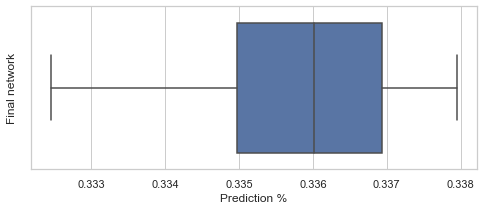

In [48]:
gridsize = (1,1)
fig, ax = plt.subplots(figsize=(8,3))
sns.boxplot(x=[accuracy_list], whis="range",ax=ax)
ax.set(xlabel="Prediction %", ylabel="Final network")
fig.savefig(r'D:\Dropbox\Peter_Dropbox\Apps\ShareLaTeX\Master Thesis\graphics\network_pred_box.eps', format='eps', dpi=1200)
plt.show()

In [49]:
len(topk_list)

10

In [50]:
import pickle

In [51]:
with open("best_acc_top_k.pkl", "wb") as f:
    pickle.dump([accuracy_list,topk_list],f)

In [52]:
with open("best_acc_top_k.pkl", "rb") as f:
    test_tmp = pickle.load(f)

In [53]:
top_k_means = {3:[],5:[]}
for i in topk_list:
    top_k_means[3].append(np.mean(i[3]))
    top_k_means[5].append(np.mean(i[5]))
top_k_means[1] = accuracy_list

In [56]:
top_k_means

{3: [0.4474265607642133,
  0.4473467052002677,
  0.44911940323303184,
  0.44677807521125096,
  0.4476105120585435,
  0.44665634347047023,
  0.4499583950870296,
  0.4485188199477998,
  0.4465471892687843,
  0.4470143153985351],
 5: [0.4916502376490523,
  0.4917954174335735,
  0.4931897189662291,
  0.4924806231787806,
  0.4926463302968928,
  0.49147771959702513,
  0.4934578761046621,
  0.49299484454085196,
  0.49158805361460356,
  0.4917750533985325],
 1: [0.3344142555803923,
  0.33189560180083744,
  0.3332598725980963,
  0.3336901426187703,
  0.3328086137959261,
  0.33076220760003777,
  0.3350019414622884,
  0.33235735499375585,
  0.3322314223047781,
  0.3333228389425852]}

In [40]:
df

3         5
0  0.447427  0.491650
1  0.447347  0.491795
2  0.449119  0.493190
3  0.446778  0.492481
4  0.447611  0.492646
5  0.446656  0.491478
6  0.449958  0.493458
7  0.448519  0.492995
8  0.446547  0.491588
9  0.447014  0.491775

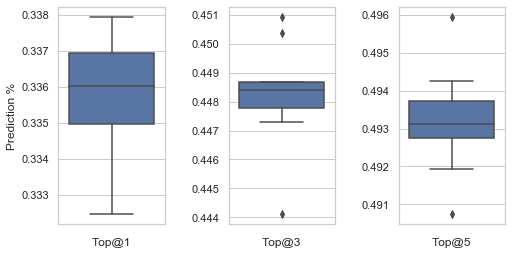

In [54]:
df = pd.DataFrame(top_k_means)

gridsize = (1,3)
fig, ax = plt.subplots(1,3,figsize=(8,4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=0.3)
sns.boxplot(x=df[1], ax=ax[0],orient="v")
sns.boxplot(x=df[3], ax=ax[1],orient="v")
sns.boxplot(x=df[5], ax=ax[2],orient="v")
ax[0].set(ylabel="Prediction %", xlabel="Top@1")
ax[1].set(xlabel="Top@3",ylabel="")
ax[2].set(xlabel="Top@5",ylabel="")
fig.savefig(r'D:\Dropbox\Peter_Dropbox\Apps\ShareLaTeX\Master Thesis\graphics\network_pred_box_topk.eps', format='eps', dpi=1200)

plt.show()

In [55]:
test_tmp[0]

[0.33692221781378495,
 0.33794733794897697,
 0.3369333716446912,
 0.33718815677535047,
 0.3352445378387632,
 0.33355635437495956,
 0.33488160277831247,
 0.33630731677097087,
 0.3324581058500364,
 0.33572183268674616]

In [7]:
net.topk

{3: [0.5477178423236515,
  0.42483660130718953,
  0.3333333333333333,
  0.7908496732026143,
  0.4975845410628019,
  0.5636363636363636,
  0.42063492063492064,
  0.6044776119402985,
  0.5307692307692308,
  0.43455497382198954,
  0.64,
  0.5517241379310345,
  0.30344827586206896,
  0.4857142857142857,
  0.5362318840579711,
  0.13636363636363635,
  0.6611570247933884,
  0.49606299212598426,
  0.31986531986531985,
  0.28717948717948716,
  0.7192982456140351,
  0.5517241379310345,
  0.4069264069264069,
  0.3007518796992481,
  0.4752475247524752,
  0.45408163265306123,
  0.5446428571428571,
  0.35294117647058826,
  0.27876106194690264,
  0.42201834862385323,
  0.573076923076923,
  0.38181818181818183,
  0.3813559322033898,
  0.7142857142857143,
  0.3698630136986301,
  0.4485294117647059,
  0.4358974358974359,
  0.484,
  0.6633333333333333,
  0.4827586206896552,
  0.5227272727272727,
  0.3670212765957447,
  0.44206008583690987,
  0.556390977443609,
  0.4564102564102564,
  0.7254901960784313,


In [39]:
np.mean(net.topk[3])

0.4476905506295518

In [40]:
np.mean(net.topk[5])

0.49195205230946115

In [56]:
res_start = net.test(dat_test,True)

Test loss: 1.185 | Test accu: 0.338 | Test accu expl: 0.821 | Test expl AUC: 0.711 | 

In [57]:
net.auc.keys()

dict_keys(['y', 'prob'])

In [58]:
from sklearn.metrics import roc_curve, auc

In [59]:
len(net.auc['prob'])

95289

In [60]:
len(net.auc['y'])

95289

In [61]:
fpr, tpr, _ = roc_curve(net.auc['y'], np.array(net.auc['prob']))
roc_auc = auc(fpr, tpr)

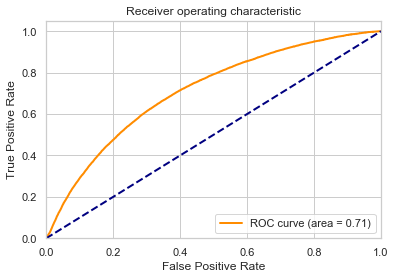

In [62]:
f = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

f.savefig(r'D:\Dropbox\Peter_Dropbox\Apps\ShareLaTeX\Master Thesis\graphics\ROC.png', format='png', dpi=300)


In [36]:
tmp_res_start = [i['correct']/i['total'] for i in list(res_start.values())]

AttributeError: 'tuple' object has no attribute 'values'

In [ ]:
sns.distplot(tmp_res_start)

### UMAP

In [61]:
import umap

In [62]:
reload(net_lstm_w2v)
net_umap = net_lstm_w2v.Brain()
net_umap.create_model()
net_umap.model.load_state_dict(net.best_model)

<All keys matched successfully>

In [48]:
path = "Network/network_epoch_0.334_Feb-12-2020"

reload(net_lstm_w2v)
net_umap = net_lstm_w2v.Brain()
net_umap.create_model()
net_umap.model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [88]:
reducer = umap.UMAP(n_neighbors= 5, n_components = 2)
tmp = net_umap.model.embeddings_type.weight.cpu().detach().numpy()
type_600 = np.array([p*20 + ii for p in train_peps for ii in range(20)])
embedding = reducer.fit_transform(tmp[type_600])

D:\Anaconda3\envs\py36\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\Anaconda3\envs\py36\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


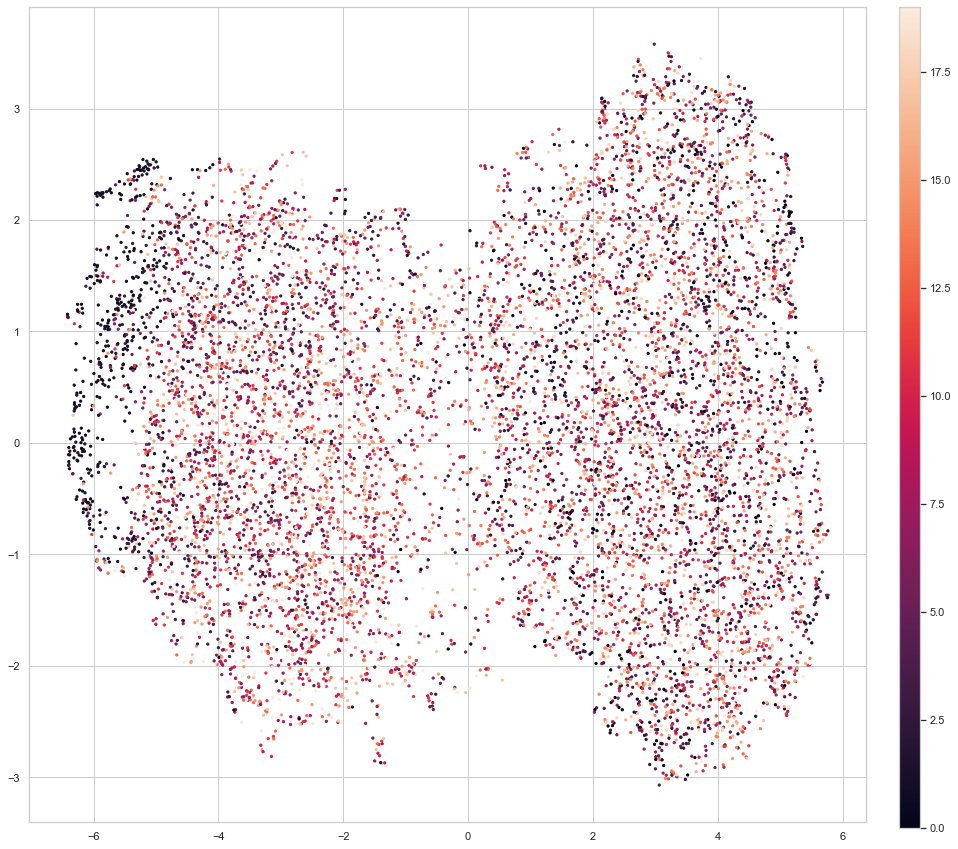

In [89]:
f, ax = plt.subplots(1,1,figsize=(15, 15))
cmap = sns.cubehelix_palette(as_cmap=True)

points = ax.scatter(x=embedding[:,0], y=embedding[:,1], c=type_600%20,s=5)

cb_ax = f.add_axes([0.93, 0.12, 0.02, 0.76])
f.colorbar(points,cax=cb_ax);

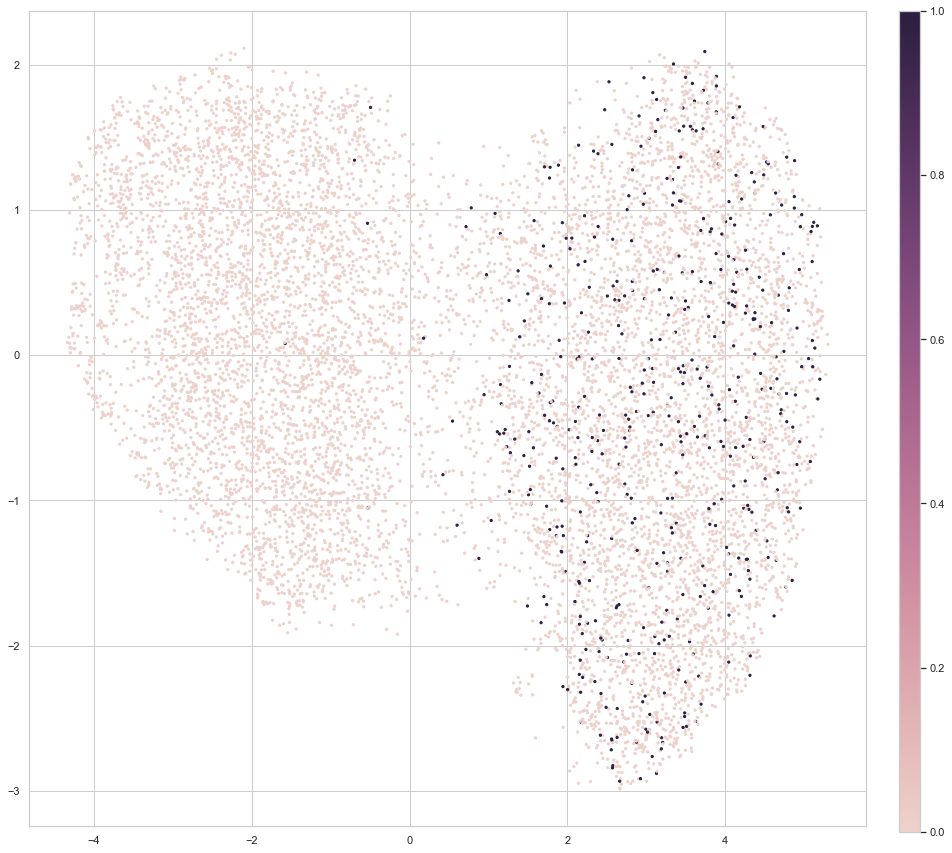

In [67]:
f, ax = plt.subplots(1,1,figsize=(15, 15))
cmap = sns.cubehelix_palette(as_cmap=True)

points = ax.scatter(x=embedding[:,0], y=embedding[:,1], c=(type_600%20==2),s=5,cmap=cmap)

cb_ax = f.add_axes([0.93, 0.12, 0.02, 0.76])
f.colorbar(points,cax=cb_ax);

In [68]:
dict_loc = utils.load_loc(pep_600)
boo_dtu = (dict_loc['lon']>12.510114) & (dict_loc['lon']<12.528568) & (dict_loc['lat']>55.780430) & (dict_loc['lat']<55.790643)

In [69]:
reducer = umap.UMAP()
tmp = net_umap.model.embeddings_type.weight.cpu().detach().numpy()
type_600 = np.array([p*20 + ii for p in pep_600 for ii in range(20)])
embedding = reducer.fit_transform(tmp[type_600])

D:\Anaconda3\envs\py36\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\Anaconda3\envs\py36\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


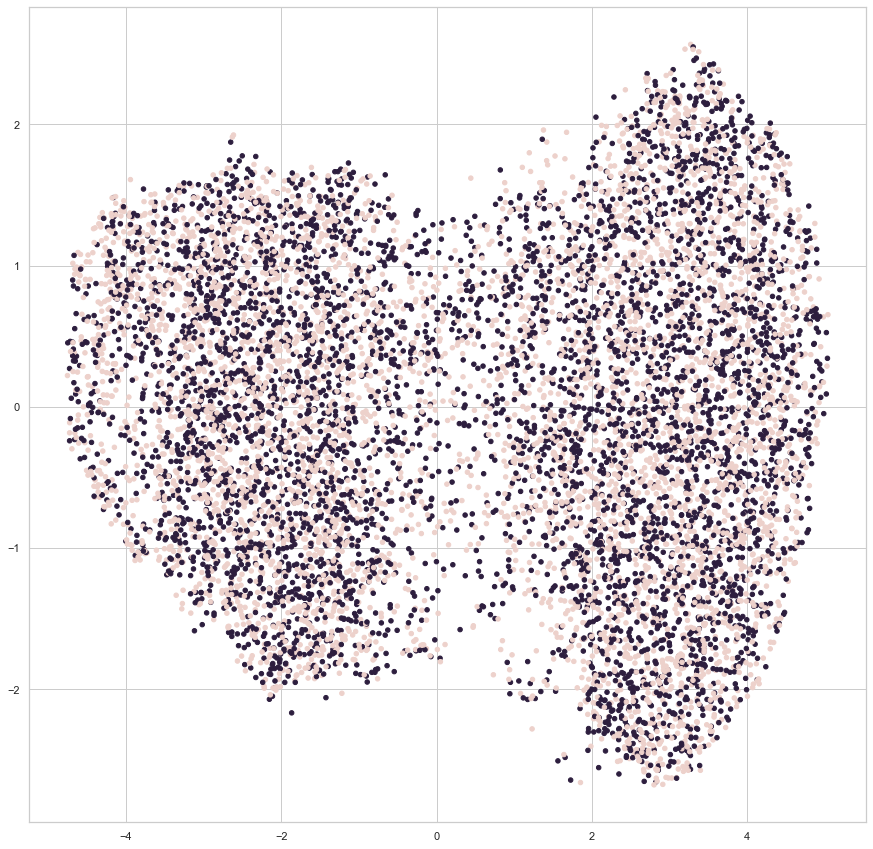

In [70]:
f, ax = plt.subplots(1,1,figsize=(15, 15))
cmap = sns.cubehelix_palette(as_cmap=True)

points = ax.scatter(x=embedding[:,0], y=embedding[:,1], s=20,c=boo_dtu,cmap=cmap)

In [90]:
reducer = umap.UMAP()
tmp = net_umap.model.embeddings_pep.weight.cpu().detach().numpy()
embedding = reducer.fit_transform(tmp[pep_600])

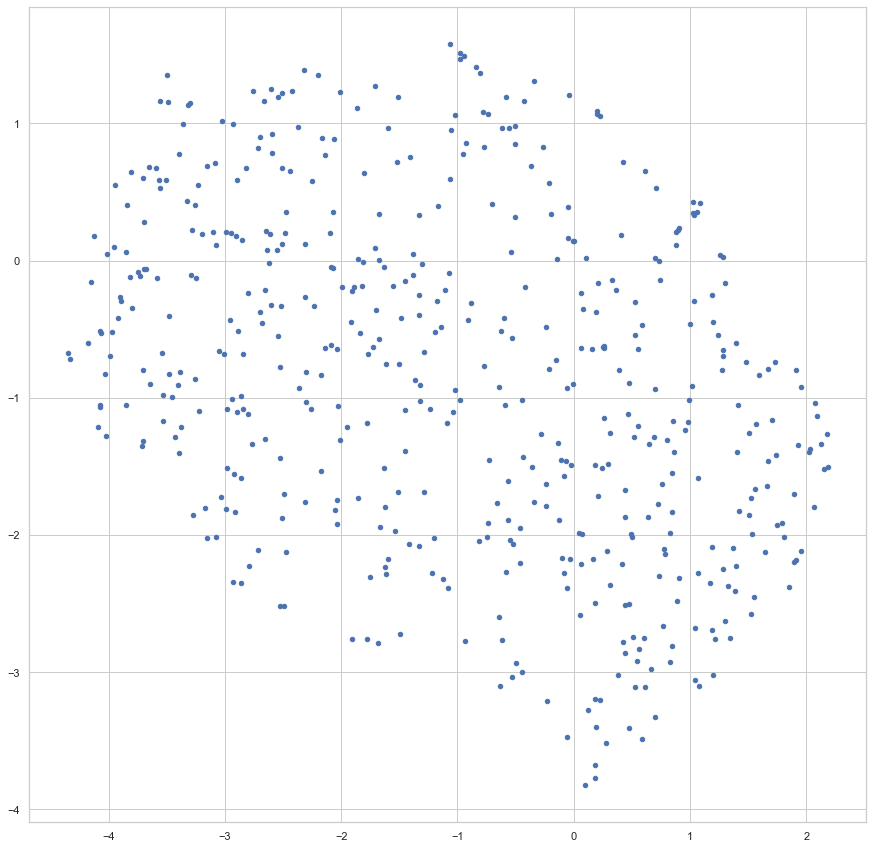

In [91]:
f, ax = plt.subplots(1,1,figsize=(15, 15))
cmap = sns.cubehelix_palette(as_cmap=True)

points = ax.scatter(x=embedding[:,0], y=embedding[:,1], s=20)

In [134]:
reducer = umap.UMAP()
tmp = net_umap.model.embeddings_rank.weight.cpu().detach().numpy()
rank_600 = np.array(range(20))
embedding = reducer.fit_transform(tmp[rank_600])

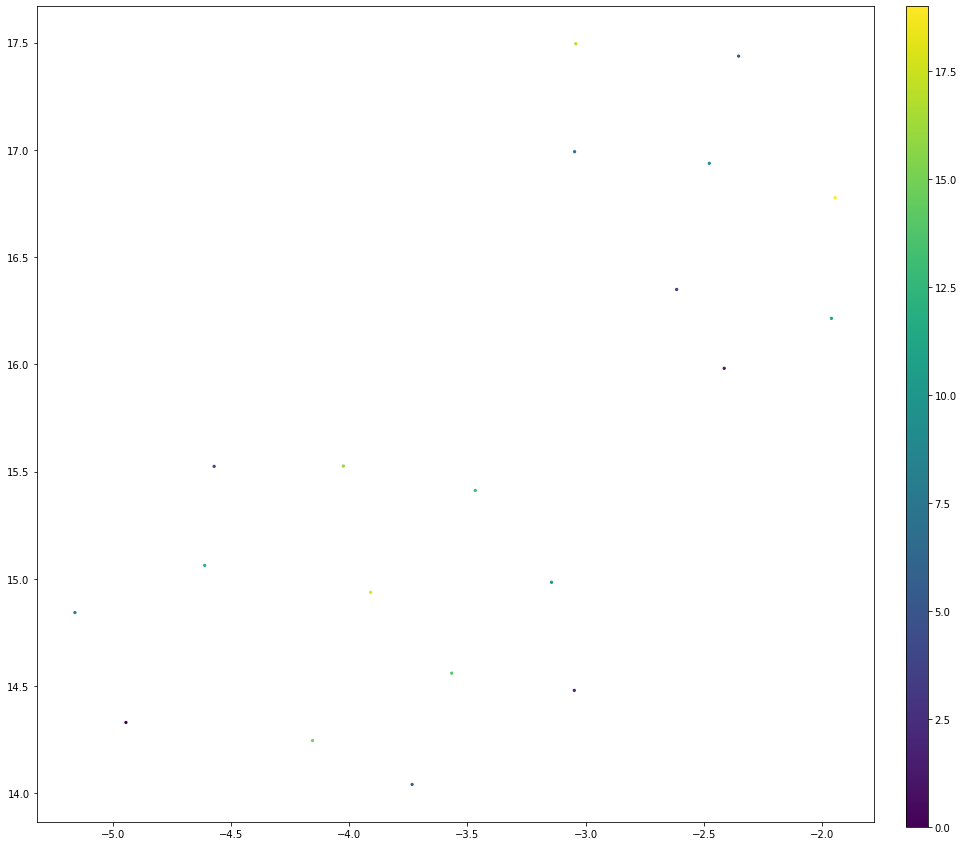

In [135]:
f, ax = plt.subplots(1,1,figsize=(15, 15))
cmap = sns.cubehelix_palette(as_cmap=True)

points = ax.scatter(x=embedding[:,0], y=embedding[:,1], c=rank_600,s=5)

cb_ax = f.add_axes([0.93, 0.12, 0.02, 0.76])
f.colorbar(points,cax=cb_ax);

In [192]:
reducer = umap.UMAP()
tmp = net_umap.model.embeddings_type.weight.cpu().detach().numpy()
type_600 = np.array([p*20 + ii for p in pep_600 for ii in range(3)])
embedding = reducer.fit_transform(tmp[type_600])

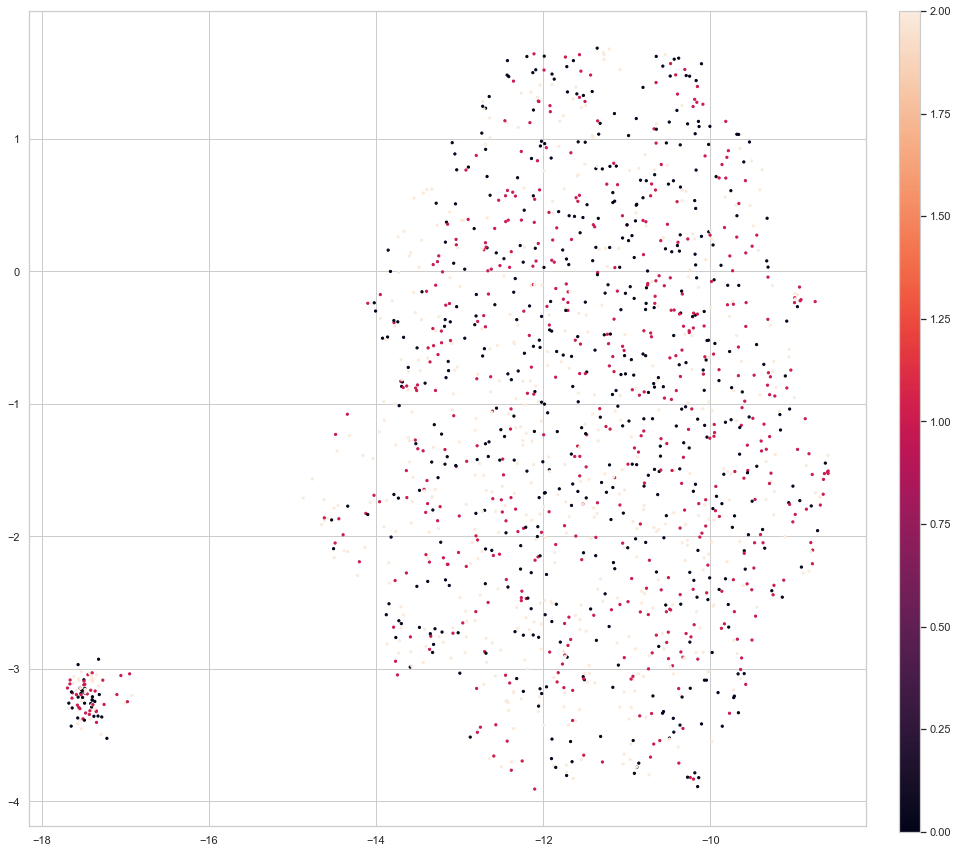

In [193]:
f, ax = plt.subplots(1,1,figsize=(15, 15))
cmap = sns.cubehelix_palette(as_cmap=True)

points = ax.scatter(x=embedding[:,0], y=embedding[:,1], c=type_600%20,s=5)

cb_ax = f.add_axes([0.93, 0.12, 0.02, 0.76])
f.colorbar(points,cax=cb_ax);

In [92]:
reducer = umap.UMAP()
tmp = net_umap.model.embeddings_type.weight.cpu().detach().numpy()
type_600 = np.array([p*20 + ii for p in pep_600 for ii in range(20)])
embedding = reducer.fit_transform(tmp[type_600])

D:\Anaconda3\envs\py36\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\Anaconda3\envs\py36\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


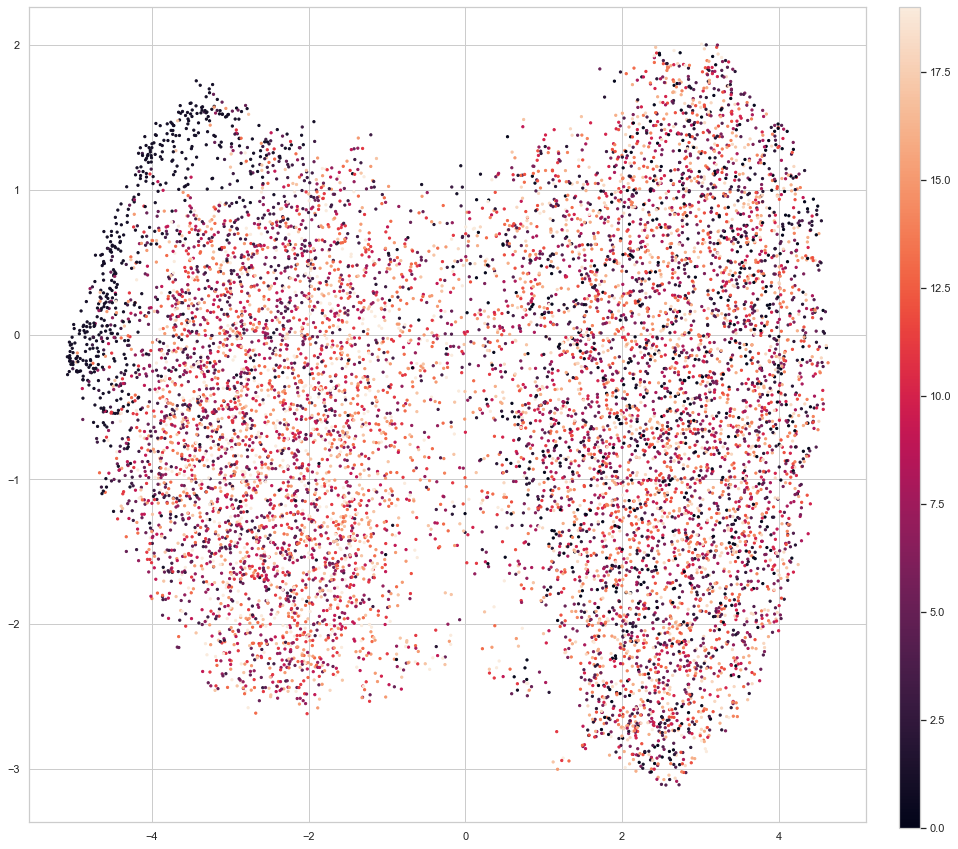

In [93]:
f, ax = plt.subplots(1,1,figsize=(15, 15))
cmap = sns.cubehelix_palette(as_cmap=True)

points = ax.scatter(x=embedding[:,0], y=embedding[:,1], c=type_600%20,s=5)

cb_ax = f.add_axes([0.93, 0.12, 0.02, 0.76])
f.colorbar(points,cax=cb_ax);

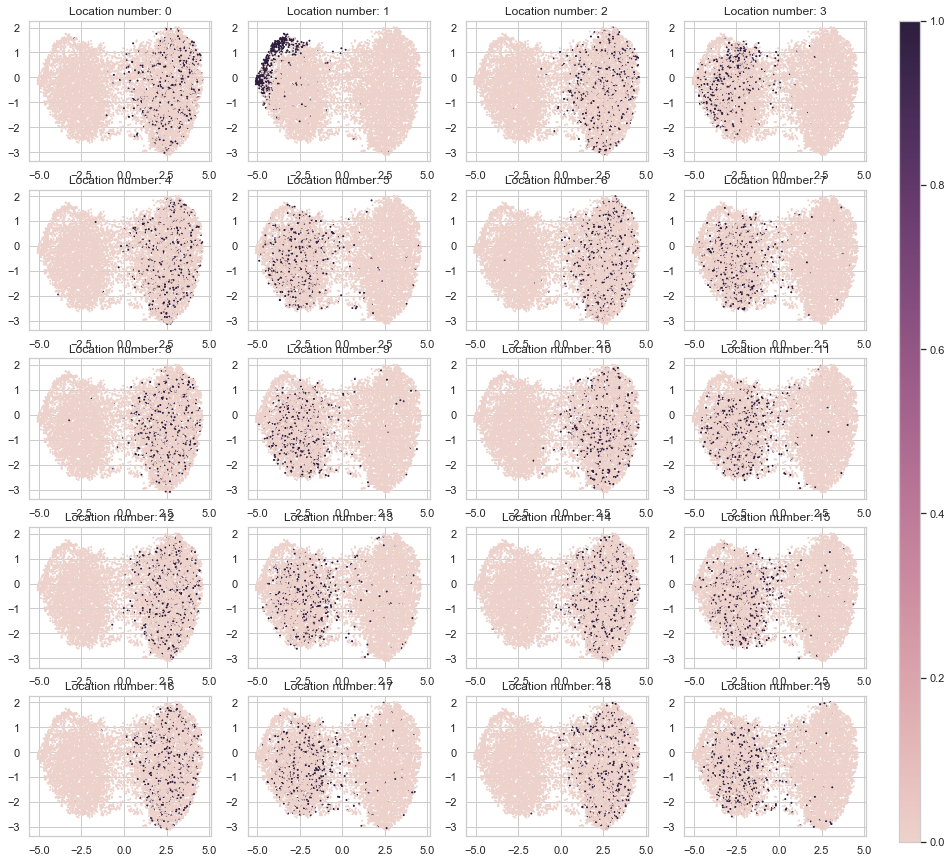

In [94]:
nrow = 5
ncol = 4
f, ax = plt.subplots(nrow,ncol,figsize=(15, 15))
cmap = sns.cubehelix_palette(as_cmap=True)
for i in range(20):
    points = ax[i//ncol,i%ncol].scatter(x=embedding[:,0], y=embedding[:,1], c=(type_600%20==i),s=1,cmap=cmap)
    ax[i//ncol,i%ncol].set_title(f'Location number: {i}')
cb_ax = f.add_axes([0.93, 0.12, 0.02, 0.76])
f.colorbar(points,cax=cb_ax);

In [21]:
%debug

> d:\dropbox\peter_dropbox\uni\speciale\utils\net_lstm_w2v.py(43)embeddings_type()
     41 
     42     def embeddings_type(self, x):
---> 43         return self.embeddings_type(x[-1].long())
     44 
     45     def forward(self, x, hidden):

ipdb> x[-1]
*** IndexError: dimension specified as 0 but tensor has no dimensions
ipdb> x
tensor(35, device='cuda:0')
ipdb> dat_umap
*** NameError: name 'dat_umap' is not defined
ipdb> u
> d:\dropbox\peter_dropbox\uni\speciale\utils\net_lstm_w2v.py(43)embeddings_type()
     41 
     42     def embeddings_type(self, x):
---> 43         return self.embeddings_type(x[-1].long())
     44 
     45     def forward(self, x, hidden):

ipdb> dat_umap
*** NameError: name 'dat_umap' is not defined
ipdb> u
> d:\dropbox\peter_dropbox\uni\speciale\utils\net_lstm_w2v.py(43)embeddings_type()
     41 
     42     def embeddings_type(self, x):
---> 43         return self.embeddings_type(x[-1].long())
     44 
     45     def forward(self, x, hidden):

ipdb> exit()

In [13]:
dat_umap[0]

tensor([ 0., 10., 11.,  1.,  6.,  7.,  5.,  8.,  3.,  2., 12., 15., 16., 13.,
         9., 14., 18., 17.], device='cuda:0', dtype=torch.float64)

In [30]:
with torch.no_grad():
    embedding = reducer.fit_transform(dat_umap_embed.squeeze().cpu())

In [31]:
embedding[:,0]

array([ 9.092744 ,  7.879025 , 10.75033  ,  8.820151 , 10.359447 ,
        5.419026 ,  4.987819 ,  8.110347 , 10.565897 ,  6.8621106,
        9.57903  ,  8.193434 ,  5.431536 ,  8.502116 ,  5.8761773,
        5.1556726,  5.6236477, 10.013059 ,  5.934503 ,  6.0046306],
      dtype=float32)

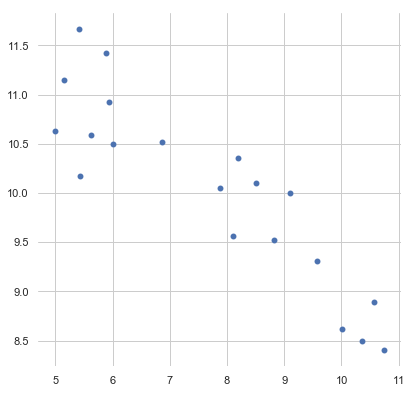

In [32]:
sns.set(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x=embedding[:,0], y=embedding[:,1],
                sizes=(1, 8), linewidth=0.1,
                ax=ax)

#### Transfer

In [16]:
import warnings; warnings.simplefilter('once')


In [17]:
path = "Network/network_epoch_0.338_Feb-23-2020"

reload(net_lstm_w2v)
net_trans = net_lstm_w2v.Brain()
net_trans.create_model()

In [18]:
dat_train_both_trans,dat_test_trans = utils.load_train_test_set(train_peps)
    

In [19]:
total_epoch = 12
bs_trans = 1 
epochs_trans = 2
topk = {i:{3:[],5:[]} for i in range(0,total_epoch,epochs_trans)}
dict_tmp = {i:{} for i in range(0,total_epoch,epochs_trans)}
for pep_trans in tqdm(train_peps):
    
    net_trans = net_lstm_w2v.Brain()
    net_trans.create_model()
    
    net_trans.model.load_state_dict(torch.load(path))
    net_trans.bs = bs_trans
    net_trans.epochs = epochs_trans
    net_trans.seq_len=100
    
    dat_train_both_trans,dat_test_trans = utils.load_train_test_set([pep_trans])
    
    for i in range(0,total_epoch,epochs_trans):
        net_trans.train(dat_train_both_trans,dat_test_trans)
        dict_tmp[i].update(net_trans.test(dat_test_trans,True)[0])
        topk[i][3].append(np.mean(net_trans.topk[3]))
        topk[i][5].append(np.mean(net_trans.topk[5]))

  0%|                                                                                          | 0/427 [00:00<?, ?it/s]

Epoch: 1/2 | Avg epoch loss: 1.129 | Training accu: 0.457 | Training accu expl: 0.784 | Test loss: 0.821 | Test accu: 0.432 | Test accu expl: 0.768 | Test expl AUC: 0.705 | 
Test loss: 0.826 | Test accu: 0.432 | Test accu expl: 0.763 | Test expl AUC: 0.713 | Epoch: 1/2 | Avg epoch loss: 1.055 | Training accu: 0.466 | Training accu expl: 0.780 | Test loss: 0.794 | Test accu: 0.427 | Test accu expl: 0.772 | Test expl AUC: 0.714 | 
Test loss: 0.838 | Test accu: 0.436 | Test accu expl: 0.751 | Test expl AUC: 0.717 | Epoch: 1/2 | Avg epoch loss: 1.002 | Training accu: 0.476 | Training accu expl: 0.789 | Test loss: 0.818 | Test accu: 0.436 | Test accu expl: 0.772 | Test expl AUC: 0.722 | 
Test loss: 0.830 | Test accu: 0.436 | Test accu expl: 0.763 | Test expl AUC: 0.726 | Epoch: 1/2 | Avg epoch loss: 0.970 | Training accu: 0.485 | Training accu expl: 0.795 | Test loss: 0.811 | Test accu: 0.436 | Test accu expl: 0.768 | Test expl AUC: 0.732 | 
Test loss: 0.841 | Test accu: 0.427 | Test accu e

  0%|▏                                                                               | 1/427 [00:17<2:04:47, 17.58s/it]

Epoch: 1/2 | Avg epoch loss: 1.478 | Training accu: 0.493 | Training accu expl: 0.871 | Test loss: 1.450 | Test accu: 0.301 | Test accu expl: 0.830 | Test expl AUC: 0.727 | 
Test loss: 1.419 | Test accu: 0.307 | Test accu expl: 0.830 | Test expl AUC: 0.724 | Epoch: 1/2 | Avg epoch loss: 1.399 | Training accu: 0.505 | Training accu expl: 0.871 | Test loss: 1.438 | Test accu: 0.307 | Test accu expl: 0.830 | Test expl AUC: 0.724 | 
Test loss: 1.434 | Test accu: 0.307 | Test accu expl: 0.830 | Test expl AUC: 0.721 | Epoch: 1/2 | Avg epoch loss: 1.392 | Training accu: 0.513 | Training accu expl: 0.866 | Test loss: 1.446 | Test accu: 0.307 | Test accu expl: 0.830 | Test expl AUC: 0.722 | 
Test loss: 1.448 | Test accu: 0.307 | Test accu expl: 0.830 | Test expl AUC: 0.721 | Epoch: 1/2 | Avg epoch loss: 1.357 | Training accu: 0.521 | Training accu expl: 0.871 | Test loss: 1.455 | Test accu: 0.294 | Test accu expl: 0.830 | Test expl AUC: 0.722 | 
Test loss: 1.471 | Test accu: 0.294 | Test accu e

  0%|▎                                                                               | 2/427 [00:28<1:50:45, 15.64s/it]

Epoch: 1/2 | Avg epoch loss: 1.922 | Training accu: 0.328 | Training accu expl: 0.771 | Test loss: 1.803 | Test accu: 0.190 | Test accu expl: 0.771 | Test expl AUC: 0.551 | 
Test loss: 1.769 | Test accu: 0.196 | Test accu expl: 0.771 | Test expl AUC: 0.547 | Epoch: 1/2 | Avg epoch loss: 1.830 | Training accu: 0.342 | Training accu expl: 0.766 | Test loss: 1.768 | Test accu: 0.190 | Test accu expl: 0.725 | Test expl AUC: 0.548 | 
Test loss: 1.770 | Test accu: 0.196 | Test accu expl: 0.745 | Test expl AUC: 0.558 | Epoch: 1/2 | Avg epoch loss: 1.780 | Training accu: 0.348 | Training accu expl: 0.777 | Test loss: 1.756 | Test accu: 0.190 | Test accu expl: 0.745 | Test expl AUC: 0.560 | 
Test loss: 1.756 | Test accu: 0.196 | Test accu expl: 0.739 | Test expl AUC: 0.564 | Epoch: 1/2 | Avg epoch loss: 1.744 | Training accu: 0.357 | Training accu expl: 0.781 | Test loss: 1.767 | Test accu: 0.203 | Test accu expl: 0.745 | Test expl AUC: 0.566 | 
Test loss: 1.767 | Test accu: 0.203 | Test accu e

  1%|▌                                                                               | 3/427 [00:39<1:40:40, 14.25s/it]

Epoch: 1/2 | Avg epoch loss: 1.253 | Training accu: 0.545 | Training accu expl: 0.885 | Test loss: 1.058 | Test accu: 0.601 | Test accu expl: 0.931 | Test expl AUC: 0.781 | 
Test loss: 1.032 | Test accu: 0.605 | Test accu expl: 0.931 | Test expl AUC: 0.786 | Epoch: 1/2 | Avg epoch loss: 1.218 | Training accu: 0.561 | Training accu expl: 0.888 | Test loss: 1.022 | Test accu: 0.608 | Test accu expl: 0.931 | Test expl AUC: 0.791 | 
Test loss: 1.010 | Test accu: 0.601 | Test accu expl: 0.931 | Test expl AUC: 0.795 | Epoch: 1/2 | Avg epoch loss: 1.201 | Training accu: 0.560 | Training accu expl: 0.881 | Test loss: 1.002 | Test accu: 0.605 | Test accu expl: 0.938 | Test expl AUC: 0.797 | 
Test loss: 0.990 | Test accu: 0.605 | Test accu expl: 0.935 | Test expl AUC: 0.803 | Epoch: 1/2 | Avg epoch loss: 1.169 | Training accu: 0.568 | Training accu expl: 0.885 | Test loss: 0.989 | Test accu: 0.605 | Test accu expl: 0.931 | Test expl AUC: 0.808 | 
Test loss: 0.971 | Test accu: 0.601 | Test accu e

  1%|▋                                                                               | 4/427 [01:01<1:57:22, 16.65s/it]

Epoch: 1/2 | Avg epoch loss: 1.505 | Training accu: 0.424 | Training accu expl: 0.832 | Test loss: 0.684 | Test accu: 0.401 | Test accu expl: 0.865 | Test expl AUC: 0.714 | 
Test loss: 0.679 | Test accu: 0.411 | Test accu expl: 0.855 | Test expl AUC: 0.716 | Epoch: 1/2 | Avg epoch loss: 1.402 | Training accu: 0.444 | Training accu expl: 0.833 | Test loss: 0.680 | Test accu: 0.411 | Test accu expl: 0.855 | Test expl AUC: 0.718 | 
Test loss: 0.675 | Test accu: 0.415 | Test accu expl: 0.845 | Test expl AUC: 0.722 | Epoch: 1/2 | Avg epoch loss: 1.357 | Training accu: 0.455 | Training accu expl: 0.824 | Test loss: 0.681 | Test accu: 0.406 | Test accu expl: 0.841 | Test expl AUC: 0.724 | 
Test loss: 0.686 | Test accu: 0.406 | Test accu expl: 0.845 | Test expl AUC: 0.723 | Epoch: 1/2 | Avg epoch loss: 1.306 | Training accu: 0.466 | Training accu expl: 0.824 | Test loss: 0.673 | Test accu: 0.415 | Test accu expl: 0.845 | Test expl AUC: 0.724 | 
Test loss: 0.687 | Test accu: 0.411 | Test accu e

  1%|▉                                                                               | 5/427 [01:17<1:53:59, 16.21s/it]

Epoch: 1/2 | Avg epoch loss: 1.682 | Training accu: 0.403 | Training accu expl: 0.837 | Test loss: 1.359 | Test accu: 0.418 | Test accu expl: 0.927 | Test expl AUC: 0.446 | 
Test loss: 1.295 | Test accu: 0.427 | Test accu expl: 0.927 | Test expl AUC: 0.458 | Epoch: 1/2 | Avg epoch loss: 1.593 | Training accu: 0.422 | Training accu expl: 0.833 | Test loss: 1.290 | Test accu: 0.427 | Test accu expl: 0.927 | Test expl AUC: 0.468 | 
Test loss: 1.255 | Test accu: 0.436 | Test accu expl: 0.927 | Test expl AUC: 0.470 | Epoch: 1/2 | Avg epoch loss: 1.551 | Training accu: 0.433 | Training accu expl: 0.835 | Test loss: 1.261 | Test accu: 0.445 | Test accu expl: 0.927 | Test expl AUC: 0.487 | 
Test loss: 1.229 | Test accu: 0.445 | Test accu expl: 0.918 | Test expl AUC: 0.492 | Epoch: 1/2 | Avg epoch loss: 1.362 | Training accu: 0.446 | Training accu expl: 0.843 | Test loss: 1.194 | Test accu: 0.436 | Test accu expl: 0.918 | Test expl AUC: 0.497 | 
Test loss: 1.211 | Test accu: 0.427 | Test accu e

  1%|█                                                                               | 6/427 [01:25<1:37:02, 13.83s/it]

Epoch: 1/2 | Avg epoch loss: 1.590 | Training accu: 0.410 | Training accu expl: 0.792 | Test loss: 1.175 | Test accu: 0.294 | Test accu expl: 0.774 | Test expl AUC: 0.768 | 
Test loss: 1.179 | Test accu: 0.298 | Test accu expl: 0.786 | Test expl AUC: 0.774 | Epoch: 1/2 | Avg epoch loss: 1.499 | Training accu: 0.424 | Training accu expl: 0.797 | Test loss: 1.102 | Test accu: 0.310 | Test accu expl: 0.790 | Test expl AUC: 0.771 | 
Test loss: 1.095 | Test accu: 0.302 | Test accu expl: 0.794 | Test expl AUC: 0.777 | Epoch: 1/2 | Avg epoch loss: 1.423 | Training accu: 0.434 | Training accu expl: 0.799 | Test loss: 1.153 | Test accu: 0.306 | Test accu expl: 0.790 | Test expl AUC: 0.782 | 
Test loss: 1.121 | Test accu: 0.306 | Test accu expl: 0.786 | Test expl AUC: 0.779 | Epoch: 1/2 | Avg epoch loss: 1.381 | Training accu: 0.441 | Training accu expl: 0.801 | Test loss: 1.102 | Test accu: 0.306 | Test accu expl: 0.786 | Test expl AUC: 0.777 | 
Test loss: 1.154 | Test accu: 0.306 | Test accu e

  2%|█▎                                                                              | 7/427 [01:43<1:46:22, 15.20s/it]

Epoch: 1/2 | Avg epoch loss: 1.352 | Training accu: 0.558 | Training accu expl: 0.798 | Test loss: 0.740 | Test accu: 0.455 | Test accu expl: 0.813 | Test expl AUC: 0.648 | 
Test loss: 0.728 | Test accu: 0.448 | Test accu expl: 0.806 | Test expl AUC: 0.647 | Epoch: 1/2 | Avg epoch loss: 1.236 | Training accu: 0.574 | Training accu expl: 0.796 | Test loss: 0.728 | Test accu: 0.455 | Test accu expl: 0.799 | Test expl AUC: 0.648 | 
Test loss: 0.719 | Test accu: 0.463 | Test accu expl: 0.806 | Test expl AUC: 0.647 | Epoch: 1/2 | Avg epoch loss: 1.220 | Training accu: 0.582 | Training accu expl: 0.803 | Test loss: 0.722 | Test accu: 0.463 | Test accu expl: 0.813 | Test expl AUC: 0.647 | 
Test loss: 0.720 | Test accu: 0.455 | Test accu expl: 0.791 | Test expl AUC: 0.640 | Epoch: 1/2 | Avg epoch loss: 1.156 | Training accu: 0.591 | Training accu expl: 0.810 | Test loss: 0.716 | Test accu: 0.455 | Test accu expl: 0.799 | Test expl AUC: 0.641 | 
Test loss: 0.728 | Test accu: 0.455 | Test accu e

  2%|█▍                                                                              | 8/427 [01:53<1:34:52, 13.58s/it]

Epoch: 1/2 | Avg epoch loss: 1.944 | Training accu: 0.283 | Training accu expl: 0.782 | Test loss: 1.804 | Test accu: 0.231 | Test accu expl: 0.892 | Test expl AUC: 0.849 | 
Test loss: 1.819 | Test accu: 0.185 | Test accu expl: 0.885 | Test expl AUC: 0.839 | Epoch: 1/2 | Avg epoch loss: 1.839 | Training accu: 0.304 | Training accu expl: 0.777 | Test loss: 1.806 | Test accu: 0.208 | Test accu expl: 0.892 | Test expl AUC: 0.839 | 
Test loss: 1.804 | Test accu: 0.192 | Test accu expl: 0.892 | Test expl AUC: 0.830 | Epoch: 1/2 | Avg epoch loss: 1.793 | Training accu: 0.314 | Training accu expl: 0.779 | Test loss: 1.850 | Test accu: 0.208 | Test accu expl: 0.885 | Test expl AUC: 0.828 | 
Test loss: 1.791 | Test accu: 0.215 | Test accu expl: 0.892 | Test expl AUC: 0.826 | Epoch: 1/2 | Avg epoch loss: 1.725 | Training accu: 0.325 | Training accu expl: 0.782 | Test loss: 1.881 | Test accu: 0.177 | Test accu expl: 0.885 | Test expl AUC: 0.820 | 
Test loss: 1.793 | Test accu: 0.208 | Test accu e

  2%|█▋                                                                              | 9/427 [02:03<1:26:48, 12.46s/it]

Epoch: 1/2 | Avg epoch loss: 1.728 | Training accu: 0.355 | Training accu expl: 0.792 | Test loss: 1.439 | Test accu: 0.262 | Test accu expl: 0.817 | Test expl AUC: 0.723 | 
Test loss: 1.415 | Test accu: 0.267 | Test accu expl: 0.822 | Test expl AUC: 0.721 | Epoch: 1/2 | Avg epoch loss: 1.651 | Training accu: 0.370 | Training accu expl: 0.787 | Test loss: 1.417 | Test accu: 0.267 | Test accu expl: 0.822 | Test expl AUC: 0.726 | 
Test loss: 1.370 | Test accu: 0.277 | Test accu expl: 0.822 | Test expl AUC: 0.726 | Epoch: 1/2 | Avg epoch loss: 1.602 | Training accu: 0.376 | Training accu expl: 0.788 | Test loss: 1.418 | Test accu: 0.267 | Test accu expl: 0.817 | Test expl AUC: 0.729 | 
Test loss: 1.377 | Test accu: 0.283 | Test accu expl: 0.812 | Test expl AUC: 0.731 | Epoch: 1/2 | Avg epoch loss: 1.546 | Training accu: 0.382 | Training accu expl: 0.791 | Test loss: 1.385 | Test accu: 0.272 | Test accu expl: 0.806 | Test expl AUC: 0.725 | 
Test loss: 1.409 | Test accu: 0.283 | Test accu e

  2%|█▊                                                                             | 10/427 [02:17<1:29:56, 12.94s/it]

Epoch: 1/2 | Avg epoch loss: 1.364 | Training accu: 0.539 | Training accu expl: 0.862 | Test loss: 0.976 | Test accu: 0.495 | Test accu expl: 0.810 | Test expl AUC: 0.827 | 
Test loss: 0.936 | Test accu: 0.510 | Test accu expl: 0.795 | Test expl AUC: 0.828 | Epoch: 1/2 | Avg epoch loss: 1.293 | Training accu: 0.552 | Training accu expl: 0.865 | Test loss: 0.926 | Test accu: 0.510 | Test accu expl: 0.795 | Test expl AUC: 0.828 | 
Test loss: 0.918 | Test accu: 0.510 | Test accu expl: 0.795 | Test expl AUC: 0.826 | Epoch: 1/2 | Avg epoch loss: 1.346 | Training accu: 0.551 | Training accu expl: 0.865 | Test loss: 0.903 | Test accu: 0.520 | Test accu expl: 0.805 | Test expl AUC: 0.827 | 
Test loss: 0.899 | Test accu: 0.530 | Test accu expl: 0.805 | Test expl AUC: 0.826 | Epoch: 1/2 | Avg epoch loss: 1.315 | Training accu: 0.558 | Training accu expl: 0.868 | Test loss: 0.888 | Test accu: 0.535 | Test accu expl: 0.805 | Test expl AUC: 0.826 | 
Test loss: 0.886 | Test accu: 0.530 | Test accu e

  3%|██                                                                             | 11/427 [02:32<1:33:07, 13.43s/it]

Epoch: 1/2 | Avg epoch loss: 1.549 | Training accu: 0.497 | Training accu expl: 0.848 | Test loss: 1.310 | Test accu: 0.366 | Test accu expl: 0.772 | Test expl AUC: 0.702 | 
Test loss: 1.296 | Test accu: 0.349 | Test accu expl: 0.772 | Test expl AUC: 0.698 | Epoch: 1/2 | Avg epoch loss: 1.467 | Training accu: 0.504 | Training accu expl: 0.847 | Test loss: 1.284 | Test accu: 0.353 | Test accu expl: 0.767 | Test expl AUC: 0.697 | 
Test loss: 1.286 | Test accu: 0.362 | Test accu expl: 0.776 | Test expl AUC: 0.695 | Epoch: 1/2 | Avg epoch loss: 1.436 | Training accu: 0.515 | Training accu expl: 0.847 | Test loss: 1.291 | Test accu: 0.358 | Test accu expl: 0.776 | Test expl AUC: 0.693 | 
Test loss: 1.302 | Test accu: 0.353 | Test accu expl: 0.772 | Test expl AUC: 0.694 | Epoch: 1/2 | Avg epoch loss: 1.418 | Training accu: 0.518 | Training accu expl: 0.849 | Test loss: 1.299 | Test accu: 0.358 | Test accu expl: 0.772 | Test expl AUC: 0.694 | 
Test loss: 1.310 | Test accu: 0.362 | Test accu e

  3%|██▏                                                                            | 12/427 [02:48<1:39:52, 14.44s/it]

Epoch: 1/2 | Avg epoch loss: 1.691 | Training accu: 0.327 | Training accu expl: 0.680 | Test loss: 0.785 | Test accu: 0.241 | Test accu expl: 0.552 | Test expl AUC: 0.608 | 
Test loss: 0.751 | Test accu: 0.248 | Test accu expl: 0.572 | Test expl AUC: 0.611 | Epoch: 1/2 | Avg epoch loss: 1.623 | Training accu: 0.334 | Training accu expl: 0.680 | Test loss: 0.741 | Test accu: 0.248 | Test accu expl: 0.586 | Test expl AUC: 0.611 | 
Test loss: 0.738 | Test accu: 0.248 | Test accu expl: 0.545 | Test expl AUC: 0.608 | Epoch: 1/2 | Avg epoch loss: 1.562 | Training accu: 0.338 | Training accu expl: 0.688 | Test loss: 0.734 | Test accu: 0.248 | Test accu expl: 0.559 | Test expl AUC: 0.608 | 
Test loss: 0.742 | Test accu: 0.248 | Test accu expl: 0.559 | Test expl AUC: 0.611 | Epoch: 1/2 | Avg epoch loss: 1.513 | Training accu: 0.344 | Training accu expl: 0.686 | Test loss: 0.749 | Test accu: 0.248 | Test accu expl: 0.566 | Test expl AUC: 0.614 | 
Test loss: 0.746 | Test accu: 0.248 | Test accu e

  3%|██▍                                                                            | 13/427 [02:59<1:31:20, 13.24s/it]

Epoch: 1/2 | Avg epoch loss: 1.908 | Training accu: 0.324 | Training accu expl: 0.839 | Test loss: 1.633 | Test accu: 0.263 | Test accu expl: 0.857 | Test expl AUC: 0.680 | 
Test loss: 1.591 | Test accu: 0.269 | Test accu expl: 0.851 | Test expl AUC: 0.668 | Epoch: 1/2 | Avg epoch loss: 1.813 | Training accu: 0.342 | Training accu expl: 0.836 | Test loss: 1.603 | Test accu: 0.269 | Test accu expl: 0.857 | Test expl AUC: 0.666 | 
Test loss: 1.612 | Test accu: 0.269 | Test accu expl: 0.869 | Test expl AUC: 0.663 | Epoch: 1/2 | Avg epoch loss: 1.748 | Training accu: 0.354 | Training accu expl: 0.841 | Test loss: 1.604 | Test accu: 0.274 | Test accu expl: 0.869 | Test expl AUC: 0.660 | 
Test loss: 1.603 | Test accu: 0.297 | Test accu expl: 0.869 | Test expl AUC: 0.664 | Epoch: 1/2 | Avg epoch loss: 1.710 | Training accu: 0.358 | Training accu expl: 0.840 | Test loss: 1.616 | Test accu: 0.280 | Test accu expl: 0.869 | Test expl AUC: 0.661 | 
Test loss: 1.614 | Test accu: 0.291 | Test accu e

  3%|██▌                                                                            | 14/427 [03:11<1:29:48, 13.05s/it]

Epoch: 1/2 | Avg epoch loss: 1.632 | Training accu: 0.463 | Training accu expl: 0.807 | Test loss: 1.377 | Test accu: 0.464 | Test accu expl: 0.891 | Test expl AUC: 0.544 | 
Test loss: 1.419 | Test accu: 0.464 | Test accu expl: 0.891 | Test expl AUC: 0.556 | Epoch: 1/2 | Avg epoch loss: 1.571 | Training accu: 0.475 | Training accu expl: 0.802 | Test loss: 1.381 | Test accu: 0.457 | Test accu expl: 0.891 | Test expl AUC: 0.556 | 
Test loss: 1.407 | Test accu: 0.464 | Test accu expl: 0.891 | Test expl AUC: 0.550 | Epoch: 1/2 | Avg epoch loss: 1.486 | Training accu: 0.496 | Training accu expl: 0.810 | Test loss: 1.368 | Test accu: 0.464 | Test accu expl: 0.891 | Test expl AUC: 0.565 | 
Test loss: 1.421 | Test accu: 0.471 | Test accu expl: 0.891 | Test expl AUC: 0.566 | Epoch: 1/2 | Avg epoch loss: 1.449 | Training accu: 0.495 | Training accu expl: 0.812 | Test loss: 1.378 | Test accu: 0.464 | Test accu expl: 0.891 | Test expl AUC: 0.572 | 
Test loss: 1.404 | Test accu: 0.478 | Test accu e

  4%|██▊                                                                            | 15/427 [03:21<1:23:26, 12.15s/it]

Epoch: 1/2 | Avg epoch loss: 1.631 | Training accu: 0.381 | Training accu expl: 0.831 | Test loss: 0.204 | Test accu: 0.123 | Test accu expl: 0.727 | Test expl AUC: 0.657 | 
Test loss: 0.201 | Test accu: 0.123 | Test accu expl: 0.736 | Test expl AUC: 0.642 | Epoch: 1/2 | Avg epoch loss: 1.531 | Training accu: 0.419 | Training accu expl: 0.829 | Test loss: 0.194 | Test accu: 0.123 | Test accu expl: 0.727 | Test expl AUC: 0.630 | 
Test loss: 0.180 | Test accu: 0.127 | Test accu expl: 0.727 | Test expl AUC: 0.619 | Epoch: 1/2 | Avg epoch loss: 1.471 | Training accu: 0.429 | Training accu expl: 0.832 | Test loss: 0.180 | Test accu: 0.127 | Test accu expl: 0.705 | Test expl AUC: 0.604 | 
Test loss: 0.191 | Test accu: 0.127 | Test accu expl: 0.705 | Test expl AUC: 0.591 | Epoch: 1/2 | Avg epoch loss: 1.416 | Training accu: 0.438 | Training accu expl: 0.835 | Test loss: 0.188 | Test accu: 0.132 | Test accu expl: 0.705 | Test expl AUC: 0.580 | 
Test loss: 0.189 | Test accu: 0.132 | Test accu e

  4%|██▉                                                                            | 16/427 [03:38<1:31:34, 13.37s/it]

Epoch: 1/2 | Avg epoch loss: 1.397 | Training accu: 0.521 | Training accu expl: 0.845 | Test loss: 0.894 | Test accu: 0.479 | Test accu expl: 0.860 | Test expl AUC: 0.539 | 
Test loss: 0.852 | Test accu: 0.504 | Test accu expl: 0.860 | Test expl AUC: 0.543 | Epoch: 1/2 | Avg epoch loss: 1.336 | Training accu: 0.533 | Training accu expl: 0.844 | Test loss: 0.835 | Test accu: 0.512 | Test accu expl: 0.860 | Test expl AUC: 0.549 | 
Test loss: 0.819 | Test accu: 0.521 | Test accu expl: 0.860 | Test expl AUC: 0.555 | Epoch: 1/2 | Avg epoch loss: 1.299 | Training accu: 0.542 | Training accu expl: 0.847 | Test loss: 0.823 | Test accu: 0.521 | Test accu expl: 0.860 | Test expl AUC: 0.563 | 
Test loss: 0.809 | Test accu: 0.504 | Test accu expl: 0.860 | Test expl AUC: 0.562 | Epoch: 1/2 | Avg epoch loss: 1.276 | Training accu: 0.538 | Training accu expl: 0.846 | Test loss: 0.802 | Test accu: 0.521 | Test accu expl: 0.860 | Test expl AUC: 0.557 | 
Test loss: 0.784 | Test accu: 0.521 | Test accu e

  4%|███▏                                                                           | 17/427 [03:47<1:22:16, 12.04s/it]

Epoch: 1/2 | Avg epoch loss: 1.763 | Training accu: 0.357 | Training accu expl: 0.785 | Test loss: 0.979 | Test accu: 0.386 | Test accu expl: 0.835 | Test expl AUC: 0.593 | 
Test loss: 0.951 | Test accu: 0.394 | Test accu expl: 0.835 | Test expl AUC: 0.619 | Epoch: 1/2 | Avg epoch loss: 1.609 | Training accu: 0.359 | Training accu expl: 0.786 | Test loss: 0.927 | Test accu: 0.386 | Test accu expl: 0.835 | Test expl AUC: 0.618 | 
Test loss: 0.926 | Test accu: 0.378 | Test accu expl: 0.835 | Test expl AUC: 0.626 | Epoch: 1/2 | Avg epoch loss: 1.629 | Training accu: 0.368 | Training accu expl: 0.787 | Test loss: 0.911 | Test accu: 0.394 | Test accu expl: 0.843 | Test expl AUC: 0.623 | 
Test loss: 0.898 | Test accu: 0.394 | Test accu expl: 0.843 | Test expl AUC: 0.625 | Epoch: 1/2 | Avg epoch loss: 1.574 | Training accu: 0.380 | Training accu expl: 0.789 | Test loss: 0.894 | Test accu: 0.417 | Test accu expl: 0.843 | Test expl AUC: 0.632 | 
Test loss: 0.886 | Test accu: 0.409 | Test accu e

  4%|███▎                                                                           | 18/427 [03:56<1:16:36, 11.24s/it]

Epoch: 1/2 | Avg epoch loss: 1.644 | Training accu: 0.362 | Training accu expl: 0.779 | Test loss: 0.488 | Test accu: 0.293 | Test accu expl: 0.747 | Test expl AUC: 0.658 | 
Test loss: 0.468 | Test accu: 0.296 | Test accu expl: 0.751 | Test expl AUC: 0.665 | Epoch: 1/2 | Avg epoch loss: 1.605 | Training accu: 0.364 | Training accu expl: 0.773 | Test loss: 0.445 | Test accu: 0.300 | Test accu expl: 0.754 | Test expl AUC: 0.656 | 
Test loss: 0.421 | Test accu: 0.310 | Test accu expl: 0.737 | Test expl AUC: 0.656 | Epoch: 1/2 | Avg epoch loss: 1.523 | Training accu: 0.379 | Training accu expl: 0.776 | Test loss: 0.413 | Test accu: 0.306 | Test accu expl: 0.751 | Test expl AUC: 0.658 | 
Test loss: 0.398 | Test accu: 0.316 | Test accu expl: 0.741 | Test expl AUC: 0.657 | Epoch: 1/2 | Avg epoch loss: 1.470 | Training accu: 0.384 | Training accu expl: 0.778 | Test loss: 0.379 | Test accu: 0.313 | Test accu expl: 0.744 | Test expl AUC: 0.656 | 
Test loss: 0.389 | Test accu: 0.310 | Test accu e

  4%|███▌                                                                           | 19/427 [04:18<1:37:53, 14.40s/it]

Epoch: 1/2 | Avg epoch loss: 1.825 | Training accu: 0.348 | Training accu expl: 0.795 | Test loss: 1.550 | Test accu: 0.200 | Test accu expl: 0.656 | Test expl AUC: 0.629 | 
Test loss: 1.584 | Test accu: 0.200 | Test accu expl: 0.662 | Test expl AUC: 0.627 | Epoch: 1/2 | Avg epoch loss: 1.751 | Training accu: 0.354 | Training accu expl: 0.795 | Test loss: 1.524 | Test accu: 0.205 | Test accu expl: 0.667 | Test expl AUC: 0.631 | 
Test loss: 1.535 | Test accu: 0.210 | Test accu expl: 0.662 | Test expl AUC: 0.632 | Epoch: 1/2 | Avg epoch loss: 1.707 | Training accu: 0.362 | Training accu expl: 0.792 | Test loss: 1.544 | Test accu: 0.200 | Test accu expl: 0.672 | Test expl AUC: 0.630 | 
Test loss: 1.545 | Test accu: 0.200 | Test accu expl: 0.672 | Test expl AUC: 0.632 | Epoch: 1/2 | Avg epoch loss: 1.713 | Training accu: 0.371 | Training accu expl: 0.792 | Test loss: 1.549 | Test accu: 0.205 | Test accu expl: 0.667 | Test expl AUC: 0.630 | 
Test loss: 1.518 | Test accu: 0.205 | Test accu e

  5%|███▋                                                                           | 20/427 [04:32<1:37:12, 14.33s/it]

Epoch: 1/2 | Avg epoch loss: 1.350 | Training accu: 0.538 | Training accu expl: 0.902 | Test loss: 1.368 | Test accu: 0.408 | Test accu expl: 0.912 | Test expl AUC: 0.816 | 
Test loss: 1.317 | Test accu: 0.434 | Test accu expl: 0.912 | Test expl AUC: 0.826 | Epoch: 1/2 | Avg epoch loss: 1.247 | Training accu: 0.558 | Training accu expl: 0.904 | Test loss: 1.293 | Test accu: 0.434 | Test accu expl: 0.912 | Test expl AUC: 0.827 | 
Test loss: 1.265 | Test accu: 0.443 | Test accu expl: 0.912 | Test expl AUC: 0.824 | Epoch: 1/2 | Avg epoch loss: 1.208 | Training accu: 0.568 | Training accu expl: 0.903 | Test loss: 1.246 | Test accu: 0.452 | Test accu expl: 0.912 | Test expl AUC: 0.825 | 
Test loss: 1.234 | Test accu: 0.456 | Test accu expl: 0.912 | Test expl AUC: 0.827 | Epoch: 1/2 | Avg epoch loss: 1.186 | Training accu: 0.573 | Training accu expl: 0.899 | Test loss: 1.225 | Test accu: 0.461 | Test accu expl: 0.912 | Test expl AUC: 0.826 | 
Test loss: 1.220 | Test accu: 0.452 | Test accu e

  5%|███▉                                                                           | 21/427 [04:49<1:41:32, 15.01s/it]

Epoch: 1/2 | Avg epoch loss: 1.640 | Training accu: 0.375 | Training accu expl: 0.803 | Test loss: 0.692 | Test accu: 0.438 | Test accu expl: 0.857 | Test expl AUC: 0.702 | 
Test loss: 0.633 | Test accu: 0.443 | Test accu expl: 0.862 | Test expl AUC: 0.703 | Epoch: 1/2 | Avg epoch loss: 1.521 | Training accu: 0.383 | Training accu expl: 0.804 | Test loss: 0.624 | Test accu: 0.438 | Test accu expl: 0.857 | Test expl AUC: 0.703 | 
Test loss: 0.565 | Test accu: 0.468 | Test accu expl: 0.857 | Test expl AUC: 0.707 | Epoch: 1/2 | Avg epoch loss: 1.459 | Training accu: 0.398 | Training accu expl: 0.804 | Test loss: 0.561 | Test accu: 0.463 | Test accu expl: 0.862 | Test expl AUC: 0.703 | 
Test loss: 0.549 | Test accu: 0.473 | Test accu expl: 0.862 | Test expl AUC: 0.701 | Epoch: 1/2 | Avg epoch loss: 1.395 | Training accu: 0.401 | Training accu expl: 0.805 | Test loss: 0.536 | Test accu: 0.473 | Test accu expl: 0.862 | Test expl AUC: 0.697 | 
Test loss: 0.534 | Test accu: 0.463 | Test accu e

  5%|████                                                                           | 22/427 [05:03<1:40:48, 14.93s/it]

Epoch: 1/2 | Avg epoch loss: 1.828 | Training accu: 0.310 | Training accu expl: 0.777 | Test loss: 1.444 | Test accu: 0.234 | Test accu expl: 0.766 | Test expl AUC: 0.590 | 
Test loss: 1.389 | Test accu: 0.247 | Test accu expl: 0.766 | Test expl AUC: 0.598 | Epoch: 1/2 | Avg epoch loss: 1.676 | Training accu: 0.321 | Training accu expl: 0.779 | Test loss: 1.397 | Test accu: 0.268 | Test accu expl: 0.762 | Test expl AUC: 0.593 | 
Test loss: 1.415 | Test accu: 0.247 | Test accu expl: 0.766 | Test expl AUC: 0.591 | Epoch: 1/2 | Avg epoch loss: 1.672 | Training accu: 0.328 | Training accu expl: 0.785 | Test loss: 1.383 | Test accu: 0.260 | Test accu expl: 0.762 | Test expl AUC: 0.599 | 
Test loss: 1.401 | Test accu: 0.242 | Test accu expl: 0.762 | Test expl AUC: 0.598 | Epoch: 1/2 | Avg epoch loss: 1.641 | Training accu: 0.341 | Training accu expl: 0.785 | Test loss: 1.380 | Test accu: 0.251 | Test accu expl: 0.758 | Test expl AUC: 0.598 | 
Test loss: 1.396 | Test accu: 0.247 | Test accu e

  5%|████▎                                                                          | 23/427 [05:20<1:43:49, 15.42s/it]

Epoch: 1/2 | Avg epoch loss: 1.820 | Training accu: 0.324 | Training accu expl: 0.829 | Test loss: 1.515 | Test accu: 0.173 | Test accu expl: 0.801 | Test expl AUC: 0.737 | 
Test loss: 1.611 | Test accu: 0.162 | Test accu expl: 0.805 | Test expl AUC: 0.734 | Epoch: 1/2 | Avg epoch loss: 1.713 | Training accu: 0.335 | Training accu expl: 0.832 | Test loss: 1.564 | Test accu: 0.169 | Test accu expl: 0.801 | Test expl AUC: 0.731 | 
Test loss: 1.575 | Test accu: 0.154 | Test accu expl: 0.805 | Test expl AUC: 0.727 | Epoch: 1/2 | Avg epoch loss: 1.665 | Training accu: 0.343 | Training accu expl: 0.838 | Test loss: 1.593 | Test accu: 0.154 | Test accu expl: 0.816 | Test expl AUC: 0.721 | 
Test loss: 1.605 | Test accu: 0.158 | Test accu expl: 0.823 | Test expl AUC: 0.721 | Epoch: 1/2 | Avg epoch loss: 1.624 | Training accu: 0.357 | Training accu expl: 0.842 | Test loss: 1.631 | Test accu: 0.154 | Test accu expl: 0.827 | Test expl AUC: 0.720 | 
Test loss: 1.605 | Test accu: 0.162 | Test accu e

  6%|████▍                                                                          | 24/427 [05:39<1:51:01, 16.53s/it]

Epoch: 1/2 | Avg epoch loss: 1.655 | Training accu: 0.336 | Training accu expl: 0.780 | Test loss: 0.792 | Test accu: 0.342 | Test accu expl: 0.817 | Test expl AUC: 0.679 | 
Test loss: 0.792 | Test accu: 0.347 | Test accu expl: 0.817 | Test expl AUC: 0.686 | Epoch: 1/2 | Avg epoch loss: 1.576 | Training accu: 0.350 | Training accu expl: 0.787 | Test loss: 0.783 | Test accu: 0.347 | Test accu expl: 0.817 | Test expl AUC: 0.687 | 
Test loss: 0.789 | Test accu: 0.347 | Test accu expl: 0.817 | Test expl AUC: 0.690 | Epoch: 1/2 | Avg epoch loss: 1.536 | Training accu: 0.360 | Training accu expl: 0.789 | Test loss: 0.785 | Test accu: 0.351 | Test accu expl: 0.807 | Test expl AUC: 0.691 | 
Test loss: 0.786 | Test accu: 0.351 | Test accu expl: 0.817 | Test expl AUC: 0.690 | Epoch: 1/2 | Avg epoch loss: 1.564 | Training accu: 0.358 | Training accu expl: 0.795 | Test loss: 0.783 | Test accu: 0.361 | Test accu expl: 0.812 | Test expl AUC: 0.699 | 
Test loss: 0.790 | Test accu: 0.366 | Test accu e

  6%|████▋                                                                          | 25/427 [05:54<1:47:16, 16.01s/it]

Epoch: 1/2 | Avg epoch loss: 1.645 | Training accu: 0.394 | Training accu expl: 0.841 | Test loss: 1.694 | Test accu: 0.342 | Test accu expl: 0.883 | Test expl AUC: 0.680 | 
Test loss: 1.693 | Test accu: 0.352 | Test accu expl: 0.883 | Test expl AUC: 0.677 | Epoch: 1/2 | Avg epoch loss: 1.598 | Training accu: 0.423 | Training accu expl: 0.847 | Test loss: 1.692 | Test accu: 0.347 | Test accu expl: 0.883 | Test expl AUC: 0.682 | 
Test loss: 1.694 | Test accu: 0.347 | Test accu expl: 0.888 | Test expl AUC: 0.690 | Epoch: 1/2 | Avg epoch loss: 1.508 | Training accu: 0.428 | Training accu expl: 0.849 | Test loss: 1.695 | Test accu: 0.347 | Test accu expl: 0.888 | Test expl AUC: 0.692 | 
Test loss: 1.693 | Test accu: 0.347 | Test accu expl: 0.888 | Test expl AUC: 0.695 | Epoch: 1/2 | Avg epoch loss: 1.498 | Training accu: 0.441 | Training accu expl: 0.849 | Test loss: 1.679 | Test accu: 0.342 | Test accu expl: 0.888 | Test expl AUC: 0.695 | 
Test loss: 1.702 | Test accu: 0.342 | Test accu e

  6%|████▊                                                                          | 26/427 [06:08<1:43:07, 15.43s/it]

Epoch: 1/2 | Avg epoch loss: 1.767 | Training accu: 0.374 | Training accu expl: 0.832 | Test loss: 1.653 | Test accu: 0.432 | Test accu expl: 0.896 | Test expl AUC: 0.699 | 
Test loss: 1.588 | Test accu: 0.440 | Test accu expl: 0.896 | Test expl AUC: 0.701 | Epoch: 1/2 | Avg epoch loss: 1.674 | Training accu: 0.386 | Training accu expl: 0.836 | Test loss: 1.597 | Test accu: 0.449 | Test accu expl: 0.896 | Test expl AUC: 0.704 | 
Test loss: 1.568 | Test accu: 0.452 | Test accu expl: 0.896 | Test expl AUC: 0.709 | Epoch: 1/2 | Avg epoch loss: 1.620 | Training accu: 0.399 | Training accu expl: 0.832 | Test loss: 1.543 | Test accu: 0.449 | Test accu expl: 0.896 | Test expl AUC: 0.711 | 
Test loss: 1.518 | Test accu: 0.455 | Test accu expl: 0.896 | Test expl AUC: 0.709 | Epoch: 1/2 | Avg epoch loss: 1.576 | Training accu: 0.408 | Training accu expl: 0.832 | Test loss: 1.504 | Test accu: 0.455 | Test accu expl: 0.896 | Test expl AUC: 0.709 | 
Test loss: 1.495 | Test accu: 0.461 | Test accu e

  6%|████▉                                                                          | 27/427 [06:32<2:00:38, 18.10s/it]

Epoch: 1/2 | Avg epoch loss: 1.337 | Training accu: 0.487 | Training accu expl: 0.745 | Test loss: 0.373 | Test accu: 0.304 | Test accu expl: 0.500 | Test expl AUC: 0.482 | 
Test loss: 0.375 | Test accu: 0.314 | Test accu expl: 0.461 | Test expl AUC: 0.482 | Epoch: 1/2 | Avg epoch loss: 1.234 | Training accu: 0.504 | Training accu expl: 0.754 | Test loss: 0.375 | Test accu: 0.314 | Test accu expl: 0.461 | Test expl AUC: 0.500 | 
Test loss: 0.366 | Test accu: 0.314 | Test accu expl: 0.520 | Test expl AUC: 0.516 | Epoch: 1/2 | Avg epoch loss: 1.214 | Training accu: 0.511 | Training accu expl: 0.762 | Test loss: 0.376 | Test accu: 0.314 | Test accu expl: 0.529 | Test expl AUC: 0.532 | 
Test loss: 0.375 | Test accu: 0.314 | Test accu expl: 0.539 | Test expl AUC: 0.547 | Epoch: 1/2 | Avg epoch loss: 1.137 | Training accu: 0.520 | Training accu expl: 0.761 | Test loss: 0.378 | Test accu: 0.314 | Test accu expl: 0.520 | Test expl AUC: 0.557 | 
Test loss: 0.393 | Test accu: 0.314 | Test accu e

  7%|█████▏                                                                         | 28/427 [06:40<1:39:53, 15.02s/it]

Epoch: 1/2 | Avg epoch loss: 1.347 | Training accu: 0.374 | Training accu expl: 0.748 | Test loss: 0.391 | Test accu: 0.261 | Test accu expl: 0.774 | Test expl AUC: 0.758 | 
Test loss: 0.367 | Test accu: 0.261 | Test accu expl: 0.792 | Test expl AUC: 0.765 | Epoch: 1/2 | Avg epoch loss: 1.240 | Training accu: 0.390 | Training accu expl: 0.752 | Test loss: 0.374 | Test accu: 0.261 | Test accu expl: 0.796 | Test expl AUC: 0.768 | 
Test loss: 0.370 | Test accu: 0.261 | Test accu expl: 0.801 | Test expl AUC: 0.778 | Epoch: 1/2 | Avg epoch loss: 1.176 | Training accu: 0.400 | Training accu expl: 0.757 | Test loss: 0.371 | Test accu: 0.261 | Test accu expl: 0.810 | Test expl AUC: 0.779 | 
Test loss: 0.360 | Test accu: 0.257 | Test accu expl: 0.819 | Test expl AUC: 0.786 | Epoch: 1/2 | Avg epoch loss: 1.100 | Training accu: 0.402 | Training accu expl: 0.760 | Test loss: 0.366 | Test accu: 0.257 | Test accu expl: 0.810 | Test expl AUC: 0.782 | 
Test loss: 0.361 | Test accu: 0.265 | Test accu e

  7%|█████▎                                                                         | 29/427 [06:56<1:42:27, 15.45s/it]

Epoch: 1/2 | Avg epoch loss: 1.608 | Training accu: 0.449 | Training accu expl: 0.814 | Test loss: 0.729 | Test accu: 0.385 | Test accu expl: 0.835 | Test expl AUC: 0.696 | 
Test loss: 0.702 | Test accu: 0.385 | Test accu expl: 0.844 | Test expl AUC: 0.702 | Epoch: 1/2 | Avg epoch loss: 1.523 | Training accu: 0.463 | Training accu expl: 0.812 | Test loss: 0.681 | Test accu: 0.385 | Test accu expl: 0.835 | Test expl AUC: 0.705 | 
Test loss: 0.724 | Test accu: 0.385 | Test accu expl: 0.844 | Test expl AUC: 0.709 | Epoch: 1/2 | Avg epoch loss: 1.429 | Training accu: 0.474 | Training accu expl: 0.824 | Test loss: 0.728 | Test accu: 0.385 | Test accu expl: 0.844 | Test expl AUC: 0.710 | 
Test loss: 0.737 | Test accu: 0.376 | Test accu expl: 0.853 | Test expl AUC: 0.709 | Epoch: 1/2 | Avg epoch loss: 1.424 | Training accu: 0.475 | Training accu expl: 0.816 | Test loss: 0.723 | Test accu: 0.385 | Test accu expl: 0.853 | Test expl AUC: 0.704 | 
Test loss: 0.757 | Test accu: 0.376 | Test accu e

  7%|█████▌                                                                         | 30/427 [07:04<1:27:15, 13.19s/it]

Epoch: 1/2 | Avg epoch loss: 1.430 | Training accu: 0.424 | Training accu expl: 0.792 | Test loss: 0.387 | Test accu: 0.565 | Test accu expl: 0.808 | Test expl AUC: 0.678 | 
Test loss: 0.434 | Test accu: 0.558 | Test accu expl: 0.815 | Test expl AUC: 0.687 | Epoch: 1/2 | Avg epoch loss: 1.324 | Training accu: 0.444 | Training accu expl: 0.789 | Test loss: 0.372 | Test accu: 0.558 | Test accu expl: 0.804 | Test expl AUC: 0.683 | 
Test loss: 0.373 | Test accu: 0.565 | Test accu expl: 0.808 | Test expl AUC: 0.686 | Epoch: 1/2 | Avg epoch loss: 1.295 | Training accu: 0.454 | Training accu expl: 0.794 | Test loss: 0.379 | Test accu: 0.558 | Test accu expl: 0.800 | Test expl AUC: 0.685 | 
Test loss: 0.341 | Test accu: 0.562 | Test accu expl: 0.804 | Test expl AUC: 0.687 | Epoch: 1/2 | Avg epoch loss: 1.252 | Training accu: 0.459 | Training accu expl: 0.798 | Test loss: 0.370 | Test accu: 0.565 | Test accu expl: 0.804 | Test expl AUC: 0.696 | 
Test loss: 0.321 | Test accu: 0.565 | Test accu e

  7%|█████▋                                                                         | 31/427 [07:24<1:39:13, 15.03s/it]

Epoch: 1/2 | Avg epoch loss: 1.692 | Training accu: 0.351 | Training accu expl: 0.782 | Test loss: 1.224 | Test accu: 0.285 | Test accu expl: 0.770 | Test expl AUC: 0.719 | 
Test loss: 1.205 | Test accu: 0.279 | Test accu expl: 0.770 | Test expl AUC: 0.714 | Epoch: 1/2 | Avg epoch loss: 1.598 | Training accu: 0.370 | Training accu expl: 0.789 | Test loss: 1.232 | Test accu: 0.285 | Test accu expl: 0.776 | Test expl AUC: 0.714 | 
Test loss: 1.224 | Test accu: 0.291 | Test accu expl: 0.764 | Test expl AUC: 0.713 | Epoch: 1/2 | Avg epoch loss: 1.584 | Training accu: 0.371 | Training accu expl: 0.789 | Test loss: 1.239 | Test accu: 0.291 | Test accu expl: 0.776 | Test expl AUC: 0.706 | 
Test loss: 1.258 | Test accu: 0.297 | Test accu expl: 0.770 | Test expl AUC: 0.703 | Epoch: 1/2 | Avg epoch loss: 1.504 | Training accu: 0.377 | Training accu expl: 0.789 | Test loss: 1.268 | Test accu: 0.303 | Test accu expl: 0.788 | Test expl AUC: 0.700 | 
Test loss: 1.278 | Test accu: 0.303 | Test accu e

  7%|█████▉                                                                         | 32/427 [07:36<1:33:06, 14.14s/it]

Epoch: 1/2 | Avg epoch loss: 1.801 | Training accu: 0.314 | Training accu expl: 0.762 | Test loss: 1.267 | Test accu: 0.322 | Test accu expl: 0.831 | Test expl AUC: 0.586 | 
Test loss: 1.269 | Test accu: 0.331 | Test accu expl: 0.831 | Test expl AUC: 0.585 | Epoch: 1/2 | Avg epoch loss: 1.708 | Training accu: 0.311 | Training accu expl: 0.762 | Test loss: 1.309 | Test accu: 0.331 | Test accu expl: 0.831 | Test expl AUC: 0.585 | 
Test loss: 1.333 | Test accu: 0.331 | Test accu expl: 0.831 | Test expl AUC: 0.583 | Epoch: 1/2 | Avg epoch loss: 1.671 | Training accu: 0.321 | Training accu expl: 0.756 | Test loss: 1.329 | Test accu: 0.331 | Test accu expl: 0.831 | Test expl AUC: 0.584 | 
Test loss: 1.348 | Test accu: 0.322 | Test accu expl: 0.831 | Test expl AUC: 0.585 | Epoch: 1/2 | Avg epoch loss: 1.607 | Training accu: 0.332 | Training accu expl: 0.757 | Test loss: 1.371 | Test accu: 0.322 | Test accu expl: 0.831 | Test expl AUC: 0.583 | 
Test loss: 1.386 | Test accu: 0.322 | Test accu e

  8%|██████                                                                         | 33/427 [07:44<1:21:58, 12.48s/it]

Epoch: 1/2 | Avg epoch loss: 1.699 | Training accu: 0.434 | Training accu expl: 0.827 | Test loss: 1.163 | Test accu: 0.542 | Test accu expl: 0.929 | Test expl AUC: 0.739 | 
Test loss: 1.134 | Test accu: 0.554 | Test accu expl: 0.929 | Test expl AUC: 0.749 | Epoch: 1/2 | Avg epoch loss: 1.598 | Training accu: 0.457 | Training accu expl: 0.831 | Test loss: 1.171 | Test accu: 0.536 | Test accu expl: 0.929 | Test expl AUC: 0.746 | 
Test loss: 1.140 | Test accu: 0.542 | Test accu expl: 0.929 | Test expl AUC: 0.749 | Epoch: 1/2 | Avg epoch loss: 1.560 | Training accu: 0.459 | Training accu expl: 0.824 | Test loss: 1.154 | Test accu: 0.530 | Test accu expl: 0.929 | Test expl AUC: 0.744 | 
Test loss: 1.146 | Test accu: 0.524 | Test accu expl: 0.929 | Test expl AUC: 0.744 | Epoch: 1/2 | Avg epoch loss: 1.529 | Training accu: 0.464 | Training accu expl: 0.825 | Test loss: 1.160 | Test accu: 0.524 | Test accu expl: 0.929 | Test expl AUC: 0.746 | 
Test loss: 1.161 | Test accu: 0.524 | Test accu e

  8%|██████▎                                                                        | 34/427 [07:56<1:20:55, 12.36s/it]

Epoch: 1/2 | Avg epoch loss: 1.612 | Training accu: 0.324 | Training accu expl: 0.816 | Test loss: 1.622 | Test accu: 0.298 | Test accu expl: 0.901 | Test expl AUC: 0.569 | 
Test loss: 1.785 | Test accu: 0.281 | Test accu expl: 0.901 | Test expl AUC: 0.568 | Epoch: 1/2 | Avg epoch loss: 1.547 | Training accu: 0.335 | Training accu expl: 0.818 | Test loss: 1.625 | Test accu: 0.332 | Test accu expl: 0.901 | Test expl AUC: 0.552 | 
Test loss: 1.524 | Test accu: 0.329 | Test accu expl: 0.904 | Test expl AUC: 0.564 | Epoch: 1/2 | Avg epoch loss: 1.497 | Training accu: 0.343 | Training accu expl: 0.819 | Test loss: 1.633 | Test accu: 0.325 | Test accu expl: 0.901 | Test expl AUC: 0.567 | 
Test loss: 1.677 | Test accu: 0.284 | Test accu expl: 0.904 | Test expl AUC: 0.573 | Epoch: 1/2 | Avg epoch loss: 1.488 | Training accu: 0.348 | Training accu expl: 0.822 | Test loss: 1.583 | Test accu: 0.295 | Test accu expl: 0.904 | Test expl AUC: 0.553 | 
Test loss: 1.612 | Test accu: 0.305 | Test accu e

  8%|██████▍                                                                        | 35/427 [08:17<1:37:27, 14.92s/it]

Epoch: 1/2 | Avg epoch loss: 1.885 | Training accu: 0.353 | Training accu expl: 0.777 | Test loss: 1.062 | Test accu: 0.360 | Test accu expl: 0.787 | Test expl AUC: 0.667 | 
Test loss: 1.052 | Test accu: 0.353 | Test accu expl: 0.787 | Test expl AUC: 0.671 | Epoch: 1/2 | Avg epoch loss: 1.806 | Training accu: 0.362 | Training accu expl: 0.782 | Test loss: 1.064 | Test accu: 0.346 | Test accu expl: 0.794 | Test expl AUC: 0.676 | 
Test loss: 1.048 | Test accu: 0.353 | Test accu expl: 0.794 | Test expl AUC: 0.677 | Epoch: 1/2 | Avg epoch loss: 1.768 | Training accu: 0.368 | Training accu expl: 0.781 | Test loss: 1.047 | Test accu: 0.346 | Test accu expl: 0.794 | Test expl AUC: 0.677 | 
Test loss: 1.047 | Test accu: 0.346 | Test accu expl: 0.794 | Test expl AUC: 0.674 | Epoch: 1/2 | Avg epoch loss: 1.715 | Training accu: 0.370 | Training accu expl: 0.787 | Test loss: 1.044 | Test accu: 0.346 | Test accu expl: 0.794 | Test expl AUC: 0.674 | 
Test loss: 1.044 | Test accu: 0.346 | Test accu e

  8%|██████▋                                                                        | 36/427 [08:27<1:27:27, 13.42s/it]

Epoch: 1/2 | Avg epoch loss: 1.484 | Training accu: 0.458 | Training accu expl: 0.853 | Test loss: 0.955 | Test accu: 0.350 | Test accu expl: 0.880 | Test expl AUC: 0.744 | 
Test loss: 1.017 | Test accu: 0.333 | Test accu expl: 0.863 | Test expl AUC: 0.748 | Epoch: 1/2 | Avg epoch loss: 1.381 | Training accu: 0.467 | Training accu expl: 0.858 | Test loss: 1.031 | Test accu: 0.342 | Test accu expl: 0.863 | Test expl AUC: 0.750 | 
Test loss: 1.101 | Test accu: 0.333 | Test accu expl: 0.863 | Test expl AUC: 0.749 | Epoch: 1/2 | Avg epoch loss: 1.305 | Training accu: 0.474 | Training accu expl: 0.849 | Test loss: 1.144 | Test accu: 0.333 | Test accu expl: 0.863 | Test expl AUC: 0.749 | 
Test loss: 1.133 | Test accu: 0.333 | Test accu expl: 0.863 | Test expl AUC: 0.745 | Epoch: 1/2 | Avg epoch loss: 1.240 | Training accu: 0.483 | Training accu expl: 0.856 | Test loss: 1.216 | Test accu: 0.333 | Test accu expl: 0.872 | Test expl AUC: 0.742 | 
Test loss: 1.248 | Test accu: 0.325 | Test accu e

  9%|██████▊                                                                        | 37/427 [08:36<1:18:12, 12.03s/it]

Epoch: 1/2 | Avg epoch loss: 1.600 | Training accu: 0.375 | Training accu expl: 0.820 | Test loss: 0.980 | Test accu: 0.372 | Test accu expl: 0.832 | Test expl AUC: 0.708 | 
Test loss: 0.953 | Test accu: 0.380 | Test accu expl: 0.828 | Test expl AUC: 0.716 | Epoch: 1/2 | Avg epoch loss: 1.488 | Training accu: 0.387 | Training accu expl: 0.830 | Test loss: 0.958 | Test accu: 0.380 | Test accu expl: 0.828 | Test expl AUC: 0.718 | 
Test loss: 0.963 | Test accu: 0.380 | Test accu expl: 0.828 | Test expl AUC: 0.716 | Epoch: 1/2 | Avg epoch loss: 1.440 | Training accu: 0.396 | Training accu expl: 0.833 | Test loss: 0.956 | Test accu: 0.380 | Test accu expl: 0.828 | Test expl AUC: 0.718 | 
Test loss: 0.961 | Test accu: 0.384 | Test accu expl: 0.828 | Test expl AUC: 0.718 | Epoch: 1/2 | Avg epoch loss: 1.378 | Training accu: 0.401 | Training accu expl: 0.834 | Test loss: 0.966 | Test accu: 0.384 | Test accu expl: 0.820 | Test expl AUC: 0.716 | 
Test loss: 0.973 | Test accu: 0.376 | Test accu e

  9%|███████                                                                        | 38/427 [08:54<1:30:04, 13.89s/it]

Epoch: 1/2 | Avg epoch loss: 1.477 | Training accu: 0.441 | Training accu expl: 0.850 | Test loss: 0.936 | Test accu: 0.533 | Test accu expl: 0.890 | Test expl AUC: 0.642 | 
Test loss: 0.923 | Test accu: 0.537 | Test accu expl: 0.887 | Test expl AUC: 0.646 | Epoch: 1/2 | Avg epoch loss: 1.406 | Training accu: 0.461 | Training accu expl: 0.849 | Test loss: 0.925 | Test accu: 0.533 | Test accu expl: 0.883 | Test expl AUC: 0.645 | 
Test loss: 0.929 | Test accu: 0.537 | Test accu expl: 0.887 | Test expl AUC: 0.644 | Epoch: 1/2 | Avg epoch loss: 1.346 | Training accu: 0.475 | Training accu expl: 0.855 | Test loss: 0.934 | Test accu: 0.530 | Test accu expl: 0.883 | Test expl AUC: 0.642 | 
Test loss: 0.940 | Test accu: 0.533 | Test accu expl: 0.883 | Test expl AUC: 0.643 | Epoch: 1/2 | Avg epoch loss: 1.310 | Training accu: 0.477 | Training accu expl: 0.854 | Test loss: 0.951 | Test accu: 0.523 | Test accu expl: 0.883 | Test expl AUC: 0.641 | 
Test loss: 0.962 | Test accu: 0.527 | Test accu e

  9%|███████▏                                                                       | 39/427 [09:16<1:44:29, 16.16s/it]

Epoch: 1/2 | Avg epoch loss: 1.653 | Training accu: 0.349 | Training accu expl: 0.841 | Test loss: 1.299 | Test accu: 0.352 | Test accu expl: 0.926 | Test expl AUC: 0.752 | 
Test loss: 1.251 | Test accu: 0.350 | Test accu expl: 0.926 | Test expl AUC: 0.754 | Epoch: 1/2 | Avg epoch loss: 1.590 | Training accu: 0.353 | Training accu expl: 0.851 | Test loss: 1.230 | Test accu: 0.345 | Test accu expl: 0.926 | Test expl AUC: 0.754 | 
Test loss: 1.229 | Test accu: 0.357 | Test accu expl: 0.926 | Test expl AUC: 0.752 | Epoch: 1/2 | Avg epoch loss: 1.492 | Training accu: 0.368 | Training accu expl: 0.855 | Test loss: 1.242 | Test accu: 0.355 | Test accu expl: 0.926 | Test expl AUC: 0.749 | 
Test loss: 1.245 | Test accu: 0.357 | Test accu expl: 0.926 | Test expl AUC: 0.746 | Epoch: 1/2 | Avg epoch loss: 1.435 | Training accu: 0.383 | Training accu expl: 0.856 | Test loss: 1.237 | Test accu: 0.352 | Test accu expl: 0.926 | Test expl AUC: 0.746 | 
Test loss: 1.217 | Test accu: 0.352 | Test accu e

  9%|███████▍                                                                       | 40/427 [09:46<2:11:38, 20.41s/it]

Epoch: 1/2 | Avg epoch loss: 1.904 | Training accu: 0.338 | Training accu expl: 0.818 | Test loss: 1.505 | Test accu: 0.335 | Test accu expl: 0.864 | Test expl AUC: 0.736 | 
Test loss: 1.504 | Test accu: 0.318 | Test accu expl: 0.864 | Test expl AUC: 0.741 | Epoch: 1/2 | Avg epoch loss: 1.798 | Training accu: 0.352 | Training accu expl: 0.823 | Test loss: 1.511 | Test accu: 0.330 | Test accu expl: 0.869 | Test expl AUC: 0.738 | 
Test loss: 1.512 | Test accu: 0.341 | Test accu expl: 0.875 | Test expl AUC: 0.736 | Epoch: 1/2 | Avg epoch loss: 1.769 | Training accu: 0.358 | Training accu expl: 0.827 | Test loss: 1.518 | Test accu: 0.347 | Test accu expl: 0.869 | Test expl AUC: 0.738 | 
Test loss: 1.521 | Test accu: 0.352 | Test accu expl: 0.875 | Test expl AUC: 0.737 | Epoch: 1/2 | Avg epoch loss: 1.719 | Training accu: 0.365 | Training accu expl: 0.829 | Test loss: 1.537 | Test accu: 0.341 | Test accu expl: 0.875 | Test expl AUC: 0.739 | 
Test loss: 1.555 | Test accu: 0.324 | Test accu e

 10%|███████▌                                                                       | 41/427 [09:59<1:56:40, 18.13s/it]

Epoch: 1/2 | Avg epoch loss: 1.756 | Training accu: 0.392 | Training accu expl: 0.849 | Test loss: 1.869 | Test accu: 0.202 | Test accu expl: 0.867 | Test expl AUC: 0.722 | 
Test loss: 1.806 | Test accu: 0.213 | Test accu expl: 0.867 | Test expl AUC: 0.727 | Epoch: 1/2 | Avg epoch loss: 1.654 | Training accu: 0.413 | Training accu expl: 0.855 | Test loss: 1.798 | Test accu: 0.213 | Test accu expl: 0.867 | Test expl AUC: 0.732 | 
Test loss: 1.761 | Test accu: 0.218 | Test accu expl: 0.867 | Test expl AUC: 0.737 | Epoch: 1/2 | Avg epoch loss: 1.609 | Training accu: 0.425 | Training accu expl: 0.854 | Test loss: 1.743 | Test accu: 0.218 | Test accu expl: 0.862 | Test expl AUC: 0.740 | 
Test loss: 1.731 | Test accu: 0.223 | Test accu expl: 0.862 | Test expl AUC: 0.745 | Epoch: 1/2 | Avg epoch loss: 1.571 | Training accu: 0.435 | Training accu expl: 0.852 | Test loss: 1.708 | Test accu: 0.239 | Test accu expl: 0.862 | Test expl AUC: 0.753 | 
Test loss: 1.697 | Test accu: 0.245 | Test accu e

 10%|███████▊                                                                       | 42/427 [10:13<1:47:57, 16.82s/it]

Epoch: 1/2 | Avg epoch loss: 1.776 | Training accu: 0.291 | Training accu expl: 0.736 | Test loss: 1.648 | Test accu: 0.279 | Test accu expl: 0.850 | Test expl AUC: 0.491 | 
Test loss: 1.634 | Test accu: 0.266 | Test accu expl: 0.863 | Test expl AUC: 0.495 | Epoch: 1/2 | Avg epoch loss: 1.676 | Training accu: 0.297 | Training accu expl: 0.744 | Test loss: 1.656 | Test accu: 0.262 | Test accu expl: 0.811 | Test expl AUC: 0.485 | 
Test loss: 1.640 | Test accu: 0.266 | Test accu expl: 0.863 | Test expl AUC: 0.496 | Epoch: 1/2 | Avg epoch loss: 1.626 | Training accu: 0.298 | Training accu expl: 0.747 | Test loss: 1.622 | Test accu: 0.279 | Test accu expl: 0.815 | Test expl AUC: 0.487 | 
Test loss: 1.621 | Test accu: 0.283 | Test accu expl: 0.863 | Test expl AUC: 0.500 | Epoch: 1/2 | Avg epoch loss: 1.554 | Training accu: 0.312 | Training accu expl: 0.749 | Test loss: 1.640 | Test accu: 0.283 | Test accu expl: 0.820 | Test expl AUC: 0.492 | 
Test loss: 1.639 | Test accu: 0.283 | Test accu e

 10%|███████▉                                                                       | 43/427 [10:30<1:48:21, 16.93s/it]

Epoch: 1/2 | Avg epoch loss: 1.446 | Training accu: 0.448 | Training accu expl: 0.798 | Test loss: 0.969 | Test accu: 0.436 | Test accu expl: 0.857 | Test expl AUC: 0.821 | 
Test loss: 0.925 | Test accu: 0.451 | Test accu expl: 0.857 | Test expl AUC: 0.821 | Epoch: 1/2 | Avg epoch loss: 1.281 | Training accu: 0.476 | Training accu expl: 0.809 | Test loss: 0.975 | Test accu: 0.444 | Test accu expl: 0.857 | Test expl AUC: 0.819 | 
Test loss: 0.974 | Test accu: 0.444 | Test accu expl: 0.857 | Test expl AUC: 0.818 | Epoch: 1/2 | Avg epoch loss: 1.302 | Training accu: 0.476 | Training accu expl: 0.804 | Test loss: 0.976 | Test accu: 0.444 | Test accu expl: 0.857 | Test expl AUC: 0.818 | 
Test loss: 0.973 | Test accu: 0.436 | Test accu expl: 0.857 | Test expl AUC: 0.818 | Epoch: 1/2 | Avg epoch loss: 1.265 | Training accu: 0.484 | Training accu expl: 0.808 | Test loss: 0.975 | Test accu: 0.444 | Test accu expl: 0.850 | Test expl AUC: 0.815 | 
Test loss: 0.985 | Test accu: 0.436 | Test accu e

 10%|████████▏                                                                      | 44/427 [10:40<1:34:30, 14.80s/it]

Epoch: 1/2 | Avg epoch loss: 1.505 | Training accu: 0.377 | Training accu expl: 0.805 | Test loss: 0.627 | Test accu: 0.421 | Test accu expl: 0.887 | Test expl AUC: 0.667 | 
Test loss: 0.606 | Test accu: 0.426 | Test accu expl: 0.887 | Test expl AUC: 0.665 | Epoch: 1/2 | Avg epoch loss: 1.379 | Training accu: 0.396 | Training accu expl: 0.810 | Test loss: 0.604 | Test accu: 0.426 | Test accu expl: 0.892 | Test expl AUC: 0.664 | 
Test loss: 0.606 | Test accu: 0.426 | Test accu expl: 0.892 | Test expl AUC: 0.670 | Epoch: 1/2 | Avg epoch loss: 1.357 | Training accu: 0.402 | Training accu expl: 0.806 | Test loss: 0.600 | Test accu: 0.421 | Test accu expl: 0.897 | Test expl AUC: 0.675 | 
Test loss: 0.591 | Test accu: 0.426 | Test accu expl: 0.897 | Test expl AUC: 0.679 | Epoch: 1/2 | Avg epoch loss: 1.304 | Training accu: 0.412 | Training accu expl: 0.806 | Test loss: 0.586 | Test accu: 0.426 | Test accu expl: 0.897 | Test expl AUC: 0.675 | 
Test loss: 0.589 | Test accu: 0.421 | Test accu e

 11%|████████▎                                                                      | 45/427 [10:54<1:32:41, 14.56s/it]

Epoch: 1/2 | Avg epoch loss: 1.266 | Training accu: 0.557 | Training accu expl: 0.886 | Test loss: 0.430 | Test accu: 0.667 | Test accu expl: 0.902 | Test expl AUC: 0.749 | 
Test loss: 0.423 | Test accu: 0.676 | Test accu expl: 0.897 | Test expl AUC: 0.751 | Epoch: 1/2 | Avg epoch loss: 1.204 | Training accu: 0.565 | Training accu expl: 0.885 | Test loss: 0.428 | Test accu: 0.672 | Test accu expl: 0.892 | Test expl AUC: 0.754 | 
Test loss: 0.422 | Test accu: 0.672 | Test accu expl: 0.892 | Test expl AUC: 0.753 | Epoch: 1/2 | Avg epoch loss: 1.182 | Training accu: 0.569 | Training accu expl: 0.887 | Test loss: 0.434 | Test accu: 0.672 | Test accu expl: 0.902 | Test expl AUC: 0.756 | 
Test loss: 0.431 | Test accu: 0.672 | Test accu expl: 0.897 | Test expl AUC: 0.758 | Epoch: 1/2 | Avg epoch loss: 1.132 | Training accu: 0.577 | Training accu expl: 0.891 | Test loss: 0.445 | Test accu: 0.672 | Test accu expl: 0.907 | Test expl AUC: 0.760 | 
Test loss: 0.448 | Test accu: 0.667 | Test accu e

 11%|████████▌                                                                      | 46/427 [11:08<1:32:58, 14.64s/it]

Epoch: 1/2 | Avg epoch loss: 1.711 | Training accu: 0.370 | Training accu expl: 0.840 | Test loss: 0.617 | Test accu: 0.362 | Test accu expl: 0.830 | Test expl AUC: 0.785 | 
Test loss: 0.603 | Test accu: 0.358 | Test accu expl: 0.821 | Test expl AUC: 0.790 | Epoch: 1/2 | Avg epoch loss: 1.649 | Training accu: 0.391 | Training accu expl: 0.845 | Test loss: 0.597 | Test accu: 0.362 | Test accu expl: 0.817 | Test expl AUC: 0.791 | 
Test loss: 0.598 | Test accu: 0.358 | Test accu expl: 0.817 | Test expl AUC: 0.793 | Epoch: 1/2 | Avg epoch loss: 1.599 | Training accu: 0.404 | Training accu expl: 0.846 | Test loss: 0.587 | Test accu: 0.367 | Test accu expl: 0.821 | Test expl AUC: 0.794 | 
Test loss: 0.592 | Test accu: 0.358 | Test accu expl: 0.807 | Test expl AUC: 0.796 | Epoch: 1/2 | Avg epoch loss: 1.556 | Training accu: 0.407 | Training accu expl: 0.848 | Test loss: 0.596 | Test accu: 0.362 | Test accu expl: 0.812 | Test expl AUC: 0.795 | 
Test loss: 0.586 | Test accu: 0.362 | Test accu e

 11%|████████▋                                                                      | 47/427 [11:24<1:34:59, 15.00s/it]

Epoch: 1/2 | Avg epoch loss: 1.498 | Training accu: 0.346 | Training accu expl: 0.736 | Test loss: 0.055 | Test accu: 0.322 | Test accu expl: 0.678 | Test expl AUC: 0.640 | 
Test loss: 0.034 | Test accu: 0.322 | Test accu expl: 0.668 | Test expl AUC: 0.646 | Epoch: 1/2 | Avg epoch loss: 1.407 | Training accu: 0.354 | Training accu expl: 0.750 | Test loss: 0.026 | Test accu: 0.327 | Test accu expl: 0.683 | Test expl AUC: 0.652 | 
Test loss: 0.026 | Test accu: 0.322 | Test accu expl: 0.693 | Test expl AUC: 0.657 | Epoch: 1/2 | Avg epoch loss: 1.374 | Training accu: 0.360 | Training accu expl: 0.756 | Test loss: 0.030 | Test accu: 0.322 | Test accu expl: 0.704 | Test expl AUC: 0.662 | 
Test loss: 0.026 | Test accu: 0.322 | Test accu expl: 0.709 | Test expl AUC: 0.672 | Epoch: 1/2 | Avg epoch loss: 1.347 | Training accu: 0.365 | Training accu expl: 0.754 | Test loss: 0.029 | Test accu: 0.322 | Test accu expl: 0.719 | Test expl AUC: 0.679 | 
Test loss: 0.026 | Test accu: 0.322 | Test accu e

 11%|████████▉                                                                      | 48/427 [11:39<1:33:18, 14.77s/it]

Epoch: 1/2 | Avg epoch loss: 1.835 | Training accu: 0.369 | Training accu expl: 0.868 | Test loss: 1.523 | Test accu: 0.340 | Test accu expl: 0.838 | Test expl AUC: 0.767 | 
Test loss: 1.505 | Test accu: 0.346 | Test accu expl: 0.853 | Test expl AUC: 0.774 | Epoch: 1/2 | Avg epoch loss: 1.741 | Training accu: 0.377 | Training accu expl: 0.865 | Test loss: 1.509 | Test accu: 0.346 | Test accu expl: 0.848 | Test expl AUC: 0.774 | 
Test loss: 1.501 | Test accu: 0.346 | Test accu expl: 0.848 | Test expl AUC: 0.778 | Epoch: 1/2 | Avg epoch loss: 1.709 | Training accu: 0.394 | Training accu expl: 0.859 | Test loss: 1.497 | Test accu: 0.351 | Test accu expl: 0.848 | Test expl AUC: 0.779 | 
Test loss: 1.495 | Test accu: 0.351 | Test accu expl: 0.848 | Test expl AUC: 0.780 | Epoch: 1/2 | Avg epoch loss: 1.670 | Training accu: 0.404 | Training accu expl: 0.858 | Test loss: 1.491 | Test accu: 0.351 | Test accu expl: 0.853 | Test expl AUC: 0.784 | 
Test loss: 1.493 | Test accu: 0.351 | Test accu e

 11%|█████████                                                                      | 49/427 [11:52<1:31:19, 14.50s/it]

Epoch: 1/2 | Avg epoch loss: 1.508 | Training accu: 0.457 | Training accu expl: 0.840 | Test loss: 1.708 | Test accu: 0.358 | Test accu expl: 0.803 | Test expl AUC: 0.611 | 
Test loss: 1.660 | Test accu: 0.352 | Test accu expl: 0.803 | Test expl AUC: 0.610 | Epoch: 1/2 | Avg epoch loss: 1.413 | Training accu: 0.474 | Training accu expl: 0.840 | Test loss: 1.626 | Test accu: 0.358 | Test accu expl: 0.803 | Test expl AUC: 0.621 | 
Test loss: 1.610 | Test accu: 0.352 | Test accu expl: 0.803 | Test expl AUC: 0.629 | Epoch: 1/2 | Avg epoch loss: 1.363 | Training accu: 0.476 | Training accu expl: 0.834 | Test loss: 1.599 | Test accu: 0.347 | Test accu expl: 0.798 | Test expl AUC: 0.633 | 
Test loss: 1.594 | Test accu: 0.347 | Test accu expl: 0.798 | Test expl AUC: 0.638 | Epoch: 1/2 | Avg epoch loss: 1.317 | Training accu: 0.480 | Training accu expl: 0.835 | Test loss: 1.592 | Test accu: 0.347 | Test accu expl: 0.798 | Test expl AUC: 0.645 | 
Test loss: 1.588 | Test accu: 0.347 | Test accu e

 12%|█████████▎                                                                     | 50/427 [12:06<1:29:58, 14.32s/it]

Epoch: 1/2 | Avg epoch loss: 1.615 | Training accu: 0.403 | Training accu expl: 0.817 | Test loss: 1.472 | Test accu: 0.261 | Test accu expl: 0.849 | Test expl AUC: 0.714 | 
Test loss: 1.444 | Test accu: 0.266 | Test accu expl: 0.849 | Test expl AUC: 0.712 | Epoch: 1/2 | Avg epoch loss: 1.501 | Training accu: 0.422 | Training accu expl: 0.826 | Test loss: 1.463 | Test accu: 0.291 | Test accu expl: 0.849 | Test expl AUC: 0.716 | 
Test loss: 1.433 | Test accu: 0.276 | Test accu expl: 0.854 | Test expl AUC: 0.717 | Epoch: 1/2 | Avg epoch loss: 1.459 | Training accu: 0.436 | Training accu expl: 0.828 | Test loss: 1.473 | Test accu: 0.291 | Test accu expl: 0.849 | Test expl AUC: 0.719 | 
Test loss: 1.432 | Test accu: 0.281 | Test accu expl: 0.849 | Test expl AUC: 0.718 | Epoch: 1/2 | Avg epoch loss: 1.423 | Training accu: 0.441 | Training accu expl: 0.827 | Test loss: 1.462 | Test accu: 0.271 | Test accu expl: 0.844 | Test expl AUC: 0.719 | 
Test loss: 1.469 | Test accu: 0.281 | Test accu e

 12%|█████████▍                                                                     | 51/427 [12:21<1:29:42, 14.32s/it]

Epoch: 1/2 | Avg epoch loss: 1.660 | Training accu: 0.369 | Training accu expl: 0.816 | Test loss: 1.596 | Test accu: 0.319 | Test accu expl: 0.859 | Test expl AUC: 0.785 | 
Test loss: 1.565 | Test accu: 0.337 | Test accu expl: 0.859 | Test expl AUC: 0.773 | Epoch: 1/2 | Avg epoch loss: 1.585 | Training accu: 0.384 | Training accu expl: 0.820 | Test loss: 1.547 | Test accu: 0.350 | Test accu expl: 0.859 | Test expl AUC: 0.769 | 
Test loss: 1.544 | Test accu: 0.356 | Test accu expl: 0.859 | Test expl AUC: 0.768 | Epoch: 1/2 | Avg epoch loss: 1.556 | Training accu: 0.394 | Training accu expl: 0.813 | Test loss: 1.538 | Test accu: 0.362 | Test accu expl: 0.859 | Test expl AUC: 0.771 | 
Test loss: 1.526 | Test accu: 0.350 | Test accu expl: 0.853 | Test expl AUC: 0.770 | Epoch: 1/2 | Avg epoch loss: 1.512 | Training accu: 0.398 | Training accu expl: 0.815 | Test loss: 1.533 | Test accu: 0.356 | Test accu expl: 0.859 | Test expl AUC: 0.770 | 
Test loss: 1.527 | Test accu: 0.350 | Test accu e

 12%|█████████▌                                                                     | 52/427 [12:33<1:25:00, 13.60s/it]

Epoch: 1/2 | Avg epoch loss: 1.836 | Training accu: 0.301 | Training accu expl: 0.801 | Test loss: 1.476 | Test accu: 0.312 | Test accu expl: 0.819 | Test expl AUC: 0.546 | 
Test loss: 1.499 | Test accu: 0.312 | Test accu expl: 0.819 | Test expl AUC: 0.539 | Epoch: 1/2 | Avg epoch loss: 1.709 | Training accu: 0.320 | Training accu expl: 0.803 | Test loss: 1.468 | Test accu: 0.316 | Test accu expl: 0.819 | Test expl AUC: 0.547 | 
Test loss: 1.499 | Test accu: 0.326 | Test accu expl: 0.819 | Test expl AUC: 0.540 | Epoch: 1/2 | Avg epoch loss: 1.655 | Training accu: 0.334 | Training accu expl: 0.805 | Test loss: 1.502 | Test accu: 0.316 | Test accu expl: 0.819 | Test expl AUC: 0.538 | 
Test loss: 1.535 | Test accu: 0.321 | Test accu expl: 0.809 | Test expl AUC: 0.534 | Epoch: 1/2 | Avg epoch loss: 1.622 | Training accu: 0.328 | Training accu expl: 0.797 | Test loss: 1.518 | Test accu: 0.326 | Test accu expl: 0.819 | Test expl AUC: 0.538 | 
Test loss: 1.554 | Test accu: 0.307 | Test accu e

 12%|█████████▊                                                                     | 53/427 [12:48<1:28:15, 14.16s/it]

Epoch: 1/2 | Avg epoch loss: 1.702 | Training accu: 0.427 | Training accu expl: 0.833 | Test loss: 0.846 | Test accu: 0.486 | Test accu expl: 0.824 | Test expl AUC: 0.626 | 
Test loss: 0.845 | Test accu: 0.465 | Test accu expl: 0.831 | Test expl AUC: 0.650 | Epoch: 1/2 | Avg epoch loss: 1.584 | Training accu: 0.445 | Training accu expl: 0.834 | Test loss: 0.838 | Test accu: 0.458 | Test accu expl: 0.824 | Test expl AUC: 0.654 | 
Test loss: 0.846 | Test accu: 0.451 | Test accu expl: 0.824 | Test expl AUC: 0.659 | Epoch: 1/2 | Avg epoch loss: 1.549 | Training accu: 0.453 | Training accu expl: 0.830 | Test loss: 0.846 | Test accu: 0.451 | Test accu expl: 0.824 | Test expl AUC: 0.665 | 
Test loss: 0.838 | Test accu: 0.451 | Test accu expl: 0.824 | Test expl AUC: 0.671 | Epoch: 1/2 | Avg epoch loss: 1.519 | Training accu: 0.456 | Training accu expl: 0.821 | Test loss: 0.834 | Test accu: 0.451 | Test accu expl: 0.824 | Test expl AUC: 0.675 | 
Test loss: 0.840 | Test accu: 0.451 | Test accu e

 13%|█████████▉                                                                     | 54/427 [12:59<1:21:11, 13.06s/it]

Epoch: 1/2 | Avg epoch loss: 1.766 | Training accu: 0.297 | Training accu expl: 0.797 | Test loss: 1.796 | Test accu: 0.312 | Test accu expl: 0.917 | Test expl AUC: 0.695 | 
Test loss: 1.744 | Test accu: 0.319 | Test accu expl: 0.924 | Test expl AUC: 0.699 | Epoch: 1/2 | Avg epoch loss: 1.660 | Training accu: 0.317 | Training accu expl: 0.795 | Test loss: 1.707 | Test accu: 0.330 | Test accu expl: 0.909 | Test expl AUC: 0.693 | 
Test loss: 1.730 | Test accu: 0.315 | Test accu expl: 0.917 | Test expl AUC: 0.694 | Epoch: 1/2 | Avg epoch loss: 1.580 | Training accu: 0.321 | Training accu expl: 0.804 | Test loss: 1.747 | Test accu: 0.319 | Test accu expl: 0.913 | Test expl AUC: 0.701 | 
Test loss: 1.746 | Test accu: 0.312 | Test accu expl: 0.913 | Test expl AUC: 0.697 | Epoch: 1/2 | Avg epoch loss: 1.523 | Training accu: 0.329 | Training accu expl: 0.806 | Test loss: 1.765 | Test accu: 0.304 | Test accu expl: 0.913 | Test expl AUC: 0.708 | 
Test loss: 1.778 | Test accu: 0.308 | Test accu e

 13%|██████████▏                                                                    | 55/427 [13:19<1:34:19, 15.21s/it]

Epoch: 1/2 | Avg epoch loss: 1.522 | Training accu: 0.416 | Training accu expl: 0.741 | Test loss: 0.545 | Test accu: 0.476 | Test accu expl: 0.724 | Test expl AUC: 0.642 | 
Test loss: 0.552 | Test accu: 0.476 | Test accu expl: 0.714 | Test expl AUC: 0.649 | Epoch: 1/2 | Avg epoch loss: 1.446 | Training accu: 0.421 | Training accu expl: 0.742 | Test loss: 0.558 | Test accu: 0.476 | Test accu expl: 0.686 | Test expl AUC: 0.654 | 
Test loss: 0.555 | Test accu: 0.476 | Test accu expl: 0.705 | Test expl AUC: 0.653 | Epoch: 1/2 | Avg epoch loss: 1.392 | Training accu: 0.429 | Training accu expl: 0.734 | Test loss: 0.550 | Test accu: 0.476 | Test accu expl: 0.695 | Test expl AUC: 0.656 | 
Test loss: 0.537 | Test accu: 0.476 | Test accu expl: 0.686 | Test expl AUC: 0.659 | Epoch: 1/2 | Avg epoch loss: 1.319 | Training accu: 0.449 | Training accu expl: 0.755 | Test loss: 0.531 | Test accu: 0.476 | Test accu expl: 0.714 | Test expl AUC: 0.655 | 
Test loss: 0.526 | Test accu: 0.476 | Test accu e

 13%|██████████▎                                                                    | 56/427 [13:26<1:19:53, 12.92s/it]

Epoch: 1/2 | Avg epoch loss: 1.814 | Training accu: 0.379 | Training accu expl: 0.855 | Test loss: 1.173 | Test accu: 0.294 | Test accu expl: 0.833 | Test expl AUC: 0.772 | 
Test loss: 1.185 | Test accu: 0.294 | Test accu expl: 0.841 | Test expl AUC: 0.769 | Epoch: 1/2 | Avg epoch loss: 1.716 | Training accu: 0.411 | Training accu expl: 0.859 | Test loss: 1.152 | Test accu: 0.302 | Test accu expl: 0.849 | Test expl AUC: 0.759 | 
Test loss: 1.144 | Test accu: 0.302 | Test accu expl: 0.841 | Test expl AUC: 0.762 | Epoch: 1/2 | Avg epoch loss: 1.685 | Training accu: 0.424 | Training accu expl: 0.848 | Test loss: 1.135 | Test accu: 0.317 | Test accu expl: 0.841 | Test expl AUC: 0.761 | 
Test loss: 1.124 | Test accu: 0.310 | Test accu expl: 0.841 | Test expl AUC: 0.762 | Epoch: 1/2 | Avg epoch loss: 1.607 | Training accu: 0.428 | Training accu expl: 0.858 | Test loss: 1.135 | Test accu: 0.310 | Test accu expl: 0.833 | Test expl AUC: 0.758 | 
Test loss: 1.134 | Test accu: 0.310 | Test accu e

 13%|██████████▌                                                                    | 57/427 [13:36<1:13:17, 11.88s/it]

Epoch: 1/2 | Avg epoch loss: 1.864 | Training accu: 0.412 | Training accu expl: 0.797 | Test loss: 1.378 | Test accu: 0.505 | Test accu expl: 0.784 | Test expl AUC: 0.675 | 
Test loss: 1.338 | Test accu: 0.505 | Test accu expl: 0.775 | Test expl AUC: 0.674 | Epoch: 1/2 | Avg epoch loss: 1.742 | Training accu: 0.434 | Training accu expl: 0.814 | Test loss: 1.380 | Test accu: 0.505 | Test accu expl: 0.784 | Test expl AUC: 0.672 | 
Test loss: 1.416 | Test accu: 0.505 | Test accu expl: 0.784 | Test expl AUC: 0.662 | Epoch: 1/2 | Avg epoch loss: 1.729 | Training accu: 0.441 | Training accu expl: 0.812 | Test loss: 1.447 | Test accu: 0.505 | Test accu expl: 0.784 | Test expl AUC: 0.651 | 
Test loss: 1.456 | Test accu: 0.486 | Test accu expl: 0.775 | Test expl AUC: 0.649 | Epoch: 1/2 | Avg epoch loss: 1.608 | Training accu: 0.443 | Training accu expl: 0.816 | Test loss: 1.476 | Test accu: 0.486 | Test accu expl: 0.775 | Test expl AUC: 0.649 | 
Test loss: 1.483 | Test accu: 0.495 | Test accu e

 14%|██████████▋                                                                    | 58/427 [13:44<1:06:31, 10.82s/it]

Epoch: 1/2 | Avg epoch loss: 1.863 | Training accu: 0.320 | Training accu expl: 0.734 | Test loss: 1.137 | Test accu: 0.296 | Test accu expl: 0.789 | Test expl AUC: 0.746 | 
Test loss: 1.150 | Test accu: 0.276 | Test accu expl: 0.783 | Test expl AUC: 0.747 | Epoch: 1/2 | Avg epoch loss: 1.768 | Training accu: 0.336 | Training accu expl: 0.731 | Test loss: 1.115 | Test accu: 0.303 | Test accu expl: 0.789 | Test expl AUC: 0.750 | 
Test loss: 1.115 | Test accu: 0.289 | Test accu expl: 0.803 | Test expl AUC: 0.757 | Epoch: 1/2 | Avg epoch loss: 1.709 | Training accu: 0.344 | Training accu expl: 0.737 | Test loss: 1.118 | Test accu: 0.289 | Test accu expl: 0.789 | Test expl AUC: 0.753 | 
Test loss: 1.150 | Test accu: 0.303 | Test accu expl: 0.803 | Test expl AUC: 0.756 | Epoch: 1/2 | Avg epoch loss: 1.662 | Training accu: 0.355 | Training accu expl: 0.747 | Test loss: 1.154 | Test accu: 0.283 | Test accu expl: 0.789 | Test expl AUC: 0.753 | 
Test loss: 1.180 | Test accu: 0.303 | Test accu e

 14%|██████████▉                                                                    | 59/427 [13:55<1:07:07, 10.94s/it]

Epoch: 1/2 | Avg epoch loss: 1.681 | Training accu: 0.277 | Training accu expl: 0.796 | Test loss: 1.536 | Test accu: 0.268 | Test accu expl: 0.824 | Test expl AUC: 0.667 | 
Test loss: 1.623 | Test accu: 0.252 | Test accu expl: 0.829 | Test expl AUC: 0.662 | Epoch: 1/2 | Avg epoch loss: 1.592 | Training accu: 0.296 | Training accu expl: 0.802 | Test loss: 1.560 | Test accu: 0.247 | Test accu expl: 0.832 | Test expl AUC: 0.664 | 
Test loss: 1.564 | Test accu: 0.255 | Test accu expl: 0.832 | Test expl AUC: 0.660 | Epoch: 1/2 | Avg epoch loss: 1.513 | Training accu: 0.309 | Training accu expl: 0.806 | Test loss: 1.614 | Test accu: 0.252 | Test accu expl: 0.832 | Test expl AUC: 0.660 | 
Test loss: 1.589 | Test accu: 0.257 | Test accu expl: 0.832 | Test expl AUC: 0.662 | Epoch: 1/2 | Avg epoch loss: 1.438 | Training accu: 0.314 | Training accu expl: 0.807 | Test loss: 1.563 | Test accu: 0.260 | Test accu expl: 0.827 | Test expl AUC: 0.658 | 
Test loss: 1.650 | Test accu: 0.255 | Test accu e

 14%|███████████                                                                    | 60/427 [14:23<1:36:51, 15.83s/it]

Epoch: 1/2 | Avg epoch loss: 1.505 | Training accu: 0.505 | Training accu expl: 0.840 | Test loss: 1.527 | Test accu: 0.464 | Test accu expl: 0.914 | Test expl AUC: 0.594 | 
Test loss: 1.534 | Test accu: 0.450 | Test accu expl: 0.914 | Test expl AUC: 0.601 | Epoch: 1/2 | Avg epoch loss: 1.442 | Training accu: 0.505 | Training accu expl: 0.827 | Test loss: 1.515 | Test accu: 0.450 | Test accu expl: 0.914 | Test expl AUC: 0.608 | 
Test loss: 1.502 | Test accu: 0.450 | Test accu expl: 0.914 | Test expl AUC: 0.613 | Epoch: 1/2 | Avg epoch loss: 1.381 | Training accu: 0.519 | Training accu expl: 0.834 | Test loss: 1.503 | Test accu: 0.450 | Test accu expl: 0.914 | Test expl AUC: 0.610 | 
Test loss: 1.506 | Test accu: 0.450 | Test accu expl: 0.914 | Test expl AUC: 0.614 | Epoch: 1/2 | Avg epoch loss: 1.342 | Training accu: 0.536 | Training accu expl: 0.840 | Test loss: 1.509 | Test accu: 0.450 | Test accu expl: 0.914 | Test expl AUC: 0.616 | 
Test loss: 1.514 | Test accu: 0.450 | Test accu e

 14%|███████████▎                                                                   | 61/427 [14:34<1:28:18, 14.48s/it]

Epoch: 1/2 | Avg epoch loss: 1.622 | Training accu: 0.460 | Training accu expl: 0.802 | Test loss: 0.940 | Test accu: 0.314 | Test accu expl: 0.752 | Test expl AUC: 0.638 | 
Test loss: 0.981 | Test accu: 0.314 | Test accu expl: 0.752 | Test expl AUC: 0.625 | Epoch: 1/2 | Avg epoch loss: 1.551 | Training accu: 0.489 | Training accu expl: 0.797 | Test loss: 1.002 | Test accu: 0.314 | Test accu expl: 0.733 | Test expl AUC: 0.617 | 
Test loss: 1.017 | Test accu: 0.314 | Test accu expl: 0.752 | Test expl AUC: 0.611 | Epoch: 1/2 | Avg epoch loss: 1.495 | Training accu: 0.499 | Training accu expl: 0.800 | Test loss: 1.078 | Test accu: 0.295 | Test accu expl: 0.752 | Test expl AUC: 0.612 | 
Test loss: 1.055 | Test accu: 0.314 | Test accu expl: 0.752 | Test expl AUC: 0.609 | Epoch: 1/2 | Avg epoch loss: 1.474 | Training accu: 0.506 | Training accu expl: 0.797 | Test loss: 1.105 | Test accu: 0.276 | Test accu expl: 0.743 | Test expl AUC: 0.604 | 
Test loss: 1.065 | Test accu: 0.314 | Test accu e

 15%|███████████▍                                                                   | 62/427 [14:42<1:16:27, 12.57s/it]

Epoch: 1/2 | Avg epoch loss: 1.692 | Training accu: 0.309 | Training accu expl: 0.779 | Test loss: 1.313 | Test accu: 0.333 | Test accu expl: 0.848 | Test expl AUC: 0.747 | 
Test loss: 1.279 | Test accu: 0.344 | Test accu expl: 0.851 | Test expl AUC: 0.747 | Epoch: 1/2 | Avg epoch loss: 1.566 | Training accu: 0.322 | Training accu expl: 0.784 | Test loss: 1.278 | Test accu: 0.337 | Test accu expl: 0.855 | Test expl AUC: 0.751 | 
Test loss: 1.267 | Test accu: 0.340 | Test accu expl: 0.851 | Test expl AUC: 0.753 | Epoch: 1/2 | Avg epoch loss: 1.572 | Training accu: 0.326 | Training accu expl: 0.786 | Test loss: 1.270 | Test accu: 0.340 | Test accu expl: 0.848 | Test expl AUC: 0.758 | 
Test loss: 1.269 | Test accu: 0.337 | Test accu expl: 0.851 | Test expl AUC: 0.761 | Epoch: 1/2 | Avg epoch loss: 1.473 | Training accu: 0.335 | Training accu expl: 0.790 | Test loss: 1.273 | Test accu: 0.337 | Test accu expl: 0.851 | Test expl AUC: 0.762 | 
Test loss: 1.276 | Test accu: 0.344 | Test accu e

 15%|███████████▋                                                                   | 63/427 [15:03<1:31:48, 15.13s/it]

Epoch: 1/2 | Avg epoch loss: 1.456 | Training accu: 0.461 | Training accu expl: 0.841 | Test loss: 1.330 | Test accu: 0.515 | Test accu expl: 0.933 | Test expl AUC: 0.817 | 
Test loss: 1.147 | Test accu: 0.567 | Test accu expl: 0.933 | Test expl AUC: 0.762 | Epoch: 1/2 | Avg epoch loss: 1.355 | Training accu: 0.477 | Training accu expl: 0.844 | Test loss: 1.155 | Test accu: 0.552 | Test accu expl: 0.933 | Test expl AUC: 0.752 | 
Test loss: 1.108 | Test accu: 0.552 | Test accu expl: 0.933 | Test expl AUC: 0.747 | Epoch: 1/2 | Avg epoch loss: 1.275 | Training accu: 0.482 | Training accu expl: 0.852 | Test loss: 1.128 | Test accu: 0.526 | Test accu expl: 0.933 | Test expl AUC: 0.750 | 
Test loss: 1.119 | Test accu: 0.546 | Test accu expl: 0.933 | Test expl AUC: 0.743 | Epoch: 1/2 | Avg epoch loss: 1.279 | Training accu: 0.490 | Training accu expl: 0.850 | Test loss: 1.120 | Test accu: 0.541 | Test accu expl: 0.933 | Test expl AUC: 0.740 | 
Test loss: 1.114 | Test accu: 0.531 | Test accu e

 15%|███████████▊                                                                   | 64/427 [15:18<1:30:20, 14.93s/it]

Epoch: 1/2 | Avg epoch loss: 1.788 | Training accu: 0.349 | Training accu expl: 0.734 | Test loss: 0.892 | Test accu: 0.181 | Test accu expl: 0.857 | Test expl AUC: 0.827 | 
Test loss: 0.994 | Test accu: 0.181 | Test accu expl: 0.838 | Test expl AUC: 0.827 | Epoch: 1/2 | Avg epoch loss: 1.659 | Training accu: 0.382 | Training accu expl: 0.734 | Test loss: 0.977 | Test accu: 0.181 | Test accu expl: 0.857 | Test expl AUC: 0.826 | 
Test loss: 1.020 | Test accu: 0.181 | Test accu expl: 0.857 | Test expl AUC: 0.827 | Epoch: 1/2 | Avg epoch loss: 1.595 | Training accu: 0.396 | Training accu expl: 0.731 | Test loss: 1.061 | Test accu: 0.181 | Test accu expl: 0.857 | Test expl AUC: 0.831 | 
Test loss: 1.074 | Test accu: 0.181 | Test accu expl: 0.848 | Test expl AUC: 0.839 | Epoch: 1/2 | Avg epoch loss: 1.656 | Training accu: 0.404 | Training accu expl: 0.728 | Test loss: 1.077 | Test accu: 0.181 | Test accu expl: 0.857 | Test expl AUC: 0.838 | 
Test loss: 1.082 | Test accu: 0.181 | Test accu e

 15%|████████████                                                                   | 65/427 [15:26<1:17:33, 12.86s/it]

Epoch: 1/2 | Avg epoch loss: 1.691 | Training accu: 0.390 | Training accu expl: 0.868 | Test loss: 1.474 | Test accu: 0.459 | Test accu expl: 0.904 | Test expl AUC: 0.580 | 
Test loss: 1.453 | Test accu: 0.459 | Test accu expl: 0.908 | Test expl AUC: 0.581 | Epoch: 1/2 | Avg epoch loss: 1.604 | Training accu: 0.413 | Training accu expl: 0.867 | Test loss: 1.463 | Test accu: 0.463 | Test accu expl: 0.904 | Test expl AUC: 0.575 | 
Test loss: 1.453 | Test accu: 0.463 | Test accu expl: 0.908 | Test expl AUC: 0.579 | Epoch: 1/2 | Avg epoch loss: 1.559 | Training accu: 0.421 | Training accu expl: 0.867 | Test loss: 1.456 | Test accu: 0.463 | Test accu expl: 0.908 | Test expl AUC: 0.585 | 
Test loss: 1.482 | Test accu: 0.463 | Test accu expl: 0.908 | Test expl AUC: 0.583 | Epoch: 1/2 | Avg epoch loss: 1.521 | Training accu: 0.431 | Training accu expl: 0.868 | Test loss: 1.461 | Test accu: 0.459 | Test accu expl: 0.908 | Test expl AUC: 0.585 | 
Test loss: 1.497 | Test accu: 0.459 | Test accu e

 15%|████████████▏                                                                  | 66/427 [15:43<1:24:47, 14.09s/it]

Epoch: 1/2 | Avg epoch loss: 1.631 | Training accu: 0.373 | Training accu expl: 0.813 | Test loss: 1.117 | Test accu: 0.313 | Test accu expl: 0.900 | Test expl AUC: 0.665 | 
Test loss: 1.103 | Test accu: 0.313 | Test accu expl: 0.900 | Test expl AUC: 0.661 | Epoch: 1/2 | Avg epoch loss: 1.562 | Training accu: 0.400 | Training accu expl: 0.812 | Test loss: 1.099 | Test accu: 0.313 | Test accu expl: 0.900 | Test expl AUC: 0.664 | 
Test loss: 1.045 | Test accu: 0.320 | Test accu expl: 0.893 | Test expl AUC: 0.665 | Epoch: 1/2 | Avg epoch loss: 1.473 | Training accu: 0.406 | Training accu expl: 0.816 | Test loss: 1.046 | Test accu: 0.333 | Test accu expl: 0.893 | Test expl AUC: 0.673 | 
Test loss: 1.022 | Test accu: 0.333 | Test accu expl: 0.887 | Test expl AUC: 0.673 | Epoch: 1/2 | Avg epoch loss: 1.471 | Training accu: 0.411 | Training accu expl: 0.813 | Test loss: 1.017 | Test accu: 0.340 | Test accu expl: 0.887 | Test expl AUC: 0.675 | 
Test loss: 1.007 | Test accu: 0.333 | Test accu e

 16%|████████████▍                                                                  | 67/427 [15:54<1:19:16, 13.21s/it]

Epoch: 1/2 | Avg epoch loss: 1.854 | Training accu: 0.325 | Training accu expl: 0.749 | Test loss: 1.176 | Test accu: 0.356 | Test accu expl: 0.800 | Test expl AUC: 0.658 | 
Test loss: 1.168 | Test accu: 0.363 | Test accu expl: 0.807 | Test expl AUC: 0.661 | Epoch: 1/2 | Avg epoch loss: 1.727 | Training accu: 0.342 | Training accu expl: 0.758 | Test loss: 1.162 | Test accu: 0.356 | Test accu expl: 0.800 | Test expl AUC: 0.661 | 
Test loss: 1.149 | Test accu: 0.363 | Test accu expl: 0.785 | Test expl AUC: 0.654 | Epoch: 1/2 | Avg epoch loss: 1.669 | Training accu: 0.365 | Training accu expl: 0.752 | Test loss: 1.148 | Test accu: 0.370 | Test accu expl: 0.785 | Test expl AUC: 0.650 | 
Test loss: 1.148 | Test accu: 0.378 | Test accu expl: 0.785 | Test expl AUC: 0.647 | Epoch: 1/2 | Avg epoch loss: 1.607 | Training accu: 0.371 | Training accu expl: 0.765 | Test loss: 1.164 | Test accu: 0.385 | Test accu expl: 0.793 | Test expl AUC: 0.647 | 
Test loss: 1.159 | Test accu: 0.363 | Test accu e

 16%|████████████▌                                                                  | 68/427 [16:04<1:13:36, 12.30s/it]

Epoch: 1/2 | Avg epoch loss: 1.676 | Training accu: 0.354 | Training accu expl: 0.773 | Test loss: 1.077 | Test accu: 0.292 | Test accu expl: 0.838 | Test expl AUC: 0.748 | 
Test loss: 1.052 | Test accu: 0.292 | Test accu expl: 0.826 | Test expl AUC: 0.751 | Epoch: 1/2 | Avg epoch loss: 1.595 | Training accu: 0.366 | Training accu expl: 0.784 | Test loss: 1.017 | Test accu: 0.300 | Test accu expl: 0.830 | Test expl AUC: 0.752 | 
Test loss: 1.003 | Test accu: 0.308 | Test accu expl: 0.826 | Test expl AUC: 0.754 | Epoch: 1/2 | Avg epoch loss: 1.549 | Training accu: 0.371 | Training accu expl: 0.790 | Test loss: 0.993 | Test accu: 0.292 | Test accu expl: 0.822 | Test expl AUC: 0.755 | 
Test loss: 0.984 | Test accu: 0.304 | Test accu expl: 0.814 | Test expl AUC: 0.758 | Epoch: 1/2 | Avg epoch loss: 1.490 | Training accu: 0.372 | Training accu expl: 0.789 | Test loss: 0.977 | Test accu: 0.304 | Test accu expl: 0.822 | Test expl AUC: 0.757 | 
Test loss: 0.960 | Test accu: 0.308 | Test accu e

 16%|████████████▊                                                                  | 69/427 [16:23<1:25:11, 14.28s/it]

Epoch: 1/2 | Avg epoch loss: 1.569 | Training accu: 0.378 | Training accu expl: 0.776 | Test loss: 1.007 | Test accu: 0.365 | Test accu expl: 0.824 | Test expl AUC: 0.770 | 
Test loss: 1.030 | Test accu: 0.369 | Test accu expl: 0.803 | Test expl AUC: 0.765 | Epoch: 1/2 | Avg epoch loss: 1.489 | Training accu: 0.389 | Training accu expl: 0.771 | Test loss: 1.028 | Test accu: 0.373 | Test accu expl: 0.815 | Test expl AUC: 0.767 | 
Test loss: 1.047 | Test accu: 0.373 | Test accu expl: 0.811 | Test expl AUC: 0.767 | Epoch: 1/2 | Avg epoch loss: 1.411 | Training accu: 0.401 | Training accu expl: 0.788 | Test loss: 1.057 | Test accu: 0.369 | Test accu expl: 0.807 | Test expl AUC: 0.768 | 
Test loss: 1.069 | Test accu: 0.369 | Test accu expl: 0.803 | Test expl AUC: 0.772 | Epoch: 1/2 | Avg epoch loss: 1.397 | Training accu: 0.408 | Training accu expl: 0.790 | Test loss: 1.105 | Test accu: 0.361 | Test accu expl: 0.798 | Test expl AUC: 0.771 | 
Test loss: 1.100 | Test accu: 0.365 | Test accu e

 16%|████████████▉                                                                  | 70/427 [16:40<1:29:59, 15.13s/it]

Epoch: 1/2 | Avg epoch loss: 1.765 | Training accu: 0.388 | Training accu expl: 0.836 | Test loss: 0.751 | Test accu: 0.417 | Test accu expl: 0.775 | Test expl AUC: 0.688 | 
Test loss: 0.758 | Test accu: 0.417 | Test accu expl: 0.767 | Test expl AUC: 0.687 | Epoch: 1/2 | Avg epoch loss: 1.629 | Training accu: 0.424 | Training accu expl: 0.829 | Test loss: 0.752 | Test accu: 0.417 | Test accu expl: 0.767 | Test expl AUC: 0.690 | 
Test loss: 0.756 | Test accu: 0.417 | Test accu expl: 0.767 | Test expl AUC: 0.688 | Epoch: 1/2 | Avg epoch loss: 1.605 | Training accu: 0.427 | Training accu expl: 0.833 | Test loss: 0.761 | Test accu: 0.417 | Test accu expl: 0.767 | Test expl AUC: 0.685 | 
Test loss: 0.757 | Test accu: 0.408 | Test accu expl: 0.775 | Test expl AUC: 0.684 | Epoch: 1/2 | Avg epoch loss: 1.597 | Training accu: 0.442 | Training accu expl: 0.823 | Test loss: 0.770 | Test accu: 0.408 | Test accu expl: 0.767 | Test expl AUC: 0.682 | 
Test loss: 0.775 | Test accu: 0.408 | Test accu e

 17%|█████████████▏                                                                 | 71/427 [16:49<1:19:28, 13.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.472 | Training accu: 0.460 | Training accu expl: 0.809 | Test loss: 0.343 | Test accu: 0.587 | Test accu expl: 0.746 | Test expl AUC: 0.785 | 
Test loss: 0.344 | Test accu: 0.572 | Test accu expl: 0.754 | Test expl AUC: 0.800 | Epoch: 1/2 | Avg epoch loss: 1.446 | Training accu: 0.457 | Training accu expl: 0.808 | Test loss: 0.331 | Test accu: 0.572 | Test accu expl: 0.754 | Test expl AUC: 0.802 | 
Test loss: 0.327 | Test accu: 0.572 | Test accu expl: 0.754 | Test expl AUC: 0.793 | Epoch: 1/2 | Avg epoch loss: 1.351 | Training accu: 0.472 | Training accu expl: 0.819 | Test loss: 0.340 | Test accu: 0.558 | Test accu expl: 0.754 | Test expl AUC: 0.787 | 
Test loss: 0.347 | Test accu: 0.558 | Test accu expl: 0.754 | Test expl AUC: 0.784 | Epoch: 1/2 | Avg epoch loss: 1.331 | Training accu: 0.475 | Training accu expl: 0.816 | Test loss: 0.347 | Test accu: 0.558 | Test accu expl: 0.754 | Test expl AUC: 0.787 | 
Test loss: 0.344 | Test accu: 0.558 | Test accu e

 17%|█████████████▎                                                                 | 72/427 [16:59<1:13:19, 12.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.694 | Training accu: 0.417 | Training accu expl: 0.800 | Test loss: 0.893 | Test accu: 0.361 | Test accu expl: 0.773 | Test expl AUC: 0.608 | 
Test loss: 0.849 | Test accu: 0.353 | Test accu expl: 0.773 | Test expl AUC: 0.615 | Epoch: 1/2 | Avg epoch loss: 1.558 | Training accu: 0.447 | Training accu expl: 0.806 | Test loss: 0.835 | Test accu: 0.370 | Test accu expl: 0.773 | Test expl AUC: 0.619 | 
Test loss: 0.830 | Test accu: 0.370 | Test accu expl: 0.773 | Test expl AUC: 0.622 | Epoch: 1/2 | Avg epoch loss: 1.497 | Training accu: 0.458 | Training accu expl: 0.809 | Test loss: 0.822 | Test accu: 0.387 | Test accu expl: 0.773 | Test expl AUC: 0.626 | 
Test loss: 0.822 | Test accu: 0.378 | Test accu expl: 0.773 | Test expl AUC: 0.628 | Epoch: 1/2 | Avg epoch loss: 1.452 | Training accu: 0.471 | Training accu expl: 0.809 | Test loss: 0.820 | Test accu: 0.387 | Test accu expl: 0.773 | Test expl AUC: 0.632 | 
Test loss: 0.810 | Test accu: 0.395 | Test accu e

 17%|█████████████▌                                                                 | 73/427 [17:08<1:06:54, 11.34s/it]

Epoch: 1/2 | Avg epoch loss: 1.706 | Training accu: 0.402 | Training accu expl: 0.794 | Test loss: 1.362 | Test accu: 0.226 | Test accu expl: 0.635 | Test expl AUC: 0.698 | 
Test loss: 1.393 | Test accu: 0.200 | Test accu expl: 0.635 | Test expl AUC: 0.696 | Epoch: 1/2 | Avg epoch loss: 1.628 | Training accu: 0.413 | Training accu expl: 0.800 | Test loss: 1.389 | Test accu: 0.209 | Test accu expl: 0.635 | Test expl AUC: 0.691 | 
Test loss: 1.331 | Test accu: 0.209 | Test accu expl: 0.626 | Test expl AUC: 0.687 | Epoch: 1/2 | Avg epoch loss: 1.579 | Training accu: 0.418 | Training accu expl: 0.799 | Test loss: 1.305 | Test accu: 0.209 | Test accu expl: 0.635 | Test expl AUC: 0.684 | 
Test loss: 1.303 | Test accu: 0.209 | Test accu expl: 0.635 | Test expl AUC: 0.686 | Epoch: 1/2 | Avg epoch loss: 1.508 | Training accu: 0.431 | Training accu expl: 0.793 | Test loss: 1.284 | Test accu: 0.209 | Test accu expl: 0.652 | Test expl AUC: 0.688 | 
Test loss: 1.283 | Test accu: 0.209 | Test accu e

 17%|█████████████▋                                                                 | 74/427 [17:17<1:02:06, 10.56s/it]

Epoch: 1/2 | Avg epoch loss: 1.475 | Training accu: 0.414 | Training accu expl: 0.805 | Test loss: 0.193 | Test accu: 0.349 | Test accu expl: 0.865 | Test expl AUC: 0.655 | 
Test loss: 0.143 | Test accu: 0.356 | Test accu expl: 0.865 | Test expl AUC: 0.659 | Epoch: 1/2 | Avg epoch loss: 1.380 | Training accu: 0.433 | Training accu expl: 0.808 | Test loss: 0.098 | Test accu: 0.356 | Test accu expl: 0.865 | Test expl AUC: 0.654 | 
Test loss: 0.096 | Test accu: 0.356 | Test accu expl: 0.865 | Test expl AUC: 0.651 | Epoch: 1/2 | Avg epoch loss: 1.354 | Training accu: 0.440 | Training accu expl: 0.807 | Test loss: 0.072 | Test accu: 0.356 | Test accu expl: 0.865 | Test expl AUC: 0.645 | 
Test loss: 0.080 | Test accu: 0.356 | Test accu expl: 0.865 | Test expl AUC: 0.639 | Epoch: 1/2 | Avg epoch loss: 1.321 | Training accu: 0.439 | Training accu expl: 0.815 | Test loss: 0.073 | Test accu: 0.356 | Test accu expl: 0.865 | Test expl AUC: 0.630 | 
Test loss: 0.072 | Test accu: 0.356 | Test accu e

 18%|█████████████▉                                                                 | 75/427 [17:37<1:18:46, 13.43s/it]

Epoch: 1/2 | Avg epoch loss: 1.623 | Training accu: 0.359 | Training accu expl: 0.639 | Test loss: 1.376 | Test accu: 0.362 | Test accu expl: 0.707 | Test expl AUC: 0.671 | 
Test loss: 1.364 | Test accu: 0.362 | Test accu expl: 0.716 | Test expl AUC: 0.675 | Epoch: 1/2 | Avg epoch loss: 1.556 | Training accu: 0.363 | Training accu expl: 0.663 | Test loss: 1.367 | Test accu: 0.362 | Test accu expl: 0.716 | Test expl AUC: 0.676 | 
Test loss: 1.325 | Test accu: 0.371 | Test accu expl: 0.741 | Test expl AUC: 0.681 | Epoch: 1/2 | Avg epoch loss: 1.490 | Training accu: 0.365 | Training accu expl: 0.671 | Test loss: 1.370 | Test accu: 0.371 | Test accu expl: 0.733 | Test expl AUC: 0.682 | 
Test loss: 1.327 | Test accu: 0.362 | Test accu expl: 0.767 | Test expl AUC: 0.682 | Epoch: 1/2 | Avg epoch loss: 1.434 | Training accu: 0.374 | Training accu expl: 0.677 | Test loss: 1.380 | Test accu: 0.362 | Test accu expl: 0.759 | Test expl AUC: 0.684 | 
Test loss: 1.361 | Test accu: 0.379 | Test accu e

 18%|██████████████                                                                 | 76/427 [17:46<1:10:23, 12.03s/it]

Epoch: 1/2 | Avg epoch loss: 1.363 | Training accu: 0.571 | Training accu expl: 0.877 | Test loss: 1.082 | Test accu: 0.588 | Test accu expl: 0.934 | Test expl AUC: 0.442 | 
Test loss: 1.166 | Test accu: 0.544 | Test accu expl: 0.934 | Test expl AUC: 0.449 | Epoch: 1/2 | Avg epoch loss: 1.304 | Training accu: 0.598 | Training accu expl: 0.879 | Test loss: 1.050 | Test accu: 0.604 | Test accu expl: 0.934 | Test expl AUC: 0.447 | 
Test loss: 1.091 | Test accu: 0.577 | Test accu expl: 0.934 | Test expl AUC: 0.440 | Epoch: 1/2 | Avg epoch loss: 1.289 | Training accu: 0.598 | Training accu expl: 0.875 | Test loss: 1.102 | Test accu: 0.571 | Test accu expl: 0.934 | Test expl AUC: 0.451 | 
Test loss: 1.149 | Test accu: 0.560 | Test accu expl: 0.934 | Test expl AUC: 0.444 | Epoch: 1/2 | Avg epoch loss: 1.229 | Training accu: 0.601 | Training accu expl: 0.877 | Test loss: 1.182 | Test accu: 0.566 | Test accu expl: 0.934 | Test expl AUC: 0.441 | 
Test loss: 1.141 | Test accu: 0.588 | Test accu e

 18%|██████████████▏                                                                | 77/427 [17:59<1:12:08, 12.37s/it]

Epoch: 1/2 | Avg epoch loss: 1.500 | Training accu: 0.510 | Training accu expl: 0.850 | Test loss: 1.282 | Test accu: 0.545 | Test accu expl: 0.893 | Test expl AUC: 0.771 | 
Test loss: 1.271 | Test accu: 0.562 | Test accu expl: 0.893 | Test expl AUC: 0.775 | Epoch: 1/2 | Avg epoch loss: 1.384 | Training accu: 0.531 | Training accu expl: 0.860 | Test loss: 1.276 | Test accu: 0.562 | Test accu expl: 0.893 | Test expl AUC: 0.779 | 
Test loss: 1.285 | Test accu: 0.562 | Test accu expl: 0.884 | Test expl AUC: 0.789 | Epoch: 1/2 | Avg epoch loss: 1.335 | Training accu: 0.549 | Training accu expl: 0.872 | Test loss: 1.272 | Test accu: 0.570 | Test accu expl: 0.884 | Test expl AUC: 0.790 | 
Test loss: 1.280 | Test accu: 0.554 | Test accu expl: 0.876 | Test expl AUC: 0.791 | Epoch: 1/2 | Avg epoch loss: 1.285 | Training accu: 0.560 | Training accu expl: 0.867 | Test loss: 1.297 | Test accu: 0.554 | Test accu expl: 0.876 | Test expl AUC: 0.791 | 
Test loss: 1.308 | Test accu: 0.554 | Test accu e

 18%|██████████████▍                                                                | 78/427 [18:08<1:06:15, 11.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.661 | Training accu: 0.363 | Training accu expl: 0.754 | Test loss: 0.762 | Test accu: 0.340 | Test accu expl: 0.712 | Test expl AUC: 0.614 | 
Test loss: 0.782 | Test accu: 0.340 | Test accu expl: 0.717 | Test expl AUC: 0.605 | Epoch: 1/2 | Avg epoch loss: 1.619 | Training accu: 0.376 | Training accu expl: 0.750 | Test loss: 0.829 | Test accu: 0.335 | Test accu expl: 0.723 | Test expl AUC: 0.611 | 
Test loss: 0.797 | Test accu: 0.335 | Test accu expl: 0.728 | Test expl AUC: 0.614 | Epoch: 1/2 | Avg epoch loss: 1.565 | Training accu: 0.381 | Training accu expl: 0.754 | Test loss: 0.801 | Test accu: 0.335 | Test accu expl: 0.717 | Test expl AUC: 0.613 | 
Test loss: 0.904 | Test accu: 0.335 | Test accu expl: 0.733 | Test expl AUC: 0.610 | Epoch: 1/2 | Avg epoch loss: 1.528 | Training accu: 0.380 | Training accu expl: 0.753 | Test loss: 0.876 | Test accu: 0.330 | Test accu expl: 0.707 | Test expl AUC: 0.606 | 
Test loss: 0.808 | Test accu: 0.346 | Test accu e

 19%|██████████████▌                                                                | 79/427 [18:22<1:10:29, 12.15s/it]

Epoch: 1/2 | Avg epoch loss: 1.731 | Training accu: 0.370 | Training accu expl: 0.765 | Test loss: 1.846 | Test accu: 0.252 | Test accu expl: 0.803 | Test expl AUC: 0.588 | 
Test loss: 1.843 | Test accu: 0.252 | Test accu expl: 0.810 | Test expl AUC: 0.587 | Epoch: 1/2 | Avg epoch loss: 1.649 | Training accu: 0.385 | Training accu expl: 0.781 | Test loss: 1.808 | Test accu: 0.259 | Test accu expl: 0.810 | Test expl AUC: 0.580 | 
Test loss: 1.775 | Test accu: 0.272 | Test accu expl: 0.796 | Test expl AUC: 0.584 | Epoch: 1/2 | Avg epoch loss: 1.607 | Training accu: 0.382 | Training accu expl: 0.782 | Test loss: 1.769 | Test accu: 0.252 | Test accu expl: 0.796 | Test expl AUC: 0.580 | 
Test loss: 1.752 | Test accu: 0.265 | Test accu expl: 0.796 | Test expl AUC: 0.581 | Epoch: 1/2 | Avg epoch loss: 1.511 | Training accu: 0.392 | Training accu expl: 0.792 | Test loss: 1.731 | Test accu: 0.259 | Test accu expl: 0.803 | Test expl AUC: 0.579 | 
Test loss: 1.707 | Test accu: 0.259 | Test accu e

 19%|██████████████▊                                                                | 80/427 [18:33<1:07:47, 11.72s/it]

Epoch: 1/2 | Avg epoch loss: 1.708 | Training accu: 0.361 | Training accu expl: 0.813 | Test loss: 0.947 | Test accu: 0.335 | Test accu expl: 0.857 | Test expl AUC: 0.647 | 
Test loss: 0.977 | Test accu: 0.330 | Test accu expl: 0.857 | Test expl AUC: 0.654 | Epoch: 1/2 | Avg epoch loss: 1.619 | Training accu: 0.380 | Training accu expl: 0.811 | Test loss: 0.943 | Test accu: 0.335 | Test accu expl: 0.857 | Test expl AUC: 0.666 | 
Test loss: 0.940 | Test accu: 0.335 | Test accu expl: 0.862 | Test expl AUC: 0.666 | Epoch: 1/2 | Avg epoch loss: 1.569 | Training accu: 0.389 | Training accu expl: 0.820 | Test loss: 0.966 | Test accu: 0.330 | Test accu expl: 0.857 | Test expl AUC: 0.675 | 
Test loss: 0.949 | Test accu: 0.340 | Test accu expl: 0.862 | Test expl AUC: 0.683 | Epoch: 1/2 | Avg epoch loss: 1.508 | Training accu: 0.404 | Training accu expl: 0.824 | Test loss: 0.940 | Test accu: 0.345 | Test accu expl: 0.862 | Test expl AUC: 0.684 | 
Test loss: 0.943 | Test accu: 0.340 | Test accu e

 19%|██████████████▉                                                                | 81/427 [18:48<1:12:48, 12.63s/it]

Epoch: 1/2 | Avg epoch loss: 1.348 | Training accu: 0.497 | Training accu expl: 0.839 | Test loss: 1.426 | Test accu: 0.333 | Test accu expl: 0.928 | Test expl AUC: 0.542 | 
Test loss: 1.443 | Test accu: 0.330 | Test accu expl: 0.928 | Test expl AUC: 0.563 | Epoch: 1/2 | Avg epoch loss: 1.210 | Training accu: 0.522 | Training accu expl: 0.846 | Test loss: 1.398 | Test accu: 0.352 | Test accu expl: 0.928 | Test expl AUC: 0.556 | 
Test loss: 1.427 | Test accu: 0.333 | Test accu expl: 0.928 | Test expl AUC: 0.567 | Epoch: 1/2 | Avg epoch loss: 1.142 | Training accu: 0.532 | Training accu expl: 0.852 | Test loss: 1.422 | Test accu: 0.348 | Test accu expl: 0.928 | Test expl AUC: 0.593 | 
Test loss: 1.409 | Test accu: 0.326 | Test accu expl: 0.928 | Test expl AUC: 0.586 | Epoch: 1/2 | Avg epoch loss: 1.136 | Training accu: 0.538 | Training accu expl: 0.849 | Test loss: 1.419 | Test accu: 0.337 | Test accu expl: 0.928 | Test expl AUC: 0.610 | 
Test loss: 1.404 | Test accu: 0.337 | Test accu e

 19%|███████████████▏                                                               | 82/427 [19:07<1:23:50, 14.58s/it]

Epoch: 1/2 | Avg epoch loss: 1.449 | Training accu: 0.425 | Training accu expl: 0.847 | Test loss: 0.132 | Test accu: 0.214 | Test accu expl: 0.878 | Test expl AUC: 0.826 | 
Test loss: 0.057 | Test accu: 0.214 | Test accu expl: 0.885 | Test expl AUC: 0.833 | Epoch: 1/2 | Avg epoch loss: 1.361 | Training accu: 0.445 | Training accu expl: 0.852 | Test loss: 0.034 | Test accu: 0.218 | Test accu expl: 0.874 | Test expl AUC: 0.829 | 
Test loss: 0.025 | Test accu: 0.218 | Test accu expl: 0.874 | Test expl AUC: 0.830 | Epoch: 1/2 | Avg epoch loss: 1.309 | Training accu: 0.454 | Training accu expl: 0.850 | Test loss: 0.023 | Test accu: 0.218 | Test accu expl: 0.874 | Test expl AUC: 0.829 | 
Test loss: 0.019 | Test accu: 0.218 | Test accu expl: 0.874 | Test expl AUC: 0.825 | Epoch: 1/2 | Avg epoch loss: 1.244 | Training accu: 0.460 | Training accu expl: 0.854 | Test loss: 0.017 | Test accu: 0.218 | Test accu expl: 0.874 | Test expl AUC: 0.822 | 
Test loss: 0.014 | Test accu: 0.218 | Test accu e

 19%|███████████████▎                                                               | 83/427 [19:26<1:30:58, 15.87s/it]

Epoch: 1/2 | Avg epoch loss: 1.832 | Training accu: 0.371 | Training accu expl: 0.826 | Test loss: 1.753 | Test accu: 0.286 | Test accu expl: 0.829 | Test expl AUC: 0.811 | 
Test loss: 1.716 | Test accu: 0.286 | Test accu expl: 0.829 | Test expl AUC: 0.802 | Epoch: 1/2 | Avg epoch loss: 1.779 | Training accu: 0.395 | Training accu expl: 0.828 | Test loss: 1.776 | Test accu: 0.286 | Test accu expl: 0.829 | Test expl AUC: 0.801 | 
Test loss: 1.780 | Test accu: 0.267 | Test accu expl: 0.819 | Test expl AUC: 0.799 | Epoch: 1/2 | Avg epoch loss: 1.735 | Training accu: 0.409 | Training accu expl: 0.824 | Test loss: 1.745 | Test accu: 0.295 | Test accu expl: 0.829 | Test expl AUC: 0.798 | 
Test loss: 1.782 | Test accu: 0.295 | Test accu expl: 0.829 | Test expl AUC: 0.799 | Epoch: 1/2 | Avg epoch loss: 1.686 | Training accu: 0.412 | Training accu expl: 0.823 | Test loss: 1.808 | Test accu: 0.295 | Test accu expl: 0.819 | Test expl AUC: 0.801 | 
Test loss: 1.817 | Test accu: 0.286 | Test accu e

 20%|███████████████▌                                                               | 84/427 [19:33<1:17:06, 13.49s/it]

Epoch: 1/2 | Avg epoch loss: 1.640 | Training accu: 0.304 | Training accu expl: 0.732 | Test loss: 0.326 | Test accu: 0.046 | Test accu expl: 0.727 | Test expl AUC: 0.682 | 
Test loss: 0.375 | Test accu: 0.050 | Test accu expl: 0.723 | Test expl AUC: 0.685 | Epoch: 1/2 | Avg epoch loss: 1.554 | Training accu: 0.314 | Training accu expl: 0.742 | Test loss: 0.359 | Test accu: 0.050 | Test accu expl: 0.715 | Test expl AUC: 0.687 | 
Test loss: 0.370 | Test accu: 0.046 | Test accu expl: 0.715 | Test expl AUC: 0.688 | Epoch: 1/2 | Avg epoch loss: 1.508 | Training accu: 0.325 | Training accu expl: 0.743 | Test loss: 0.372 | Test accu: 0.050 | Test accu expl: 0.727 | Test expl AUC: 0.687 | 
Test loss: 0.376 | Test accu: 0.050 | Test accu expl: 0.723 | Test expl AUC: 0.688 | Epoch: 1/2 | Avg epoch loss: 1.431 | Training accu: 0.329 | Training accu expl: 0.751 | Test loss: 0.375 | Test accu: 0.050 | Test accu expl: 0.731 | Test expl AUC: 0.682 | 
Test loss: 0.392 | Test accu: 0.050 | Test accu e

 20%|███████████████▋                                                               | 85/427 [19:52<1:25:54, 15.07s/it]

Epoch: 1/2 | Avg epoch loss: 1.644 | Training accu: 0.424 | Training accu expl: 0.851 | Test loss: 1.245 | Test accu: 0.255 | Test accu expl: 0.875 | Test expl AUC: 0.678 | 
Test loss: 1.239 | Test accu: 0.243 | Test accu expl: 0.867 | Test expl AUC: 0.687 | Epoch: 1/2 | Avg epoch loss: 1.526 | Training accu: 0.445 | Training accu expl: 0.856 | Test loss: 1.271 | Test accu: 0.247 | Test accu expl: 0.871 | Test expl AUC: 0.690 | 
Test loss: 1.231 | Test accu: 0.247 | Test accu expl: 0.878 | Test expl AUC: 0.698 | Epoch: 1/2 | Avg epoch loss: 1.466 | Training accu: 0.456 | Training accu expl: 0.857 | Test loss: 1.251 | Test accu: 0.243 | Test accu expl: 0.871 | Test expl AUC: 0.702 | 
Test loss: 1.270 | Test accu: 0.239 | Test accu expl: 0.878 | Test expl AUC: 0.703 | Epoch: 1/2 | Avg epoch loss: 1.434 | Training accu: 0.461 | Training accu expl: 0.858 | Test loss: 1.273 | Test accu: 0.239 | Test accu expl: 0.878 | Test expl AUC: 0.709 | 
Test loss: 1.266 | Test accu: 0.235 | Test accu e

 20%|███████████████▉                                                               | 86/427 [20:11<1:31:41, 16.13s/it]

Epoch: 1/2 | Avg epoch loss: 1.779 | Training accu: 0.352 | Training accu expl: 0.758 | Test loss: 1.217 | Test accu: 0.341 | Test accu expl: 0.841 | Test expl AUC: 0.601 | 
Test loss: 1.074 | Test accu: 0.360 | Test accu expl: 0.841 | Test expl AUC: 0.615 | Epoch: 1/2 | Avg epoch loss: 1.698 | Training accu: 0.370 | Training accu expl: 0.763 | Test loss: 1.167 | Test accu: 0.346 | Test accu expl: 0.841 | Test expl AUC: 0.611 | 
Test loss: 1.088 | Test accu: 0.350 | Test accu expl: 0.841 | Test expl AUC: 0.621 | Epoch: 1/2 | Avg epoch loss: 1.626 | Training accu: 0.377 | Training accu expl: 0.763 | Test loss: 1.118 | Test accu: 0.360 | Test accu expl: 0.841 | Test expl AUC: 0.624 | 
Test loss: 1.124 | Test accu: 0.355 | Test accu expl: 0.841 | Test expl AUC: 0.616 | Epoch: 1/2 | Avg epoch loss: 1.577 | Training accu: 0.389 | Training accu expl: 0.762 | Test loss: 1.109 | Test accu: 0.369 | Test accu expl: 0.841 | Test expl AUC: 0.610 | 
Test loss: 1.173 | Test accu: 0.355 | Test accu e

 20%|████████████████                                                               | 87/427 [20:26<1:30:33, 15.98s/it]

Epoch: 1/2 | Avg epoch loss: 1.587 | Training accu: 0.346 | Training accu expl: 0.834 | Test loss: 0.541 | Test accu: 0.379 | Test accu expl: 0.906 | Test expl AUC: 0.576 | 
Test loss: 0.540 | Test accu: 0.364 | Test accu expl: 0.906 | Test expl AUC: 0.574 | Epoch: 1/2 | Avg epoch loss: 1.504 | Training accu: 0.371 | Training accu expl: 0.835 | Test loss: 0.628 | Test accu: 0.339 | Test accu expl: 0.906 | Test expl AUC: 0.573 | 
Test loss: 0.513 | Test accu: 0.357 | Test accu expl: 0.906 | Test expl AUC: 0.571 | Epoch: 1/2 | Avg epoch loss: 1.432 | Training accu: 0.381 | Training accu expl: 0.836 | Test loss: 0.489 | Test accu: 0.357 | Test accu expl: 0.906 | Test expl AUC: 0.560 | 
Test loss: 0.474 | Test accu: 0.361 | Test accu expl: 0.906 | Test expl AUC: 0.563 | Epoch: 1/2 | Avg epoch loss: 1.392 | Training accu: 0.393 | Training accu expl: 0.839 | Test loss: 0.568 | Test accu: 0.345 | Test accu expl: 0.903 | Test expl AUC: 0.565 | 
Test loss: 0.472 | Test accu: 0.361 | Test accu e

 21%|████████████████▎                                                              | 88/427 [20:50<1:42:54, 18.21s/it]

Epoch: 1/2 | Avg epoch loss: 1.914 | Training accu: 0.330 | Training accu expl: 0.751 | Test loss: 1.336 | Test accu: 0.364 | Test accu expl: 0.744 | Test expl AUC: 0.608 | 
Test loss: 1.342 | Test accu: 0.347 | Test accu expl: 0.736 | Test expl AUC: 0.597 | Epoch: 1/2 | Avg epoch loss: 1.795 | Training accu: 0.340 | Training accu expl: 0.758 | Test loss: 1.344 | Test accu: 0.355 | Test accu expl: 0.727 | Test expl AUC: 0.594 | 
Test loss: 1.352 | Test accu: 0.347 | Test accu expl: 0.719 | Test expl AUC: 0.595 | Epoch: 1/2 | Avg epoch loss: 1.742 | Training accu: 0.357 | Training accu expl: 0.751 | Test loss: 1.348 | Test accu: 0.355 | Test accu expl: 0.711 | Test expl AUC: 0.592 | 
Test loss: 1.357 | Test accu: 0.347 | Test accu expl: 0.702 | Test expl AUC: 0.588 | Epoch: 1/2 | Avg epoch loss: 1.724 | Training accu: 0.370 | Training accu expl: 0.757 | Test loss: 1.361 | Test accu: 0.347 | Test accu expl: 0.702 | Test expl AUC: 0.589 | 
Test loss: 1.358 | Test accu: 0.355 | Test accu e

 21%|████████████████▍                                                              | 89/427 [20:59<1:26:40, 15.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.636 | Training accu: 0.385 | Training accu expl: 0.799 | Test loss: 1.153 | Test accu: 0.390 | Test accu expl: 0.860 | Test expl AUC: 0.501 | 
Test loss: 1.143 | Test accu: 0.368 | Test accu expl: 0.860 | Test expl AUC: 0.495 | Epoch: 1/2 | Avg epoch loss: 1.553 | Training accu: 0.398 | Training accu expl: 0.800 | Test loss: 1.133 | Test accu: 0.375 | Test accu expl: 0.860 | Test expl AUC: 0.490 | 
Test loss: 1.122 | Test accu: 0.382 | Test accu expl: 0.860 | Test expl AUC: 0.498 | Epoch: 1/2 | Avg epoch loss: 1.521 | Training accu: 0.398 | Training accu expl: 0.801 | Test loss: 1.120 | Test accu: 0.375 | Test accu expl: 0.860 | Test expl AUC: 0.501 | 
Test loss: 1.123 | Test accu: 0.375 | Test accu expl: 0.860 | Test expl AUC: 0.503 | Epoch: 1/2 | Avg epoch loss: 1.460 | Training accu: 0.407 | Training accu expl: 0.808 | Test loss: 1.122 | Test accu: 0.368 | Test accu expl: 0.860 | Test expl AUC: 0.505 | 
Test loss: 1.115 | Test accu: 0.375 | Test accu e

 21%|████████████████▋                                                              | 90/427 [21:08<1:17:02, 13.72s/it]

Epoch: 1/2 | Avg epoch loss: 1.159 | Training accu: 0.631 | Training accu expl: 0.880 | Test loss: 0.955 | Test accu: 0.545 | Test accu expl: 0.854 | Test expl AUC: 0.730 | 
Test loss: 0.920 | Test accu: 0.553 | Test accu expl: 0.854 | Test expl AUC: 0.731 | Epoch: 1/2 | Avg epoch loss: 1.095 | Training accu: 0.640 | Training accu expl: 0.884 | Test loss: 0.914 | Test accu: 0.557 | Test accu expl: 0.854 | Test expl AUC: 0.732 | 
Test loss: 0.914 | Test accu: 0.557 | Test accu expl: 0.854 | Test expl AUC: 0.735 | Epoch: 1/2 | Avg epoch loss: 1.073 | Training accu: 0.640 | Training accu expl: 0.879 | Test loss: 0.915 | Test accu: 0.557 | Test accu expl: 0.854 | Test expl AUC: 0.738 | 
Test loss: 0.915 | Test accu: 0.561 | Test accu expl: 0.854 | Test expl AUC: 0.737 | Epoch: 1/2 | Avg epoch loss: 1.019 | Training accu: 0.658 | Training accu expl: 0.883 | Test loss: 0.912 | Test accu: 0.561 | Test accu expl: 0.854 | Test expl AUC: 0.739 | 
Test loss: 0.915 | Test accu: 0.557 | Test accu e

 21%|████████████████▊                                                              | 91/427 [21:26<1:24:00, 15.00s/it]

Epoch: 1/2 | Avg epoch loss: 1.804 | Training accu: 0.400 | Training accu expl: 0.810 | Test loss: 0.902 | Test accu: 0.382 | Test accu expl: 0.853 | Test expl AUC: 0.702 | 
Test loss: 0.927 | Test accu: 0.343 | Test accu expl: 0.843 | Test expl AUC: 0.702 | Epoch: 1/2 | Avg epoch loss: 1.716 | Training accu: 0.424 | Training accu expl: 0.815 | Test loss: 0.917 | Test accu: 0.343 | Test accu expl: 0.843 | Test expl AUC: 0.701 | 
Test loss: 0.914 | Test accu: 0.324 | Test accu expl: 0.853 | Test expl AUC: 0.706 | Epoch: 1/2 | Avg epoch loss: 1.680 | Training accu: 0.417 | Training accu expl: 0.829 | Test loss: 0.919 | Test accu: 0.314 | Test accu expl: 0.853 | Test expl AUC: 0.703 | 
Test loss: 0.917 | Test accu: 0.314 | Test accu expl: 0.863 | Test expl AUC: 0.706 | Epoch: 1/2 | Avg epoch loss: 1.643 | Training accu: 0.423 | Training accu expl: 0.824 | Test loss: 0.917 | Test accu: 0.314 | Test accu expl: 0.863 | Test expl AUC: 0.704 | 
Test loss: 0.926 | Test accu: 0.304 | Test accu e

 22%|█████████████████                                                              | 92/427 [21:34<1:11:40, 12.84s/it]

Epoch: 1/2 | Avg epoch loss: 1.515 | Training accu: 0.385 | Training accu expl: 0.821 | Test loss: 0.962 | Test accu: 0.304 | Test accu expl: 0.895 | Test expl AUC: 0.693 | 
Test loss: 0.908 | Test accu: 0.300 | Test accu expl: 0.895 | Test expl AUC: 0.691 | Epoch: 1/2 | Avg epoch loss: 1.412 | Training accu: 0.410 | Training accu expl: 0.826 | Test loss: 0.913 | Test accu: 0.300 | Test accu expl: 0.895 | Test expl AUC: 0.693 | 
Test loss: 0.909 | Test accu: 0.300 | Test accu expl: 0.890 | Test expl AUC: 0.696 | Epoch: 1/2 | Avg epoch loss: 1.343 | Training accu: 0.423 | Training accu expl: 0.831 | Test loss: 0.911 | Test accu: 0.291 | Test accu expl: 0.890 | Test expl AUC: 0.696 | 
Test loss: 0.915 | Test accu: 0.291 | Test accu expl: 0.890 | Test expl AUC: 0.699 | Epoch: 1/2 | Avg epoch loss: 1.287 | Training accu: 0.434 | Training accu expl: 0.830 | Test loss: 0.917 | Test accu: 0.295 | Test accu expl: 0.895 | Test expl AUC: 0.703 | 
Test loss: 0.917 | Test accu: 0.295 | Test accu e

 22%|█████████████████▏                                                             | 93/427 [21:52<1:19:18, 14.25s/it]

Epoch: 1/2 | Avg epoch loss: 1.711 | Training accu: 0.335 | Training accu expl: 0.792 | Test loss: 1.338 | Test accu: 0.292 | Test accu expl: 0.684 | Test expl AUC: 0.685 | 
Test loss: 1.302 | Test accu: 0.297 | Test accu expl: 0.684 | Test expl AUC: 0.687 | Epoch: 1/2 | Avg epoch loss: 1.618 | Training accu: 0.357 | Training accu expl: 0.798 | Test loss: 1.329 | Test accu: 0.302 | Test accu expl: 0.675 | Test expl AUC: 0.684 | 
Test loss: 1.316 | Test accu: 0.302 | Test accu expl: 0.679 | Test expl AUC: 0.684 | Epoch: 1/2 | Avg epoch loss: 1.568 | Training accu: 0.363 | Training accu expl: 0.799 | Test loss: 1.348 | Test accu: 0.302 | Test accu expl: 0.679 | Test expl AUC: 0.683 | 
Test loss: 1.332 | Test accu: 0.311 | Test accu expl: 0.679 | Test expl AUC: 0.681 | Epoch: 1/2 | Avg epoch loss: 1.526 | Training accu: 0.369 | Training accu expl: 0.800 | Test loss: 1.381 | Test accu: 0.302 | Test accu expl: 0.684 | Test expl AUC: 0.680 | 
Test loss: 1.379 | Test accu: 0.302 | Test accu e

 22%|█████████████████▍                                                             | 94/427 [22:07<1:21:26, 14.67s/it]

Epoch: 1/2 | Avg epoch loss: 1.119 | Training accu: 0.633 | Training accu expl: 0.909 | Test loss: 1.179 | Test accu: 0.534 | Test accu expl: 0.912 | Test expl AUC: 0.649 | 
Test loss: 1.184 | Test accu: 0.528 | Test accu expl: 0.925 | Test expl AUC: 0.646 | Epoch: 1/2 | Avg epoch loss: 1.081 | Training accu: 0.644 | Training accu expl: 0.911 | Test loss: 1.172 | Test accu: 0.528 | Test accu expl: 0.925 | Test expl AUC: 0.642 | 
Test loss: 1.171 | Test accu: 0.534 | Test accu expl: 0.925 | Test expl AUC: 0.641 | Epoch: 1/2 | Avg epoch loss: 1.060 | Training accu: 0.644 | Training accu expl: 0.907 | Test loss: 1.175 | Test accu: 0.534 | Test accu expl: 0.925 | Test expl AUC: 0.640 | 
Test loss: 1.175 | Test accu: 0.534 | Test accu expl: 0.922 | Test expl AUC: 0.639 | Epoch: 1/2 | Avg epoch loss: 1.025 | Training accu: 0.650 | Training accu expl: 0.913 | Test loss: 1.180 | Test accu: 0.531 | Test accu expl: 0.922 | Test expl AUC: 0.639 | 
Test loss: 1.178 | Test accu: 0.534 | Test accu e

 22%|█████████████████▌                                                             | 95/427 [22:31<1:35:31, 17.26s/it]

Epoch: 1/2 | Avg epoch loss: 1.899 | Training accu: 0.338 | Training accu expl: 0.805 | Test loss: 0.509 | Test accu: 0.169 | Test accu expl: 0.612 | Test expl AUC: 0.637 | 
Test loss: 0.494 | Test accu: 0.180 | Test accu expl: 0.618 | Test expl AUC: 0.634 | Epoch: 1/2 | Avg epoch loss: 1.797 | Training accu: 0.366 | Training accu expl: 0.806 | Test loss: 0.500 | Test accu: 0.174 | Test accu expl: 0.618 | Test expl AUC: 0.631 | 
Test loss: 0.492 | Test accu: 0.180 | Test accu expl: 0.601 | Test expl AUC: 0.633 | Epoch: 1/2 | Avg epoch loss: 1.745 | Training accu: 0.366 | Training accu expl: 0.810 | Test loss: 0.493 | Test accu: 0.174 | Test accu expl: 0.601 | Test expl AUC: 0.628 | 
Test loss: 0.490 | Test accu: 0.174 | Test accu expl: 0.596 | Test expl AUC: 0.627 | Epoch: 1/2 | Avg epoch loss: 1.702 | Training accu: 0.376 | Training accu expl: 0.809 | Test loss: 0.492 | Test accu: 0.174 | Test accu expl: 0.601 | Test expl AUC: 0.624 | 
Test loss: 0.501 | Test accu: 0.174 | Test accu e

 22%|█████████████████▊                                                             | 96/427 [22:44<1:28:23, 16.02s/it]

Epoch: 1/2 | Avg epoch loss: 1.556 | Training accu: 0.314 | Training accu expl: 0.690 | Test loss: 0.658 | Test accu: 0.238 | Test accu expl: 0.704 | Test expl AUC: 0.641 | 
Test loss: 0.664 | Test accu: 0.249 | Test accu expl: 0.704 | Test expl AUC: 0.648 | Epoch: 1/2 | Avg epoch loss: 1.447 | Training accu: 0.323 | Training accu expl: 0.703 | Test loss: 0.679 | Test accu: 0.243 | Test accu expl: 0.698 | Test expl AUC: 0.652 | 
Test loss: 0.652 | Test accu: 0.249 | Test accu expl: 0.720 | Test expl AUC: 0.645 | Epoch: 1/2 | Avg epoch loss: 1.390 | Training accu: 0.327 | Training accu expl: 0.707 | Test loss: 0.668 | Test accu: 0.243 | Test accu expl: 0.704 | Test expl AUC: 0.647 | 
Test loss: 0.653 | Test accu: 0.243 | Test accu expl: 0.714 | Test expl AUC: 0.645 | Epoch: 1/2 | Avg epoch loss: 1.334 | Training accu: 0.331 | Training accu expl: 0.712 | Test loss: 0.652 | Test accu: 0.243 | Test accu expl: 0.709 | Test expl AUC: 0.645 | 
Test loss: 0.626 | Test accu: 0.243 | Test accu e

 23%|█████████████████▉                                                             | 97/427 [22:58<1:24:36, 15.38s/it]

Epoch: 1/2 | Avg epoch loss: 1.656 | Training accu: 0.367 | Training accu expl: 0.742 | Test loss: 0.897 | Test accu: 0.369 | Test accu expl: 0.688 | Test expl AUC: 0.588 | 
Test loss: 0.855 | Test accu: 0.375 | Test accu expl: 0.719 | Test expl AUC: 0.580 | Epoch: 1/2 | Avg epoch loss: 1.541 | Training accu: 0.385 | Training accu expl: 0.750 | Test loss: 0.845 | Test accu: 0.375 | Test accu expl: 0.700 | Test expl AUC: 0.580 | 
Test loss: 0.834 | Test accu: 0.375 | Test accu expl: 0.719 | Test expl AUC: 0.573 | Epoch: 1/2 | Avg epoch loss: 1.491 | Training accu: 0.391 | Training accu expl: 0.757 | Test loss: 0.811 | Test accu: 0.375 | Test accu expl: 0.700 | Test expl AUC: 0.567 | 
Test loss: 0.814 | Test accu: 0.381 | Test accu expl: 0.700 | Test expl AUC: 0.563 | Epoch: 1/2 | Avg epoch loss: 1.442 | Training accu: 0.403 | Training accu expl: 0.765 | Test loss: 0.783 | Test accu: 0.381 | Test accu expl: 0.706 | Test expl AUC: 0.560 | 
Test loss: 0.814 | Test accu: 0.375 | Test accu e

 23%|██████████████████▏                                                            | 98/427 [23:09<1:18:14, 14.27s/it]

Epoch: 1/2 | Avg epoch loss: 1.801 | Training accu: 0.324 | Training accu expl: 0.871 | Test loss: 1.135 | Test accu: 0.325 | Test accu expl: 0.782 | Test expl AUC: 0.652 | 
Test loss: 1.101 | Test accu: 0.313 | Test accu expl: 0.782 | Test expl AUC: 0.656 | Epoch: 1/2 | Avg epoch loss: 1.719 | Training accu: 0.339 | Training accu expl: 0.871 | Test loss: 1.108 | Test accu: 0.313 | Test accu expl: 0.782 | Test expl AUC: 0.655 | 
Test loss: 1.072 | Test accu: 0.333 | Test accu expl: 0.782 | Test expl AUC: 0.653 | Epoch: 1/2 | Avg epoch loss: 1.630 | Training accu: 0.362 | Training accu expl: 0.872 | Test loss: 1.073 | Test accu: 0.333 | Test accu expl: 0.782 | Test expl AUC: 0.654 | 
Test loss: 1.073 | Test accu: 0.325 | Test accu expl: 0.778 | Test expl AUC: 0.657 | Epoch: 1/2 | Avg epoch loss: 1.547 | Training accu: 0.379 | Training accu expl: 0.872 | Test loss: 1.089 | Test accu: 0.321 | Test accu expl: 0.778 | Test expl AUC: 0.656 | 
Test loss: 1.105 | Test accu: 0.313 | Test accu e

 23%|██████████████████▎                                                            | 99/427 [23:27<1:23:49, 15.33s/it]

Epoch: 1/2 | Avg epoch loss: 1.849 | Training accu: 0.289 | Training accu expl: 0.727 | Test loss: 1.209 | Test accu: 0.105 | Test accu expl: 0.657 | Test expl AUC: 0.631 | 
Test loss: 1.216 | Test accu: 0.099 | Test accu expl: 0.657 | Test expl AUC: 0.634 | Epoch: 1/2 | Avg epoch loss: 1.751 | Training accu: 0.298 | Training accu expl: 0.734 | Test loss: 1.208 | Test accu: 0.099 | Test accu expl: 0.635 | Test expl AUC: 0.636 | 
Test loss: 1.204 | Test accu: 0.105 | Test accu expl: 0.663 | Test expl AUC: 0.635 | Epoch: 1/2 | Avg epoch loss: 1.692 | Training accu: 0.308 | Training accu expl: 0.735 | Test loss: 1.187 | Test accu: 0.110 | Test accu expl: 0.641 | Test expl AUC: 0.636 | 
Test loss: 1.196 | Test accu: 0.110 | Test accu expl: 0.646 | Test expl AUC: 0.634 | Epoch: 1/2 | Avg epoch loss: 1.634 | Training accu: 0.309 | Training accu expl: 0.745 | Test loss: 1.172 | Test accu: 0.122 | Test accu expl: 0.652 | Test expl AUC: 0.638 | 
Test loss: 1.192 | Test accu: 0.110 | Test accu e

 23%|██████████████████▎                                                           | 100/427 [23:41<1:20:18, 14.74s/it]

Epoch: 1/2 | Avg epoch loss: 1.823 | Training accu: 0.323 | Training accu expl: 0.802 | Test loss: 1.245 | Test accu: 0.194 | Test accu expl: 0.694 | Test expl AUC: 0.614 | 
Test loss: 1.228 | Test accu: 0.194 | Test accu expl: 0.682 | Test expl AUC: 0.621 | Epoch: 1/2 | Avg epoch loss: 1.706 | Training accu: 0.337 | Training accu expl: 0.807 | Test loss: 1.267 | Test accu: 0.188 | Test accu expl: 0.700 | Test expl AUC: 0.628 | 
Test loss: 1.284 | Test accu: 0.188 | Test accu expl: 0.700 | Test expl AUC: 0.626 | Epoch: 1/2 | Avg epoch loss: 1.651 | Training accu: 0.344 | Training accu expl: 0.811 | Test loss: 1.308 | Test accu: 0.188 | Test accu expl: 0.706 | Test expl AUC: 0.628 | 
Test loss: 1.324 | Test accu: 0.188 | Test accu expl: 0.706 | Test expl AUC: 0.629 | Epoch: 1/2 | Avg epoch loss: 1.611 | Training accu: 0.345 | Training accu expl: 0.805 | Test loss: 1.336 | Test accu: 0.188 | Test accu expl: 0.694 | Test expl AUC: 0.630 | 
Test loss: 1.367 | Test accu: 0.188 | Test accu e

 24%|██████████████████▍                                                           | 101/427 [23:53<1:16:41, 14.12s/it]

Epoch: 1/2 | Avg epoch loss: 1.579 | Training accu: 0.449 | Training accu expl: 0.841 | Test loss: 1.341 | Test accu: 0.393 | Test accu expl: 0.880 | Test expl AUC: 0.658 | 
Test loss: 1.351 | Test accu: 0.403 | Test accu expl: 0.880 | Test expl AUC: 0.656 | Epoch: 1/2 | Avg epoch loss: 1.469 | Training accu: 0.468 | Training accu expl: 0.843 | Test loss: 1.284 | Test accu: 0.445 | Test accu expl: 0.880 | Test expl AUC: 0.664 | 
Test loss: 1.319 | Test accu: 0.424 | Test accu expl: 0.880 | Test expl AUC: 0.662 | Epoch: 1/2 | Avg epoch loss: 1.417 | Training accu: 0.472 | Training accu expl: 0.844 | Test loss: 1.276 | Test accu: 0.440 | Test accu expl: 0.885 | Test expl AUC: 0.674 | 
Test loss: 1.309 | Test accu: 0.435 | Test accu expl: 0.885 | Test expl AUC: 0.671 | Epoch: 1/2 | Avg epoch loss: 1.377 | Training accu: 0.486 | Training accu expl: 0.843 | Test loss: 1.253 | Test accu: 0.455 | Test accu expl: 0.885 | Test expl AUC: 0.681 | 
Test loss: 1.324 | Test accu: 0.429 | Test accu e

 24%|██████████████████▋                                                           | 102/427 [24:07<1:15:57, 14.02s/it]

Epoch: 1/2 | Avg epoch loss: 1.357 | Training accu: 0.530 | Training accu expl: 0.801 | Test loss: 1.194 | Test accu: 0.216 | Test accu expl: 0.642 | Test expl AUC: 0.636 | 
Test loss: 1.158 | Test accu: 0.227 | Test accu expl: 0.665 | Test expl AUC: 0.645 | Epoch: 1/2 | Avg epoch loss: 1.286 | Training accu: 0.543 | Training accu expl: 0.805 | Test loss: 1.172 | Test accu: 0.222 | Test accu expl: 0.665 | Test expl AUC: 0.649 | 
Test loss: 1.152 | Test accu: 0.222 | Test accu expl: 0.670 | Test expl AUC: 0.650 | Epoch: 1/2 | Avg epoch loss: 1.251 | Training accu: 0.549 | Training accu expl: 0.808 | Test loss: 1.173 | Test accu: 0.210 | Test accu expl: 0.676 | Test expl AUC: 0.650 | 
Test loss: 1.179 | Test accu: 0.216 | Test accu expl: 0.693 | Test expl AUC: 0.648 | Epoch: 1/2 | Avg epoch loss: 1.248 | Training accu: 0.553 | Training accu expl: 0.811 | Test loss: 1.167 | Test accu: 0.222 | Test accu expl: 0.682 | Test expl AUC: 0.647 | 
Test loss: 1.154 | Test accu: 0.227 | Test accu e

 24%|██████████████████▊                                                           | 103/427 [24:20<1:13:43, 13.65s/it]

Epoch: 1/2 | Avg epoch loss: 1.784 | Training accu: 0.335 | Training accu expl: 0.860 | Test loss: 1.725 | Test accu: 0.187 | Test accu expl: 0.859 | Test expl AUC: 0.615 | 
Test loss: 1.741 | Test accu: 0.187 | Test accu expl: 0.859 | Test expl AUC: 0.621 | Epoch: 1/2 | Avg epoch loss: 1.693 | Training accu: 0.348 | Training accu expl: 0.861 | Test loss: 1.740 | Test accu: 0.190 | Test accu expl: 0.859 | Test expl AUC: 0.613 | 
Test loss: 1.707 | Test accu: 0.187 | Test accu expl: 0.859 | Test expl AUC: 0.612 | Epoch: 1/2 | Avg epoch loss: 1.645 | Training accu: 0.353 | Training accu expl: 0.863 | Test loss: 1.728 | Test accu: 0.187 | Test accu expl: 0.859 | Test expl AUC: 0.609 | 
Test loss: 1.748 | Test accu: 0.190 | Test accu expl: 0.859 | Test expl AUC: 0.608 | Epoch: 1/2 | Avg epoch loss: 1.591 | Training accu: 0.355 | Training accu expl: 0.862 | Test loss: 1.747 | Test accu: 0.190 | Test accu expl: 0.859 | Test expl AUC: 0.607 | 
Test loss: 1.764 | Test accu: 0.177 | Test accu e

 24%|██████████████████▉                                                           | 104/427 [24:42<1:27:17, 16.21s/it]

Epoch: 1/2 | Avg epoch loss: 1.859 | Training accu: 0.304 | Training accu expl: 0.679 | Test loss: 1.070 | Test accu: 0.377 | Test accu expl: 0.740 | Test expl AUC: 0.567 | 
Test loss: 1.057 | Test accu: 0.377 | Test accu expl: 0.753 | Test expl AUC: 0.569 | Epoch: 1/2 | Avg epoch loss: 1.728 | Training accu: 0.321 | Training accu expl: 0.694 | Test loss: 1.031 | Test accu: 0.397 | Test accu expl: 0.726 | Test expl AUC: 0.568 | 
Test loss: 1.043 | Test accu: 0.397 | Test accu expl: 0.726 | Test expl AUC: 0.570 | Epoch: 1/2 | Avg epoch loss: 1.637 | Training accu: 0.324 | Training accu expl: 0.695 | Test loss: 1.038 | Test accu: 0.397 | Test accu expl: 0.733 | Test expl AUC: 0.569 | 
Test loss: 1.038 | Test accu: 0.397 | Test accu expl: 0.733 | Test expl AUC: 0.572 | Epoch: 1/2 | Avg epoch loss: 1.596 | Training accu: 0.332 | Training accu expl: 0.700 | Test loss: 1.038 | Test accu: 0.397 | Test accu expl: 0.740 | Test expl AUC: 0.572 | 
Test loss: 1.025 | Test accu: 0.397 | Test accu e

 25%|███████████████████▏                                                          | 105/427 [24:53<1:18:32, 14.63s/it]

Epoch: 1/2 | Avg epoch loss: 1.926 | Training accu: 0.346 | Training accu expl: 0.797 | Test loss: 1.338 | Test accu: 0.465 | Test accu expl: 0.895 | Test expl AUC: 0.649 | 
Test loss: 1.341 | Test accu: 0.465 | Test accu expl: 0.904 | Test expl AUC: 0.660 | Epoch: 1/2 | Avg epoch loss: 1.873 | Training accu: 0.366 | Training accu expl: 0.798 | Test loss: 1.334 | Test accu: 0.474 | Test accu expl: 0.895 | Test expl AUC: 0.661 | 
Test loss: 1.315 | Test accu: 0.474 | Test accu expl: 0.904 | Test expl AUC: 0.657 | Epoch: 1/2 | Avg epoch loss: 1.788 | Training accu: 0.382 | Training accu expl: 0.793 | Test loss: 1.302 | Test accu: 0.465 | Test accu expl: 0.895 | Test expl AUC: 0.653 | 
Test loss: 1.298 | Test accu: 0.465 | Test accu expl: 0.895 | Test expl AUC: 0.652 | Epoch: 1/2 | Avg epoch loss: 1.697 | Training accu: 0.390 | Training accu expl: 0.795 | Test loss: 1.284 | Test accu: 0.474 | Test accu expl: 0.895 | Test expl AUC: 0.643 | 
Test loss: 1.273 | Test accu: 0.465 | Test accu e

 25%|███████████████████▎                                                          | 106/427 [25:02<1:08:47, 12.86s/it]

Epoch: 1/2 | Avg epoch loss: 1.558 | Training accu: 0.414 | Training accu expl: 0.839 | Test loss: 1.316 | Test accu: 0.402 | Test accu expl: 0.929 | Test expl AUC: 0.483 | 
Test loss: 1.254 | Test accu: 0.402 | Test accu expl: 0.932 | Test expl AUC: 0.463 | Epoch: 1/2 | Avg epoch loss: 1.478 | Training accu: 0.424 | Training accu expl: 0.840 | Test loss: 1.187 | Test accu: 0.414 | Test accu expl: 0.929 | Test expl AUC: 0.460 | 
Test loss: 1.162 | Test accu: 0.421 | Test accu expl: 0.932 | Test expl AUC: 0.453 | Epoch: 1/2 | Avg epoch loss: 1.419 | Training accu: 0.433 | Training accu expl: 0.842 | Test loss: 1.145 | Test accu: 0.410 | Test accu expl: 0.932 | Test expl AUC: 0.459 | 
Test loss: 1.111 | Test accu: 0.444 | Test accu expl: 0.932 | Test expl AUC: 0.458 | Epoch: 1/2 | Avg epoch loss: 1.372 | Training accu: 0.448 | Training accu expl: 0.840 | Test loss: 1.088 | Test accu: 0.440 | Test accu expl: 0.932 | Test expl AUC: 0.463 | 
Test loss: 1.079 | Test accu: 0.459 | Test accu e

 25%|███████████████████▌                                                          | 107/427 [25:21<1:18:32, 14.73s/it]

Epoch: 1/2 | Avg epoch loss: 1.929 | Training accu: 0.266 | Training accu expl: 0.689 | Test loss: 0.317 | Test accu: 0.014 | Test accu expl: 0.454 | Test expl AUC: 0.419 | 
Test loss: 0.344 | Test accu: 0.014 | Test accu expl: 0.447 | Test expl AUC: 0.427 | Epoch: 1/2 | Avg epoch loss: 1.801 | Training accu: 0.284 | Training accu expl: 0.694 | Test loss: 0.304 | Test accu: 0.014 | Test accu expl: 0.426 | Test expl AUC: 0.432 | 
Test loss: 0.327 | Test accu: 0.014 | Test accu expl: 0.447 | Test expl AUC: 0.438 | Epoch: 1/2 | Avg epoch loss: 1.772 | Training accu: 0.292 | Training accu expl: 0.689 | Test loss: 0.305 | Test accu: 0.014 | Test accu expl: 0.433 | Test expl AUC: 0.443 | 
Test loss: 0.303 | Test accu: 0.014 | Test accu expl: 0.482 | Test expl AUC: 0.445 | Epoch: 1/2 | Avg epoch loss: 1.714 | Training accu: 0.298 | Training accu expl: 0.694 | Test loss: 0.302 | Test accu: 0.014 | Test accu expl: 0.489 | Test expl AUC: 0.446 | 
Test loss: 0.310 | Test accu: 0.014 | Test accu e

 25%|███████████████████▋                                                          | 108/427 [25:31<1:11:06, 13.37s/it]

Epoch: 1/2 | Avg epoch loss: 1.599 | Training accu: 0.392 | Training accu expl: 0.830 | Test loss: 0.775 | Test accu: 0.383 | Test accu expl: 0.802 | Test expl AUC: 0.619 | 
Test loss: 0.775 | Test accu: 0.379 | Test accu expl: 0.798 | Test expl AUC: 0.620 | Epoch: 1/2 | Avg epoch loss: 1.533 | Training accu: 0.407 | Training accu expl: 0.831 | Test loss: 0.781 | Test accu: 0.370 | Test accu expl: 0.798 | Test expl AUC: 0.620 | 
Test loss: 0.779 | Test accu: 0.370 | Test accu expl: 0.794 | Test expl AUC: 0.618 | Epoch: 1/2 | Avg epoch loss: 1.492 | Training accu: 0.410 | Training accu expl: 0.826 | Test loss: 0.781 | Test accu: 0.374 | Test accu expl: 0.794 | Test expl AUC: 0.616 | 
Test loss: 0.785 | Test accu: 0.374 | Test accu expl: 0.790 | Test expl AUC: 0.616 | Epoch: 1/2 | Avg epoch loss: 1.435 | Training accu: 0.417 | Training accu expl: 0.829 | Test loss: 0.786 | Test accu: 0.370 | Test accu expl: 0.790 | Test expl AUC: 0.615 | 
Test loss: 0.794 | Test accu: 0.374 | Test accu e

 26%|███████████████████▉                                                          | 109/427 [25:49<1:18:13, 14.76s/it]

Epoch: 1/2 | Avg epoch loss: 1.841 | Training accu: 0.341 | Training accu expl: 0.864 | Test loss: 1.463 | Test accu: 0.389 | Test accu expl: 0.932 | Test expl AUC: 0.767 | 
Test loss: 1.425 | Test accu: 0.401 | Test accu expl: 0.932 | Test expl AUC: 0.765 | Epoch: 1/2 | Avg epoch loss: 1.763 | Training accu: 0.352 | Training accu expl: 0.869 | Test loss: 1.388 | Test accu: 0.410 | Test accu expl: 0.932 | Test expl AUC: 0.757 | 
Test loss: 1.388 | Test accu: 0.422 | Test accu expl: 0.932 | Test expl AUC: 0.763 | Epoch: 1/2 | Avg epoch loss: 1.711 | Training accu: 0.365 | Training accu expl: 0.868 | Test loss: 1.368 | Test accu: 0.425 | Test accu expl: 0.932 | Test expl AUC: 0.756 | 
Test loss: 1.368 | Test accu: 0.422 | Test accu expl: 0.932 | Test expl AUC: 0.756 | Epoch: 1/2 | Avg epoch loss: 1.654 | Training accu: 0.371 | Training accu expl: 0.871 | Test loss: 1.362 | Test accu: 0.431 | Test accu expl: 0.932 | Test expl AUC: 0.752 | 
Test loss: 1.361 | Test accu: 0.431 | Test accu e

 26%|████████████████████                                                          | 110/427 [26:14<1:33:29, 17.70s/it]

Epoch: 1/2 | Avg epoch loss: 1.714 | Training accu: 0.303 | Training accu expl: 0.715 | Test loss: 1.333 | Test accu: 0.206 | Test accu expl: 0.787 | Test expl AUC: 0.811 | 
Test loss: 1.298 | Test accu: 0.206 | Test accu expl: 0.794 | Test expl AUC: 0.812 | Epoch: 1/2 | Avg epoch loss: 1.647 | Training accu: 0.316 | Training accu expl: 0.720 | Test loss: 1.300 | Test accu: 0.210 | Test accu expl: 0.773 | Test expl AUC: 0.816 | 
Test loss: 1.320 | Test accu: 0.213 | Test accu expl: 0.790 | Test expl AUC: 0.815 | Epoch: 1/2 | Avg epoch loss: 1.527 | Training accu: 0.321 | Training accu expl: 0.734 | Test loss: 1.313 | Test accu: 0.210 | Test accu expl: 0.787 | Test expl AUC: 0.814 | 
Test loss: 1.319 | Test accu: 0.213 | Test accu expl: 0.783 | Test expl AUC: 0.815 | Epoch: 1/2 | Avg epoch loss: 1.505 | Training accu: 0.328 | Training accu expl: 0.736 | Test loss: 1.330 | Test accu: 0.213 | Test accu expl: 0.776 | Test expl AUC: 0.815 | 
Test loss: 1.333 | Test accu: 0.213 | Test accu e

 26%|████████████████████▎                                                         | 111/427 [26:34<1:37:55, 18.59s/it]

Epoch: 1/2 | Avg epoch loss: 1.729 | Training accu: 0.411 | Training accu expl: 0.821 | Test loss: 1.457 | Test accu: 0.198 | Test accu expl: 0.779 | Test expl AUC: 0.695 | 
Test loss: 1.351 | Test accu: 0.221 | Test accu expl: 0.779 | Test expl AUC: 0.697 | Epoch: 1/2 | Avg epoch loss: 1.650 | Training accu: 0.423 | Training accu expl: 0.819 | Test loss: 1.286 | Test accu: 0.215 | Test accu expl: 0.762 | Test expl AUC: 0.698 | 
Test loss: 1.402 | Test accu: 0.227 | Test accu expl: 0.773 | Test expl AUC: 0.698 | Epoch: 1/2 | Avg epoch loss: 1.571 | Training accu: 0.435 | Training accu expl: 0.830 | Test loss: 1.281 | Test accu: 0.227 | Test accu expl: 0.773 | Test expl AUC: 0.696 | 
Test loss: 1.300 | Test accu: 0.227 | Test accu expl: 0.767 | Test expl AUC: 0.698 | Epoch: 1/2 | Avg epoch loss: 1.542 | Training accu: 0.436 | Training accu expl: 0.832 | Test loss: 1.228 | Test accu: 0.221 | Test accu expl: 0.773 | Test expl AUC: 0.698 | 
Test loss: 1.259 | Test accu: 0.227 | Test accu e

 26%|████████████████████▍                                                         | 112/427 [26:47<1:27:50, 16.73s/it]

Epoch: 1/2 | Avg epoch loss: 1.332 | Training accu: 0.481 | Training accu expl: 0.820 | Test loss: 0.666 | Test accu: 0.475 | Test accu expl: 0.887 | Test expl AUC: 0.663 | 
Test loss: 0.643 | Test accu: 0.472 | Test accu expl: 0.891 | Test expl AUC: 0.667 | Epoch: 1/2 | Avg epoch loss: 1.256 | Training accu: 0.493 | Training accu expl: 0.819 | Test loss: 0.636 | Test accu: 0.475 | Test accu expl: 0.894 | Test expl AUC: 0.664 | 
Test loss: 0.645 | Test accu: 0.472 | Test accu expl: 0.891 | Test expl AUC: 0.660 | Epoch: 1/2 | Avg epoch loss: 1.196 | Training accu: 0.502 | Training accu expl: 0.818 | Test loss: 0.639 | Test accu: 0.475 | Test accu expl: 0.894 | Test expl AUC: 0.659 | 
Test loss: 0.647 | Test accu: 0.472 | Test accu expl: 0.894 | Test expl AUC: 0.656 | Epoch: 1/2 | Avg epoch loss: 1.136 | Training accu: 0.513 | Training accu expl: 0.822 | Test loss: 0.649 | Test accu: 0.472 | Test accu expl: 0.894 | Test expl AUC: 0.649 | 
Test loss: 0.660 | Test accu: 0.472 | Test accu e

 26%|████████████████████▋                                                         | 113/427 [27:08<1:34:02, 17.97s/it]

Epoch: 1/2 | Avg epoch loss: 1.097 | Training accu: 0.634 | Training accu expl: 0.905 | Test loss: 1.087 | Test accu: 0.459 | Test accu expl: 0.900 | Test expl AUC: 0.839 | 
Test loss: 1.087 | Test accu: 0.463 | Test accu expl: 0.911 | Test expl AUC: 0.840 | Epoch: 1/2 | Avg epoch loss: 1.050 | Training accu: 0.635 | Training accu expl: 0.916 | Test loss: 1.066 | Test accu: 0.456 | Test accu expl: 0.911 | Test expl AUC: 0.839 | 
Test loss: 1.079 | Test accu: 0.441 | Test accu expl: 0.911 | Test expl AUC: 0.837 | Epoch: 1/2 | Avg epoch loss: 1.002 | Training accu: 0.647 | Training accu expl: 0.921 | Test loss: 1.076 | Test accu: 0.441 | Test accu expl: 0.911 | Test expl AUC: 0.835 | 
Test loss: 1.069 | Test accu: 0.448 | Test accu expl: 0.907 | Test expl AUC: 0.834 | Epoch: 1/2 | Avg epoch loss: 0.993 | Training accu: 0.649 | Training accu expl: 0.923 | Test loss: 1.064 | Test accu: 0.459 | Test accu expl: 0.897 | Test expl AUC: 0.833 | 
Test loss: 1.056 | Test accu: 0.445 | Test accu e

 27%|████████████████████▊                                                         | 114/427 [27:28<1:37:22, 18.67s/it]

Epoch: 1/2 | Avg epoch loss: 1.473 | Training accu: 0.506 | Training accu expl: 0.893 | Test loss: 1.511 | Test accu: 0.285 | Test accu expl: 0.854 | Test expl AUC: 0.666 | 
Test loss: 1.484 | Test accu: 0.315 | Test accu expl: 0.854 | Test expl AUC: 0.659 | Epoch: 1/2 | Avg epoch loss: 1.416 | Training accu: 0.525 | Training accu expl: 0.889 | Test loss: 1.487 | Test accu: 0.292 | Test accu expl: 0.838 | Test expl AUC: 0.655 | 
Test loss: 1.495 | Test accu: 0.308 | Test accu expl: 0.854 | Test expl AUC: 0.654 | Epoch: 1/2 | Avg epoch loss: 1.316 | Training accu: 0.550 | Training accu expl: 0.896 | Test loss: 1.505 | Test accu: 0.292 | Test accu expl: 0.854 | Test expl AUC: 0.657 | 
Test loss: 1.520 | Test accu: 0.300 | Test accu expl: 0.854 | Test expl AUC: 0.657 | Epoch: 1/2 | Avg epoch loss: 1.326 | Training accu: 0.553 | Training accu expl: 0.891 | Test loss: 1.525 | Test accu: 0.300 | Test accu expl: 0.854 | Test expl AUC: 0.658 | 
Test loss: 1.538 | Test accu: 0.300 | Test accu e

 27%|█████████████████████                                                         | 115/427 [27:38<1:23:06, 15.98s/it]

Epoch: 1/2 | Avg epoch loss: 1.737 | Training accu: 0.305 | Training accu expl: 0.772 | Test loss: 0.950 | Test accu: 0.054 | Test accu expl: 0.656 | Test expl AUC: 0.649 | 
Test loss: 0.967 | Test accu: 0.050 | Test accu expl: 0.676 | Test expl AUC: 0.650 | Epoch: 1/2 | Avg epoch loss: 1.629 | Training accu: 0.312 | Training accu expl: 0.773 | Test loss: 0.947 | Test accu: 0.054 | Test accu expl: 0.668 | Test expl AUC: 0.650 | 
Test loss: 0.950 | Test accu: 0.054 | Test accu expl: 0.676 | Test expl AUC: 0.648 | Epoch: 1/2 | Avg epoch loss: 1.635 | Training accu: 0.321 | Training accu expl: 0.779 | Test loss: 0.939 | Test accu: 0.054 | Test accu expl: 0.676 | Test expl AUC: 0.647 | 
Test loss: 0.968 | Test accu: 0.054 | Test accu expl: 0.680 | Test expl AUC: 0.644 | Epoch: 1/2 | Avg epoch loss: 1.580 | Training accu: 0.331 | Training accu expl: 0.779 | Test loss: 0.987 | Test accu: 0.054 | Test accu expl: 0.680 | Test expl AUC: 0.641 | 
Test loss: 0.989 | Test accu: 0.054 | Test accu e

 27%|█████████████████████▏                                                        | 116/427 [27:56<1:26:45, 16.74s/it]

Epoch: 1/2 | Avg epoch loss: 1.672 | Training accu: 0.265 | Training accu expl: 0.699 | Test loss: 0.961 | Test accu: 0.222 | Test accu expl: 0.792 | Test expl AUC: 0.668 | 
Test loss: 0.994 | Test accu: 0.208 | Test accu expl: 0.787 | Test expl AUC: 0.676 | Epoch: 1/2 | Avg epoch loss: 1.536 | Training accu: 0.270 | Training accu expl: 0.717 | Test loss: 0.987 | Test accu: 0.213 | Test accu expl: 0.797 | Test expl AUC: 0.679 | 
Test loss: 0.979 | Test accu: 0.213 | Test accu expl: 0.787 | Test expl AUC: 0.678 | Epoch: 1/2 | Avg epoch loss: 1.490 | Training accu: 0.290 | Training accu expl: 0.714 | Test loss: 0.999 | Test accu: 0.217 | Test accu expl: 0.783 | Test expl AUC: 0.673 | 
Test loss: 1.013 | Test accu: 0.208 | Test accu expl: 0.783 | Test expl AUC: 0.672 | Epoch: 1/2 | Avg epoch loss: 1.429 | Training accu: 0.294 | Training accu expl: 0.724 | Test loss: 1.029 | Test accu: 0.213 | Test accu expl: 0.792 | Test expl AUC: 0.672 | 
Test loss: 1.023 | Test accu: 0.213 | Test accu e

 27%|█████████████████████▎                                                        | 117/427 [28:11<1:24:11, 16.29s/it]

Epoch: 1/2 | Avg epoch loss: 1.789 | Training accu: 0.366 | Training accu expl: 0.782 | Test loss: 1.435 | Test accu: 0.285 | Test accu expl: 0.781 | Test expl AUC: 0.731 | 
Test loss: 1.397 | Test accu: 0.291 | Test accu expl: 0.788 | Test expl AUC: 0.731 | Epoch: 1/2 | Avg epoch loss: 1.697 | Training accu: 0.385 | Training accu expl: 0.780 | Test loss: 1.410 | Test accu: 0.291 | Test accu expl: 0.781 | Test expl AUC: 0.726 | 
Test loss: 1.403 | Test accu: 0.291 | Test accu expl: 0.788 | Test expl AUC: 0.729 | Epoch: 1/2 | Avg epoch loss: 1.675 | Training accu: 0.394 | Training accu expl: 0.781 | Test loss: 1.406 | Test accu: 0.298 | Test accu expl: 0.788 | Test expl AUC: 0.722 | 
Test loss: 1.417 | Test accu: 0.298 | Test accu expl: 0.788 | Test expl AUC: 0.721 | Epoch: 1/2 | Avg epoch loss: 1.617 | Training accu: 0.399 | Training accu expl: 0.782 | Test loss: 1.434 | Test accu: 0.291 | Test accu expl: 0.788 | Test expl AUC: 0.718 | 
Test loss: 1.428 | Test accu: 0.298 | Test accu e

 28%|█████████████████████▌                                                        | 118/427 [28:23<1:16:05, 14.78s/it]

Epoch: 1/2 | Avg epoch loss: 1.636 | Training accu: 0.422 | Training accu expl: 0.818 | Test loss: 1.473 | Test accu: 0.368 | Test accu expl: 0.856 | Test expl AUC: 0.626 | 
Test loss: 1.435 | Test accu: 0.379 | Test accu expl: 0.856 | Test expl AUC: 0.625 | Epoch: 1/2 | Avg epoch loss: 1.535 | Training accu: 0.440 | Training accu expl: 0.821 | Test loss: 1.441 | Test accu: 0.374 | Test accu expl: 0.862 | Test expl AUC: 0.625 | 
Test loss: 1.441 | Test accu: 0.374 | Test accu expl: 0.862 | Test expl AUC: 0.625 | Epoch: 1/2 | Avg epoch loss: 1.494 | Training accu: 0.446 | Training accu expl: 0.824 | Test loss: 1.425 | Test accu: 0.379 | Test accu expl: 0.856 | Test expl AUC: 0.626 | 
Test loss: 1.429 | Test accu: 0.368 | Test accu expl: 0.862 | Test expl AUC: 0.627 | Epoch: 1/2 | Avg epoch loss: 1.478 | Training accu: 0.452 | Training accu expl: 0.825 | Test loss: 1.433 | Test accu: 0.368 | Test accu expl: 0.862 | Test expl AUC: 0.625 | 
Test loss: 1.438 | Test accu: 0.368 | Test accu e

 28%|█████████████████████▋                                                        | 119/427 [28:35<1:12:55, 14.21s/it]

Epoch: 1/2 | Avg epoch loss: 1.806 | Training accu: 0.340 | Training accu expl: 0.798 | Test loss: 1.006 | Test accu: 0.479 | Test accu expl: 0.812 | Test expl AUC: 0.684 | 
Test loss: 0.964 | Test accu: 0.504 | Test accu expl: 0.812 | Test expl AUC: 0.691 | Epoch: 1/2 | Avg epoch loss: 1.718 | Training accu: 0.356 | Training accu expl: 0.803 | Test loss: 0.944 | Test accu: 0.513 | Test accu expl: 0.812 | Test expl AUC: 0.700 | 
Test loss: 0.959 | Test accu: 0.504 | Test accu expl: 0.812 | Test expl AUC: 0.699 | Epoch: 1/2 | Avg epoch loss: 1.664 | Training accu: 0.365 | Training accu expl: 0.790 | Test loss: 0.985 | Test accu: 0.504 | Test accu expl: 0.812 | Test expl AUC: 0.706 | 
Test loss: 0.971 | Test accu: 0.513 | Test accu expl: 0.812 | Test expl AUC: 0.711 | Epoch: 1/2 | Avg epoch loss: 1.632 | Training accu: 0.362 | Training accu expl: 0.802 | Test loss: 0.963 | Test accu: 0.504 | Test accu expl: 0.812 | Test expl AUC: 0.714 | 
Test loss: 0.999 | Test accu: 0.487 | Test accu e

 28%|█████████████████████▉                                                        | 120/427 [28:44<1:04:31, 12.61s/it]

Epoch: 1/2 | Avg epoch loss: 1.609 | Training accu: 0.422 | Training accu expl: 0.859 | Test loss: 1.112 | Test accu: 0.471 | Test accu expl: 0.914 | Test expl AUC: 0.580 | 
Test loss: 1.126 | Test accu: 0.443 | Test accu expl: 0.914 | Test expl AUC: 0.603 | Epoch: 1/2 | Avg epoch loss: 1.546 | Training accu: 0.440 | Training accu expl: 0.863 | Test loss: 1.108 | Test accu: 0.457 | Test accu expl: 0.914 | Test expl AUC: 0.610 | 
Test loss: 1.118 | Test accu: 0.443 | Test accu expl: 0.914 | Test expl AUC: 0.612 | Epoch: 1/2 | Avg epoch loss: 1.485 | Training accu: 0.450 | Training accu expl: 0.866 | Test loss: 1.112 | Test accu: 0.450 | Test accu expl: 0.914 | Test expl AUC: 0.616 | 
Test loss: 1.114 | Test accu: 0.450 | Test accu expl: 0.914 | Test expl AUC: 0.615 | Epoch: 1/2 | Avg epoch loss: 1.435 | Training accu: 0.455 | Training accu expl: 0.863 | Test loss: 1.122 | Test accu: 0.443 | Test accu expl: 0.914 | Test expl AUC: 0.609 | 
Test loss: 1.127 | Test accu: 0.443 | Test accu e

 28%|██████████████████████                                                        | 121/427 [28:55<1:01:04, 11.98s/it]

Epoch: 1/2 | Avg epoch loss: 1.753 | Training accu: 0.363 | Training accu expl: 0.849 | Test loss: 1.346 | Test accu: 0.320 | Test accu expl: 0.888 | Test expl AUC: 0.685 | 
Test loss: 1.335 | Test accu: 0.320 | Test accu expl: 0.888 | Test expl AUC: 0.696 | Epoch: 1/2 | Avg epoch loss: 1.635 | Training accu: 0.383 | Training accu expl: 0.845 | Test loss: 1.338 | Test accu: 0.325 | Test accu expl: 0.888 | Test expl AUC: 0.704 | 
Test loss: 1.352 | Test accu: 0.310 | Test accu expl: 0.888 | Test expl AUC: 0.707 | Epoch: 1/2 | Avg epoch loss: 1.584 | Training accu: 0.397 | Training accu expl: 0.851 | Test loss: 1.366 | Test accu: 0.320 | Test accu expl: 0.888 | Test expl AUC: 0.707 | 
Test loss: 1.356 | Test accu: 0.320 | Test accu expl: 0.888 | Test expl AUC: 0.710 | Epoch: 1/2 | Avg epoch loss: 1.528 | Training accu: 0.397 | Training accu expl: 0.843 | Test loss: 1.365 | Test accu: 0.315 | Test accu expl: 0.888 | Test expl AUC: 0.710 | 
Test loss: 1.376 | Test accu: 0.305 | Test accu e

 29%|██████████████████████▎                                                       | 122/427 [29:09<1:04:09, 12.62s/it]

Epoch: 1/2 | Avg epoch loss: 1.495 | Training accu: 0.360 | Training accu expl: 0.687 | Test loss: 2.045 | Test accu: 0.231 | Test accu expl: 0.661 | Test expl AUC: 0.663 | 
Test loss: 2.094 | Test accu: 0.231 | Test accu expl: 0.653 | Test expl AUC: 0.660 | Epoch: 1/2 | Avg epoch loss: 1.371 | Training accu: 0.376 | Training accu expl: 0.691 | Test loss: 2.142 | Test accu: 0.231 | Test accu expl: 0.653 | Test expl AUC: 0.662 | 
Test loss: 2.154 | Test accu: 0.231 | Test accu expl: 0.653 | Test expl AUC: 0.657 | Epoch: 1/2 | Avg epoch loss: 1.313 | Training accu: 0.391 | Training accu expl: 0.692 | Test loss: 2.182 | Test accu: 0.223 | Test accu expl: 0.645 | Test expl AUC: 0.652 | 
Test loss: 2.207 | Test accu: 0.223 | Test accu expl: 0.653 | Test expl AUC: 0.651 | Epoch: 1/2 | Avg epoch loss: 1.274 | Training accu: 0.396 | Training accu expl: 0.703 | Test loss: 2.237 | Test accu: 0.223 | Test accu expl: 0.653 | Test expl AUC: 0.650 | 
Test loss: 2.255 | Test accu: 0.223 | Test accu e

 29%|███████████████████████                                                         | 123/427 [29:18<58:27, 11.54s/it]

Epoch: 1/2 | Avg epoch loss: 1.860 | Training accu: 0.332 | Training accu expl: 0.830 | Test loss: 1.824 | Test accu: 0.134 | Test accu expl: 0.880 | Test expl AUC: 0.617 | 
Test loss: 1.823 | Test accu: 0.137 | Test accu expl: 0.880 | Test expl AUC: 0.610 | Epoch: 1/2 | Avg epoch loss: 1.750 | Training accu: 0.347 | Training accu expl: 0.833 | Test loss: 1.836 | Test accu: 0.134 | Test accu expl: 0.883 | Test expl AUC: 0.616 | 
Test loss: 1.884 | Test accu: 0.147 | Test accu expl: 0.880 | Test expl AUC: 0.619 | Epoch: 1/2 | Avg epoch loss: 1.701 | Training accu: 0.357 | Training accu expl: 0.835 | Test loss: 1.926 | Test accu: 0.117 | Test accu expl: 0.883 | Test expl AUC: 0.610 | 
Test loss: 1.898 | Test accu: 0.147 | Test accu expl: 0.883 | Test expl AUC: 0.618 | Epoch: 1/2 | Avg epoch loss: 1.644 | Training accu: 0.372 | Training accu expl: 0.836 | Test loss: 2.006 | Test accu: 0.117 | Test accu expl: 0.886 | Test expl AUC: 0.613 | 
Test loss: 1.995 | Test accu: 0.120 | Test accu e

 29%|██████████████████████▋                                                       | 124/427 [29:41<1:15:15, 14.90s/it]

Epoch: 1/2 | Avg epoch loss: 1.766 | Training accu: 0.408 | Training accu expl: 0.788 | Test loss: 1.038 | Test accu: 0.333 | Test accu expl: 0.756 | Test expl AUC: 0.633 | 
Test loss: 0.982 | Test accu: 0.333 | Test accu expl: 0.756 | Test expl AUC: 0.626 | Epoch: 1/2 | Avg epoch loss: 1.654 | Training accu: 0.424 | Training accu expl: 0.787 | Test loss: 1.009 | Test accu: 0.333 | Test accu expl: 0.756 | Test expl AUC: 0.639 | 
Test loss: 0.967 | Test accu: 0.326 | Test accu expl: 0.756 | Test expl AUC: 0.633 | Epoch: 1/2 | Avg epoch loss: 1.599 | Training accu: 0.430 | Training accu expl: 0.792 | Test loss: 0.965 | Test accu: 0.333 | Test accu expl: 0.756 | Test expl AUC: 0.634 | 
Test loss: 0.955 | Test accu: 0.333 | Test accu expl: 0.756 | Test expl AUC: 0.634 | Epoch: 1/2 | Avg epoch loss: 1.539 | Training accu: 0.442 | Training accu expl: 0.796 | Test loss: 0.950 | Test accu: 0.326 | Test accu expl: 0.756 | Test expl AUC: 0.635 | 
Test loss: 0.951 | Test accu: 0.326 | Test accu e

 29%|██████████████████████▊                                                       | 125/427 [29:51<1:07:44, 13.46s/it]

Epoch: 1/2 | Avg epoch loss: 1.540 | Training accu: 0.491 | Training accu expl: 0.788 | Test loss: 1.348 | Test accu: 0.462 | Test accu expl: 0.880 | Test expl AUC: 0.552 | 
Test loss: 1.389 | Test accu: 0.453 | Test accu expl: 0.880 | Test expl AUC: 0.558 | Epoch: 1/2 | Avg epoch loss: 1.449 | Training accu: 0.517 | Training accu expl: 0.790 | Test loss: 1.340 | Test accu: 0.470 | Test accu expl: 0.880 | Test expl AUC: 0.550 | 
Test loss: 1.340 | Test accu: 0.462 | Test accu expl: 0.880 | Test expl AUC: 0.546 | Epoch: 1/2 | Avg epoch loss: 1.396 | Training accu: 0.527 | Training accu expl: 0.784 | Test loss: 1.351 | Test accu: 0.453 | Test accu expl: 0.880 | Test expl AUC: 0.553 | 
Test loss: 1.337 | Test accu: 0.462 | Test accu expl: 0.880 | Test expl AUC: 0.552 | Epoch: 1/2 | Avg epoch loss: 1.368 | Training accu: 0.530 | Training accu expl: 0.792 | Test loss: 1.352 | Test accu: 0.462 | Test accu expl: 0.880 | Test expl AUC: 0.551 | 
Test loss: 1.357 | Test accu: 0.462 | Test accu e

 30%|███████████████████████                                                       | 126/427 [29:59<1:00:22, 12.04s/it]

Epoch: 1/2 | Avg epoch loss: 1.437 | Training accu: 0.486 | Training accu expl: 0.927 | Test loss: 1.108 | Test accu: 0.341 | Test accu expl: 0.955 | Test expl AUC: 0.517 | 
Test loss: 1.121 | Test accu: 0.341 | Test accu expl: 0.955 | Test expl AUC: 0.512 | Epoch: 1/2 | Avg epoch loss: 1.352 | Training accu: 0.497 | Training accu expl: 0.926 | Test loss: 1.126 | Test accu: 0.347 | Test accu expl: 0.955 | Test expl AUC: 0.516 | 
Test loss: 1.137 | Test accu: 0.341 | Test accu expl: 0.955 | Test expl AUC: 0.515 | Epoch: 1/2 | Avg epoch loss: 1.308 | Training accu: 0.506 | Training accu expl: 0.927 | Test loss: 1.158 | Test accu: 0.341 | Test accu expl: 0.955 | Test expl AUC: 0.525 | 
Test loss: 1.156 | Test accu: 0.341 | Test accu expl: 0.955 | Test expl AUC: 0.504 | Epoch: 1/2 | Avg epoch loss: 1.405 | Training accu: 0.515 | Training accu expl: 0.928 | Test loss: 1.169 | Test accu: 0.341 | Test accu expl: 0.955 | Test expl AUC: 0.503 | 
Test loss: 1.151 | Test accu: 0.341 | Test accu e

 30%|███████████████████████▏                                                      | 127/427 [30:12<1:01:13, 12.24s/it]

Epoch: 1/2 | Avg epoch loss: 1.641 | Training accu: 0.392 | Training accu expl: 0.778 | Test loss: 1.537 | Test accu: 0.299 | Test accu expl: 0.776 | Test expl AUC: 0.595 | 
Test loss: 1.542 | Test accu: 0.299 | Test accu expl: 0.776 | Test expl AUC: 0.589 | Epoch: 1/2 | Avg epoch loss: 1.554 | Training accu: 0.409 | Training accu expl: 0.773 | Test loss: 1.507 | Test accu: 0.299 | Test accu expl: 0.782 | Test expl AUC: 0.580 | 
Test loss: 1.500 | Test accu: 0.299 | Test accu expl: 0.782 | Test expl AUC: 0.574 | Epoch: 1/2 | Avg epoch loss: 1.516 | Training accu: 0.411 | Training accu expl: 0.766 | Test loss: 1.479 | Test accu: 0.299 | Test accu expl: 0.782 | Test expl AUC: 0.572 | 
Test loss: 1.493 | Test accu: 0.299 | Test accu expl: 0.782 | Test expl AUC: 0.572 | Epoch: 1/2 | Avg epoch loss: 1.452 | Training accu: 0.423 | Training accu expl: 0.773 | Test loss: 1.481 | Test accu: 0.299 | Test accu expl: 0.782 | Test expl AUC: 0.568 | 
Test loss: 1.489 | Test accu: 0.299 | Test accu e

 30%|███████████████████████▉                                                        | 128/427 [30:23<58:47, 11.80s/it]

Epoch: 1/2 | Avg epoch loss: 1.422 | Training accu: 0.493 | Training accu expl: 0.863 | Test loss: 1.170 | Test accu: 0.486 | Test accu expl: 0.917 | Test expl AUC: 0.591 | 
Test loss: 1.169 | Test accu: 0.492 | Test accu expl: 0.923 | Test expl AUC: 0.611 | Epoch: 1/2 | Avg epoch loss: 1.379 | Training accu: 0.492 | Training accu expl: 0.860 | Test loss: 1.143 | Test accu: 0.492 | Test accu expl: 0.923 | Test expl AUC: 0.639 | 
Test loss: 1.144 | Test accu: 0.486 | Test accu expl: 0.923 | Test expl AUC: 0.648 | Epoch: 1/2 | Avg epoch loss: 1.314 | Training accu: 0.509 | Training accu expl: 0.868 | Test loss: 1.161 | Test accu: 0.486 | Test accu expl: 0.923 | Test expl AUC: 0.677 | 
Test loss: 1.143 | Test accu: 0.481 | Test accu expl: 0.923 | Test expl AUC: 0.692 | Epoch: 1/2 | Avg epoch loss: 1.291 | Training accu: 0.511 | Training accu expl: 0.864 | Test loss: 1.144 | Test accu: 0.492 | Test accu expl: 0.923 | Test expl AUC: 0.705 | 
Test loss: 1.151 | Test accu: 0.481 | Test accu e

 30%|███████████████████████▌                                                      | 129/427 [30:36<1:01:08, 12.31s/it]

Epoch: 1/2 | Avg epoch loss: 2.002 | Training accu: 0.329 | Training accu expl: 0.801 | Test loss: 1.642 | Test accu: 0.275 | Test accu expl: 0.799 | Test expl AUC: 0.685 | 
Test loss: 1.698 | Test accu: 0.268 | Test accu expl: 0.792 | Test expl AUC: 0.689 | Epoch: 1/2 | Avg epoch loss: 1.901 | Training accu: 0.346 | Training accu expl: 0.805 | Test loss: 1.688 | Test accu: 0.262 | Test accu expl: 0.792 | Test expl AUC: 0.697 | 
Test loss: 1.675 | Test accu: 0.262 | Test accu expl: 0.799 | Test expl AUC: 0.700 | Epoch: 1/2 | Avg epoch loss: 1.848 | Training accu: 0.366 | Training accu expl: 0.810 | Test loss: 1.658 | Test accu: 0.268 | Test accu expl: 0.799 | Test expl AUC: 0.703 | 
Test loss: 1.648 | Test accu: 0.268 | Test accu expl: 0.792 | Test expl AUC: 0.703 | Epoch: 1/2 | Avg epoch loss: 1.813 | Training accu: 0.373 | Training accu expl: 0.810 | Test loss: 1.633 | Test accu: 0.268 | Test accu expl: 0.799 | Test expl AUC: 0.705 | 
Test loss: 1.637 | Test accu: 0.275 | Test accu e

 30%|████████████████████████▎                                                       | 130/427 [30:47<58:38, 11.85s/it]

Epoch: 1/2 | Avg epoch loss: 1.853 | Training accu: 0.290 | Training accu expl: 0.707 | Test loss: 0.854 | Test accu: 0.477 | Test accu expl: 0.831 | Test expl AUC: 0.615 | 
Test loss: 0.820 | Test accu: 0.494 | Test accu expl: 0.814 | Test expl AUC: 0.619 | Epoch: 1/2 | Avg epoch loss: 1.736 | Training accu: 0.313 | Training accu expl: 0.713 | Test loss: 0.837 | Test accu: 0.494 | Test accu expl: 0.831 | Test expl AUC: 0.619 | 
Test loss: 0.823 | Test accu: 0.488 | Test accu expl: 0.837 | Test expl AUC: 0.625 | Epoch: 1/2 | Avg epoch loss: 1.687 | Training accu: 0.326 | Training accu expl: 0.716 | Test loss: 0.824 | Test accu: 0.506 | Test accu expl: 0.837 | Test expl AUC: 0.626 | 
Test loss: 0.828 | Test accu: 0.488 | Test accu expl: 0.843 | Test expl AUC: 0.624 | Epoch: 1/2 | Avg epoch loss: 1.644 | Training accu: 0.334 | Training accu expl: 0.718 | Test loss: 0.815 | Test accu: 0.512 | Test accu expl: 0.849 | Test expl AUC: 0.628 | 
Test loss: 0.827 | Test accu: 0.494 | Test accu e

 31%|████████████████████████▌                                                       | 131/427 [31:00<59:25, 12.05s/it]

Epoch: 1/2 | Avg epoch loss: 1.573 | Training accu: 0.464 | Training accu expl: 0.851 | Test loss: 1.084 | Test accu: 0.469 | Test accu expl: 0.838 | Test expl AUC: 0.658 | 
Test loss: 1.056 | Test accu: 0.475 | Test accu expl: 0.831 | Test expl AUC: 0.654 | Epoch: 1/2 | Avg epoch loss: 1.463 | Training accu: 0.474 | Training accu expl: 0.856 | Test loss: 1.054 | Test accu: 0.500 | Test accu expl: 0.831 | Test expl AUC: 0.654 | 
Test loss: 1.065 | Test accu: 0.494 | Test accu expl: 0.844 | Test expl AUC: 0.656 | Epoch: 1/2 | Avg epoch loss: 1.409 | Training accu: 0.484 | Training accu expl: 0.859 | Test loss: 1.071 | Test accu: 0.494 | Test accu expl: 0.850 | Test expl AUC: 0.653 | 
Test loss: 1.072 | Test accu: 0.494 | Test accu expl: 0.844 | Test expl AUC: 0.653 | Epoch: 1/2 | Avg epoch loss: 1.379 | Training accu: 0.496 | Training accu expl: 0.858 | Test loss: 1.081 | Test accu: 0.481 | Test accu expl: 0.844 | Test expl AUC: 0.650 | 
Test loss: 1.091 | Test accu: 0.481 | Test accu e

 31%|████████████████████████▋                                                       | 132/427 [31:11<58:44, 11.95s/it]

Epoch: 1/2 | Avg epoch loss: 1.657 | Training accu: 0.417 | Training accu expl: 0.829 | Test loss: 1.965 | Test accu: 0.241 | Test accu expl: 0.772 | Test expl AUC: 0.765 | 
Test loss: 1.972 | Test accu: 0.246 | Test accu expl: 0.772 | Test expl AUC: 0.767 | Epoch: 1/2 | Avg epoch loss: 1.567 | Training accu: 0.426 | Training accu expl: 0.831 | Test loss: 1.961 | Test accu: 0.250 | Test accu expl: 0.789 | Test expl AUC: 0.767 | 
Test loss: 1.938 | Test accu: 0.250 | Test accu expl: 0.784 | Test expl AUC: 0.772 | Epoch: 1/2 | Avg epoch loss: 1.525 | Training accu: 0.432 | Training accu expl: 0.828 | Test loss: 1.941 | Test accu: 0.250 | Test accu expl: 0.780 | Test expl AUC: 0.771 | 
Test loss: 1.932 | Test accu: 0.259 | Test accu expl: 0.784 | Test expl AUC: 0.773 | Epoch: 1/2 | Avg epoch loss: 1.467 | Training accu: 0.445 | Training accu expl: 0.832 | Test loss: 1.923 | Test accu: 0.259 | Test accu expl: 0.784 | Test expl AUC: 0.770 | 
Test loss: 1.923 | Test accu: 0.254 | Test accu e

 31%|████████████████████████▎                                                     | 133/427 [31:28<1:05:51, 13.44s/it]

Epoch: 1/2 | Avg epoch loss: 1.059 | Training accu: 0.641 | Training accu expl: 0.909 | Test loss: 0.979 | Test accu: 0.587 | Test accu expl: 0.930 | Test expl AUC: 0.849 | 
Test loss: 1.000 | Test accu: 0.599 | Test accu expl: 0.930 | Test expl AUC: 0.853 | Epoch: 1/2 | Avg epoch loss: 1.010 | Training accu: 0.655 | Training accu expl: 0.908 | Test loss: 1.018 | Test accu: 0.593 | Test accu expl: 0.930 | Test expl AUC: 0.859 | 
Test loss: 1.024 | Test accu: 0.587 | Test accu expl: 0.930 | Test expl AUC: 0.858 | Epoch: 1/2 | Avg epoch loss: 0.979 | Training accu: 0.665 | Training accu expl: 0.910 | Test loss: 1.019 | Test accu: 0.587 | Test accu expl: 0.930 | Test expl AUC: 0.856 | 
Test loss: 1.031 | Test accu: 0.593 | Test accu expl: 0.930 | Test expl AUC: 0.854 | Epoch: 1/2 | Avg epoch loss: 0.951 | Training accu: 0.676 | Training accu expl: 0.908 | Test loss: 1.028 | Test accu: 0.587 | Test accu expl: 0.930 | Test expl AUC: 0.850 | 
Test loss: 1.046 | Test accu: 0.587 | Test accu e

 31%|████████████████████████▍                                                     | 134/427 [31:41<1:03:59, 13.11s/it]

Epoch: 1/2 | Avg epoch loss: 1.513 | Training accu: 0.465 | Training accu expl: 0.856 | Test loss: 1.221 | Test accu: 0.340 | Test accu expl: 0.787 | Test expl AUC: 0.747 | 
Test loss: 1.210 | Test accu: 0.336 | Test accu expl: 0.787 | Test expl AUC: 0.745 | Epoch: 1/2 | Avg epoch loss: 1.488 | Training accu: 0.481 | Training accu expl: 0.848 | Test loss: 1.221 | Test accu: 0.340 | Test accu expl: 0.804 | Test expl AUC: 0.746 | 
Test loss: 1.231 | Test accu: 0.340 | Test accu expl: 0.804 | Test expl AUC: 0.745 | Epoch: 1/2 | Avg epoch loss: 1.420 | Training accu: 0.491 | Training accu expl: 0.851 | Test loss: 1.243 | Test accu: 0.332 | Test accu expl: 0.791 | Test expl AUC: 0.745 | 
Test loss: 1.254 | Test accu: 0.328 | Test accu expl: 0.800 | Test expl AUC: 0.744 | Epoch: 1/2 | Avg epoch loss: 1.437 | Training accu: 0.499 | Training accu expl: 0.848 | Test loss: 1.270 | Test accu: 0.323 | Test accu expl: 0.804 | Test expl AUC: 0.743 | 
Test loss: 1.286 | Test accu: 0.328 | Test accu e

 32%|████████████████████████▋                                                     | 135/427 [31:58<1:09:57, 14.37s/it]

Epoch: 1/2 | Avg epoch loss: 1.444 | Training accu: 0.429 | Training accu expl: 0.831 | Test loss: 1.073 | Test accu: 0.417 | Test accu expl: 0.982 | Test expl AUC: 0.474 | 
Test loss: 1.083 | Test accu: 0.408 | Test accu expl: 0.982 | Test expl AUC: 0.433 | Epoch: 1/2 | Avg epoch loss: 1.393 | Training accu: 0.443 | Training accu expl: 0.833 | Test loss: 1.094 | Test accu: 0.399 | Test accu expl: 0.982 | Test expl AUC: 0.402 | 
Test loss: 1.059 | Test accu: 0.404 | Test accu expl: 0.982 | Test expl AUC: 0.400 | Epoch: 1/2 | Avg epoch loss: 1.369 | Training accu: 0.452 | Training accu expl: 0.834 | Test loss: 1.067 | Test accu: 0.408 | Test accu expl: 0.982 | Test expl AUC: 0.374 | 
Test loss: 1.063 | Test accu: 0.404 | Test accu expl: 0.982 | Test expl AUC: 0.383 | Epoch: 1/2 | Avg epoch loss: 1.297 | Training accu: 0.453 | Training accu expl: 0.838 | Test loss: 1.066 | Test accu: 0.408 | Test accu expl: 0.982 | Test expl AUC: 0.379 | 
Test loss: 1.043 | Test accu: 0.417 | Test accu e

 32%|████████████████████████▊                                                     | 136/427 [32:15<1:13:09, 15.08s/it]

Epoch: 1/2 | Avg epoch loss: 1.752 | Training accu: 0.370 | Training accu expl: 0.721 | Test loss: 0.647 | Test accu: 0.254 | Test accu expl: 0.639 | Test expl AUC: 0.610 | 
Test loss: 0.634 | Test accu: 0.279 | Test accu expl: 0.639 | Test expl AUC: 0.611 | Epoch: 1/2 | Avg epoch loss: 1.632 | Training accu: 0.383 | Training accu expl: 0.722 | Test loss: 0.615 | Test accu: 0.279 | Test accu expl: 0.648 | Test expl AUC: 0.608 | 
Test loss: 0.648 | Test accu: 0.254 | Test accu expl: 0.639 | Test expl AUC: 0.611 | Epoch: 1/2 | Avg epoch loss: 1.562 | Training accu: 0.395 | Training accu expl: 0.727 | Test loss: 0.644 | Test accu: 0.262 | Test accu expl: 0.639 | Test expl AUC: 0.614 | 
Test loss: 0.642 | Test accu: 0.270 | Test accu expl: 0.648 | Test expl AUC: 0.615 | Epoch: 1/2 | Avg epoch loss: 1.494 | Training accu: 0.414 | Training accu expl: 0.737 | Test loss: 0.636 | Test accu: 0.279 | Test accu expl: 0.672 | Test expl AUC: 0.617 | 
Test loss: 0.595 | Test accu: 0.295 | Test accu e

 32%|█████████████████████████                                                     | 137/427 [32:24<1:04:27, 13.34s/it]

Epoch: 1/2 | Avg epoch loss: 1.393 | Training accu: 0.462 | Training accu expl: 0.780 | Test loss: 1.718 | Test accu: 0.235 | Test accu expl: 0.809 | Test expl AUC: 0.638 | 
Test loss: 1.702 | Test accu: 0.241 | Test accu expl: 0.802 | Test expl AUC: 0.637 | Epoch: 1/2 | Avg epoch loss: 1.362 | Training accu: 0.478 | Training accu expl: 0.785 | Test loss: 1.695 | Test accu: 0.247 | Test accu expl: 0.802 | Test expl AUC: 0.636 | 
Test loss: 1.709 | Test accu: 0.253 | Test accu expl: 0.815 | Test expl AUC: 0.630 | Epoch: 1/2 | Avg epoch loss: 1.278 | Training accu: 0.484 | Training accu expl: 0.790 | Test loss: 1.713 | Test accu: 0.247 | Test accu expl: 0.802 | Test expl AUC: 0.636 | 
Test loss: 1.731 | Test accu: 0.253 | Test accu expl: 0.809 | Test expl AUC: 0.625 | Epoch: 1/2 | Avg epoch loss: 1.196 | Training accu: 0.492 | Training accu expl: 0.793 | Test loss: 1.745 | Test accu: 0.253 | Test accu expl: 0.809 | Test expl AUC: 0.623 | 
Test loss: 1.744 | Test accu: 0.247 | Test accu e

 32%|█████████████████████████▏                                                    | 138/427 [32:36<1:02:27, 12.97s/it]

Epoch: 1/2 | Avg epoch loss: 1.827 | Training accu: 0.302 | Training accu expl: 0.812 | Test loss: 1.410 | Test accu: 0.258 | Test accu expl: 0.846 | Test expl AUC: 0.663 | 
Test loss: 1.408 | Test accu: 0.258 | Test accu expl: 0.846 | Test expl AUC: 0.667 | Epoch: 1/2 | Avg epoch loss: 1.747 | Training accu: 0.316 | Training accu expl: 0.811 | Test loss: 1.406 | Test accu: 0.254 | Test accu expl: 0.842 | Test expl AUC: 0.665 | 
Test loss: 1.403 | Test accu: 0.265 | Test accu expl: 0.842 | Test expl AUC: 0.664 | Epoch: 1/2 | Avg epoch loss: 1.711 | Training accu: 0.329 | Training accu expl: 0.813 | Test loss: 1.403 | Test accu: 0.262 | Test accu expl: 0.846 | Test expl AUC: 0.669 | 
Test loss: 1.402 | Test accu: 0.269 | Test accu expl: 0.849 | Test expl AUC: 0.669 | Epoch: 1/2 | Avg epoch loss: 1.662 | Training accu: 0.334 | Training accu expl: 0.818 | Test loss: 1.402 | Test accu: 0.272 | Test accu expl: 0.846 | Test expl AUC: 0.673 | 
Test loss: 1.399 | Test accu: 0.272 | Test accu e

 33%|█████████████████████████▍                                                    | 139/427 [32:56<1:12:15, 15.05s/it]

Epoch: 1/2 | Avg epoch loss: 1.605 | Training accu: 0.394 | Training accu expl: 0.804 | Test loss: 0.877 | Test accu: 0.424 | Test accu expl: 0.857 | Test expl AUC: 0.560 | 
Test loss: 0.859 | Test accu: 0.424 | Test accu expl: 0.857 | Test expl AUC: 0.565 | Epoch: 1/2 | Avg epoch loss: 1.508 | Training accu: 0.406 | Training accu expl: 0.808 | Test loss: 0.867 | Test accu: 0.429 | Test accu expl: 0.857 | Test expl AUC: 0.569 | 
Test loss: 0.862 | Test accu: 0.424 | Test accu expl: 0.857 | Test expl AUC: 0.565 | Epoch: 1/2 | Avg epoch loss: 1.465 | Training accu: 0.422 | Training accu expl: 0.807 | Test loss: 0.853 | Test accu: 0.419 | Test accu expl: 0.857 | Test expl AUC: 0.568 | 
Test loss: 0.850 | Test accu: 0.424 | Test accu expl: 0.857 | Test expl AUC: 0.566 | Epoch: 1/2 | Avg epoch loss: 1.429 | Training accu: 0.428 | Training accu expl: 0.806 | Test loss: 0.850 | Test accu: 0.424 | Test accu expl: 0.857 | Test expl AUC: 0.569 | 
Test loss: 0.865 | Test accu: 0.424 | Test accu e

 33%|█████████████████████████▌                                                    | 140/427 [33:11<1:11:58, 15.05s/it]

Epoch: 1/2 | Avg epoch loss: 1.273 | Training accu: 0.530 | Training accu expl: 0.814 | Test loss: 0.239 | Test accu: 0.811 | Test accu expl: 0.906 | Test expl AUC: 0.553 | 
Test loss: 0.221 | Test accu: 0.802 | Test accu expl: 0.915 | Test expl AUC: 0.567 | Epoch: 1/2 | Avg epoch loss: 1.190 | Training accu: 0.544 | Training accu expl: 0.823 | Test loss: 0.221 | Test accu: 0.802 | Test accu expl: 0.915 | Test expl AUC: 0.566 | 
Test loss: 0.233 | Test accu: 0.802 | Test accu expl: 0.915 | Test expl AUC: 0.550 | Epoch: 1/2 | Avg epoch loss: 1.196 | Training accu: 0.546 | Training accu expl: 0.825 | Test loss: 0.209 | Test accu: 0.811 | Test accu expl: 0.915 | Test expl AUC: 0.550 | 
Test loss: 0.225 | Test accu: 0.811 | Test accu expl: 0.915 | Test expl AUC: 0.560 | Epoch: 1/2 | Avg epoch loss: 1.146 | Training accu: 0.553 | Training accu expl: 0.816 | Test loss: 0.228 | Test accu: 0.811 | Test accu expl: 0.915 | Test expl AUC: 0.558 | 
Test loss: 0.222 | Test accu: 0.821 | Test accu e

 33%|█████████████████████████▊                                                    | 141/427 [33:19<1:01:40, 12.94s/it]

Epoch: 1/2 | Avg epoch loss: 1.652 | Training accu: 0.410 | Training accu expl: 0.884 | Test loss: 1.789 | Test accu: 0.257 | Test accu expl: 0.843 | Test expl AUC: 0.750 | 
Test loss: 1.653 | Test accu: 0.267 | Test accu expl: 0.848 | Test expl AUC: 0.747 | Epoch: 1/2 | Avg epoch loss: 1.562 | Training accu: 0.424 | Training accu expl: 0.893 | Test loss: 1.658 | Test accu: 0.267 | Test accu expl: 0.859 | Test expl AUC: 0.746 | 
Test loss: 1.667 | Test accu: 0.267 | Test accu expl: 0.853 | Test expl AUC: 0.745 | Epoch: 1/2 | Avg epoch loss: 1.570 | Training accu: 0.435 | Training accu expl: 0.897 | Test loss: 1.707 | Test accu: 0.257 | Test accu expl: 0.848 | Test expl AUC: 0.740 | 
Test loss: 1.685 | Test accu: 0.262 | Test accu expl: 0.848 | Test expl AUC: 0.738 | Epoch: 1/2 | Avg epoch loss: 1.500 | Training accu: 0.441 | Training accu expl: 0.902 | Test loss: 1.692 | Test accu: 0.267 | Test accu expl: 0.848 | Test expl AUC: 0.735 | 
Test loss: 1.732 | Test accu: 0.272 | Test accu e

 33%|█████████████████████████▉                                                    | 142/427 [33:33<1:03:00, 13.27s/it]

Epoch: 1/2 | Avg epoch loss: 1.789 | Training accu: 0.382 | Training accu expl: 0.796 | Test loss: 1.833 | Test accu: 0.173 | Test accu expl: 0.729 | Test expl AUC: 0.629 | 
Test loss: 1.786 | Test accu: 0.188 | Test accu expl: 0.729 | Test expl AUC: 0.636 | Epoch: 1/2 | Avg epoch loss: 1.689 | Training accu: 0.402 | Training accu expl: 0.793 | Test loss: 1.794 | Test accu: 0.165 | Test accu expl: 0.729 | Test expl AUC: 0.645 | 
Test loss: 1.810 | Test accu: 0.165 | Test accu expl: 0.744 | Test expl AUC: 0.650 | Epoch: 1/2 | Avg epoch loss: 1.637 | Training accu: 0.405 | Training accu expl: 0.794 | Test loss: 1.832 | Test accu: 0.165 | Test accu expl: 0.744 | Test expl AUC: 0.653 | 
Test loss: 1.821 | Test accu: 0.165 | Test accu expl: 0.737 | Test expl AUC: 0.657 | Epoch: 1/2 | Avg epoch loss: 1.608 | Training accu: 0.409 | Training accu expl: 0.799 | Test loss: 1.852 | Test accu: 0.165 | Test accu expl: 0.737 | Test expl AUC: 0.657 | 
Test loss: 1.883 | Test accu: 0.165 | Test accu e

 33%|██████████████████████████▊                                                     | 143/427 [33:43<58:04, 12.27s/it]

Epoch: 1/2 | Avg epoch loss: 1.684 | Training accu: 0.413 | Training accu expl: 0.783 | Test loss: 1.001 | Test accu: 0.455 | Test accu expl: 0.714 | Test expl AUC: 0.627 | 
Test loss: 0.956 | Test accu: 0.455 | Test accu expl: 0.705 | Test expl AUC: 0.628 | Epoch: 1/2 | Avg epoch loss: 1.663 | Training accu: 0.433 | Training accu expl: 0.754 | Test loss: 0.970 | Test accu: 0.455 | Test accu expl: 0.705 | Test expl AUC: 0.629 | 
Test loss: 0.959 | Test accu: 0.455 | Test accu expl: 0.705 | Test expl AUC: 0.624 | Epoch: 1/2 | Avg epoch loss: 1.522 | Training accu: 0.441 | Training accu expl: 0.782 | Test loss: 0.926 | Test accu: 0.455 | Test accu expl: 0.696 | Test expl AUC: 0.622 | 
Test loss: 0.926 | Test accu: 0.455 | Test accu expl: 0.714 | Test expl AUC: 0.619 | Epoch: 1/2 | Avg epoch loss: 1.557 | Training accu: 0.443 | Training accu expl: 0.773 | Test loss: 0.937 | Test accu: 0.455 | Test accu expl: 0.705 | Test expl AUC: 0.617 | 
Test loss: 0.944 | Test accu: 0.455 | Test accu e

 34%|██████████████████████████▉                                                     | 144/427 [33:52<52:28, 11.12s/it]

Epoch: 1/2 | Avg epoch loss: 1.730 | Training accu: 0.403 | Training accu expl: 0.855 | Test loss: 2.160 | Test accu: 0.119 | Test accu expl: 0.876 | Test expl AUC: 0.687 | 
Test loss: 2.035 | Test accu: 0.106 | Test accu expl: 0.876 | Test expl AUC: 0.697 | Epoch: 1/2 | Avg epoch loss: 1.635 | Training accu: 0.431 | Training accu expl: 0.859 | Test loss: 2.116 | Test accu: 0.119 | Test accu expl: 0.876 | Test expl AUC: 0.693 | 
Test loss: 2.062 | Test accu: 0.115 | Test accu expl: 0.876 | Test expl AUC: 0.695 | Epoch: 1/2 | Avg epoch loss: 1.617 | Training accu: 0.428 | Training accu expl: 0.854 | Test loss: 2.026 | Test accu: 0.124 | Test accu expl: 0.876 | Test expl AUC: 0.700 | 
Test loss: 2.003 | Test accu: 0.115 | Test accu expl: 0.876 | Test expl AUC: 0.702 | Epoch: 1/2 | Avg epoch loss: 1.577 | Training accu: 0.443 | Training accu expl: 0.851 | Test loss: 2.044 | Test accu: 0.115 | Test accu expl: 0.876 | Test expl AUC: 0.702 | 
Test loss: 1.960 | Test accu: 0.128 | Test accu e

 34%|██████████████████████████▍                                                   | 145/427 [34:08<1:00:00, 12.77s/it]

Epoch: 1/2 | Avg epoch loss: 2.044 | Training accu: 0.303 | Training accu expl: 0.721 | Test loss: 0.494 | Test accu: 0.296 | Test accu expl: 0.800 | Test expl AUC: 0.669 | 
Test loss: 0.509 | Test accu: 0.296 | Test accu expl: 0.800 | Test expl AUC: 0.672 | Epoch: 1/2 | Avg epoch loss: 1.945 | Training accu: 0.321 | Training accu expl: 0.737 | Test loss: 0.490 | Test accu: 0.296 | Test accu expl: 0.800 | Test expl AUC: 0.673 | 
Test loss: 0.492 | Test accu: 0.296 | Test accu expl: 0.807 | Test expl AUC: 0.669 | Epoch: 1/2 | Avg epoch loss: 1.852 | Training accu: 0.339 | Training accu expl: 0.746 | Test loss: 0.480 | Test accu: 0.296 | Test accu expl: 0.807 | Test expl AUC: 0.669 | 
Test loss: 0.480 | Test accu: 0.296 | Test accu expl: 0.807 | Test expl AUC: 0.668 | Epoch: 1/2 | Avg epoch loss: 1.808 | Training accu: 0.343 | Training accu expl: 0.746 | Test loss: 0.465 | Test accu: 0.296 | Test accu expl: 0.807 | Test expl AUC: 0.665 | 
Test loss: 0.459 | Test accu: 0.296 | Test accu e

 34%|███████████████████████████▎                                                    | 146/427 [34:19<56:45, 12.12s/it]

Epoch: 1/2 | Avg epoch loss: 1.820 | Training accu: 0.342 | Training accu expl: 0.815 | Test loss: 1.390 | Test accu: 0.340 | Test accu expl: 0.901 | Test expl AUC: 0.707 | 
Test loss: 1.383 | Test accu: 0.351 | Test accu expl: 0.895 | Test expl AUC: 0.712 | Epoch: 1/2 | Avg epoch loss: 1.748 | Training accu: 0.352 | Training accu expl: 0.824 | Test loss: 1.380 | Test accu: 0.346 | Test accu expl: 0.895 | Test expl AUC: 0.712 | 
Test loss: 1.374 | Test accu: 0.356 | Test accu expl: 0.895 | Test expl AUC: 0.711 | Epoch: 1/2 | Avg epoch loss: 1.700 | Training accu: 0.364 | Training accu expl: 0.822 | Test loss: 1.372 | Test accu: 0.356 | Test accu expl: 0.895 | Test expl AUC: 0.712 | 
Test loss: 1.373 | Test accu: 0.356 | Test accu expl: 0.895 | Test expl AUC: 0.709 | Epoch: 1/2 | Avg epoch loss: 1.671 | Training accu: 0.365 | Training accu expl: 0.826 | Test loss: 1.371 | Test accu: 0.351 | Test accu expl: 0.895 | Test expl AUC: 0.707 | 
Test loss: 1.369 | Test accu: 0.351 | Test accu e

 34%|███████████████████████████▌                                                    | 147/427 [34:33<59:59, 12.86s/it]

Epoch: 1/2 | Avg epoch loss: 1.524 | Training accu: 0.441 | Training accu expl: 0.832 | Test loss: 1.385 | Test accu: 0.368 | Test accu expl: 0.847 | Test expl AUC: 0.788 | 
Test loss: 1.333 | Test accu: 0.358 | Test accu expl: 0.853 | Test expl AUC: 0.798 | Epoch: 1/2 | Avg epoch loss: 1.437 | Training accu: 0.458 | Training accu expl: 0.831 | Test loss: 1.314 | Test accu: 0.358 | Test accu expl: 0.847 | Test expl AUC: 0.800 | 
Test loss: 1.308 | Test accu: 0.368 | Test accu expl: 0.847 | Test expl AUC: 0.804 | Epoch: 1/2 | Avg epoch loss: 1.404 | Training accu: 0.464 | Training accu expl: 0.830 | Test loss: 1.305 | Test accu: 0.379 | Test accu expl: 0.853 | Test expl AUC: 0.804 | 
Test loss: 1.295 | Test accu: 0.384 | Test accu expl: 0.853 | Test expl AUC: 0.805 | Epoch: 1/2 | Avg epoch loss: 1.363 | Training accu: 0.465 | Training accu expl: 0.833 | Test loss: 1.293 | Test accu: 0.384 | Test accu expl: 0.853 | Test expl AUC: 0.807 | 
Test loss: 1.294 | Test accu: 0.384 | Test accu e

 35%|███████████████████████████                                                   | 148/427 [34:47<1:01:27, 13.22s/it]

Epoch: 1/2 | Avg epoch loss: 1.643 | Training accu: 0.372 | Training accu expl: 0.737 | Test loss: 1.182 | Test accu: 0.235 | Test accu expl: 0.792 | Test expl AUC: 0.743 | 
Test loss: 1.340 | Test accu: 0.213 | Test accu expl: 0.776 | Test expl AUC: 0.745 | Epoch: 1/2 | Avg epoch loss: 1.535 | Training accu: 0.384 | Training accu expl: 0.743 | Test loss: 1.304 | Test accu: 0.213 | Test accu expl: 0.776 | Test expl AUC: 0.745 | 
Test loss: 1.325 | Test accu: 0.208 | Test accu expl: 0.781 | Test expl AUC: 0.747 | Epoch: 1/2 | Avg epoch loss: 1.478 | Training accu: 0.388 | Training accu expl: 0.748 | Test loss: 1.315 | Test accu: 0.213 | Test accu expl: 0.787 | Test expl AUC: 0.746 | 
Test loss: 1.307 | Test accu: 0.213 | Test accu expl: 0.787 | Test expl AUC: 0.747 | Epoch: 1/2 | Avg epoch loss: 1.411 | Training accu: 0.396 | Training accu expl: 0.754 | Test loss: 1.294 | Test accu: 0.219 | Test accu expl: 0.787 | Test expl AUC: 0.746 | 
Test loss: 1.363 | Test accu: 0.197 | Test accu e

 35%|███████████████████████████▏                                                  | 149/427 [35:01<1:02:14, 13.43s/it]

Epoch: 1/2 | Avg epoch loss: 1.905 | Training accu: 0.276 | Training accu expl: 0.715 | Test loss: 1.553 | Test accu: 0.105 | Test accu expl: 0.636 | Test expl AUC: 0.583 | 
Test loss: 1.557 | Test accu: 0.098 | Test accu expl: 0.629 | Test expl AUC: 0.580 | Epoch: 1/2 | Avg epoch loss: 1.787 | Training accu: 0.284 | Training accu expl: 0.718 | Test loss: 1.606 | Test accu: 0.094 | Test accu expl: 0.626 | Test expl AUC: 0.578 | 
Test loss: 1.528 | Test accu: 0.108 | Test accu expl: 0.626 | Test expl AUC: 0.574 | Epoch: 1/2 | Avg epoch loss: 1.722 | Training accu: 0.284 | Training accu expl: 0.727 | Test loss: 1.520 | Test accu: 0.108 | Test accu expl: 0.538 | Test expl AUC: 0.569 | 
Test loss: 1.695 | Test accu: 0.091 | Test accu expl: 0.654 | Test expl AUC: 0.577 | Epoch: 1/2 | Avg epoch loss: 1.714 | Training accu: 0.290 | Training accu expl: 0.727 | Test loss: 1.472 | Test accu: 0.105 | Test accu expl: 0.556 | Test expl AUC: 0.563 | 
Test loss: 1.578 | Test accu: 0.108 | Test accu e

 35%|███████████████████████████▍                                                  | 150/427 [35:23<1:13:08, 15.84s/it]

Epoch: 1/2 | Avg epoch loss: 1.718 | Training accu: 0.330 | Training accu expl: 0.787 | Test loss: 1.500 | Test accu: 0.328 | Test accu expl: 0.880 | Test expl AUC: 0.839 | 
Test loss: 1.515 | Test accu: 0.332 | Test accu expl: 0.876 | Test expl AUC: 0.839 | Epoch: 1/2 | Avg epoch loss: 1.615 | Training accu: 0.353 | Training accu expl: 0.800 | Test loss: 1.532 | Test accu: 0.340 | Test accu expl: 0.880 | Test expl AUC: 0.836 | 
Test loss: 1.516 | Test accu: 0.349 | Test accu expl: 0.876 | Test expl AUC: 0.835 | Epoch: 1/2 | Avg epoch loss: 1.567 | Training accu: 0.364 | Training accu expl: 0.803 | Test loss: 1.528 | Test accu: 0.332 | Test accu expl: 0.871 | Test expl AUC: 0.836 | 
Test loss: 1.523 | Test accu: 0.324 | Test accu expl: 0.871 | Test expl AUC: 0.835 | Epoch: 1/2 | Avg epoch loss: 1.522 | Training accu: 0.362 | Training accu expl: 0.801 | Test loss: 1.543 | Test accu: 0.340 | Test accu expl: 0.871 | Test expl AUC: 0.833 | 
Test loss: 1.534 | Test accu: 0.332 | Test accu e

 35%|███████████████████████████▌                                                  | 151/427 [35:41<1:16:00, 16.52s/it]

Epoch: 1/2 | Avg epoch loss: 1.512 | Training accu: 0.401 | Training accu expl: 0.712 | Test loss: 0.718 | Test accu: 0.345 | Test accu expl: 0.753 | Test expl AUC: 0.656 | 
Test loss: 0.732 | Test accu: 0.328 | Test accu expl: 0.759 | Test expl AUC: 0.649 | Epoch: 1/2 | Avg epoch loss: 1.404 | Training accu: 0.418 | Training accu expl: 0.724 | Test loss: 0.729 | Test accu: 0.351 | Test accu expl: 0.759 | Test expl AUC: 0.649 | 
Test loss: 0.743 | Test accu: 0.333 | Test accu expl: 0.759 | Test expl AUC: 0.650 | Epoch: 1/2 | Avg epoch loss: 1.319 | Training accu: 0.429 | Training accu expl: 0.730 | Test loss: 0.743 | Test accu: 0.339 | Test accu expl: 0.764 | Test expl AUC: 0.657 | 
Test loss: 0.751 | Test accu: 0.333 | Test accu expl: 0.759 | Test expl AUC: 0.655 | Epoch: 1/2 | Avg epoch loss: 1.321 | Training accu: 0.429 | Training accu expl: 0.737 | Test loss: 0.762 | Test accu: 0.333 | Test accu expl: 0.759 | Test expl AUC: 0.658 | 
Test loss: 0.777 | Test accu: 0.339 | Test accu e

 36%|███████████████████████████▊                                                  | 152/427 [35:54<1:10:31, 15.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.796 | Training accu: 0.335 | Training accu expl: 0.782 | Test loss: 1.261 | Test accu: 0.389 | Test accu expl: 0.893 | Test expl AUC: 0.784 | 
Test loss: 1.225 | Test accu: 0.423 | Test accu expl: 0.879 | Test expl AUC: 0.769 | Epoch: 1/2 | Avg epoch loss: 1.716 | Training accu: 0.348 | Training accu expl: 0.775 | Test loss: 1.238 | Test accu: 0.409 | Test accu expl: 0.886 | Test expl AUC: 0.768 | 
Test loss: 1.241 | Test accu: 0.403 | Test accu expl: 0.879 | Test expl AUC: 0.763 | Epoch: 1/2 | Avg epoch loss: 1.619 | Training accu: 0.360 | Training accu expl: 0.781 | Test loss: 1.244 | Test accu: 0.409 | Test accu expl: 0.879 | Test expl AUC: 0.761 | 
Test loss: 1.251 | Test accu: 0.409 | Test accu expl: 0.879 | Test expl AUC: 0.760 | Epoch: 1/2 | Avg epoch loss: 1.585 | Training accu: 0.365 | Training accu expl: 0.789 | Test loss: 1.257 | Test accu: 0.409 | Test accu expl: 0.886 | Test expl AUC: 0.761 | 
Test loss: 1.265 | Test accu: 0.416 | Test accu e

 36%|███████████████████████████▉                                                  | 153/427 [36:05<1:04:24, 14.10s/it]

Epoch: 1/2 | Avg epoch loss: 1.645 | Training accu: 0.447 | Training accu expl: 0.823 | Test loss: 0.931 | Test accu: 0.461 | Test accu expl: 0.812 | Test expl AUC: 0.595 | 
Test loss: 0.909 | Test accu: 0.461 | Test accu expl: 0.812 | Test expl AUC: 0.598 | Epoch: 1/2 | Avg epoch loss: 1.548 | Training accu: 0.456 | Training accu expl: 0.820 | Test loss: 0.897 | Test accu: 0.477 | Test accu expl: 0.812 | Test expl AUC: 0.600 | 
Test loss: 0.896 | Test accu: 0.477 | Test accu expl: 0.820 | Test expl AUC: 0.599 | Epoch: 1/2 | Avg epoch loss: 1.454 | Training accu: 0.475 | Training accu expl: 0.830 | Test loss: 0.884 | Test accu: 0.469 | Test accu expl: 0.820 | Test expl AUC: 0.599 | 
Test loss: 0.886 | Test accu: 0.469 | Test accu expl: 0.812 | Test expl AUC: 0.604 | Epoch: 1/2 | Avg epoch loss: 1.468 | Training accu: 0.481 | Training accu expl: 0.833 | Test loss: 0.887 | Test accu: 0.469 | Test accu expl: 0.805 | Test expl AUC: 0.605 | 
Test loss: 0.880 | Test accu: 0.469 | Test accu e

 36%|████████████████████████████▊                                                   | 154/427 [36:14<57:40, 12.68s/it]

Epoch: 1/2 | Avg epoch loss: 1.178 | Training accu: 0.517 | Training accu expl: 0.852 | Test loss: 1.269 | Test accu: 0.336 | Test accu expl: 0.885 | Test expl AUC: 0.641 | 
Test loss: 1.253 | Test accu: 0.340 | Test accu expl: 0.885 | Test expl AUC: 0.643 | Epoch: 1/2 | Avg epoch loss: 1.091 | Training accu: 0.526 | Training accu expl: 0.852 | Test loss: 1.217 | Test accu: 0.336 | Test accu expl: 0.885 | Test expl AUC: 0.648 | 
Test loss: 1.239 | Test accu: 0.344 | Test accu expl: 0.885 | Test expl AUC: 0.642 | Epoch: 1/2 | Avg epoch loss: 1.031 | Training accu: 0.536 | Training accu expl: 0.850 | Test loss: 1.192 | Test accu: 0.340 | Test accu expl: 0.885 | Test expl AUC: 0.638 | 
Test loss: 1.217 | Test accu: 0.344 | Test accu expl: 0.885 | Test expl AUC: 0.635 | Epoch: 1/2 | Avg epoch loss: 0.986 | Training accu: 0.547 | Training accu expl: 0.854 | Test loss: 1.206 | Test accu: 0.336 | Test accu expl: 0.885 | Test expl AUC: 0.630 | 
Test loss: 1.203 | Test accu: 0.328 | Test accu e

 36%|████████████████████████████▎                                                 | 155/427 [36:33<1:06:04, 14.58s/it]

Epoch: 1/2 | Avg epoch loss: 1.709 | Training accu: 0.419 | Training accu expl: 0.860 | Test loss: 1.013 | Test accu: 0.406 | Test accu expl: 0.919 | Test expl AUC: 0.658 | 
Test loss: 0.972 | Test accu: 0.396 | Test accu expl: 0.919 | Test expl AUC: 0.658 | Epoch: 1/2 | Avg epoch loss: 1.624 | Training accu: 0.438 | Training accu expl: 0.859 | Test loss: 0.951 | Test accu: 0.396 | Test accu expl: 0.919 | Test expl AUC: 0.654 | 
Test loss: 0.970 | Test accu: 0.396 | Test accu expl: 0.919 | Test expl AUC: 0.636 | Epoch: 1/2 | Avg epoch loss: 1.585 | Training accu: 0.449 | Training accu expl: 0.861 | Test loss: 0.952 | Test accu: 0.401 | Test accu expl: 0.919 | Test expl AUC: 0.639 | 
Test loss: 0.970 | Test accu: 0.406 | Test accu expl: 0.919 | Test expl AUC: 0.635 | Epoch: 1/2 | Avg epoch loss: 1.541 | Training accu: 0.461 | Training accu expl: 0.859 | Test loss: 0.960 | Test accu: 0.416 | Test accu expl: 0.919 | Test expl AUC: 0.631 | 
Test loss: 0.972 | Test accu: 0.411 | Test accu e

 37%|████████████████████████████▍                                                 | 156/427 [36:47<1:05:32, 14.51s/it]

Epoch: 1/2 | Avg epoch loss: 1.689 | Training accu: 0.395 | Training accu expl: 0.828 | Test loss: 0.910 | Test accu: 0.395 | Test accu expl: 0.902 | Test expl AUC: 0.628 | 
Test loss: 0.889 | Test accu: 0.400 | Test accu expl: 0.898 | Test expl AUC: 0.647 | Epoch: 1/2 | Avg epoch loss: 1.590 | Training accu: 0.411 | Training accu expl: 0.822 | Test loss: 0.898 | Test accu: 0.391 | Test accu expl: 0.902 | Test expl AUC: 0.644 | 
Test loss: 0.886 | Test accu: 0.395 | Test accu expl: 0.902 | Test expl AUC: 0.648 | Epoch: 1/2 | Avg epoch loss: 1.536 | Training accu: 0.417 | Training accu expl: 0.824 | Test loss: 0.885 | Test accu: 0.395 | Test accu expl: 0.902 | Test expl AUC: 0.648 | 
Test loss: 0.892 | Test accu: 0.395 | Test accu expl: 0.902 | Test expl AUC: 0.652 | Epoch: 1/2 | Avg epoch loss: 1.516 | Training accu: 0.421 | Training accu expl: 0.832 | Test loss: 0.894 | Test accu: 0.395 | Test accu expl: 0.902 | Test expl AUC: 0.653 | 
Test loss: 0.899 | Test accu: 0.395 | Test accu e

 37%|████████████████████████████▋                                                 | 157/427 [37:03<1:06:43, 14.83s/it]

Epoch: 1/2 | Avg epoch loss: 1.665 | Training accu: 0.349 | Training accu expl: 0.789 | Test loss: 1.474 | Test accu: 0.353 | Test accu expl: 0.829 | Test expl AUC: 0.703 | 
Test loss: 1.463 | Test accu: 0.347 | Test accu expl: 0.824 | Test expl AUC: 0.703 | Epoch: 1/2 | Avg epoch loss: 1.584 | Training accu: 0.362 | Training accu expl: 0.790 | Test loss: 1.433 | Test accu: 0.353 | Test accu expl: 0.824 | Test expl AUC: 0.703 | 
Test loss: 1.465 | Test accu: 0.353 | Test accu expl: 0.824 | Test expl AUC: 0.705 | Epoch: 1/2 | Avg epoch loss: 1.543 | Training accu: 0.361 | Training accu expl: 0.802 | Test loss: 1.420 | Test accu: 0.353 | Test accu expl: 0.818 | Test expl AUC: 0.700 | 
Test loss: 1.450 | Test accu: 0.353 | Test accu expl: 0.824 | Test expl AUC: 0.704 | Epoch: 1/2 | Avg epoch loss: 1.503 | Training accu: 0.368 | Training accu expl: 0.799 | Test loss: 1.444 | Test accu: 0.353 | Test accu expl: 0.818 | Test expl AUC: 0.699 | 
Test loss: 1.458 | Test accu: 0.353 | Test accu e

 37%|████████████████████████████▊                                                 | 158/427 [37:16<1:03:23, 14.14s/it]

Epoch: 1/2 | Avg epoch loss: 1.884 | Training accu: 0.338 | Training accu expl: 0.839 | Test loss: 1.937 | Test accu: 0.224 | Test accu expl: 0.848 | Test expl AUC: 0.519 | 
Test loss: 1.930 | Test accu: 0.232 | Test accu expl: 0.848 | Test expl AUC: 0.520 | Epoch: 1/2 | Avg epoch loss: 1.700 | Training accu: 0.362 | Training accu expl: 0.837 | Test loss: 1.907 | Test accu: 0.224 | Test accu expl: 0.840 | Test expl AUC: 0.524 | 
Test loss: 1.930 | Test accu: 0.224 | Test accu expl: 0.848 | Test expl AUC: 0.530 | Epoch: 1/2 | Avg epoch loss: 1.734 | Training accu: 0.363 | Training accu expl: 0.842 | Test loss: 1.934 | Test accu: 0.224 | Test accu expl: 0.848 | Test expl AUC: 0.527 | 
Test loss: 1.958 | Test accu: 0.232 | Test accu expl: 0.848 | Test expl AUC: 0.528 | Epoch: 1/2 | Avg epoch loss: 1.695 | Training accu: 0.374 | Training accu expl: 0.845 | Test loss: 1.979 | Test accu: 0.232 | Test accu expl: 0.848 | Test expl AUC: 0.525 | 
Test loss: 1.985 | Test accu: 0.232 | Test accu e

 37%|█████████████████████████████▊                                                  | 159/427 [37:25<56:44, 12.70s/it]

Epoch: 1/2 | Avg epoch loss: 1.653 | Training accu: 0.292 | Training accu expl: 0.789 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.822 | Test expl AUC: 0.645 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.820 | Test expl AUC: 0.651 | Epoch: 1/2 | Avg epoch loss: 1.538 | Training accu: 0.306 | Training accu expl: 0.794 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.820 | Test expl AUC: 0.646 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.820 | Test expl AUC: 0.657 | Epoch: 1/2 | Avg epoch loss: 1.481 | Training accu: 0.318 | Training accu expl: 0.797 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.820 | Test expl AUC: 0.660 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.811 | Test expl AUC: 0.658 | Epoch: 1/2 | Avg epoch loss: 1.420 | Training accu: 0.327 | Training accu expl: 0.806 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.817 | Test expl AUC: 0.658 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu e

 37%|█████████████████████████████▏                                                | 160/427 [37:51<1:14:41, 16.78s/it]

Epoch: 1/2 | Avg epoch loss: 1.600 | Training accu: 0.442 | Training accu expl: 0.850 | Test loss: 1.067 | Test accu: 0.464 | Test accu expl: 0.906 | Test expl AUC: 0.767 | 
Test loss: 0.992 | Test accu: 0.478 | Test accu expl: 0.906 | Test expl AUC: 0.763 | Epoch: 1/2 | Avg epoch loss: 1.474 | Training accu: 0.471 | Training accu expl: 0.867 | Test loss: 0.992 | Test accu: 0.500 | Test accu expl: 0.906 | Test expl AUC: 0.754 | 
Test loss: 1.010 | Test accu: 0.493 | Test accu expl: 0.906 | Test expl AUC: 0.754 | Epoch: 1/2 | Avg epoch loss: 1.425 | Training accu: 0.476 | Training accu expl: 0.865 | Test loss: 0.986 | Test accu: 0.478 | Test accu expl: 0.906 | Test expl AUC: 0.757 | 
Test loss: 0.978 | Test accu: 0.507 | Test accu expl: 0.906 | Test expl AUC: 0.754 | Epoch: 1/2 | Avg epoch loss: 1.363 | Training accu: 0.485 | Training accu expl: 0.863 | Test loss: 0.976 | Test accu: 0.493 | Test accu expl: 0.906 | Test expl AUC: 0.749 | 
Test loss: 0.979 | Test accu: 0.500 | Test accu e

 38%|█████████████████████████████▍                                                | 161/427 [38:01<1:05:36, 14.80s/it]

Epoch: 1/2 | Avg epoch loss: 1.407 | Training accu: 0.421 | Training accu expl: 0.816 | Test loss: 1.256 | Test accu: 0.411 | Test accu expl: 0.922 | Test expl AUC: 0.478 | 
Test loss: 1.258 | Test accu: 0.390 | Test accu expl: 0.922 | Test expl AUC: 0.494 | Epoch: 1/2 | Avg epoch loss: 1.300 | Training accu: 0.435 | Training accu expl: 0.810 | Test loss: 1.251 | Test accu: 0.390 | Test accu expl: 0.922 | Test expl AUC: 0.503 | 
Test loss: 1.230 | Test accu: 0.390 | Test accu expl: 0.922 | Test expl AUC: 0.496 | Epoch: 1/2 | Avg epoch loss: 1.247 | Training accu: 0.436 | Training accu expl: 0.825 | Test loss: 1.231 | Test accu: 0.397 | Test accu expl: 0.922 | Test expl AUC: 0.495 | 
Test loss: 1.226 | Test accu: 0.404 | Test accu expl: 0.922 | Test expl AUC: 0.498 | Epoch: 1/2 | Avg epoch loss: 1.183 | Training accu: 0.446 | Training accu expl: 0.825 | Test loss: 1.218 | Test accu: 0.404 | Test accu expl: 0.922 | Test expl AUC: 0.498 | 
Test loss: 1.199 | Test accu: 0.390 | Test accu e

 38%|██████████████████████████████▎                                                 | 162/427 [38:12<59:14, 13.41s/it]

Epoch: 1/2 | Avg epoch loss: 1.547 | Training accu: 0.428 | Training accu expl: 0.722 | Test loss: 0.686 | Test accu: 0.281 | Test accu expl: 0.719 | Test expl AUC: 0.639 | 
Test loss: 0.661 | Test accu: 0.281 | Test accu expl: 0.744 | Test expl AUC: 0.640 | Epoch: 1/2 | Avg epoch loss: 1.402 | Training accu: 0.442 | Training accu expl: 0.734 | Test loss: 0.657 | Test accu: 0.273 | Test accu expl: 0.752 | Test expl AUC: 0.640 | 
Test loss: 0.648 | Test accu: 0.273 | Test accu expl: 0.752 | Test expl AUC: 0.640 | Epoch: 1/2 | Avg epoch loss: 1.398 | Training accu: 0.449 | Training accu expl: 0.739 | Test loss: 0.638 | Test accu: 0.273 | Test accu expl: 0.752 | Test expl AUC: 0.637 | 
Test loss: 0.630 | Test accu: 0.273 | Test accu expl: 0.752 | Test expl AUC: 0.635 | Epoch: 1/2 | Avg epoch loss: 1.309 | Training accu: 0.458 | Training accu expl: 0.744 | Test loss: 0.622 | Test accu: 0.273 | Test accu expl: 0.744 | Test expl AUC: 0.638 | 
Test loss: 0.621 | Test accu: 0.273 | Test accu e

 38%|██████████████████████████████▌                                                 | 163/427 [38:21<53:32, 12.17s/it]

Epoch: 1/2 | Avg epoch loss: 1.365 | Training accu: 0.389 | Training accu expl: 0.779 | Test loss: 1.195 | Test accu: 0.322 | Test accu expl: 0.833 | Test expl AUC: 0.702 | 
Test loss: 1.178 | Test accu: 0.334 | Test accu expl: 0.826 | Test expl AUC: 0.699 | Epoch: 1/2 | Avg epoch loss: 1.282 | Training accu: 0.403 | Training accu expl: 0.784 | Test loss: 1.199 | Test accu: 0.338 | Test accu expl: 0.826 | Test expl AUC: 0.705 | 
Test loss: 1.198 | Test accu: 0.315 | Test accu expl: 0.820 | Test expl AUC: 0.708 | Epoch: 1/2 | Avg epoch loss: 1.267 | Training accu: 0.408 | Training accu expl: 0.785 | Test loss: 1.209 | Test accu: 0.322 | Test accu expl: 0.836 | Test expl AUC: 0.704 | 
Test loss: 1.269 | Test accu: 0.303 | Test accu expl: 0.836 | Test expl AUC: 0.700 | Epoch: 1/2 | Avg epoch loss: 1.221 | Training accu: 0.419 | Training accu expl: 0.786 | Test loss: 1.247 | Test accu: 0.319 | Test accu expl: 0.833 | Test expl AUC: 0.707 | 
Test loss: 1.254 | Test accu: 0.300 | Test accu e

 38%|█████████████████████████████▉                                                | 164/427 [38:44<1:07:25, 15.38s/it]

Epoch: 1/2 | Avg epoch loss: 2.023 | Training accu: 0.287 | Training accu expl: 0.771 | Test loss: 1.749 | Test accu: 0.202 | Test accu expl: 0.765 | Test expl AUC: 0.535 | 
Test loss: 1.737 | Test accu: 0.208 | Test accu expl: 0.765 | Test expl AUC: 0.526 | Epoch: 1/2 | Avg epoch loss: 1.902 | Training accu: 0.307 | Training accu expl: 0.770 | Test loss: 1.728 | Test accu: 0.213 | Test accu expl: 0.765 | Test expl AUC: 0.518 | 
Test loss: 1.749 | Test accu: 0.202 | Test accu expl: 0.760 | Test expl AUC: 0.514 | Epoch: 1/2 | Avg epoch loss: 1.842 | Training accu: 0.309 | Training accu expl: 0.777 | Test loss: 1.791 | Test accu: 0.197 | Test accu expl: 0.760 | Test expl AUC: 0.506 | 
Test loss: 1.762 | Test accu: 0.197 | Test accu expl: 0.760 | Test expl AUC: 0.504 | Epoch: 1/2 | Avg epoch loss: 1.769 | Training accu: 0.322 | Training accu expl: 0.774 | Test loss: 1.778 | Test accu: 0.180 | Test accu expl: 0.760 | Test expl AUC: 0.505 | 
Test loss: 1.779 | Test accu: 0.180 | Test accu e

 39%|██████████████████████████████▏                                               | 165/427 [38:57<1:04:26, 14.76s/it]

Epoch: 1/2 | Avg epoch loss: 1.672 | Training accu: 0.347 | Training accu expl: 0.768 | Test loss: 1.276 | Test accu: 0.213 | Test accu expl: 0.814 | Test expl AUC: 0.669 | 
Test loss: 1.378 | Test accu: 0.213 | Test accu expl: 0.778 | Test expl AUC: 0.664 | Epoch: 1/2 | Avg epoch loss: 1.550 | Training accu: 0.368 | Training accu expl: 0.771 | Test loss: 1.410 | Test accu: 0.213 | Test accu expl: 0.810 | Test expl AUC: 0.661 | 
Test loss: 1.462 | Test accu: 0.208 | Test accu expl: 0.805 | Test expl AUC: 0.660 | Epoch: 1/2 | Avg epoch loss: 1.491 | Training accu: 0.373 | Training accu expl: 0.777 | Test loss: 1.505 | Test accu: 0.208 | Test accu expl: 0.805 | Test expl AUC: 0.657 | 
Test loss: 1.501 | Test accu: 0.208 | Test accu expl: 0.805 | Test expl AUC: 0.654 | Epoch: 1/2 | Avg epoch loss: 1.390 | Training accu: 0.384 | Training accu expl: 0.780 | Test loss: 1.537 | Test accu: 0.213 | Test accu expl: 0.796 | Test expl AUC: 0.655 | 
Test loss: 1.604 | Test accu: 0.208 | Test accu e

 39%|██████████████████████████████▎                                               | 166/427 [39:13<1:06:04, 15.19s/it]

Epoch: 1/2 | Avg epoch loss: 1.365 | Training accu: 0.485 | Training accu expl: 0.879 | Test loss: 0.886 | Test accu: 0.415 | Test accu expl: 0.885 | Test expl AUC: 0.688 | 
Test loss: 0.847 | Test accu: 0.429 | Test accu expl: 0.885 | Test expl AUC: 0.690 | Epoch: 1/2 | Avg epoch loss: 1.280 | Training accu: 0.502 | Training accu expl: 0.883 | Test loss: 0.808 | Test accu: 0.446 | Test accu expl: 0.888 | Test expl AUC: 0.694 | 
Test loss: 0.786 | Test accu: 0.454 | Test accu expl: 0.890 | Test expl AUC: 0.696 | Epoch: 1/2 | Avg epoch loss: 1.232 | Training accu: 0.504 | Training accu expl: 0.883 | Test loss: 0.758 | Test accu: 0.456 | Test accu expl: 0.892 | Test expl AUC: 0.697 | 
Test loss: 0.741 | Test accu: 0.456 | Test accu expl: 0.890 | Test expl AUC: 0.698 | Epoch: 1/2 | Avg epoch loss: 1.198 | Training accu: 0.511 | Training accu expl: 0.883 | Test loss: 0.741 | Test accu: 0.450 | Test accu expl: 0.890 | Test expl AUC: 0.701 | 
Test loss: 0.713 | Test accu: 0.454 | Test accu e

 39%|██████████████████████████████▌                                               | 167/427 [39:48<1:31:26, 21.10s/it]

Epoch: 1/2 | Avg epoch loss: 1.416 | Training accu: 0.446 | Training accu expl: 0.861 | Test loss: 0.727 | Test accu: 0.364 | Test accu expl: 0.912 | Test expl AUC: 0.629 | 
Test loss: 0.667 | Test accu: 0.373 | Test accu expl: 0.912 | Test expl AUC: 0.616 | Epoch: 1/2 | Avg epoch loss: 1.338 | Training accu: 0.456 | Training accu expl: 0.865 | Test loss: 0.692 | Test accu: 0.350 | Test accu expl: 0.912 | Test expl AUC: 0.619 | 
Test loss: 0.629 | Test accu: 0.378 | Test accu expl: 0.912 | Test expl AUC: 0.599 | Epoch: 1/2 | Avg epoch loss: 1.290 | Training accu: 0.464 | Training accu expl: 0.864 | Test loss: 0.682 | Test accu: 0.369 | Test accu expl: 0.912 | Test expl AUC: 0.602 | 
Test loss: 0.629 | Test accu: 0.378 | Test accu expl: 0.912 | Test expl AUC: 0.623 | Epoch: 1/2 | Avg epoch loss: 1.201 | Training accu: 0.465 | Training accu expl: 0.865 | Test loss: 0.663 | Test accu: 0.369 | Test accu expl: 0.912 | Test expl AUC: 0.630 | 
Test loss: 0.629 | Test accu: 0.387 | Test accu e

 39%|██████████████████████████████▋                                               | 168/427 [40:04<1:24:10, 19.50s/it]

Epoch: 1/2 | Avg epoch loss: 1.659 | Training accu: 0.374 | Training accu expl: 0.702 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.478 | Test expl AUC: 0.551 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.478 | Test expl AUC: 0.553 | Epoch: 1/2 | Avg epoch loss: 1.570 | Training accu: 0.398 | Training accu expl: 0.713 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.504 | Test expl AUC: 0.549 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.504 | Test expl AUC: 0.553 | Epoch: 1/2 | Avg epoch loss: 1.524 | Training accu: 0.418 | Training accu expl: 0.718 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.583 | Test expl AUC: 0.559 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.583 | Test expl AUC: 0.561 | Epoch: 1/2 | Avg epoch loss: 1.564 | Training accu: 0.432 | Training accu expl: 0.725 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.591 | Test expl AUC: 0.565 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu e

 40%|██████████████████████████████▊                                               | 169/427 [40:12<1:09:46, 16.23s/it]

Epoch: 1/2 | Avg epoch loss: 1.692 | Training accu: 0.418 | Training accu expl: 0.807 | Test loss: 1.319 | Test accu: 0.449 | Test accu expl: 0.916 | Test expl AUC: 0.599 | 
Test loss: 1.285 | Test accu: 0.449 | Test accu expl: 0.916 | Test expl AUC: 0.632 | Epoch: 1/2 | Avg epoch loss: 1.614 | Training accu: 0.435 | Training accu expl: 0.805 | Test loss: 1.270 | Test accu: 0.461 | Test accu expl: 0.916 | Test expl AUC: 0.627 | 
Test loss: 1.255 | Test accu: 0.461 | Test accu expl: 0.916 | Test expl AUC: 0.639 | Epoch: 1/2 | Avg epoch loss: 1.545 | Training accu: 0.447 | Training accu expl: 0.814 | Test loss: 1.248 | Test accu: 0.461 | Test accu expl: 0.916 | Test expl AUC: 0.638 | 
Test loss: 1.234 | Test accu: 0.461 | Test accu expl: 0.922 | Test expl AUC: 0.643 | Epoch: 1/2 | Avg epoch loss: 1.519 | Training accu: 0.444 | Training accu expl: 0.809 | Test loss: 1.228 | Test accu: 0.467 | Test accu expl: 0.922 | Test expl AUC: 0.640 | 
Test loss: 1.226 | Test accu: 0.473 | Test accu e

 40%|███████████████████████████████                                               | 170/427 [40:24<1:04:04, 14.96s/it]

Epoch: 1/2 | Avg epoch loss: 1.624 | Training accu: 0.466 | Training accu expl: 0.830 | Test loss: 1.181 | Test accu: 0.637 | Test accu expl: 0.929 | Test expl AUC: 0.612 | 
Test loss: 1.160 | Test accu: 0.659 | Test accu expl: 0.934 | Test expl AUC: 0.628 | Epoch: 1/2 | Avg epoch loss: 1.514 | Training accu: 0.486 | Training accu expl: 0.835 | Test loss: 1.154 | Test accu: 0.659 | Test accu expl: 0.929 | Test expl AUC: 0.616 | 
Test loss: 1.155 | Test accu: 0.650 | Test accu expl: 0.934 | Test expl AUC: 0.620 | Epoch: 1/2 | Avg epoch loss: 1.455 | Training accu: 0.501 | Training accu expl: 0.837 | Test loss: 1.156 | Test accu: 0.668 | Test accu expl: 0.929 | Test expl AUC: 0.622 | 
Test loss: 1.157 | Test accu: 0.664 | Test accu expl: 0.929 | Test expl AUC: 0.620 | Epoch: 1/2 | Avg epoch loss: 1.411 | Training accu: 0.505 | Training accu expl: 0.836 | Test loss: 1.162 | Test accu: 0.664 | Test accu expl: 0.929 | Test expl AUC: 0.613 | 
Test loss: 1.153 | Test accu: 0.668 | Test accu e

 40%|███████████████████████████████▏                                              | 171/427 [40:41<1:05:38, 15.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.696 | Training accu: 0.438 | Training accu expl: 0.827 | Test loss: 1.448 | Test accu: 0.376 | Test accu expl: 0.783 | Test expl AUC: 0.643 | 
Test loss: 1.418 | Test accu: 0.376 | Test accu expl: 0.783 | Test expl AUC: 0.640 | Epoch: 1/2 | Avg epoch loss: 1.622 | Training accu: 0.456 | Training accu expl: 0.828 | Test loss: 1.396 | Test accu: 0.386 | Test accu expl: 0.778 | Test expl AUC: 0.640 | 
Test loss: 1.373 | Test accu: 0.397 | Test accu expl: 0.783 | Test expl AUC: 0.635 | Epoch: 1/2 | Avg epoch loss: 1.568 | Training accu: 0.459 | Training accu expl: 0.830 | Test loss: 1.375 | Test accu: 0.386 | Test accu expl: 0.783 | Test expl AUC: 0.632 | 
Test loss: 1.364 | Test accu: 0.392 | Test accu expl: 0.783 | Test expl AUC: 0.630 | Epoch: 1/2 | Avg epoch loss: 1.549 | Training accu: 0.468 | Training accu expl: 0.832 | Test loss: 1.347 | Test accu: 0.392 | Test accu expl: 0.778 | Test expl AUC: 0.628 | 
Test loss: 1.350 | Test accu: 0.392 | Test accu e

 40%|███████████████████████████████▍                                              | 172/427 [40:55<1:03:20, 14.90s/it]

Epoch: 1/2 | Avg epoch loss: 1.489 | Training accu: 0.542 | Training accu expl: 0.808 | Test loss: 1.211 | Test accu: 0.346 | Test accu expl: 0.842 | Test expl AUC: 0.670 | 
Test loss: 1.226 | Test accu: 0.346 | Test accu expl: 0.842 | Test expl AUC: 0.657 | Epoch: 1/2 | Avg epoch loss: 1.355 | Training accu: 0.556 | Training accu expl: 0.808 | Test loss: 1.212 | Test accu: 0.346 | Test accu expl: 0.842 | Test expl AUC: 0.662 | 
Test loss: 1.224 | Test accu: 0.346 | Test accu expl: 0.842 | Test expl AUC: 0.672 | Epoch: 1/2 | Avg epoch loss: 1.325 | Training accu: 0.559 | Training accu expl: 0.804 | Test loss: 1.220 | Test accu: 0.346 | Test accu expl: 0.842 | Test expl AUC: 0.670 | 
Test loss: 1.235 | Test accu: 0.346 | Test accu expl: 0.842 | Test expl AUC: 0.666 | Epoch: 1/2 | Avg epoch loss: 1.288 | Training accu: 0.570 | Training accu expl: 0.809 | Test loss: 1.242 | Test accu: 0.338 | Test accu expl: 0.842 | Test expl AUC: 0.675 | 
Test loss: 1.246 | Test accu: 0.338 | Test accu e

 41%|████████████████████████████████▍                                               | 173/427 [41:04<56:42, 13.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.502 | Training accu: 0.450 | Training accu expl: 0.860 | Test loss: 0.908 | Test accu: 0.587 | Test accu expl: 0.935 | Test expl AUC: 0.638 | 
Test loss: 0.903 | Test accu: 0.600 | Test accu expl: 0.935 | Test expl AUC: 0.647 | Epoch: 1/2 | Avg epoch loss: 1.436 | Training accu: 0.468 | Training accu expl: 0.860 | Test loss: 0.917 | Test accu: 0.596 | Test accu expl: 0.935 | Test expl AUC: 0.664 | 
Test loss: 0.907 | Test accu: 0.600 | Test accu expl: 0.939 | Test expl AUC: 0.667 | Epoch: 1/2 | Avg epoch loss: 1.396 | Training accu: 0.477 | Training accu expl: 0.863 | Test loss: 0.926 | Test accu: 0.609 | Test accu expl: 0.935 | Test expl AUC: 0.677 | 
Test loss: 0.916 | Test accu: 0.604 | Test accu expl: 0.939 | Test expl AUC: 0.678 | Epoch: 1/2 | Avg epoch loss: 1.362 | Training accu: 0.485 | Training accu expl: 0.864 | Test loss: 0.925 | Test accu: 0.604 | Test accu expl: 0.935 | Test expl AUC: 0.679 | 
Test loss: 0.915 | Test accu: 0.604 | Test accu e

 41%|███████████████████████████████▊                                              | 174/427 [41:21<1:00:51, 14.43s/it]

Epoch: 1/2 | Avg epoch loss: 1.681 | Training accu: 0.327 | Training accu expl: 0.731 | Test loss: 1.115 | Test accu: 0.240 | Test accu expl: 0.783 | Test expl AUC: 0.757 | 
Test loss: 0.924 | Test accu: 0.240 | Test accu expl: 0.777 | Test expl AUC: 0.751 | Epoch: 1/2 | Avg epoch loss: 1.589 | Training accu: 0.344 | Training accu expl: 0.738 | Test loss: 0.936 | Test accu: 0.240 | Test accu expl: 0.777 | Test expl AUC: 0.747 | 
Test loss: 0.971 | Test accu: 0.234 | Test accu expl: 0.783 | Test expl AUC: 0.747 | Epoch: 1/2 | Avg epoch loss: 1.492 | Training accu: 0.349 | Training accu expl: 0.745 | Test loss: 0.914 | Test accu: 0.240 | Test accu expl: 0.783 | Test expl AUC: 0.743 | 
Test loss: 0.897 | Test accu: 0.240 | Test accu expl: 0.777 | Test expl AUC: 0.742 | Epoch: 1/2 | Avg epoch loss: 1.452 | Training accu: 0.356 | Training accu expl: 0.749 | Test loss: 0.912 | Test accu: 0.234 | Test accu expl: 0.777 | Test expl AUC: 0.741 | 
Test loss: 0.891 | Test accu: 0.240 | Test accu e

 41%|████████████████████████████████▊                                               | 175/427 [41:34<58:03, 13.82s/it]

Epoch: 1/2 | Avg epoch loss: 1.734 | Training accu: 0.346 | Training accu expl: 0.700 | Test loss: 1.946 | Test accu: 0.175 | Test accu expl: 0.608 | Test expl AUC: 0.632 | 
Test loss: 1.892 | Test accu: 0.175 | Test accu expl: 0.617 | Test expl AUC: 0.640 | Epoch: 1/2 | Avg epoch loss: 1.623 | Training accu: 0.371 | Training accu expl: 0.704 | Test loss: 1.912 | Test accu: 0.175 | Test accu expl: 0.608 | Test expl AUC: 0.653 | 
Test loss: 1.948 | Test accu: 0.175 | Test accu expl: 0.617 | Test expl AUC: 0.654 | Epoch: 1/2 | Avg epoch loss: 1.577 | Training accu: 0.379 | Training accu expl: 0.708 | Test loss: 1.915 | Test accu: 0.175 | Test accu expl: 0.617 | Test expl AUC: 0.654 | 
Test loss: 1.933 | Test accu: 0.175 | Test accu expl: 0.633 | Test expl AUC: 0.661 | Epoch: 1/2 | Avg epoch loss: 1.509 | Training accu: 0.389 | Training accu expl: 0.709 | Test loss: 1.926 | Test accu: 0.175 | Test accu expl: 0.642 | Test expl AUC: 0.663 | 
Test loss: 1.907 | Test accu: 0.175 | Test accu e

 41%|████████████████████████████████▉                                               | 176/427 [41:43<51:53, 12.40s/it]

Epoch: 1/2 | Avg epoch loss: 1.713 | Training accu: 0.368 | Training accu expl: 0.696 | Test loss: 1.143 | Test accu: 0.320 | Test accu expl: 0.750 | Test expl AUC: 0.682 | 
Test loss: 1.098 | Test accu: 0.330 | Test accu expl: 0.750 | Test expl AUC: 0.680 | Epoch: 1/2 | Avg epoch loss: 1.556 | Training accu: 0.389 | Training accu expl: 0.709 | Test loss: 1.090 | Test accu: 0.320 | Test accu expl: 0.760 | Test expl AUC: 0.676 | 
Test loss: 1.089 | Test accu: 0.320 | Test accu expl: 0.770 | Test expl AUC: 0.677 | Epoch: 1/2 | Avg epoch loss: 1.633 | Training accu: 0.386 | Training accu expl: 0.705 | Test loss: 1.090 | Test accu: 0.320 | Test accu expl: 0.760 | Test expl AUC: 0.674 | 
Test loss: 1.109 | Test accu: 0.320 | Test accu expl: 0.760 | Test expl AUC: 0.666 | Epoch: 1/2 | Avg epoch loss: 1.530 | Training accu: 0.402 | Training accu expl: 0.713 | Test loss: 1.128 | Test accu: 0.320 | Test accu expl: 0.760 | Test expl AUC: 0.666 | 
Test loss: 1.111 | Test accu: 0.320 | Test accu e

 41%|█████████████████████████████████▏                                              | 177/427 [41:50<45:19, 10.88s/it]

Epoch: 1/2 | Avg epoch loss: 1.657 | Training accu: 0.382 | Training accu expl: 0.788 | Test loss: 0.646 | Test accu: 0.160 | Test accu expl: 0.585 | Test expl AUC: 0.562 | 
Test loss: 0.641 | Test accu: 0.160 | Test accu expl: 0.623 | Test expl AUC: 0.559 | Epoch: 1/2 | Avg epoch loss: 1.555 | Training accu: 0.408 | Training accu expl: 0.802 | Test loss: 0.651 | Test accu: 0.160 | Test accu expl: 0.594 | Test expl AUC: 0.566 | 
Test loss: 0.654 | Test accu: 0.160 | Test accu expl: 0.604 | Test expl AUC: 0.573 | Epoch: 1/2 | Avg epoch loss: 1.496 | Training accu: 0.407 | Training accu expl: 0.800 | Test loss: 0.670 | Test accu: 0.160 | Test accu expl: 0.613 | Test expl AUC: 0.573 | 
Test loss: 0.665 | Test accu: 0.160 | Test accu expl: 0.613 | Test expl AUC: 0.577 | Epoch: 1/2 | Avg epoch loss: 1.449 | Training accu: 0.418 | Training accu expl: 0.797 | Test loss: 0.672 | Test accu: 0.160 | Test accu expl: 0.623 | Test expl AUC: 0.579 | 
Test loss: 0.681 | Test accu: 0.151 | Test accu e

 42%|█████████████████████████████████▎                                              | 178/427 [41:58<41:18,  9.96s/it]

Epoch: 1/2 | Avg epoch loss: 1.383 | Training accu: 0.415 | Training accu expl: 0.800 | Test loss: 0.961 | Test accu: 0.377 | Test accu expl: 0.822 | Test expl AUC: 0.716 | 
Test loss: 0.928 | Test accu: 0.394 | Test accu expl: 0.818 | Test expl AUC: 0.713 | Epoch: 1/2 | Avg epoch loss: 1.290 | Training accu: 0.435 | Training accu expl: 0.803 | Test loss: 0.933 | Test accu: 0.386 | Test accu expl: 0.826 | Test expl AUC: 0.713 | 
Test loss: 0.914 | Test accu: 0.394 | Test accu expl: 0.831 | Test expl AUC: 0.712 | Epoch: 1/2 | Avg epoch loss: 1.220 | Training accu: 0.434 | Training accu expl: 0.800 | Test loss: 0.982 | Test accu: 0.377 | Test accu expl: 0.822 | Test expl AUC: 0.708 | 
Test loss: 0.919 | Test accu: 0.394 | Test accu expl: 0.826 | Test expl AUC: 0.706 | Epoch: 1/2 | Avg epoch loss: 1.169 | Training accu: 0.442 | Training accu expl: 0.801 | Test loss: 1.022 | Test accu: 0.369 | Test accu expl: 0.822 | Test expl AUC: 0.704 | 
Test loss: 0.923 | Test accu: 0.398 | Test accu e

 42%|█████████████████████████████████▌                                              | 179/427 [42:15<50:18, 12.17s/it]

Epoch: 1/2 | Avg epoch loss: 1.289 | Training accu: 0.529 | Training accu expl: 0.880 | Test loss: 0.930 | Test accu: 0.504 | Test accu expl: 0.923 | Test expl AUC: 0.714 | 
Test loss: 0.930 | Test accu: 0.499 | Test accu expl: 0.926 | Test expl AUC: 0.710 | Epoch: 1/2 | Avg epoch loss: 1.217 | Training accu: 0.535 | Training accu expl: 0.877 | Test loss: 0.923 | Test accu: 0.501 | Test accu expl: 0.920 | Test expl AUC: 0.723 | 
Test loss: 0.927 | Test accu: 0.499 | Test accu expl: 0.920 | Test expl AUC: 0.725 | Epoch: 1/2 | Avg epoch loss: 1.193 | Training accu: 0.541 | Training accu expl: 0.880 | Test loss: 0.919 | Test accu: 0.504 | Test accu expl: 0.920 | Test expl AUC: 0.732 | 
Test loss: 0.913 | Test accu: 0.501 | Test accu expl: 0.920 | Test expl AUC: 0.740 | Epoch: 1/2 | Avg epoch loss: 1.150 | Training accu: 0.548 | Training accu expl: 0.881 | Test loss: 0.920 | Test accu: 0.507 | Test accu expl: 0.920 | Test expl AUC: 0.745 | 
Test loss: 0.926 | Test accu: 0.507 | Test accu e

 42%|████████████████████████████████▉                                             | 180/427 [42:40<1:05:59, 16.03s/it]

Epoch: 1/2 | Avg epoch loss: 1.629 | Training accu: 0.445 | Training accu expl: 0.848 | Test loss: 1.916 | Test accu: 0.218 | Test accu expl: 0.848 | Test expl AUC: 0.634 | 
Test loss: 1.953 | Test accu: 0.218 | Test accu expl: 0.855 | Test expl AUC: 0.640 | Epoch: 1/2 | Avg epoch loss: 1.471 | Training accu: 0.476 | Training accu expl: 0.854 | Test loss: 1.914 | Test accu: 0.242 | Test accu expl: 0.855 | Test expl AUC: 0.643 | 
Test loss: 1.918 | Test accu: 0.261 | Test accu expl: 0.855 | Test expl AUC: 0.640 | Epoch: 1/2 | Avg epoch loss: 1.433 | Training accu: 0.485 | Training accu expl: 0.855 | Test loss: 1.917 | Test accu: 0.248 | Test accu expl: 0.848 | Test expl AUC: 0.639 | 
Test loss: 1.909 | Test accu: 0.255 | Test accu expl: 0.848 | Test expl AUC: 0.641 | Epoch: 1/2 | Avg epoch loss: 1.404 | Training accu: 0.494 | Training accu expl: 0.853 | Test loss: 1.944 | Test accu: 0.242 | Test accu expl: 0.848 | Test expl AUC: 0.642 | 
Test loss: 1.935 | Test accu: 0.267 | Test accu e

 42%|█████████████████████████████████                                             | 181/427 [42:52<1:00:42, 14.80s/it]

Epoch: 1/2 | Avg epoch loss: 1.018 | Training accu: 0.659 | Training accu expl: 0.944 | Test loss: 0.665 | Test accu: 0.434 | Test accu expl: 0.961 | Test expl AUC: 0.662 | 
Test loss: 0.669 | Test accu: 0.429 | Test accu expl: 0.959 | Test expl AUC: 0.665 | Epoch: 1/2 | Avg epoch loss: 0.968 | Training accu: 0.672 | Training accu expl: 0.944 | Test loss: 0.683 | Test accu: 0.424 | Test accu expl: 0.959 | Test expl AUC: 0.682 | 
Test loss: 0.674 | Test accu: 0.434 | Test accu expl: 0.959 | Test expl AUC: 0.669 | Epoch: 1/2 | Avg epoch loss: 0.956 | Training accu: 0.674 | Training accu expl: 0.947 | Test loss: 0.697 | Test accu: 0.424 | Test accu expl: 0.959 | Test expl AUC: 0.683 | 
Test loss: 0.718 | Test accu: 0.426 | Test accu expl: 0.959 | Test expl AUC: 0.678 | Epoch: 1/2 | Avg epoch loss: 0.914 | Training accu: 0.683 | Training accu expl: 0.947 | Test loss: 0.717 | Test accu: 0.424 | Test accu expl: 0.959 | Test expl AUC: 0.693 | 
Test loss: 0.732 | Test accu: 0.419 | Test accu e

 43%|█████████████████████████████████▏                                            | 182/427 [43:20<1:16:20, 18.70s/it]

Epoch: 1/2 | Avg epoch loss: 2.131 | Training accu: 0.219 | Training accu expl: 0.725 | Test loss: 1.759 | Test accu: 0.227 | Test accu expl: 0.877 | Test expl AUC: 0.628 | 
Test loss: 1.848 | Test accu: 0.196 | Test accu expl: 0.865 | Test expl AUC: 0.630 | Epoch: 1/2 | Avg epoch loss: 1.992 | Training accu: 0.242 | Training accu expl: 0.730 | Test loss: 1.798 | Test accu: 0.209 | Test accu expl: 0.865 | Test expl AUC: 0.629 | 
Test loss: 1.821 | Test accu: 0.209 | Test accu expl: 0.871 | Test expl AUC: 0.628 | Epoch: 1/2 | Avg epoch loss: 1.927 | Training accu: 0.246 | Training accu expl: 0.740 | Test loss: 1.812 | Test accu: 0.202 | Test accu expl: 0.859 | Test expl AUC: 0.624 | 
Test loss: 1.797 | Test accu: 0.209 | Test accu expl: 0.859 | Test expl AUC: 0.624 | Epoch: 1/2 | Avg epoch loss: 1.887 | Training accu: 0.254 | Training accu expl: 0.735 | Test loss: 1.872 | Test accu: 0.196 | Test accu expl: 0.859 | Test expl AUC: 0.624 | 
Test loss: 1.881 | Test accu: 0.202 | Test accu e

 43%|█████████████████████████████████▍                                            | 183/427 [43:32<1:07:42, 16.65s/it]

Epoch: 1/2 | Avg epoch loss: 1.862 | Training accu: 0.365 | Training accu expl: 0.745 | Test loss: 0.868 | Test accu: 0.388 | Test accu expl: 0.748 | Test expl AUC: 0.773 | 
Test loss: 0.895 | Test accu: 0.379 | Test accu expl: 0.748 | Test expl AUC: 0.770 | Epoch: 1/2 | Avg epoch loss: 1.736 | Training accu: 0.389 | Training accu expl: 0.746 | Test loss: 0.880 | Test accu: 0.379 | Test accu expl: 0.748 | Test expl AUC: 0.766 | 
Test loss: 0.873 | Test accu: 0.379 | Test accu expl: 0.748 | Test expl AUC: 0.752 | Epoch: 1/2 | Avg epoch loss: 1.691 | Training accu: 0.401 | Training accu expl: 0.746 | Test loss: 0.903 | Test accu: 0.379 | Test accu expl: 0.748 | Test expl AUC: 0.747 | 
Test loss: 0.931 | Test accu: 0.369 | Test accu expl: 0.748 | Test expl AUC: 0.752 | Epoch: 1/2 | Avg epoch loss: 1.645 | Training accu: 0.411 | Training accu expl: 0.763 | Test loss: 0.918 | Test accu: 0.369 | Test accu expl: 0.748 | Test expl AUC: 0.747 | 
Test loss: 0.938 | Test accu: 0.359 | Test accu e

 43%|██████████████████████████████████▍                                             | 184/427 [43:40<56:46, 14.02s/it]

Epoch: 1/2 | Avg epoch loss: 1.622 | Training accu: 0.346 | Training accu expl: 0.742 | Test loss: 1.185 | Test accu: 0.382 | Test accu expl: 0.815 | Test expl AUC: 0.572 | 
Test loss: 1.152 | Test accu: 0.410 | Test accu expl: 0.809 | Test expl AUC: 0.574 | Epoch: 1/2 | Avg epoch loss: 1.514 | Training accu: 0.363 | Training accu expl: 0.745 | Test loss: 1.118 | Test accu: 0.416 | Test accu expl: 0.831 | Test expl AUC: 0.569 | 
Test loss: 1.130 | Test accu: 0.427 | Test accu expl: 0.826 | Test expl AUC: 0.574 | Epoch: 1/2 | Avg epoch loss: 1.468 | Training accu: 0.374 | Training accu expl: 0.746 | Test loss: 1.085 | Test accu: 0.449 | Test accu expl: 0.820 | Test expl AUC: 0.572 | 
Test loss: 1.127 | Test accu: 0.433 | Test accu expl: 0.815 | Test expl AUC: 0.569 | Epoch: 1/2 | Avg epoch loss: 1.437 | Training accu: 0.383 | Training accu expl: 0.750 | Test loss: 1.083 | Test accu: 0.461 | Test accu expl: 0.820 | Test expl AUC: 0.571 | 
Test loss: 1.114 | Test accu: 0.444 | Test accu e

 43%|██████████████████████████████████▋                                             | 185/427 [43:53<55:04, 13.65s/it]

Epoch: 1/2 | Avg epoch loss: 1.763 | Training accu: 0.313 | Training accu expl: 0.744 | Test loss: 0.929 | Test accu: 0.231 | Test accu expl: 0.740 | Test expl AUC: 0.639 | 
Test loss: 0.913 | Test accu: 0.225 | Test accu expl: 0.746 | Test expl AUC: 0.641 | Epoch: 1/2 | Avg epoch loss: 1.615 | Training accu: 0.346 | Training accu expl: 0.751 | Test loss: 0.909 | Test accu: 0.225 | Test accu expl: 0.740 | Test expl AUC: 0.648 | 
Test loss: 0.908 | Test accu: 0.225 | Test accu expl: 0.746 | Test expl AUC: 0.651 | Epoch: 1/2 | Avg epoch loss: 1.523 | Training accu: 0.350 | Training accu expl: 0.763 | Test loss: 0.906 | Test accu: 0.225 | Test accu expl: 0.751 | Test expl AUC: 0.656 | 
Test loss: 0.908 | Test accu: 0.225 | Test accu expl: 0.728 | Test expl AUC: 0.658 | Epoch: 1/2 | Avg epoch loss: 1.479 | Training accu: 0.363 | Training accu expl: 0.763 | Test loss: 0.915 | Test accu: 0.225 | Test accu expl: 0.734 | Test expl AUC: 0.658 | 
Test loss: 0.914 | Test accu: 0.219 | Test accu e

 44%|██████████████████████████████████▊                                             | 186/427 [44:05<53:08, 13.23s/it]

Epoch: 1/2 | Avg epoch loss: 1.913 | Training accu: 0.320 | Training accu expl: 0.801 | Test loss: 1.699 | Test accu: 0.178 | Test accu expl: 0.790 | Test expl AUC: 0.653 | 
Test loss: 1.713 | Test accu: 0.178 | Test accu expl: 0.780 | Test expl AUC: 0.652 | Epoch: 1/2 | Avg epoch loss: 1.841 | Training accu: 0.330 | Training accu expl: 0.803 | Test loss: 1.718 | Test accu: 0.178 | Test accu expl: 0.780 | Test expl AUC: 0.649 | 
Test loss: 1.741 | Test accu: 0.173 | Test accu expl: 0.785 | Test expl AUC: 0.653 | Epoch: 1/2 | Avg epoch loss: 1.755 | Training accu: 0.332 | Training accu expl: 0.808 | Test loss: 1.769 | Test accu: 0.168 | Test accu expl: 0.780 | Test expl AUC: 0.655 | 
Test loss: 1.800 | Test accu: 0.178 | Test accu expl: 0.780 | Test expl AUC: 0.655 | Epoch: 1/2 | Avg epoch loss: 1.739 | Training accu: 0.341 | Training accu expl: 0.808 | Test loss: 1.824 | Test accu: 0.173 | Test accu expl: 0.771 | Test expl AUC: 0.656 | 
Test loss: 1.866 | Test accu: 0.173 | Test accu e

 44%|███████████████████████████████████                                             | 187/427 [44:20<55:41, 13.92s/it]

Epoch: 1/2 | Avg epoch loss: 1.863 | Training accu: 0.291 | Training accu expl: 0.790 | Test loss: 1.089 | Test accu: 0.206 | Test accu expl: 0.744 | Test expl AUC: 0.647 | 
Test loss: 1.104 | Test accu: 0.206 | Test accu expl: 0.729 | Test expl AUC: 0.656 | Epoch: 1/2 | Avg epoch loss: 1.784 | Training accu: 0.305 | Training accu expl: 0.796 | Test loss: 1.103 | Test accu: 0.202 | Test accu expl: 0.725 | Test expl AUC: 0.657 | 
Test loss: 1.109 | Test accu: 0.202 | Test accu expl: 0.725 | Test expl AUC: 0.659 | Epoch: 1/2 | Avg epoch loss: 1.740 | Training accu: 0.305 | Training accu expl: 0.795 | Test loss: 1.116 | Test accu: 0.202 | Test accu expl: 0.729 | Test expl AUC: 0.659 | 
Test loss: 1.119 | Test accu: 0.202 | Test accu expl: 0.729 | Test expl AUC: 0.660 | Epoch: 1/2 | Avg epoch loss: 1.690 | Training accu: 0.315 | Training accu expl: 0.798 | Test loss: 1.130 | Test accu: 0.202 | Test accu expl: 0.721 | Test expl AUC: 0.661 | 
Test loss: 1.131 | Test accu: 0.202 | Test accu e

 44%|██████████████████████████████████▎                                           | 188/427 [44:39<1:01:18, 15.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.452 | Training accu: 0.411 | Training accu expl: 0.815 | Test loss: 0.978 | Test accu: 0.415 | Test accu expl: 0.915 | Test expl AUC: 0.819 | 
Test loss: 0.940 | Test accu: 0.426 | Test accu expl: 0.915 | Test expl AUC: 0.821 | Epoch: 1/2 | Avg epoch loss: 1.349 | Training accu: 0.433 | Training accu expl: 0.815 | Test loss: 0.939 | Test accu: 0.423 | Test accu expl: 0.915 | Test expl AUC: 0.821 | 
Test loss: 0.950 | Test accu: 0.426 | Test accu expl: 0.915 | Test expl AUC: 0.819 | Epoch: 1/2 | Avg epoch loss: 1.265 | Training accu: 0.439 | Training accu expl: 0.817 | Test loss: 0.935 | Test accu: 0.423 | Test accu expl: 0.915 | Test expl AUC: 0.813 | 
Test loss: 0.936 | Test accu: 0.419 | Test accu expl: 0.915 | Test expl AUC: 0.815 | Epoch: 1/2 | Avg epoch loss: 1.217 | Training accu: 0.449 | Training accu expl: 0.820 | Test loss: 0.941 | Test accu: 0.419 | Test accu expl: 0.915 | Test expl AUC: 0.814 | 
Test loss: 0.940 | Test accu: 0.423 | Test accu e

 44%|██████████████████████████████████▌                                           | 189/427 [44:59<1:06:30, 16.77s/it]

Epoch: 1/2 | Avg epoch loss: 1.497 | Training accu: 0.410 | Training accu expl: 0.851 | Test loss: 1.018 | Test accu: 0.421 | Test accu expl: 0.852 | Test expl AUC: 0.799 | 
Test loss: 1.027 | Test accu: 0.431 | Test accu expl: 0.852 | Test expl AUC: 0.794 | Epoch: 1/2 | Avg epoch loss: 1.410 | Training accu: 0.425 | Training accu expl: 0.850 | Test loss: 1.029 | Test accu: 0.424 | Test accu expl: 0.852 | Test expl AUC: 0.796 | 
Test loss: 1.066 | Test accu: 0.421 | Test accu expl: 0.855 | Test expl AUC: 0.792 | Epoch: 1/2 | Avg epoch loss: 1.350 | Training accu: 0.434 | Training accu expl: 0.852 | Test loss: 1.072 | Test accu: 0.424 | Test accu expl: 0.859 | Test expl AUC: 0.792 | 
Test loss: 1.047 | Test accu: 0.417 | Test accu expl: 0.859 | Test expl AUC: 0.795 | Epoch: 1/2 | Avg epoch loss: 1.298 | Training accu: 0.441 | Training accu expl: 0.851 | Test loss: 1.049 | Test accu: 0.407 | Test accu expl: 0.859 | Test expl AUC: 0.794 | 
Test loss: 1.086 | Test accu: 0.410 | Test accu e

 44%|██████████████████████████████████▋                                           | 190/427 [45:20<1:11:00, 17.98s/it]

Epoch: 1/2 | Avg epoch loss: 1.627 | Training accu: 0.296 | Training accu expl: 0.680 | Test loss: 1.252 | Test accu: 0.198 | Test accu expl: 0.770 | Test expl AUC: 0.701 | 
Test loss: 1.262 | Test accu: 0.198 | Test accu expl: 0.797 | Test expl AUC: 0.703 | Epoch: 1/2 | Avg epoch loss: 1.458 | Training accu: 0.307 | Training accu expl: 0.696 | Test loss: 1.244 | Test accu: 0.198 | Test accu expl: 0.797 | Test expl AUC: 0.703 | 
Test loss: 1.232 | Test accu: 0.198 | Test accu expl: 0.786 | Test expl AUC: 0.702 | Epoch: 1/2 | Avg epoch loss: 1.387 | Training accu: 0.312 | Training accu expl: 0.693 | Test loss: 1.222 | Test accu: 0.193 | Test accu expl: 0.786 | Test expl AUC: 0.700 | 
Test loss: 1.221 | Test accu: 0.198 | Test accu expl: 0.786 | Test expl AUC: 0.703 | Epoch: 1/2 | Avg epoch loss: 1.317 | Training accu: 0.319 | Training accu expl: 0.707 | Test loss: 1.218 | Test accu: 0.193 | Test accu expl: 0.786 | Test expl AUC: 0.704 | 
Test loss: 1.231 | Test accu: 0.193 | Test accu e

 45%|██████████████████████████████████▉                                           | 191/427 [45:34<1:05:34, 16.67s/it]

Epoch: 1/2 | Avg epoch loss: 1.713 | Training accu: 0.345 | Training accu expl: 0.799 | Test loss: 1.254 | Test accu: 0.322 | Test accu expl: 0.856 | Test expl AUC: 0.566 | 
Test loss: 1.234 | Test accu: 0.328 | Test accu expl: 0.856 | Test expl AUC: 0.569 | Epoch: 1/2 | Avg epoch loss: 1.542 | Training accu: 0.360 | Training accu expl: 0.809 | Test loss: 1.254 | Test accu: 0.311 | Test accu expl: 0.850 | Test expl AUC: 0.571 | 
Test loss: 1.238 | Test accu: 0.311 | Test accu expl: 0.856 | Test expl AUC: 0.572 | Epoch: 1/2 | Avg epoch loss: 1.562 | Training accu: 0.366 | Training accu expl: 0.809 | Test loss: 1.248 | Test accu: 0.306 | Test accu expl: 0.856 | Test expl AUC: 0.567 | 
Test loss: 1.243 | Test accu: 0.311 | Test accu expl: 0.856 | Test expl AUC: 0.565 | Epoch: 1/2 | Avg epoch loss: 1.523 | Training accu: 0.376 | Training accu expl: 0.812 | Test loss: 1.242 | Test accu: 0.311 | Test accu expl: 0.872 | Test expl AUC: 0.565 | 
Test loss: 1.238 | Test accu: 0.317 | Test accu e

 45%|███████████████████████████████████                                           | 192/427 [45:47<1:01:02, 15.58s/it]

Epoch: 1/2 | Avg epoch loss: 1.800 | Training accu: 0.337 | Training accu expl: 0.840 | Test loss: 0.913 | Test accu: 0.354 | Test accu expl: 0.838 | Test expl AUC: 0.679 | 
Test loss: 0.908 | Test accu: 0.354 | Test accu expl: 0.832 | Test expl AUC: 0.673 | Epoch: 1/2 | Avg epoch loss: 1.716 | Training accu: 0.352 | Training accu expl: 0.839 | Test loss: 0.920 | Test accu: 0.357 | Test accu expl: 0.835 | Test expl AUC: 0.674 | 
Test loss: 0.935 | Test accu: 0.354 | Test accu expl: 0.832 | Test expl AUC: 0.672 | Epoch: 1/2 | Avg epoch loss: 1.654 | Training accu: 0.358 | Training accu expl: 0.843 | Test loss: 0.929 | Test accu: 0.351 | Test accu expl: 0.832 | Test expl AUC: 0.669 | 
Test loss: 0.937 | Test accu: 0.354 | Test accu expl: 0.832 | Test expl AUC: 0.665 | Epoch: 1/2 | Avg epoch loss: 1.605 | Training accu: 0.370 | Training accu expl: 0.843 | Test loss: 0.949 | Test accu: 0.354 | Test accu expl: 0.825 | Test expl AUC: 0.668 | 
Test loss: 0.939 | Test accu: 0.354 | Test accu e

 45%|███████████████████████████████████▎                                          | 193/427 [46:08<1:07:04, 17.20s/it]

Epoch: 1/2 | Avg epoch loss: 1.722 | Training accu: 0.339 | Training accu expl: 0.818 | Test loss: 1.588 | Test accu: 0.307 | Test accu expl: 0.856 | Test expl AUC: 0.800 | 
Test loss: 1.552 | Test accu: 0.302 | Test accu expl: 0.842 | Test expl AUC: 0.802 | Epoch: 1/2 | Avg epoch loss: 1.706 | Training accu: 0.344 | Training accu expl: 0.824 | Test loss: 1.503 | Test accu: 0.302 | Test accu expl: 0.856 | Test expl AUC: 0.801 | 
Test loss: 1.506 | Test accu: 0.302 | Test accu expl: 0.850 | Test expl AUC: 0.803 | Epoch: 1/2 | Avg epoch loss: 1.625 | Training accu: 0.347 | Training accu expl: 0.821 | Test loss: 1.517 | Test accu: 0.302 | Test accu expl: 0.853 | Test expl AUC: 0.800 | 
Test loss: 1.511 | Test accu: 0.302 | Test accu expl: 0.842 | Test expl AUC: 0.799 | Epoch: 1/2 | Avg epoch loss: 1.614 | Training accu: 0.349 | Training accu expl: 0.832 | Test loss: 1.523 | Test accu: 0.302 | Test accu expl: 0.853 | Test expl AUC: 0.800 | 
Test loss: 1.517 | Test accu: 0.305 | Test accu e

 45%|███████████████████████████████████▍                                          | 194/427 [46:33<1:16:30, 19.70s/it]

Epoch: 1/2 | Avg epoch loss: 1.792 | Training accu: 0.368 | Training accu expl: 0.872 | Test loss: 1.282 | Test accu: 0.333 | Test accu expl: 0.899 | Test expl AUC: 0.716 | 
Test loss: 1.274 | Test accu: 0.340 | Test accu expl: 0.899 | Test expl AUC: 0.723 | Epoch: 1/2 | Avg epoch loss: 1.697 | Training accu: 0.387 | Training accu expl: 0.870 | Test loss: 1.278 | Test accu: 0.340 | Test accu expl: 0.899 | Test expl AUC: 0.727 | 
Test loss: 1.275 | Test accu: 0.340 | Test accu expl: 0.899 | Test expl AUC: 0.726 | Epoch: 1/2 | Avg epoch loss: 1.648 | Training accu: 0.393 | Training accu expl: 0.862 | Test loss: 1.285 | Test accu: 0.346 | Test accu expl: 0.899 | Test expl AUC: 0.725 | 
Test loss: 1.284 | Test accu: 0.346 | Test accu expl: 0.899 | Test expl AUC: 0.721 | Epoch: 1/2 | Avg epoch loss: 1.632 | Training accu: 0.400 | Training accu expl: 0.860 | Test loss: 1.287 | Test accu: 0.340 | Test accu expl: 0.899 | Test expl AUC: 0.713 | 
Test loss: 1.303 | Test accu: 0.352 | Test accu e

 46%|███████████████████████████████████▌                                          | 195/427 [46:45<1:06:36, 17.23s/it]

Epoch: 1/2 | Avg epoch loss: 1.573 | Training accu: 0.409 | Training accu expl: 0.768 | Test loss: 0.677 | Test accu: 0.243 | Test accu expl: 0.619 | Test expl AUC: 0.663 | 
Test loss: 0.661 | Test accu: 0.243 | Test accu expl: 0.635 | Test expl AUC: 0.666 | Epoch: 1/2 | Avg epoch loss: 1.496 | Training accu: 0.432 | Training accu expl: 0.771 | Test loss: 0.664 | Test accu: 0.238 | Test accu expl: 0.624 | Test expl AUC: 0.666 | 
Test loss: 0.663 | Test accu: 0.238 | Test accu expl: 0.657 | Test expl AUC: 0.666 | Epoch: 1/2 | Avg epoch loss: 1.477 | Training accu: 0.439 | Training accu expl: 0.775 | Test loss: 0.664 | Test accu: 0.238 | Test accu expl: 0.635 | Test expl AUC: 0.667 | 
Test loss: 0.664 | Test accu: 0.238 | Test accu expl: 0.646 | Test expl AUC: 0.668 | Epoch: 1/2 | Avg epoch loss: 1.396 | Training accu: 0.447 | Training accu expl: 0.774 | Test loss: 0.666 | Test accu: 0.238 | Test accu expl: 0.641 | Test expl AUC: 0.667 | 
Test loss: 0.672 | Test accu: 0.238 | Test accu e

 46%|███████████████████████████████████▊                                          | 196/427 [46:58<1:01:46, 16.05s/it]

Epoch: 1/2 | Avg epoch loss: 1.936 | Training accu: 0.327 | Training accu expl: 0.756 | Test loss: 1.390 | Test accu: 0.317 | Test accu expl: 0.744 | Test expl AUC: 0.574 | 
Test loss: 1.343 | Test accu: 0.305 | Test accu expl: 0.762 | Test expl AUC: 0.576 | Epoch: 1/2 | Avg epoch loss: 1.844 | Training accu: 0.344 | Training accu expl: 0.759 | Test loss: 1.341 | Test accu: 0.299 | Test accu expl: 0.756 | Test expl AUC: 0.584 | 
Test loss: 1.326 | Test accu: 0.305 | Test accu expl: 0.762 | Test expl AUC: 0.585 | Epoch: 1/2 | Avg epoch loss: 1.779 | Training accu: 0.360 | Training accu expl: 0.761 | Test loss: 1.331 | Test accu: 0.311 | Test accu expl: 0.756 | Test expl AUC: 0.586 | 
Test loss: 1.331 | Test accu: 0.311 | Test accu expl: 0.756 | Test expl AUC: 0.586 | Epoch: 1/2 | Avg epoch loss: 1.721 | Training accu: 0.370 | Training accu expl: 0.763 | Test loss: 1.325 | Test accu: 0.323 | Test accu expl: 0.762 | Test expl AUC: 0.585 | 
Test loss: 1.335 | Test accu: 0.323 | Test accu e

 46%|████████████████████████████████████▉                                           | 197/427 [47:10<56:47, 14.81s/it]

Epoch: 1/2 | Avg epoch loss: 1.288 | Training accu: 0.416 | Training accu expl: 0.780 | Test loss: 0.876 | Test accu: 0.542 | Test accu expl: 0.919 | Test expl AUC: 0.713 | 
Test loss: 0.885 | Test accu: 0.548 | Test accu expl: 0.916 | Test expl AUC: 0.709 | Epoch: 1/2 | Avg epoch loss: 1.203 | Training accu: 0.429 | Training accu expl: 0.782 | Test loss: 0.880 | Test accu: 0.548 | Test accu expl: 0.919 | Test expl AUC: 0.709 | 
Test loss: 0.886 | Test accu: 0.548 | Test accu expl: 0.919 | Test expl AUC: 0.711 | Epoch: 1/2 | Avg epoch loss: 1.163 | Training accu: 0.436 | Training accu expl: 0.785 | Test loss: 0.881 | Test accu: 0.553 | Test accu expl: 0.916 | Test expl AUC: 0.711 | 
Test loss: 0.904 | Test accu: 0.545 | Test accu expl: 0.916 | Test expl AUC: 0.711 | Epoch: 1/2 | Avg epoch loss: 1.117 | Training accu: 0.445 | Training accu expl: 0.788 | Test loss: 0.893 | Test accu: 0.548 | Test accu expl: 0.916 | Test expl AUC: 0.709 | 
Test loss: 0.917 | Test accu: 0.545 | Test accu e

 46%|████████████████████████████████████▏                                         | 198/427 [47:36<1:09:00, 18.08s/it]

Epoch: 1/2 | Avg epoch loss: 1.377 | Training accu: 0.446 | Training accu expl: 0.829 | Test loss: 0.804 | Test accu: 0.354 | Test accu expl: 0.731 | Test expl AUC: 0.741 | 
Test loss: 0.742 | Test accu: 0.363 | Test accu expl: 0.735 | Test expl AUC: 0.744 | Epoch: 1/2 | Avg epoch loss: 1.260 | Training accu: 0.468 | Training accu expl: 0.826 | Test loss: 0.746 | Test accu: 0.354 | Test accu expl: 0.740 | Test expl AUC: 0.744 | 
Test loss: 0.711 | Test accu: 0.354 | Test accu expl: 0.740 | Test expl AUC: 0.744 | Epoch: 1/2 | Avg epoch loss: 1.212 | Training accu: 0.477 | Training accu expl: 0.832 | Test loss: 0.703 | Test accu: 0.359 | Test accu expl: 0.744 | Test expl AUC: 0.747 | 
Test loss: 0.715 | Test accu: 0.354 | Test accu expl: 0.744 | Test expl AUC: 0.746 | Epoch: 1/2 | Avg epoch loss: 1.158 | Training accu: 0.485 | Training accu expl: 0.835 | Test loss: 0.712 | Test accu: 0.359 | Test accu expl: 0.740 | Test expl AUC: 0.747 | 
Test loss: 0.689 | Test accu: 0.354 | Test accu e

 47%|████████████████████████████████████▎                                         | 199/427 [47:52<1:06:21, 17.46s/it]

Epoch: 1/2 | Avg epoch loss: 1.610 | Training accu: 0.440 | Training accu expl: 0.798 | Test loss: 0.918 | Test accu: 0.505 | Test accu expl: 0.841 | Test expl AUC: 0.863 | 
Test loss: 0.917 | Test accu: 0.533 | Test accu expl: 0.841 | Test expl AUC: 0.857 | Epoch: 1/2 | Avg epoch loss: 1.465 | Training accu: 0.470 | Training accu expl: 0.804 | Test loss: 0.887 | Test accu: 0.523 | Test accu expl: 0.822 | Test expl AUC: 0.860 | 
Test loss: 0.888 | Test accu: 0.533 | Test accu expl: 0.822 | Test expl AUC: 0.861 | Epoch: 1/2 | Avg epoch loss: 1.415 | Training accu: 0.481 | Training accu expl: 0.808 | Test loss: 0.902 | Test accu: 0.533 | Test accu expl: 0.822 | Test expl AUC: 0.862 | 
Test loss: 0.907 | Test accu: 0.542 | Test accu expl: 0.832 | Test expl AUC: 0.864 | Epoch: 1/2 | Avg epoch loss: 1.345 | Training accu: 0.498 | Training accu expl: 0.812 | Test loss: 0.927 | Test accu: 0.533 | Test accu expl: 0.841 | Test expl AUC: 0.863 | 
Test loss: 0.936 | Test accu: 0.533 | Test accu e

 47%|█████████████████████████████████████▍                                          | 200/427 [48:00<55:22, 14.64s/it]

Epoch: 1/2 | Avg epoch loss: 1.530 | Training accu: 0.405 | Training accu expl: 0.841 | Test loss: 1.363 | Test accu: 0.167 | Test accu expl: 0.647 | Test expl AUC: 0.674 | 
Test loss: 1.369 | Test accu: 0.171 | Test accu expl: 0.667 | Test expl AUC: 0.681 | Epoch: 1/2 | Avg epoch loss: 1.476 | Training accu: 0.429 | Training accu expl: 0.844 | Test loss: 1.298 | Test accu: 0.167 | Test accu expl: 0.667 | Test expl AUC: 0.676 | 
Test loss: 1.296 | Test accu: 0.171 | Test accu expl: 0.655 | Test expl AUC: 0.681 | Epoch: 1/2 | Avg epoch loss: 1.380 | Training accu: 0.441 | Training accu expl: 0.847 | Test loss: 1.352 | Test accu: 0.171 | Test accu expl: 0.655 | Test expl AUC: 0.683 | 
Test loss: 1.289 | Test accu: 0.171 | Test accu expl: 0.675 | Test expl AUC: 0.684 | Epoch: 1/2 | Avg epoch loss: 1.348 | Training accu: 0.446 | Training accu expl: 0.846 | Test loss: 1.260 | Test accu: 0.175 | Test accu expl: 0.663 | Test expl AUC: 0.685 | 
Test loss: 1.308 | Test accu: 0.175 | Test accu e

 47%|█████████████████████████████████████▋                                          | 201/427 [48:18<59:10, 15.71s/it]

Epoch: 1/2 | Avg epoch loss: 1.688 | Training accu: 0.415 | Training accu expl: 0.858 | Test loss: 1.353 | Test accu: 0.408 | Test accu expl: 0.816 | Test expl AUC: 0.607 | 
Test loss: 1.265 | Test accu: 0.454 | Test accu expl: 0.809 | Test expl AUC: 0.616 | Epoch: 1/2 | Avg epoch loss: 1.617 | Training accu: 0.431 | Training accu expl: 0.859 | Test loss: 1.272 | Test accu: 0.454 | Test accu expl: 0.809 | Test expl AUC: 0.619 | 
Test loss: 1.255 | Test accu: 0.454 | Test accu expl: 0.803 | Test expl AUC: 0.625 | Epoch: 1/2 | Avg epoch loss: 1.571 | Training accu: 0.452 | Training accu expl: 0.865 | Test loss: 1.254 | Test accu: 0.441 | Test accu expl: 0.809 | Test expl AUC: 0.625 | 
Test loss: 1.259 | Test accu: 0.441 | Test accu expl: 0.809 | Test expl AUC: 0.622 | Epoch: 1/2 | Avg epoch loss: 1.527 | Training accu: 0.461 | Training accu expl: 0.867 | Test loss: 1.277 | Test accu: 0.434 | Test accu expl: 0.816 | Test expl AUC: 0.623 | 
Test loss: 1.270 | Test accu: 0.434 | Test accu e

 47%|█████████████████████████████████████▊                                          | 202/427 [48:29<53:30, 14.27s/it]

Epoch: 1/2 | Avg epoch loss: 1.582 | Training accu: 0.411 | Training accu expl: 0.843 | Test loss: 0.502 | Test accu: 0.126 | Test accu expl: 0.785 | Test expl AUC: 0.748 | 
Test loss: 0.469 | Test accu: 0.136 | Test accu expl: 0.790 | Test expl AUC: 0.750 | Epoch: 1/2 | Avg epoch loss: 1.501 | Training accu: 0.420 | Training accu expl: 0.837 | Test loss: 0.473 | Test accu: 0.136 | Test accu expl: 0.794 | Test expl AUC: 0.746 | 
Test loss: 0.463 | Test accu: 0.140 | Test accu expl: 0.790 | Test expl AUC: 0.748 | Epoch: 1/2 | Avg epoch loss: 1.441 | Training accu: 0.431 | Training accu expl: 0.848 | Test loss: 0.467 | Test accu: 0.140 | Test accu expl: 0.794 | Test expl AUC: 0.741 | 
Test loss: 0.461 | Test accu: 0.145 | Test accu expl: 0.804 | Test expl AUC: 0.740 | Epoch: 1/2 | Avg epoch loss: 1.398 | Training accu: 0.437 | Training accu expl: 0.847 | Test loss: 0.481 | Test accu: 0.140 | Test accu expl: 0.785 | Test expl AUC: 0.737 | 
Test loss: 0.461 | Test accu: 0.145 | Test accu e

 48%|██████████████████████████████████████                                          | 203/427 [48:44<54:41, 14.65s/it]

Epoch: 1/2 | Avg epoch loss: 1.688 | Training accu: 0.297 | Training accu expl: 0.695 | Test loss: 0.384 | Test accu: 0.014 | Test accu expl: 0.681 | Test expl AUC: 0.625 | 
Test loss: 0.389 | Test accu: 0.014 | Test accu expl: 0.688 | Test expl AUC: 0.619 | Epoch: 1/2 | Avg epoch loss: 1.567 | Training accu: 0.316 | Training accu expl: 0.691 | Test loss: 0.382 | Test accu: 0.014 | Test accu expl: 0.684 | Test expl AUC: 0.611 | 
Test loss: 0.376 | Test accu: 0.014 | Test accu expl: 0.681 | Test expl AUC: 0.607 | Epoch: 1/2 | Avg epoch loss: 1.503 | Training accu: 0.323 | Training accu expl: 0.705 | Test loss: 0.375 | Test accu: 0.014 | Test accu expl: 0.670 | Test expl AUC: 0.604 | 
Test loss: 0.371 | Test accu: 0.014 | Test accu expl: 0.677 | Test expl AUC: 0.604 | Epoch: 1/2 | Avg epoch loss: 1.436 | Training accu: 0.328 | Training accu expl: 0.709 | Test loss: 0.369 | Test accu: 0.014 | Test accu expl: 0.684 | Test expl AUC: 0.602 | 
Test loss: 0.376 | Test accu: 0.014 | Test accu e

 48%|█████████████████████████████████████▎                                        | 204/427 [49:05<1:01:11, 16.47s/it]

Epoch: 1/2 | Avg epoch loss: 1.615 | Training accu: 0.419 | Training accu expl: 0.805 | Test loss: 2.019 | Test accu: 0.273 | Test accu expl: 0.884 | Test expl AUC: 0.553 | 
Test loss: 1.966 | Test accu: 0.297 | Test accu expl: 0.884 | Test expl AUC: 0.562 | Epoch: 1/2 | Avg epoch loss: 1.463 | Training accu: 0.432 | Training accu expl: 0.808 | Test loss: 1.932 | Test accu: 0.297 | Test accu expl: 0.884 | Test expl AUC: 0.581 | 
Test loss: 1.884 | Test accu: 0.285 | Test accu expl: 0.884 | Test expl AUC: 0.587 | Epoch: 1/2 | Avg epoch loss: 1.453 | Training accu: 0.436 | Training accu expl: 0.810 | Test loss: 1.870 | Test accu: 0.285 | Test accu expl: 0.884 | Test expl AUC: 0.595 | 
Test loss: 1.855 | Test accu: 0.291 | Test accu expl: 0.884 | Test expl AUC: 0.600 | Epoch: 1/2 | Avg epoch loss: 1.346 | Training accu: 0.447 | Training accu expl: 0.810 | Test loss: 1.859 | Test accu: 0.291 | Test accu expl: 0.884 | Test expl AUC: 0.607 | 
Test loss: 1.844 | Test accu: 0.297 | Test accu e

 48%|██████████████████████████████████████▍                                         | 205/427 [49:18<56:42, 15.33s/it]

Epoch: 1/2 | Avg epoch loss: 1.414 | Training accu: 0.506 | Training accu expl: 0.838 | Test loss: 1.264 | Test accu: 0.479 | Test accu expl: 0.894 | Test expl AUC: 0.750 | 
Test loss: 1.234 | Test accu: 0.475 | Test accu expl: 0.886 | Test expl AUC: 0.758 | Epoch: 1/2 | Avg epoch loss: 1.315 | Training accu: 0.513 | Training accu expl: 0.833 | Test loss: 1.228 | Test accu: 0.500 | Test accu expl: 0.886 | Test expl AUC: 0.760 | 
Test loss: 1.226 | Test accu: 0.475 | Test accu expl: 0.890 | Test expl AUC: 0.761 | Epoch: 1/2 | Avg epoch loss: 1.262 | Training accu: 0.526 | Training accu expl: 0.840 | Test loss: 1.232 | Test accu: 0.466 | Test accu expl: 0.890 | Test expl AUC: 0.759 | 
Test loss: 1.246 | Test accu: 0.496 | Test accu expl: 0.890 | Test expl AUC: 0.764 | Epoch: 1/2 | Avg epoch loss: 1.218 | Training accu: 0.535 | Training accu expl: 0.836 | Test loss: 1.239 | Test accu: 0.487 | Test accu expl: 0.890 | Test expl AUC: 0.763 | 
Test loss: 1.232 | Test accu: 0.479 | Test accu e

 48%|██████████████████████████████████████▌                                         | 206/427 [49:35<58:44, 15.95s/it]

Epoch: 1/2 | Avg epoch loss: 1.455 | Training accu: 0.456 | Training accu expl: 0.825 | Test loss: 1.597 | Test accu: 0.233 | Test accu expl: 0.707 | Test expl AUC: 0.759 | 
Test loss: 1.612 | Test accu: 0.237 | Test accu expl: 0.694 | Test expl AUC: 0.757 | Epoch: 1/2 | Avg epoch loss: 1.440 | Training accu: 0.466 | Training accu expl: 0.822 | Test loss: 1.612 | Test accu: 0.237 | Test accu expl: 0.694 | Test expl AUC: 0.754 | 
Test loss: 1.637 | Test accu: 0.228 | Test accu expl: 0.703 | Test expl AUC: 0.751 | Epoch: 1/2 | Avg epoch loss: 1.399 | Training accu: 0.483 | Training accu expl: 0.830 | Test loss: 1.653 | Test accu: 0.228 | Test accu expl: 0.703 | Test expl AUC: 0.750 | 
Test loss: 1.663 | Test accu: 0.228 | Test accu expl: 0.698 | Test expl AUC: 0.748 | Epoch: 1/2 | Avg epoch loss: 1.389 | Training accu: 0.481 | Training accu expl: 0.823 | Test loss: 1.687 | Test accu: 0.228 | Test accu expl: 0.690 | Test expl AUC: 0.744 | 
Test loss: 1.690 | Test accu: 0.228 | Test accu e

 48%|██████████████████████████████████████▊                                         | 207/427 [49:52<59:21, 16.19s/it]

Epoch: 1/2 | Avg epoch loss: 1.602 | Training accu: 0.453 | Training accu expl: 0.851 | Test loss: 1.205 | Test accu: 0.483 | Test accu expl: 0.872 | Test expl AUC: 0.575 | 
Test loss: 1.176 | Test accu: 0.477 | Test accu expl: 0.866 | Test expl AUC: 0.597 | Epoch: 1/2 | Avg epoch loss: 1.522 | Training accu: 0.472 | Training accu expl: 0.854 | Test loss: 1.195 | Test accu: 0.463 | Test accu expl: 0.872 | Test expl AUC: 0.594 | 
Test loss: 1.190 | Test accu: 0.470 | Test accu expl: 0.866 | Test expl AUC: 0.599 | Epoch: 1/2 | Avg epoch loss: 1.519 | Training accu: 0.468 | Training accu expl: 0.845 | Test loss: 1.183 | Test accu: 0.477 | Test accu expl: 0.866 | Test expl AUC: 0.603 | 
Test loss: 1.179 | Test accu: 0.477 | Test accu expl: 0.866 | Test expl AUC: 0.610 | Epoch: 1/2 | Avg epoch loss: 1.446 | Training accu: 0.481 | Training accu expl: 0.853 | Test loss: 1.183 | Test accu: 0.477 | Test accu expl: 0.866 | Test expl AUC: 0.612 | 
Test loss: 1.178 | Test accu: 0.470 | Test accu e

 49%|██████████████████████████████████████▉                                         | 208/427 [50:03<53:10, 14.57s/it]

Epoch: 1/2 | Avg epoch loss: 1.585 | Training accu: 0.347 | Training accu expl: 0.736 | Test loss: 0.966 | Test accu: 0.333 | Test accu expl: 0.836 | Test expl AUC: 0.645 | 
Test loss: 0.939 | Test accu: 0.328 | Test accu expl: 0.836 | Test expl AUC: 0.661 | Epoch: 1/2 | Avg epoch loss: 1.502 | Training accu: 0.357 | Training accu expl: 0.727 | Test loss: 0.948 | Test accu: 0.333 | Test accu expl: 0.842 | Test expl AUC: 0.668 | 
Test loss: 0.928 | Test accu: 0.345 | Test accu expl: 0.831 | Test expl AUC: 0.684 | Epoch: 1/2 | Avg epoch loss: 1.425 | Training accu: 0.364 | Training accu expl: 0.734 | Test loss: 0.949 | Test accu: 0.333 | Test accu expl: 0.825 | Test expl AUC: 0.687 | 
Test loss: 0.912 | Test accu: 0.356 | Test accu expl: 0.831 | Test expl AUC: 0.691 | Epoch: 1/2 | Avg epoch loss: 1.385 | Training accu: 0.369 | Training accu expl: 0.732 | Test loss: 0.964 | Test accu: 0.339 | Test accu expl: 0.825 | Test expl AUC: 0.695 | 
Test loss: 0.911 | Test accu: 0.356 | Test accu e

 49%|███████████████████████████████████████▏                                        | 209/427 [50:16<51:23, 14.15s/it]

Epoch: 1/2 | Avg epoch loss: 1.467 | Training accu: 0.444 | Training accu expl: 0.797 | Test loss: 0.745 | Test accu: 0.362 | Test accu expl: 0.816 | Test expl AUC: 0.603 | 
Test loss: 0.748 | Test accu: 0.362 | Test accu expl: 0.816 | Test expl AUC: 0.616 | Epoch: 1/2 | Avg epoch loss: 1.358 | Training accu: 0.452 | Training accu expl: 0.791 | Test loss: 0.750 | Test accu: 0.362 | Test accu expl: 0.816 | Test expl AUC: 0.613 | 
Test loss: 0.749 | Test accu: 0.340 | Test accu expl: 0.816 | Test expl AUC: 0.616 | Epoch: 1/2 | Avg epoch loss: 1.325 | Training accu: 0.464 | Training accu expl: 0.793 | Test loss: 0.735 | Test accu: 0.362 | Test accu expl: 0.816 | Test expl AUC: 0.621 | 
Test loss: 0.737 | Test accu: 0.355 | Test accu expl: 0.823 | Test expl AUC: 0.627 | Epoch: 1/2 | Avg epoch loss: 1.281 | Training accu: 0.476 | Training accu expl: 0.803 | Test loss: 0.740 | Test accu: 0.355 | Test accu expl: 0.816 | Test expl AUC: 0.627 | 
Test loss: 0.748 | Test accu: 0.348 | Test accu e

 49%|███████████████████████████████████████▎                                        | 210/427 [50:26<46:51, 12.96s/it]

Epoch: 1/2 | Avg epoch loss: 1.389 | Training accu: 0.451 | Training accu expl: 0.780 | Test loss: 0.744 | Test accu: 0.298 | Test accu expl: 0.692 | Test expl AUC: 0.634 | 
Test loss: 0.730 | Test accu: 0.293 | Test accu expl: 0.688 | Test expl AUC: 0.634 | Epoch: 1/2 | Avg epoch loss: 1.318 | Training accu: 0.456 | Training accu expl: 0.780 | Test loss: 0.728 | Test accu: 0.293 | Test accu expl: 0.688 | Test expl AUC: 0.631 | 
Test loss: 0.727 | Test accu: 0.298 | Test accu expl: 0.683 | Test expl AUC: 0.628 | Epoch: 1/2 | Avg epoch loss: 1.318 | Training accu: 0.465 | Training accu expl: 0.783 | Test loss: 0.719 | Test accu: 0.293 | Test accu expl: 0.688 | Test expl AUC: 0.630 | 
Test loss: 0.726 | Test accu: 0.293 | Test accu expl: 0.688 | Test expl AUC: 0.627 | Epoch: 1/2 | Avg epoch loss: 1.256 | Training accu: 0.470 | Training accu expl: 0.787 | Test loss: 0.720 | Test accu: 0.298 | Test accu expl: 0.688 | Test expl AUC: 0.627 | 
Test loss: 0.720 | Test accu: 0.298 | Test accu e

 49%|███████████████████████████████████████▌                                        | 211/427 [50:41<49:04, 13.63s/it]

Epoch: 1/2 | Avg epoch loss: 1.684 | Training accu: 0.407 | Training accu expl: 0.822 | Test loss: 1.136 | Test accu: 0.419 | Test accu expl: 0.875 | Test expl AUC: 0.743 | 
Test loss: 1.110 | Test accu: 0.412 | Test accu expl: 0.872 | Test expl AUC: 0.749 | Epoch: 1/2 | Avg epoch loss: 1.603 | Training accu: 0.427 | Training accu expl: 0.831 | Test loss: 1.117 | Test accu: 0.426 | Test accu expl: 0.875 | Test expl AUC: 0.749 | 
Test loss: 1.113 | Test accu: 0.426 | Test accu expl: 0.875 | Test expl AUC: 0.753 | Epoch: 1/2 | Avg epoch loss: 1.554 | Training accu: 0.434 | Training accu expl: 0.832 | Test loss: 1.112 | Test accu: 0.436 | Test accu expl: 0.875 | Test expl AUC: 0.756 | 
Test loss: 1.108 | Test accu: 0.426 | Test accu expl: 0.869 | Test expl AUC: 0.756 | Epoch: 1/2 | Avg epoch loss: 1.537 | Training accu: 0.438 | Training accu expl: 0.838 | Test loss: 1.113 | Test accu: 0.426 | Test accu expl: 0.869 | Test expl AUC: 0.757 | 
Test loss: 1.114 | Test accu: 0.426 | Test accu e

 50%|███████████████████████████████████████▋                                        | 212/427 [51:02<56:26, 15.75s/it]

Epoch: 1/2 | Avg epoch loss: 1.517 | Training accu: 0.524 | Training accu expl: 0.885 | Test loss: 1.197 | Test accu: 0.429 | Test accu expl: 0.887 | Test expl AUC: 0.729 | 
Test loss: 1.173 | Test accu: 0.437 | Test accu expl: 0.891 | Test expl AUC: 0.725 | Epoch: 1/2 | Avg epoch loss: 1.441 | Training accu: 0.538 | Training accu expl: 0.887 | Test loss: 1.157 | Test accu: 0.437 | Test accu expl: 0.899 | Test expl AUC: 0.725 | 
Test loss: 1.159 | Test accu: 0.445 | Test accu expl: 0.899 | Test expl AUC: 0.723 | Epoch: 1/2 | Avg epoch loss: 1.398 | Training accu: 0.545 | Training accu expl: 0.893 | Test loss: 1.155 | Test accu: 0.445 | Test accu expl: 0.895 | Test expl AUC: 0.721 | 
Test loss: 1.149 | Test accu: 0.441 | Test accu expl: 0.895 | Test expl AUC: 0.719 | Epoch: 1/2 | Avg epoch loss: 1.372 | Training accu: 0.554 | Training accu expl: 0.892 | Test loss: 1.151 | Test accu: 0.441 | Test accu expl: 0.895 | Test expl AUC: 0.709 | 
Test loss: 1.147 | Test accu: 0.441 | Test accu e

 50%|███████████████████████████████████████▉                                        | 213/427 [51:20<58:46, 16.48s/it]

Epoch: 1/2 | Avg epoch loss: 1.600 | Training accu: 0.429 | Training accu expl: 0.816 | Test loss: 1.119 | Test accu: 0.372 | Test accu expl: 0.938 | Test expl AUC: 0.671 | 
Test loss: 1.089 | Test accu: 0.372 | Test accu expl: 0.938 | Test expl AUC: 0.574 | Epoch: 1/2 | Avg epoch loss: 1.513 | Training accu: 0.430 | Training accu expl: 0.813 | Test loss: 1.046 | Test accu: 0.407 | Test accu expl: 0.938 | Test expl AUC: 0.557 | 
Test loss: 1.031 | Test accu: 0.400 | Test accu expl: 0.938 | Test expl AUC: 0.545 | Epoch: 1/2 | Avg epoch loss: 1.448 | Training accu: 0.448 | Training accu expl: 0.811 | Test loss: 1.041 | Test accu: 0.393 | Test accu expl: 0.938 | Test expl AUC: 0.535 | 
Test loss: 1.012 | Test accu: 0.400 | Test accu expl: 0.938 | Test expl AUC: 0.541 | Epoch: 1/2 | Avg epoch loss: 1.419 | Training accu: 0.458 | Training accu expl: 0.812 | Test loss: 1.001 | Test accu: 0.414 | Test accu expl: 0.938 | Test expl AUC: 0.528 | 
Test loss: 0.992 | Test accu: 0.414 | Test accu e

 50%|████████████████████████████████████████                                        | 214/427 [51:31<52:19, 14.74s/it]

Epoch: 1/2 | Avg epoch loss: 1.647 | Training accu: 0.420 | Training accu expl: 0.795 | Test loss: 1.500 | Test accu: 0.399 | Test accu expl: 0.798 | Test expl AUC: 0.706 | 
Test loss: 1.519 | Test accu: 0.419 | Test accu expl: 0.788 | Test expl AUC: 0.725 | Epoch: 1/2 | Avg epoch loss: 1.519 | Training accu: 0.446 | Training accu expl: 0.796 | Test loss: 1.486 | Test accu: 0.429 | Test accu expl: 0.798 | Test expl AUC: 0.726 | 
Test loss: 1.523 | Test accu: 0.429 | Test accu expl: 0.788 | Test expl AUC: 0.733 | Epoch: 1/2 | Avg epoch loss: 1.470 | Training accu: 0.455 | Training accu expl: 0.794 | Test loss: 1.518 | Test accu: 0.433 | Test accu expl: 0.783 | Test expl AUC: 0.732 | 
Test loss: 1.512 | Test accu: 0.433 | Test accu expl: 0.788 | Test expl AUC: 0.732 | Epoch: 1/2 | Avg epoch loss: 1.418 | Training accu: 0.456 | Training accu expl: 0.800 | Test loss: 1.544 | Test accu: 0.438 | Test accu expl: 0.798 | Test expl AUC: 0.732 | 
Test loss: 1.517 | Test accu: 0.424 | Test accu e

 50%|████████████████████████████████████████▎                                       | 215/427 [51:45<52:06, 14.75s/it]

Epoch: 1/2 | Avg epoch loss: 1.845 | Training accu: 0.343 | Training accu expl: 0.748 | Test loss: 1.603 | Test accu: 0.233 | Test accu expl: 0.750 | Test expl AUC: 0.427 | 
Test loss: 1.652 | Test accu: 0.250 | Test accu expl: 0.750 | Test expl AUC: 0.440 | Epoch: 1/2 | Avg epoch loss: 1.751 | Training accu: 0.354 | Training accu expl: 0.745 | Test loss: 1.627 | Test accu: 0.233 | Test accu expl: 0.750 | Test expl AUC: 0.443 | 
Test loss: 1.611 | Test accu: 0.233 | Test accu expl: 0.750 | Test expl AUC: 0.446 | Epoch: 1/2 | Avg epoch loss: 1.695 | Training accu: 0.365 | Training accu expl: 0.753 | Test loss: 1.640 | Test accu: 0.250 | Test accu expl: 0.750 | Test expl AUC: 0.459 | 
Test loss: 1.640 | Test accu: 0.242 | Test accu expl: 0.750 | Test expl AUC: 0.464 | Epoch: 1/2 | Avg epoch loss: 1.668 | Training accu: 0.369 | Training accu expl: 0.761 | Test loss: 1.651 | Test accu: 0.250 | Test accu expl: 0.742 | Test expl AUC: 0.470 | 
Test loss: 1.672 | Test accu: 0.250 | Test accu e

 51%|████████████████████████████████████████▍                                       | 216/427 [51:54<45:49, 13.03s/it]

Epoch: 1/2 | Avg epoch loss: 1.807 | Training accu: 0.317 | Training accu expl: 0.765 | Test loss: 1.332 | Test accu: 0.188 | Test accu expl: 0.828 | Test expl AUC: 0.584 | 
Test loss: 1.315 | Test accu: 0.180 | Test accu expl: 0.828 | Test expl AUC: 0.589 | Epoch: 1/2 | Avg epoch loss: 1.709 | Training accu: 0.332 | Training accu expl: 0.765 | Test loss: 1.291 | Test accu: 0.188 | Test accu expl: 0.824 | Test expl AUC: 0.593 | 
Test loss: 1.306 | Test accu: 0.191 | Test accu expl: 0.820 | Test expl AUC: 0.592 | Epoch: 1/2 | Avg epoch loss: 1.638 | Training accu: 0.342 | Training accu expl: 0.769 | Test loss: 1.371 | Test accu: 0.188 | Test accu expl: 0.824 | Test expl AUC: 0.598 | 
Test loss: 1.456 | Test accu: 0.184 | Test accu expl: 0.824 | Test expl AUC: 0.594 | Epoch: 1/2 | Avg epoch loss: 1.556 | Training accu: 0.354 | Training accu expl: 0.774 | Test loss: 1.526 | Test accu: 0.180 | Test accu expl: 0.828 | Test expl AUC: 0.593 | 
Test loss: 1.588 | Test accu: 0.172 | Test accu e

 51%|████████████████████████████████████████▋                                       | 217/427 [52:13<51:34, 14.74s/it]

Epoch: 1/2 | Avg epoch loss: 2.019 | Training accu: 0.329 | Training accu expl: 0.788 | Test loss: 0.882 | Test accu: 0.270 | Test accu expl: 0.664 | Test expl AUC: 0.589 | 
Test loss: 0.831 | Test accu: 0.279 | Test accu expl: 0.664 | Test expl AUC: 0.608 | Epoch: 1/2 | Avg epoch loss: 1.904 | Training accu: 0.360 | Training accu expl: 0.791 | Test loss: 0.826 | Test accu: 0.279 | Test accu expl: 0.664 | Test expl AUC: 0.615 | 
Test loss: 0.842 | Test accu: 0.279 | Test accu expl: 0.656 | Test expl AUC: 0.623 | Epoch: 1/2 | Avg epoch loss: 1.856 | Training accu: 0.367 | Training accu expl: 0.788 | Test loss: 0.843 | Test accu: 0.279 | Test accu expl: 0.664 | Test expl AUC: 0.628 | 
Test loss: 0.847 | Test accu: 0.279 | Test accu expl: 0.664 | Test expl AUC: 0.625 | Epoch: 1/2 | Avg epoch loss: 1.847 | Training accu: 0.374 | Training accu expl: 0.780 | Test loss: 0.854 | Test accu: 0.279 | Test accu expl: 0.664 | Test expl AUC: 0.631 | 
Test loss: 0.862 | Test accu: 0.279 | Test accu e

 51%|████████████████████████████████████████▊                                       | 218/427 [52:22<45:11, 12.98s/it]

Epoch: 1/2 | Avg epoch loss: 1.634 | Training accu: 0.361 | Training accu expl: 0.797 | Test loss: 1.180 | Test accu: 0.320 | Test accu expl: 0.815 | Test expl AUC: 0.677 | 
Test loss: 1.153 | Test accu: 0.343 | Test accu expl: 0.820 | Test expl AUC: 0.673 | Epoch: 1/2 | Avg epoch loss: 1.485 | Training accu: 0.387 | Training accu expl: 0.796 | Test loss: 1.142 | Test accu: 0.343 | Test accu expl: 0.826 | Test expl AUC: 0.672 | 
Test loss: 1.157 | Test accu: 0.331 | Test accu expl: 0.826 | Test expl AUC: 0.674 | Epoch: 1/2 | Avg epoch loss: 1.421 | Training accu: 0.399 | Training accu expl: 0.800 | Test loss: 1.148 | Test accu: 0.343 | Test accu expl: 0.820 | Test expl AUC: 0.672 | 
Test loss: 1.160 | Test accu: 0.337 | Test accu expl: 0.826 | Test expl AUC: 0.673 | Epoch: 1/2 | Avg epoch loss: 1.391 | Training accu: 0.415 | Training accu expl: 0.804 | Test loss: 1.162 | Test accu: 0.331 | Test accu expl: 0.820 | Test expl AUC: 0.672 | 
Test loss: 1.187 | Test accu: 0.354 | Test accu e

 51%|█████████████████████████████████████████                                       | 219/427 [52:35<44:50, 12.94s/it]

Epoch: 1/2 | Avg epoch loss: 1.725 | Training accu: 0.354 | Training accu expl: 0.788 | Test loss: 1.379 | Test accu: 0.314 | Test accu expl: 0.866 | Test expl AUC: 0.677 | 
Test loss: 1.367 | Test accu: 0.314 | Test accu expl: 0.866 | Test expl AUC: 0.670 | Epoch: 1/2 | Avg epoch loss: 1.608 | Training accu: 0.368 | Training accu expl: 0.798 | Test loss: 1.345 | Test accu: 0.314 | Test accu expl: 0.872 | Test expl AUC: 0.673 | 
Test loss: 1.355 | Test accu: 0.314 | Test accu expl: 0.866 | Test expl AUC: 0.680 | Epoch: 1/2 | Avg epoch loss: 1.561 | Training accu: 0.378 | Training accu expl: 0.799 | Test loss: 1.358 | Test accu: 0.314 | Test accu expl: 0.866 | Test expl AUC: 0.679 | 
Test loss: 1.364 | Test accu: 0.314 | Test accu expl: 0.872 | Test expl AUC: 0.678 | Epoch: 1/2 | Avg epoch loss: 1.486 | Training accu: 0.379 | Training accu expl: 0.804 | Test loss: 1.368 | Test accu: 0.314 | Test accu expl: 0.878 | Test expl AUC: 0.676 | 
Test loss: 1.358 | Test accu: 0.314 | Test accu e

 52%|█████████████████████████████████████████▏                                      | 220/427 [52:47<44:14, 12.82s/it]

Epoch: 1/2 | Avg epoch loss: 1.739 | Training accu: 0.390 | Training accu expl: 0.775 | Test loss: 0.919 | Test accu: 0.363 | Test accu expl: 0.673 | Test expl AUC: 0.516 | 
Test loss: 1.026 | Test accu: 0.345 | Test accu expl: 0.664 | Test expl AUC: 0.509 | Epoch: 1/2 | Avg epoch loss: 1.585 | Training accu: 0.418 | Training accu expl: 0.788 | Test loss: 0.986 | Test accu: 0.354 | Test accu expl: 0.673 | Test expl AUC: 0.506 | 
Test loss: 0.990 | Test accu: 0.345 | Test accu expl: 0.664 | Test expl AUC: 0.501 | Epoch: 1/2 | Avg epoch loss: 1.525 | Training accu: 0.436 | Training accu expl: 0.789 | Test loss: 1.011 | Test accu: 0.345 | Test accu expl: 0.664 | Test expl AUC: 0.496 | 
Test loss: 1.016 | Test accu: 0.336 | Test accu expl: 0.664 | Test expl AUC: 0.494 | Epoch: 1/2 | Avg epoch loss: 1.495 | Training accu: 0.441 | Training accu expl: 0.786 | Test loss: 1.021 | Test accu: 0.336 | Test accu expl: 0.664 | Test expl AUC: 0.494 | 
Test loss: 1.049 | Test accu: 0.327 | Test accu e

 52%|█████████████████████████████████████████▍                                      | 221/427 [52:56<39:38, 11.55s/it]

Epoch: 1/2 | Avg epoch loss: 1.614 | Training accu: 0.396 | Training accu expl: 0.731 | Test loss: 1.587 | Test accu: 0.330 | Test accu expl: 0.832 | Test expl AUC: 0.545 | 
Test loss: 1.527 | Test accu: 0.369 | Test accu expl: 0.832 | Test expl AUC: 0.554 | Epoch: 1/2 | Avg epoch loss: 1.520 | Training accu: 0.408 | Training accu expl: 0.744 | Test loss: 1.499 | Test accu: 0.352 | Test accu expl: 0.838 | Test expl AUC: 0.548 | 
Test loss: 1.511 | Test accu: 0.346 | Test accu expl: 0.838 | Test expl AUC: 0.559 | Epoch: 1/2 | Avg epoch loss: 1.467 | Training accu: 0.418 | Training accu expl: 0.747 | Test loss: 1.471 | Test accu: 0.346 | Test accu expl: 0.844 | Test expl AUC: 0.564 | 
Test loss: 1.479 | Test accu: 0.346 | Test accu expl: 0.838 | Test expl AUC: 0.565 | Epoch: 1/2 | Avg epoch loss: 1.399 | Training accu: 0.434 | Training accu expl: 0.744 | Test loss: 1.448 | Test accu: 0.346 | Test accu expl: 0.832 | Test expl AUC: 0.569 | 
Test loss: 1.478 | Test accu: 0.358 | Test accu e

 52%|█████████████████████████████████████████▌                                      | 222/427 [53:09<40:59, 12.00s/it]

Epoch: 1/2 | Avg epoch loss: 1.667 | Training accu: 0.403 | Training accu expl: 0.772 | Test loss: 1.439 | Test accu: 0.413 | Test accu expl: 0.734 | Test expl AUC: 0.595 | 
Test loss: 1.473 | Test accu: 0.404 | Test accu expl: 0.752 | Test expl AUC: 0.599 | Epoch: 1/2 | Avg epoch loss: 1.580 | Training accu: 0.418 | Training accu expl: 0.769 | Test loss: 1.522 | Test accu: 0.404 | Test accu expl: 0.761 | Test expl AUC: 0.593 | 
Test loss: 1.537 | Test accu: 0.394 | Test accu expl: 0.761 | Test expl AUC: 0.594 | Epoch: 1/2 | Avg epoch loss: 1.545 | Training accu: 0.429 | Training accu expl: 0.772 | Test loss: 1.537 | Test accu: 0.404 | Test accu expl: 0.761 | Test expl AUC: 0.587 | 
Test loss: 1.546 | Test accu: 0.385 | Test accu expl: 0.761 | Test expl AUC: 0.586 | Epoch: 1/2 | Avg epoch loss: 1.509 | Training accu: 0.431 | Training accu expl: 0.777 | Test loss: 1.560 | Test accu: 0.385 | Test accu expl: 0.752 | Test expl AUC: 0.580 | 
Test loss: 1.564 | Test accu: 0.385 | Test accu e

 52%|█████████████████████████████████████████▊                                      | 223/427 [53:17<36:44, 10.81s/it]

Epoch: 1/2 | Avg epoch loss: 1.437 | Training accu: 0.431 | Training accu expl: 0.829 | Test loss: 0.920 | Test accu: 0.440 | Test accu expl: 0.923 | Test expl AUC: 0.647 | 
Test loss: 0.905 | Test accu: 0.445 | Test accu expl: 0.923 | Test expl AUC: 0.646 | Epoch: 1/2 | Avg epoch loss: 1.361 | Training accu: 0.451 | Training accu expl: 0.828 | Test loss: 0.885 | Test accu: 0.469 | Test accu expl: 0.923 | Test expl AUC: 0.657 | 
Test loss: 0.883 | Test accu: 0.464 | Test accu expl: 0.923 | Test expl AUC: 0.656 | Epoch: 1/2 | Avg epoch loss: 1.350 | Training accu: 0.446 | Training accu expl: 0.833 | Test loss: 0.872 | Test accu: 0.502 | Test accu expl: 0.923 | Test expl AUC: 0.668 | 
Test loss: 0.872 | Test accu: 0.488 | Test accu expl: 0.923 | Test expl AUC: 0.673 | Epoch: 1/2 | Avg epoch loss: 1.323 | Training accu: 0.452 | Training accu expl: 0.832 | Test loss: 0.871 | Test accu: 0.493 | Test accu expl: 0.923 | Test expl AUC: 0.680 | 
Test loss: 0.874 | Test accu: 0.512 | Test accu e

 52%|█████████████████████████████████████████▉                                      | 224/427 [53:32<40:53, 12.09s/it]

Epoch: 1/2 | Avg epoch loss: 1.437 | Training accu: 0.386 | Training accu expl: 0.790 | Test loss: 1.162 | Test accu: 0.339 | Test accu expl: 0.874 | Test expl AUC: 0.782 | 
Test loss: 1.208 | Test accu: 0.343 | Test accu expl: 0.878 | Test expl AUC: 0.786 | Epoch: 1/2 | Avg epoch loss: 1.356 | Training accu: 0.405 | Training accu expl: 0.791 | Test loss: 1.198 | Test accu: 0.348 | Test accu expl: 0.878 | Test expl AUC: 0.789 | 
Test loss: 1.188 | Test accu: 0.357 | Test accu expl: 0.878 | Test expl AUC: 0.788 | Epoch: 1/2 | Avg epoch loss: 1.330 | Training accu: 0.412 | Training accu expl: 0.792 | Test loss: 1.187 | Test accu: 0.370 | Test accu expl: 0.878 | Test expl AUC: 0.794 | 
Test loss: 1.147 | Test accu: 0.374 | Test accu expl: 0.883 | Test expl AUC: 0.797 | Epoch: 1/2 | Avg epoch loss: 1.285 | Training accu: 0.421 | Training accu expl: 0.794 | Test loss: 1.128 | Test accu: 0.374 | Test accu expl: 0.883 | Test expl AUC: 0.797 | 
Test loss: 1.127 | Test accu: 0.365 | Test accu e

 53%|██████████████████████████████████████████▏                                     | 225/427 [53:49<45:21, 13.47s/it]

Epoch: 1/2 | Avg epoch loss: 1.774 | Training accu: 0.359 | Training accu expl: 0.777 | Test loss: 0.715 | Test accu: 0.252 | Test accu expl: 0.748 | Test expl AUC: 0.485 | 
Test loss: 0.694 | Test accu: 0.262 | Test accu expl: 0.738 | Test expl AUC: 0.484 | Epoch: 1/2 | Avg epoch loss: 1.726 | Training accu: 0.375 | Training accu expl: 0.796 | Test loss: 0.694 | Test accu: 0.262 | Test accu expl: 0.738 | Test expl AUC: 0.489 | 
Test loss: 0.687 | Test accu: 0.262 | Test accu expl: 0.738 | Test expl AUC: 0.487 | Epoch: 1/2 | Avg epoch loss: 1.677 | Training accu: 0.375 | Training accu expl: 0.797 | Test loss: 0.673 | Test accu: 0.262 | Test accu expl: 0.738 | Test expl AUC: 0.490 | 
Test loss: 0.664 | Test accu: 0.252 | Test accu expl: 0.738 | Test expl AUC: 0.492 | Epoch: 1/2 | Avg epoch loss: 1.626 | Training accu: 0.384 | Training accu expl: 0.798 | Test loss: 0.645 | Test accu: 0.252 | Test accu expl: 0.748 | Test expl AUC: 0.492 | 
Test loss: 0.636 | Test accu: 0.252 | Test accu e

 53%|██████████████████████████████████████████▎                                     | 226/427 [53:57<39:29, 11.79s/it]

Epoch: 1/2 | Avg epoch loss: 1.992 | Training accu: 0.321 | Training accu expl: 0.842 | Test loss: 1.892 | Test accu: 0.297 | Test accu expl: 0.910 | Test expl AUC: 0.797 | 
Test loss: 1.872 | Test accu: 0.289 | Test accu expl: 0.907 | Test expl AUC: 0.793 | Epoch: 1/2 | Avg epoch loss: 1.919 | Training accu: 0.329 | Training accu expl: 0.850 | Test loss: 1.861 | Test accu: 0.297 | Test accu expl: 0.907 | Test expl AUC: 0.792 | 
Test loss: 1.852 | Test accu: 0.303 | Test accu expl: 0.907 | Test expl AUC: 0.790 | Epoch: 1/2 | Avg epoch loss: 1.878 | Training accu: 0.338 | Training accu expl: 0.854 | Test loss: 1.847 | Test accu: 0.303 | Test accu expl: 0.904 | Test expl AUC: 0.791 | 
Test loss: 1.834 | Test accu: 0.300 | Test accu expl: 0.904 | Test expl AUC: 0.788 | Epoch: 1/2 | Avg epoch loss: 1.840 | Training accu: 0.345 | Training accu expl: 0.857 | Test loss: 1.837 | Test accu: 0.309 | Test accu expl: 0.904 | Test expl AUC: 0.790 | 
Test loss: 1.828 | Test accu: 0.309 | Test accu e

 53%|██████████████████████████████████████████▌                                     | 227/427 [54:22<52:54, 15.87s/it]

Epoch: 1/2 | Avg epoch loss: 1.778 | Training accu: 0.408 | Training accu expl: 0.777 | Test loss: 1.691 | Test accu: 0.318 | Test accu expl: 0.813 | Test expl AUC: 0.718 | 
Test loss: 1.687 | Test accu: 0.327 | Test accu expl: 0.804 | Test expl AUC: 0.726 | Epoch: 1/2 | Avg epoch loss: 1.458 | Training accu: 0.419 | Training accu expl: 0.792 | Test loss: 1.694 | Test accu: 0.318 | Test accu expl: 0.804 | Test expl AUC: 0.723 | 
Test loss: 1.701 | Test accu: 0.327 | Test accu expl: 0.804 | Test expl AUC: 0.724 | Epoch: 1/2 | Avg epoch loss: 1.411 | Training accu: 0.428 | Training accu expl: 0.796 | Test loss: 1.723 | Test accu: 0.318 | Test accu expl: 0.804 | Test expl AUC: 0.725 | 
Test loss: 1.739 | Test accu: 0.322 | Test accu expl: 0.808 | Test expl AUC: 0.726 | Epoch: 1/2 | Avg epoch loss: 1.369 | Training accu: 0.433 | Training accu expl: 0.797 | Test loss: 1.737 | Test accu: 0.318 | Test accu expl: 0.813 | Test expl AUC: 0.725 | 
Test loss: 1.750 | Test accu: 0.313 | Test accu e

 53%|██████████████████████████████████████████▋                                     | 228/427 [54:38<52:22, 15.79s/it]

Epoch: 1/2 | Avg epoch loss: 1.210 | Training accu: 0.521 | Training accu expl: 0.809 | Test loss: 0.982 | Test accu: 0.064 | Test accu expl: 0.679 | Test expl AUC: 0.442 | 
Test loss: 1.033 | Test accu: 0.051 | Test accu expl: 0.673 | Test expl AUC: 0.449 | Epoch: 1/2 | Avg epoch loss: 1.112 | Training accu: 0.536 | Training accu expl: 0.820 | Test loss: 1.110 | Test accu: 0.051 | Test accu expl: 0.667 | Test expl AUC: 0.446 | 
Test loss: 1.134 | Test accu: 0.051 | Test accu expl: 0.667 | Test expl AUC: 0.443 | Epoch: 1/2 | Avg epoch loss: 1.148 | Training accu: 0.542 | Training accu expl: 0.817 | Test loss: 1.185 | Test accu: 0.051 | Test accu expl: 0.654 | Test expl AUC: 0.440 | 
Test loss: 1.243 | Test accu: 0.051 | Test accu expl: 0.660 | Test expl AUC: 0.439 | Epoch: 1/2 | Avg epoch loss: 1.028 | Training accu: 0.553 | Training accu expl: 0.823 | Test loss: 1.273 | Test accu: 0.058 | Test accu expl: 0.660 | Test expl AUC: 0.439 | 
Test loss: 1.271 | Test accu: 0.058 | Test accu e

 54%|██████████████████████████████████████████▉                                     | 229/427 [54:49<47:48, 14.49s/it]

Epoch: 1/2 | Avg epoch loss: 1.625 | Training accu: 0.453 | Training accu expl: 0.814 | Test loss: 1.502 | Test accu: 0.304 | Test accu expl: 0.800 | Test expl AUC: 0.700 | 
Test loss: 1.406 | Test accu: 0.322 | Test accu expl: 0.800 | Test expl AUC: 0.695 | Epoch: 1/2 | Avg epoch loss: 1.464 | Training accu: 0.458 | Training accu expl: 0.817 | Test loss: 1.421 | Test accu: 0.322 | Test accu expl: 0.800 | Test expl AUC: 0.692 | 
Test loss: 1.429 | Test accu: 0.322 | Test accu expl: 0.800 | Test expl AUC: 0.688 | Epoch: 1/2 | Avg epoch loss: 1.480 | Training accu: 0.477 | Training accu expl: 0.824 | Test loss: 1.476 | Test accu: 0.322 | Test accu expl: 0.800 | Test expl AUC: 0.688 | 
Test loss: 1.461 | Test accu: 0.313 | Test accu expl: 0.800 | Test expl AUC: 0.688 | Epoch: 1/2 | Avg epoch loss: 1.424 | Training accu: 0.481 | Training accu expl: 0.825 | Test loss: 1.453 | Test accu: 0.296 | Test accu expl: 0.800 | Test expl AUC: 0.679 | 
Test loss: 1.485 | Test accu: 0.313 | Test accu e

 54%|███████████████████████████████████████████                                     | 230/427 [54:58<41:57, 12.78s/it]

Epoch: 1/2 | Avg epoch loss: 1.850 | Training accu: 0.365 | Training accu expl: 0.828 | Test loss: 1.383 | Test accu: 0.295 | Test accu expl: 0.848 | Test expl AUC: 0.651 | 
Test loss: 1.296 | Test accu: 0.280 | Test accu expl: 0.848 | Test expl AUC: 0.654 | Epoch: 1/2 | Avg epoch loss: 1.748 | Training accu: 0.401 | Training accu expl: 0.835 | Test loss: 1.309 | Test accu: 0.295 | Test accu expl: 0.841 | Test expl AUC: 0.651 | 
Test loss: 1.299 | Test accu: 0.295 | Test accu expl: 0.841 | Test expl AUC: 0.650 | Epoch: 1/2 | Avg epoch loss: 1.699 | Training accu: 0.405 | Training accu expl: 0.832 | Test loss: 1.276 | Test accu: 0.273 | Test accu expl: 0.833 | Test expl AUC: 0.652 | 
Test loss: 1.286 | Test accu: 0.273 | Test accu expl: 0.833 | Test expl AUC: 0.648 | Epoch: 1/2 | Avg epoch loss: 1.654 | Training accu: 0.418 | Training accu expl: 0.830 | Test loss: 1.273 | Test accu: 0.280 | Test accu expl: 0.833 | Test expl AUC: 0.649 | 
Test loss: 1.267 | Test accu: 0.280 | Test accu e

 54%|███████████████████████████████████████████▎                                    | 231/427 [55:08<38:41, 11.85s/it]

Epoch: 1/2 | Avg epoch loss: 1.671 | Training accu: 0.284 | Training accu expl: 0.752 | Test loss: 0.780 | Test accu: 0.309 | Test accu expl: 0.743 | Test expl AUC: 0.717 | 
Test loss: 0.788 | Test accu: 0.309 | Test accu expl: 0.743 | Test expl AUC: 0.719 | Epoch: 1/2 | Avg epoch loss: 1.594 | Training accu: 0.296 | Training accu expl: 0.761 | Test loss: 0.798 | Test accu: 0.304 | Test accu expl: 0.730 | Test expl AUC: 0.714 | 
Test loss: 0.798 | Test accu: 0.304 | Test accu expl: 0.726 | Test expl AUC: 0.716 | Epoch: 1/2 | Avg epoch loss: 1.538 | Training accu: 0.299 | Training accu expl: 0.764 | Test loss: 0.799 | Test accu: 0.304 | Test accu expl: 0.722 | Test expl AUC: 0.712 | 
Test loss: 0.817 | Test accu: 0.296 | Test accu expl: 0.709 | Test expl AUC: 0.711 | Epoch: 1/2 | Avg epoch loss: 1.465 | Training accu: 0.305 | Training accu expl: 0.770 | Test loss: 0.818 | Test accu: 0.296 | Test accu expl: 0.704 | Test expl AUC: 0.709 | 
Test loss: 0.826 | Test accu: 0.296 | Test accu e

 54%|███████████████████████████████████████████▍                                    | 232/427 [55:24<43:11, 13.29s/it]

Epoch: 1/2 | Avg epoch loss: 1.613 | Training accu: 0.394 | Training accu expl: 0.774 | Test loss: 1.846 | Test accu: 0.296 | Test accu expl: 0.864 | Test expl AUC: 0.802 | 
Test loss: 1.864 | Test accu: 0.304 | Test accu expl: 0.872 | Test expl AUC: 0.808 | Epoch: 1/2 | Avg epoch loss: 1.518 | Training accu: 0.417 | Training accu expl: 0.778 | Test loss: 1.829 | Test accu: 0.304 | Test accu expl: 0.872 | Test expl AUC: 0.807 | 
Test loss: 1.839 | Test accu: 0.304 | Test accu expl: 0.880 | Test expl AUC: 0.809 | Epoch: 1/2 | Avg epoch loss: 1.456 | Training accu: 0.424 | Training accu expl: 0.777 | Test loss: 1.842 | Test accu: 0.304 | Test accu expl: 0.880 | Test expl AUC: 0.809 | 
Test loss: 1.858 | Test accu: 0.304 | Test accu expl: 0.864 | Test expl AUC: 0.808 | Epoch: 1/2 | Avg epoch loss: 1.415 | Training accu: 0.432 | Training accu expl: 0.785 | Test loss: 1.857 | Test accu: 0.304 | Test accu expl: 0.864 | Test expl AUC: 0.808 | 
Test loss: 1.871 | Test accu: 0.312 | Test accu e

 55%|███████████████████████████████████████████▋                                    | 233/427 [55:34<39:07, 12.10s/it]

Epoch: 1/2 | Avg epoch loss: 1.796 | Training accu: 0.339 | Training accu expl: 0.764 | Test loss: 1.384 | Test accu: 0.277 | Test accu expl: 0.830 | Test expl AUC: 0.544 | 
Test loss: 1.336 | Test accu: 0.283 | Test accu expl: 0.824 | Test expl AUC: 0.543 | Epoch: 1/2 | Avg epoch loss: 1.708 | Training accu: 0.347 | Training accu expl: 0.761 | Test loss: 1.358 | Test accu: 0.289 | Test accu expl: 0.836 | Test expl AUC: 0.539 | 
Test loss: 1.358 | Test accu: 0.296 | Test accu expl: 0.849 | Test expl AUC: 0.539 | Epoch: 1/2 | Avg epoch loss: 1.658 | Training accu: 0.359 | Training accu expl: 0.768 | Test loss: 1.362 | Test accu: 0.289 | Test accu expl: 0.849 | Test expl AUC: 0.539 | 
Test loss: 1.355 | Test accu: 0.296 | Test accu expl: 0.836 | Test expl AUC: 0.543 | Epoch: 1/2 | Avg epoch loss: 1.599 | Training accu: 0.364 | Training accu expl: 0.768 | Test loss: 1.355 | Test accu: 0.289 | Test accu expl: 0.843 | Test expl AUC: 0.536 | 
Test loss: 1.357 | Test accu: 0.289 | Test accu e

 55%|███████████████████████████████████████████▊                                    | 234/427 [55:45<38:33, 11.99s/it]

Epoch: 1/2 | Avg epoch loss: 1.509 | Training accu: 0.402 | Training accu expl: 0.733 | Test loss: 1.419 | Test accu: 0.205 | Test accu expl: 0.872 | Test expl AUC: 0.505 | 
Test loss: 1.423 | Test accu: 0.205 | Test accu expl: 0.872 | Test expl AUC: 0.525 | Epoch: 1/2 | Avg epoch loss: 1.458 | Training accu: 0.411 | Training accu expl: 0.741 | Test loss: 1.461 | Test accu: 0.205 | Test accu expl: 0.872 | Test expl AUC: 0.544 | 
Test loss: 1.463 | Test accu: 0.205 | Test accu expl: 0.872 | Test expl AUC: 0.552 | Epoch: 1/2 | Avg epoch loss: 1.322 | Training accu: 0.417 | Training accu expl: 0.739 | Test loss: 1.500 | Test accu: 0.188 | Test accu expl: 0.846 | Test expl AUC: 0.553 | 
Test loss: 1.536 | Test accu: 0.188 | Test accu expl: 0.872 | Test expl AUC: 0.552 | Epoch: 1/2 | Avg epoch loss: 1.283 | Training accu: 0.432 | Training accu expl: 0.745 | Test loss: 1.550 | Test accu: 0.179 | Test accu expl: 0.863 | Test expl AUC: 0.564 | 
Test loss: 1.615 | Test accu: 0.179 | Test accu e

 55%|████████████████████████████████████████████                                    | 235/427 [55:54<35:21, 11.05s/it]

Epoch: 1/2 | Avg epoch loss: 1.595 | Training accu: 0.398 | Training accu expl: 0.846 | Test loss: 0.829 | Test accu: 0.359 | Test accu expl: 0.824 | Test expl AUC: 0.632 | 
Test loss: 0.807 | Test accu: 0.363 | Test accu expl: 0.824 | Test expl AUC: 0.615 | Epoch: 1/2 | Avg epoch loss: 1.530 | Training accu: 0.405 | Training accu expl: 0.846 | Test loss: 0.816 | Test accu: 0.363 | Test accu expl: 0.824 | Test expl AUC: 0.614 | 
Test loss: 0.822 | Test accu: 0.363 | Test accu expl: 0.821 | Test expl AUC: 0.610 | Epoch: 1/2 | Avg epoch loss: 1.467 | Training accu: 0.413 | Training accu expl: 0.851 | Test loss: 0.826 | Test accu: 0.359 | Test accu expl: 0.817 | Test expl AUC: 0.613 | 
Test loss: 0.831 | Test accu: 0.359 | Test accu expl: 0.821 | Test expl AUC: 0.608 | Epoch: 1/2 | Avg epoch loss: 1.426 | Training accu: 0.415 | Training accu expl: 0.851 | Test loss: 0.836 | Test accu: 0.359 | Test accu expl: 0.821 | Test expl AUC: 0.607 | 
Test loss: 0.845 | Test accu: 0.355 | Test accu e

 55%|████████████████████████████████████████████▏                                   | 236/427 [56:13<42:35, 13.38s/it]

Epoch: 1/2 | Avg epoch loss: 1.603 | Training accu: 0.358 | Training accu expl: 0.738 | Test loss: 1.033 | Test accu: 0.369 | Test accu expl: 0.744 | Test expl AUC: 0.677 | 
Test loss: 1.000 | Test accu: 0.369 | Test accu expl: 0.731 | Test expl AUC: 0.673 | Epoch: 1/2 | Avg epoch loss: 1.485 | Training accu: 0.372 | Training accu expl: 0.740 | Test loss: 1.000 | Test accu: 0.381 | Test accu expl: 0.744 | Test expl AUC: 0.664 | 
Test loss: 1.011 | Test accu: 0.369 | Test accu expl: 0.750 | Test expl AUC: 0.658 | Epoch: 1/2 | Avg epoch loss: 1.422 | Training accu: 0.383 | Training accu expl: 0.748 | Test loss: 1.013 | Test accu: 0.369 | Test accu expl: 0.756 | Test expl AUC: 0.654 | 
Test loss: 1.032 | Test accu: 0.369 | Test accu expl: 0.750 | Test expl AUC: 0.651 | Epoch: 1/2 | Avg epoch loss: 1.389 | Training accu: 0.399 | Training accu expl: 0.752 | Test loss: 1.042 | Test accu: 0.369 | Test accu expl: 0.750 | Test expl AUC: 0.656 | 
Test loss: 1.070 | Test accu: 0.362 | Test accu e

 56%|████████████████████████████████████████████▍                                   | 237/427 [56:25<40:36, 12.82s/it]

Epoch: 1/2 | Avg epoch loss: 1.773 | Training accu: 0.386 | Training accu expl: 0.806 | Test loss: 1.344 | Test accu: 0.314 | Test accu expl: 0.818 | Test expl AUC: 0.580 | 
Test loss: 1.261 | Test accu: 0.314 | Test accu expl: 0.818 | Test expl AUC: 0.585 | Epoch: 1/2 | Avg epoch loss: 1.666 | Training accu: 0.402 | Training accu expl: 0.820 | Test loss: 1.268 | Test accu: 0.314 | Test accu expl: 0.818 | Test expl AUC: 0.588 | 
Test loss: 1.263 | Test accu: 0.314 | Test accu expl: 0.818 | Test expl AUC: 0.581 | Epoch: 1/2 | Avg epoch loss: 1.611 | Training accu: 0.417 | Training accu expl: 0.811 | Test loss: 1.258 | Test accu: 0.314 | Test accu expl: 0.818 | Test expl AUC: 0.577 | 
Test loss: 1.243 | Test accu: 0.321 | Test accu expl: 0.818 | Test expl AUC: 0.583 | Epoch: 1/2 | Avg epoch loss: 1.575 | Training accu: 0.422 | Training accu expl: 0.815 | Test loss: 1.245 | Test accu: 0.328 | Test accu expl: 0.818 | Test expl AUC: 0.583 | 
Test loss: 1.249 | Test accu: 0.321 | Test accu e

 56%|████████████████████████████████████████████▌                                   | 238/427 [56:35<37:55, 12.04s/it]

Epoch: 1/2 | Avg epoch loss: 1.657 | Training accu: 0.367 | Training accu expl: 0.773 | Test loss: 1.227 | Test accu: 0.421 | Test accu expl: 0.786 | Test expl AUC: 0.499 | 
Test loss: 1.198 | Test accu: 0.421 | Test accu expl: 0.821 | Test expl AUC: 0.493 | Epoch: 1/2 | Avg epoch loss: 1.543 | Training accu: 0.392 | Training accu expl: 0.786 | Test loss: 1.180 | Test accu: 0.436 | Test accu expl: 0.821 | Test expl AUC: 0.496 | 
Test loss: 1.176 | Test accu: 0.429 | Test accu expl: 0.821 | Test expl AUC: 0.490 | Epoch: 1/2 | Avg epoch loss: 1.468 | Training accu: 0.408 | Training accu expl: 0.781 | Test loss: 1.180 | Test accu: 0.436 | Test accu expl: 0.821 | Test expl AUC: 0.493 | 
Test loss: 1.206 | Test accu: 0.436 | Test accu expl: 0.814 | Test expl AUC: 0.482 | Epoch: 1/2 | Avg epoch loss: 1.412 | Training accu: 0.422 | Training accu expl: 0.789 | Test loss: 1.197 | Test accu: 0.436 | Test accu expl: 0.821 | Test expl AUC: 0.487 | 
Test loss: 1.202 | Test accu: 0.436 | Test accu e

 56%|████████████████████████████████████████████▊                                   | 239/427 [56:45<36:11, 11.55s/it]

Epoch: 1/2 | Avg epoch loss: 1.752 | Training accu: 0.396 | Training accu expl: 0.865 | Test loss: 1.942 | Test accu: 0.203 | Test accu expl: 0.899 | Test expl AUC: 0.552 | 
Test loss: 1.894 | Test accu: 0.230 | Test accu expl: 0.899 | Test expl AUC: 0.556 | Epoch: 1/2 | Avg epoch loss: 1.616 | Training accu: 0.430 | Training accu expl: 0.862 | Test loss: 1.880 | Test accu: 0.236 | Test accu expl: 0.899 | Test expl AUC: 0.558 | 
Test loss: 1.868 | Test accu: 0.250 | Test accu expl: 0.899 | Test expl AUC: 0.568 | Epoch: 1/2 | Avg epoch loss: 1.578 | Training accu: 0.435 | Training accu expl: 0.869 | Test loss: 1.863 | Test accu: 0.243 | Test accu expl: 0.899 | Test expl AUC: 0.576 | 
Test loss: 1.862 | Test accu: 0.230 | Test accu expl: 0.899 | Test expl AUC: 0.581 | Epoch: 1/2 | Avg epoch loss: 1.548 | Training accu: 0.440 | Training accu expl: 0.871 | Test loss: 1.861 | Test accu: 0.230 | Test accu expl: 0.899 | Test expl AUC: 0.584 | 
Test loss: 1.861 | Test accu: 0.230 | Test accu e

 56%|████████████████████████████████████████████▉                                   | 240/427 [56:56<35:16, 11.32s/it]

Epoch: 1/2 | Avg epoch loss: 1.673 | Training accu: 0.393 | Training accu expl: 0.848 | Test loss: 1.762 | Test accu: 0.348 | Test accu expl: 0.945 | Test expl AUC: 0.633 | 
Test loss: 1.769 | Test accu: 0.356 | Test accu expl: 0.945 | Test expl AUC: 0.637 | Epoch: 1/2 | Avg epoch loss: 1.599 | Training accu: 0.400 | Training accu expl: 0.847 | Test loss: 1.709 | Test accu: 0.356 | Test accu expl: 0.945 | Test expl AUC: 0.643 | 
Test loss: 1.671 | Test accu: 0.361 | Test accu expl: 0.945 | Test expl AUC: 0.641 | Epoch: 1/2 | Avg epoch loss: 1.547 | Training accu: 0.406 | Training accu expl: 0.844 | Test loss: 1.654 | Test accu: 0.364 | Test accu expl: 0.945 | Test expl AUC: 0.651 | 
Test loss: 1.633 | Test accu: 0.366 | Test accu expl: 0.945 | Test expl AUC: 0.635 | Epoch: 1/2 | Avg epoch loss: 1.503 | Training accu: 0.412 | Training accu expl: 0.850 | Test loss: 1.603 | Test accu: 0.361 | Test accu expl: 0.945 | Test expl AUC: 0.656 | 
Test loss: 1.591 | Test accu: 0.369 | Test accu e

 56%|█████████████████████████████████████████████▏                                  | 241/427 [57:24<50:39, 16.34s/it]

Epoch: 1/2 | Avg epoch loss: 1.236 | Training accu: 0.530 | Training accu expl: 0.810 | Test loss: 1.095 | Test accu: 0.405 | Test accu expl: 0.816 | Test expl AUC: 0.649 | 
Test loss: 1.097 | Test accu: 0.405 | Test accu expl: 0.816 | Test expl AUC: 0.657 | Epoch: 1/2 | Avg epoch loss: 1.142 | Training accu: 0.544 | Training accu expl: 0.818 | Test loss: 1.099 | Test accu: 0.392 | Test accu expl: 0.816 | Test expl AUC: 0.674 | 
Test loss: 1.110 | Test accu: 0.392 | Test accu expl: 0.816 | Test expl AUC: 0.680 | Epoch: 1/2 | Avg epoch loss: 1.098 | Training accu: 0.542 | Training accu expl: 0.822 | Test loss: 1.127 | Test accu: 0.392 | Test accu expl: 0.810 | Test expl AUC: 0.680 | 
Test loss: 1.125 | Test accu: 0.392 | Test accu expl: 0.804 | Test expl AUC: 0.675 | Epoch: 1/2 | Avg epoch loss: 1.063 | Training accu: 0.555 | Training accu expl: 0.829 | Test loss: 1.135 | Test accu: 0.392 | Test accu expl: 0.810 | Test expl AUC: 0.674 | 
Test loss: 1.145 | Test accu: 0.392 | Test accu e

 57%|█████████████████████████████████████████████▎                                  | 242/427 [57:35<45:43, 14.83s/it]

Epoch: 1/2 | Avg epoch loss: 1.757 | Training accu: 0.304 | Training accu expl: 0.755 | Test loss: 1.313 | Test accu: 0.392 | Test accu expl: 0.843 | Test expl AUC: 0.717 | 
Test loss: 1.295 | Test accu: 0.387 | Test accu expl: 0.853 | Test expl AUC: 0.713 | Epoch: 1/2 | Avg epoch loss: 1.651 | Training accu: 0.329 | Training accu expl: 0.758 | Test loss: 1.312 | Test accu: 0.382 | Test accu expl: 0.853 | Test expl AUC: 0.714 | 
Test loss: 1.309 | Test accu: 0.387 | Test accu expl: 0.858 | Test expl AUC: 0.715 | Epoch: 1/2 | Avg epoch loss: 1.588 | Training accu: 0.341 | Training accu expl: 0.767 | Test loss: 1.313 | Test accu: 0.377 | Test accu expl: 0.863 | Test expl AUC: 0.713 | 
Test loss: 1.313 | Test accu: 0.368 | Test accu expl: 0.858 | Test expl AUC: 0.710 | Epoch: 1/2 | Avg epoch loss: 1.553 | Training accu: 0.353 | Training accu expl: 0.765 | Test loss: 1.320 | Test accu: 0.373 | Test accu expl: 0.858 | Test expl AUC: 0.709 | 
Test loss: 1.330 | Test accu: 0.373 | Test accu e

 57%|█████████████████████████████████████████████▌                                  | 243/427 [57:50<45:39, 14.89s/it]

Epoch: 1/2 | Avg epoch loss: 1.581 | Training accu: 0.401 | Training accu expl: 0.799 | Test loss: 1.023 | Test accu: 0.188 | Test accu expl: 0.714 | Test expl AUC: 0.595 | 
Test loss: 0.967 | Test accu: 0.201 | Test accu expl: 0.722 | Test expl AUC: 0.597 | Epoch: 1/2 | Avg epoch loss: 1.507 | Training accu: 0.418 | Training accu expl: 0.802 | Test loss: 0.966 | Test accu: 0.201 | Test accu expl: 0.722 | Test expl AUC: 0.602 | 
Test loss: 0.955 | Test accu: 0.201 | Test accu expl: 0.726 | Test expl AUC: 0.603 | Epoch: 1/2 | Avg epoch loss: 1.449 | Training accu: 0.422 | Training accu expl: 0.804 | Test loss: 0.958 | Test accu: 0.201 | Test accu expl: 0.722 | Test expl AUC: 0.603 | 
Test loss: 0.960 | Test accu: 0.201 | Test accu expl: 0.726 | Test expl AUC: 0.604 | Epoch: 1/2 | Avg epoch loss: 1.371 | Training accu: 0.430 | Training accu expl: 0.807 | Test loss: 0.965 | Test accu: 0.201 | Test accu expl: 0.718 | Test expl AUC: 0.600 | 
Test loss: 0.967 | Test accu: 0.197 | Test accu e

 57%|█████████████████████████████████████████████▋                                  | 244/427 [58:07<47:16, 15.50s/it]

Epoch: 1/2 | Avg epoch loss: 1.560 | Training accu: 0.400 | Training accu expl: 0.780 | Test loss: 1.900 | Test accu: 0.302 | Test accu expl: 0.820 | Test expl AUC: 0.738 | 
Test loss: 1.773 | Test accu: 0.299 | Test accu expl: 0.826 | Test expl AUC: 0.739 | Epoch: 1/2 | Avg epoch loss: 1.460 | Training accu: 0.403 | Training accu expl: 0.782 | Test loss: 1.742 | Test accu: 0.302 | Test accu expl: 0.823 | Test expl AUC: 0.740 | 
Test loss: 1.782 | Test accu: 0.299 | Test accu expl: 0.826 | Test expl AUC: 0.737 | Epoch: 1/2 | Avg epoch loss: 1.446 | Training accu: 0.409 | Training accu expl: 0.781 | Test loss: 1.818 | Test accu: 0.296 | Test accu expl: 0.826 | Test expl AUC: 0.736 | 
Test loss: 1.792 | Test accu: 0.312 | Test accu expl: 0.826 | Test expl AUC: 0.739 | Epoch: 1/2 | Avg epoch loss: 1.410 | Training accu: 0.416 | Training accu expl: 0.783 | Test loss: 1.854 | Test accu: 0.312 | Test accu expl: 0.823 | Test expl AUC: 0.739 | 
Test loss: 1.898 | Test accu: 0.315 | Test accu e

 57%|█████████████████████████████████████████████▉                                  | 245/427 [58:30<53:14, 17.55s/it]

Epoch: 1/2 | Avg epoch loss: 1.458 | Training accu: 0.413 | Training accu expl: 0.792 | Test loss: 0.777 | Test accu: 0.329 | Test accu expl: 0.753 | Test expl AUC: 0.634 | 
Test loss: 0.775 | Test accu: 0.329 | Test accu expl: 0.753 | Test expl AUC: 0.631 | Epoch: 1/2 | Avg epoch loss: 1.421 | Training accu: 0.433 | Training accu expl: 0.798 | Test loss: 0.782 | Test accu: 0.329 | Test accu expl: 0.741 | Test expl AUC: 0.629 | 
Test loss: 0.781 | Test accu: 0.329 | Test accu expl: 0.747 | Test expl AUC: 0.629 | Epoch: 1/2 | Avg epoch loss: 1.375 | Training accu: 0.440 | Training accu expl: 0.798 | Test loss: 0.785 | Test accu: 0.329 | Test accu expl: 0.747 | Test expl AUC: 0.629 | 
Test loss: 0.791 | Test accu: 0.329 | Test accu expl: 0.747 | Test expl AUC: 0.629 | Epoch: 1/2 | Avg epoch loss: 1.337 | Training accu: 0.447 | Training accu expl: 0.807 | Test loss: 0.795 | Test accu: 0.323 | Test accu expl: 0.741 | Test expl AUC: 0.623 | 
Test loss: 0.801 | Test accu: 0.323 | Test accu e

 58%|██████████████████████████████████████████████                                  | 246/427 [58:41<47:22, 15.70s/it]

Epoch: 1/2 | Avg epoch loss: 1.799 | Training accu: 0.348 | Training accu expl: 0.860 | Test loss: 2.317 | Test accu: 0.134 | Test accu expl: 0.910 | Test expl AUC: 0.611 | 
Test loss: 2.333 | Test accu: 0.138 | Test accu expl: 0.910 | Test expl AUC: 0.619 | Epoch: 1/2 | Avg epoch loss: 1.684 | Training accu: 0.365 | Training accu expl: 0.865 | Test loss: 2.382 | Test accu: 0.123 | Test accu expl: 0.910 | Test expl AUC: 0.624 | 
Test loss: 2.368 | Test accu: 0.127 | Test accu expl: 0.910 | Test expl AUC: 0.635 | Epoch: 1/2 | Avg epoch loss: 1.632 | Training accu: 0.377 | Training accu expl: 0.865 | Test loss: 2.403 | Test accu: 0.127 | Test accu expl: 0.910 | Test expl AUC: 0.643 | 
Test loss: 2.407 | Test accu: 0.131 | Test accu expl: 0.910 | Test expl AUC: 0.654 | Epoch: 1/2 | Avg epoch loss: 1.600 | Training accu: 0.386 | Training accu expl: 0.859 | Test loss: 2.407 | Test accu: 0.123 | Test accu expl: 0.910 | Test expl AUC: 0.662 | 
Test loss: 2.418 | Test accu: 0.127 | Test accu e

 58%|██████████████████████████████████████████████▎                                 | 247/427 [59:00<50:28, 16.82s/it]

Epoch: 1/2 | Avg epoch loss: 1.313 | Training accu: 0.583 | Training accu expl: 0.856 | Test loss: 0.921 | Test accu: 0.391 | Test accu expl: 0.799 | Test expl AUC: 0.795 | 
Test loss: 0.907 | Test accu: 0.438 | Test accu expl: 0.805 | Test expl AUC: 0.788 | Epoch: 1/2 | Avg epoch loss: 1.266 | Training accu: 0.578 | Training accu expl: 0.849 | Test loss: 0.881 | Test accu: 0.420 | Test accu expl: 0.799 | Test expl AUC: 0.791 | 
Test loss: 0.903 | Test accu: 0.432 | Test accu expl: 0.793 | Test expl AUC: 0.787 | Epoch: 1/2 | Avg epoch loss: 1.226 | Training accu: 0.583 | Training accu expl: 0.850 | Test loss: 0.885 | Test accu: 0.420 | Test accu expl: 0.793 | Test expl AUC: 0.792 | 
Test loss: 0.915 | Test accu: 0.432 | Test accu expl: 0.793 | Test expl AUC: 0.791 | Epoch: 1/2 | Avg epoch loss: 1.210 | Training accu: 0.587 | Training accu expl: 0.851 | Test loss: 0.898 | Test accu: 0.420 | Test accu expl: 0.799 | Test expl AUC: 0.787 | 
Test loss: 0.911 | Test accu: 0.426 | Test accu e

 58%|██████████████████████████████████████████████▍                                 | 248/427 [59:13<46:18, 15.52s/it]

Epoch: 1/2 | Avg epoch loss: 1.783 | Training accu: 0.381 | Training accu expl: 0.821 | Test loss: 1.613 | Test accu: 0.337 | Test accu expl: 0.859 | Test expl AUC: 0.640 | 
Test loss: 1.562 | Test accu: 0.332 | Test accu expl: 0.859 | Test expl AUC: 0.652 | Epoch: 1/2 | Avg epoch loss: 1.673 | Training accu: 0.397 | Training accu expl: 0.820 | Test loss: 1.558 | Test accu: 0.342 | Test accu expl: 0.864 | Test expl AUC: 0.649 | 
Test loss: 1.557 | Test accu: 0.332 | Test accu expl: 0.864 | Test expl AUC: 0.649 | Epoch: 1/2 | Avg epoch loss: 1.620 | Training accu: 0.409 | Training accu expl: 0.821 | Test loss: 1.561 | Test accu: 0.347 | Test accu expl: 0.864 | Test expl AUC: 0.650 | 
Test loss: 1.560 | Test accu: 0.352 | Test accu expl: 0.864 | Test expl AUC: 0.651 | Epoch: 1/2 | Avg epoch loss: 1.576 | Training accu: 0.417 | Training accu expl: 0.823 | Test loss: 1.556 | Test accu: 0.347 | Test accu expl: 0.864 | Test expl AUC: 0.650 | 
Test loss: 1.568 | Test accu: 0.352 | Test accu e

 58%|██████████████████████████████████████████████▋                                 | 249/427 [59:27<45:02, 15.18s/it]

Epoch: 1/2 | Avg epoch loss: 1.743 | Training accu: 0.345 | Training accu expl: 0.782 | Test loss: 1.362 | Test accu: 0.298 | Test accu expl: 0.840 | Test expl AUC: 0.774 | 
Test loss: 1.344 | Test accu: 0.303 | Test accu expl: 0.840 | Test expl AUC: 0.782 | Epoch: 1/2 | Avg epoch loss: 1.606 | Training accu: 0.366 | Training accu expl: 0.788 | Test loss: 1.325 | Test accu: 0.309 | Test accu expl: 0.840 | Test expl AUC: 0.785 | 
Test loss: 1.336 | Test accu: 0.309 | Test accu expl: 0.840 | Test expl AUC: 0.790 | Epoch: 1/2 | Avg epoch loss: 1.555 | Training accu: 0.374 | Training accu expl: 0.794 | Test loss: 1.347 | Test accu: 0.303 | Test accu expl: 0.840 | Test expl AUC: 0.792 | 
Test loss: 1.338 | Test accu: 0.298 | Test accu expl: 0.846 | Test expl AUC: 0.794 | Epoch: 1/2 | Avg epoch loss: 1.519 | Training accu: 0.382 | Training accu expl: 0.789 | Test loss: 1.343 | Test accu: 0.293 | Test accu expl: 0.846 | Test expl AUC: 0.792 | 
Test loss: 1.357 | Test accu: 0.293 | Test accu e

 59%|██████████████████████████████████████████████▊                                 | 250/427 [59:41<43:10, 14.63s/it]

Epoch: 1/2 | Avg epoch loss: 1.593 | Training accu: 0.336 | Training accu expl: 0.778 | Test loss: 1.463 | Test accu: 0.130 | Test accu expl: 0.866 | Test expl AUC: 0.568 | 
Test loss: 1.460 | Test accu: 0.130 | Test accu expl: 0.854 | Test expl AUC: 0.564 | Epoch: 1/2 | Avg epoch loss: 1.508 | Training accu: 0.348 | Training accu expl: 0.780 | Test loss: 1.442 | Test accu: 0.126 | Test accu expl: 0.858 | Test expl AUC: 0.565 | 
Test loss: 1.492 | Test accu: 0.126 | Test accu expl: 0.854 | Test expl AUC: 0.561 | Epoch: 1/2 | Avg epoch loss: 1.429 | Training accu: 0.358 | Training accu expl: 0.784 | Test loss: 1.463 | Test accu: 0.126 | Test accu expl: 0.854 | Test expl AUC: 0.556 | 
Test loss: 1.491 | Test accu: 0.126 | Test accu expl: 0.854 | Test expl AUC: 0.562 | Epoch: 1/2 | Avg epoch loss: 1.361 | Training accu: 0.368 | Training accu expl: 0.792 | Test loss: 1.487 | Test accu: 0.126 | Test accu expl: 0.854 | Test expl AUC: 0.558 | 
Test loss: 1.485 | Test accu: 0.126 | Test accu e

 59%|███████████████████████████████████████████████                                 | 251/427 [59:59<46:00, 15.69s/it]

Epoch: 1/2 | Avg epoch loss: 1.708 | Training accu: 0.394 | Training accu expl: 0.738 | Test loss: 1.703 | Test accu: 0.310 | Test accu expl: 0.759 | Test expl AUC: 0.662 | 
Test loss: 1.681 | Test accu: 0.310 | Test accu expl: 0.767 | Test expl AUC: 0.679 | Epoch: 1/2 | Avg epoch loss: 1.624 | Training accu: 0.426 | Training accu expl: 0.741 | Test loss: 1.689 | Test accu: 0.310 | Test accu expl: 0.776 | Test expl AUC: 0.682 | 
Test loss: 1.692 | Test accu: 0.310 | Test accu expl: 0.784 | Test expl AUC: 0.673 | Epoch: 1/2 | Avg epoch loss: 1.542 | Training accu: 0.435 | Training accu expl: 0.744 | Test loss: 1.705 | Test accu: 0.302 | Test accu expl: 0.784 | Test expl AUC: 0.679 | 
Test loss: 1.716 | Test accu: 0.302 | Test accu expl: 0.793 | Test expl AUC: 0.679 | Epoch: 1/2 | Avg epoch loss: 1.510 | Training accu: 0.439 | Training accu expl: 0.751 | Test loss: 1.723 | Test accu: 0.302 | Test accu expl: 0.793 | Test expl AUC: 0.680 | 
Test loss: 1.739 | Test accu: 0.302 | Test accu e

 59%|██████████████████████████████████████████████                                | 252/427 [1:00:08<39:40, 13.60s/it]

Epoch: 1/2 | Avg epoch loss: 1.501 | Training accu: 0.463 | Training accu expl: 0.870 | Test loss: 1.111 | Test accu: 0.464 | Test accu expl: 0.915 | Test expl AUC: 0.798 | 
Test loss: 1.102 | Test accu: 0.461 | Test accu expl: 0.912 | Test expl AUC: 0.795 | Epoch: 1/2 | Avg epoch loss: 1.421 | Training accu: 0.469 | Training accu expl: 0.879 | Test loss: 1.100 | Test accu: 0.464 | Test accu expl: 0.912 | Test expl AUC: 0.793 | 
Test loss: 1.096 | Test accu: 0.461 | Test accu expl: 0.912 | Test expl AUC: 0.789 | Epoch: 1/2 | Avg epoch loss: 1.397 | Training accu: 0.472 | Training accu expl: 0.879 | Test loss: 1.100 | Test accu: 0.464 | Test accu expl: 0.912 | Test expl AUC: 0.784 | 
Test loss: 1.107 | Test accu: 0.458 | Test accu expl: 0.912 | Test expl AUC: 0.786 | Epoch: 1/2 | Avg epoch loss: 1.367 | Training accu: 0.479 | Training accu expl: 0.883 | Test loss: 1.109 | Test accu: 0.458 | Test accu expl: 0.912 | Test expl AUC: 0.786 | 
Test loss: 1.119 | Test accu: 0.458 | Test accu e

 59%|██████████████████████████████████████████████▏                               | 253/427 [1:00:30<47:32, 16.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.644 | Training accu: 0.340 | Training accu expl: 0.774 | Test loss: 1.508 | Test accu: 0.223 | Test accu expl: 0.806 | Test expl AUC: 0.543 | 
Test loss: 1.445 | Test accu: 0.259 | Test accu expl: 0.802 | Test expl AUC: 0.535 | Epoch: 1/2 | Avg epoch loss: 1.541 | Training accu: 0.358 | Training accu expl: 0.778 | Test loss: 1.413 | Test accu: 0.248 | Test accu expl: 0.806 | Test expl AUC: 0.554 | 
Test loss: 1.396 | Test accu: 0.255 | Test accu expl: 0.806 | Test expl AUC: 0.557 | Epoch: 1/2 | Avg epoch loss: 1.508 | Training accu: 0.367 | Training accu expl: 0.776 | Test loss: 1.388 | Test accu: 0.248 | Test accu expl: 0.806 | Test expl AUC: 0.559 | 
Test loss: 1.378 | Test accu: 0.248 | Test accu expl: 0.806 | Test expl AUC: 0.561 | Epoch: 1/2 | Avg epoch loss: 1.453 | Training accu: 0.379 | Training accu expl: 0.787 | Test loss: 1.379 | Test accu: 0.252 | Test accu expl: 0.806 | Test expl AUC: 0.567 | 
Test loss: 1.356 | Test accu: 0.245 | Test accu e

 59%|██████████████████████████████████████████████▍                               | 254/427 [1:00:50<50:18, 17.45s/it]

Epoch: 1/2 | Avg epoch loss: 1.404 | Training accu: 0.475 | Training accu expl: 0.858 | Test loss: 1.011 | Test accu: 0.243 | Test accu expl: 0.793 | Test expl AUC: 0.647 | 
Test loss: 1.049 | Test accu: 0.255 | Test accu expl: 0.805 | Test expl AUC: 0.646 | Epoch: 1/2 | Avg epoch loss: 1.335 | Training accu: 0.480 | Training accu expl: 0.859 | Test loss: 0.965 | Test accu: 0.255 | Test accu expl: 0.801 | Test expl AUC: 0.650 | 
Test loss: 1.021 | Test accu: 0.251 | Test accu expl: 0.801 | Test expl AUC: 0.652 | Epoch: 1/2 | Avg epoch loss: 1.343 | Training accu: 0.475 | Training accu expl: 0.857 | Test loss: 0.952 | Test accu: 0.259 | Test accu expl: 0.801 | Test expl AUC: 0.654 | 
Test loss: 0.986 | Test accu: 0.279 | Test accu expl: 0.805 | Test expl AUC: 0.655 | Epoch: 1/2 | Avg epoch loss: 1.295 | Training accu: 0.484 | Training accu expl: 0.859 | Test loss: 0.960 | Test accu: 0.267 | Test accu expl: 0.801 | Test expl AUC: 0.658 | 
Test loss: 0.966 | Test accu: 0.263 | Test accu e

 60%|██████████████████████████████████████████████▌                               | 255/427 [1:01:09<50:36, 17.65s/it]

Epoch: 1/2 | Avg epoch loss: 1.697 | Training accu: 0.416 | Training accu expl: 0.873 | Test loss: 1.749 | Test accu: 0.305 | Test accu expl: 0.808 | Test expl AUC: 0.608 | 
Test loss: 1.763 | Test accu: 0.299 | Test accu expl: 0.838 | Test expl AUC: 0.609 | Epoch: 1/2 | Avg epoch loss: 1.627 | Training accu: 0.439 | Training accu expl: 0.873 | Test loss: 1.762 | Test accu: 0.293 | Test accu expl: 0.838 | Test expl AUC: 0.609 | 
Test loss: 1.760 | Test accu: 0.293 | Test accu expl: 0.832 | Test expl AUC: 0.612 | Epoch: 1/2 | Avg epoch loss: 1.577 | Training accu: 0.441 | Training accu expl: 0.874 | Test loss: 1.756 | Test accu: 0.293 | Test accu expl: 0.832 | Test expl AUC: 0.608 | 
Test loss: 1.764 | Test accu: 0.305 | Test accu expl: 0.838 | Test expl AUC: 0.609 | Epoch: 1/2 | Avg epoch loss: 1.557 | Training accu: 0.450 | Training accu expl: 0.877 | Test loss: 1.770 | Test accu: 0.311 | Test accu expl: 0.838 | Test expl AUC: 0.608 | 
Test loss: 1.772 | Test accu: 0.299 | Test accu e

 60%|██████████████████████████████████████████████▊                               | 256/427 [1:01:21<45:34, 15.99s/it]

Epoch: 1/2 | Avg epoch loss: 1.287 | Training accu: 0.511 | Training accu expl: 0.873 | Test loss: 0.486 | Test accu: 0.272 | Test accu expl: 0.816 | Test expl AUC: 0.749 | 
Test loss: 0.492 | Test accu: 0.272 | Test accu expl: 0.823 | Test expl AUC: 0.741 | Epoch: 1/2 | Avg epoch loss: 1.210 | Training accu: 0.527 | Training accu expl: 0.874 | Test loss: 0.491 | Test accu: 0.272 | Test accu expl: 0.823 | Test expl AUC: 0.740 | 
Test loss: 0.484 | Test accu: 0.272 | Test accu expl: 0.823 | Test expl AUC: 0.742 | Epoch: 1/2 | Avg epoch loss: 1.158 | Training accu: 0.534 | Training accu expl: 0.877 | Test loss: 0.488 | Test accu: 0.272 | Test accu expl: 0.823 | Test expl AUC: 0.741 | 
Test loss: 0.485 | Test accu: 0.272 | Test accu expl: 0.823 | Test expl AUC: 0.743 | Epoch: 1/2 | Avg epoch loss: 1.131 | Training accu: 0.541 | Training accu expl: 0.875 | Test loss: 0.498 | Test accu: 0.272 | Test accu expl: 0.823 | Test expl AUC: 0.740 | 
Test loss: 0.495 | Test accu: 0.272 | Test accu e

 60%|██████████████████████████████████████████████▉                               | 257/427 [1:01:32<40:58, 14.46s/it]

Epoch: 1/2 | Avg epoch loss: 1.589 | Training accu: 0.412 | Training accu expl: 0.769 | Test loss: 1.584 | Test accu: 0.397 | Test accu expl: 0.829 | Test expl AUC: 0.706 | 
Test loss: 1.608 | Test accu: 0.404 | Test accu expl: 0.836 | Test expl AUC: 0.703 | Epoch: 1/2 | Avg epoch loss: 1.439 | Training accu: 0.429 | Training accu expl: 0.767 | Test loss: 1.629 | Test accu: 0.397 | Test accu expl: 0.836 | Test expl AUC: 0.700 | 
Test loss: 1.633 | Test accu: 0.397 | Test accu expl: 0.836 | Test expl AUC: 0.696 | Epoch: 1/2 | Avg epoch loss: 1.368 | Training accu: 0.440 | Training accu expl: 0.768 | Test loss: 1.642 | Test accu: 0.384 | Test accu expl: 0.836 | Test expl AUC: 0.687 | 
Test loss: 1.648 | Test accu: 0.377 | Test accu expl: 0.836 | Test expl AUC: 0.688 | Epoch: 1/2 | Avg epoch loss: 1.367 | Training accu: 0.451 | Training accu expl: 0.777 | Test loss: 1.675 | Test accu: 0.384 | Test accu expl: 0.836 | Test expl AUC: 0.687 | 
Test loss: 1.674 | Test accu: 0.384 | Test accu e

 60%|███████████████████████████████████████████████▏                              | 258/427 [1:01:42<37:38, 13.37s/it]

Epoch: 1/2 | Avg epoch loss: 1.691 | Training accu: 0.334 | Training accu expl: 0.782 | Test loss: 1.285 | Test accu: 0.425 | Test accu expl: 0.903 | Test expl AUC: 0.655 | 
Test loss: 1.262 | Test accu: 0.411 | Test accu expl: 0.903 | Test expl AUC: 0.653 | Epoch: 1/2 | Avg epoch loss: 1.595 | Training accu: 0.348 | Training accu expl: 0.786 | Test loss: 1.264 | Test accu: 0.430 | Test accu expl: 0.903 | Test expl AUC: 0.661 | 
Test loss: 1.239 | Test accu: 0.425 | Test accu expl: 0.903 | Test expl AUC: 0.662 | Epoch: 1/2 | Avg epoch loss: 1.542 | Training accu: 0.360 | Training accu expl: 0.788 | Test loss: 1.231 | Test accu: 0.411 | Test accu expl: 0.903 | Test expl AUC: 0.664 | 
Test loss: 1.260 | Test accu: 0.420 | Test accu expl: 0.903 | Test expl AUC: 0.672 | Epoch: 1/2 | Avg epoch loss: 1.505 | Training accu: 0.370 | Training accu expl: 0.777 | Test loss: 1.256 | Test accu: 0.406 | Test accu expl: 0.903 | Test expl AUC: 0.672 | 
Test loss: 1.285 | Test accu: 0.415 | Test accu e

 61%|███████████████████████████████████████████████▎                              | 259/427 [1:01:58<39:07, 13.97s/it]

Epoch: 1/2 | Avg epoch loss: 1.404 | Training accu: 0.544 | Training accu expl: 0.900 | Test loss: 1.847 | Test accu: 0.315 | Test accu expl: 0.872 | Test expl AUC: 0.621 | 
Test loss: 1.846 | Test accu: 0.319 | Test accu expl: 0.875 | Test expl AUC: 0.624 | Epoch: 1/2 | Avg epoch loss: 1.375 | Training accu: 0.552 | Training accu expl: 0.896 | Test loss: 1.863 | Test accu: 0.315 | Test accu expl: 0.879 | Test expl AUC: 0.626 | 
Test loss: 1.863 | Test accu: 0.311 | Test accu expl: 0.875 | Test expl AUC: 0.629 | Epoch: 1/2 | Avg epoch loss: 1.326 | Training accu: 0.560 | Training accu expl: 0.902 | Test loss: 1.875 | Test accu: 0.311 | Test accu expl: 0.879 | Test expl AUC: 0.633 | 
Test loss: 1.903 | Test accu: 0.307 | Test accu expl: 0.879 | Test expl AUC: 0.635 | Epoch: 1/2 | Avg epoch loss: 1.323 | Training accu: 0.565 | Training accu expl: 0.897 | Test loss: 1.906 | Test accu: 0.307 | Test accu expl: 0.872 | Test expl AUC: 0.633 | 
Test loss: 1.904 | Test accu: 0.315 | Test accu e

 61%|███████████████████████████████████████████████▍                              | 260/427 [1:02:16<42:50, 15.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.488 | Training accu: 0.464 | Training accu expl: 0.857 | Test loss: 1.390 | Test accu: 0.273 | Test accu expl: 0.884 | Test expl AUC: 0.627 | 
Test loss: 1.315 | Test accu: 0.279 | Test accu expl: 0.884 | Test expl AUC: 0.622 | Epoch: 1/2 | Avg epoch loss: 1.414 | Training accu: 0.479 | Training accu expl: 0.857 | Test loss: 1.306 | Test accu: 0.279 | Test accu expl: 0.884 | Test expl AUC: 0.624 | 
Test loss: 1.336 | Test accu: 0.279 | Test accu expl: 0.884 | Test expl AUC: 0.627 | Epoch: 1/2 | Avg epoch loss: 1.368 | Training accu: 0.481 | Training accu expl: 0.852 | Test loss: 1.338 | Test accu: 0.273 | Test accu expl: 0.884 | Test expl AUC: 0.624 | 
Test loss: 1.344 | Test accu: 0.273 | Test accu expl: 0.884 | Test expl AUC: 0.618 | Epoch: 1/2 | Avg epoch loss: 1.330 | Training accu: 0.488 | Training accu expl: 0.856 | Test loss: 1.352 | Test accu: 0.273 | Test accu expl: 0.884 | Test expl AUC: 0.619 | 
Test loss: 1.329 | Test accu: 0.279 | Test accu e

 61%|███████████████████████████████████████████████▋                              | 261/427 [1:02:29<40:15, 14.55s/it]

Epoch: 1/2 | Avg epoch loss: 1.733 | Training accu: 0.321 | Training accu expl: 0.777 | Test loss: 1.533 | Test accu: 0.349 | Test accu expl: 0.919 | Test expl AUC: 0.599 | 
Test loss: 1.509 | Test accu: 0.370 | Test accu expl: 0.919 | Test expl AUC: 0.595 | Epoch: 1/2 | Avg epoch loss: 1.642 | Training accu: 0.337 | Training accu expl: 0.795 | Test loss: 1.500 | Test accu: 0.356 | Test accu expl: 0.919 | Test expl AUC: 0.609 | 
Test loss: 1.492 | Test accu: 0.370 | Test accu expl: 0.919 | Test expl AUC: 0.613 | Epoch: 1/2 | Avg epoch loss: 1.536 | Training accu: 0.347 | Training accu expl: 0.797 | Test loss: 1.483 | Test accu: 0.377 | Test accu expl: 0.919 | Test expl AUC: 0.611 | 
Test loss: 1.491 | Test accu: 0.377 | Test accu expl: 0.919 | Test expl AUC: 0.610 | Epoch: 1/2 | Avg epoch loss: 1.519 | Training accu: 0.354 | Training accu expl: 0.802 | Test loss: 1.490 | Test accu: 0.384 | Test accu expl: 0.919 | Test expl AUC: 0.609 | 
Test loss: 1.514 | Test accu: 0.370 | Test accu e

 61%|███████████████████████████████████████████████▊                              | 262/427 [1:02:50<44:55, 16.34s/it]

Epoch: 1/2 | Avg epoch loss: 1.482 | Training accu: 0.396 | Training accu expl: 0.765 | Test loss: 1.142 | Test accu: 0.263 | Test accu expl: 0.865 | Test expl AUC: 0.540 | 
Test loss: 1.309 | Test accu: 0.286 | Test accu expl: 0.865 | Test expl AUC: 0.544 | Epoch: 1/2 | Avg epoch loss: 1.410 | Training accu: 0.414 | Training accu expl: 0.774 | Test loss: 1.204 | Test accu: 0.286 | Test accu expl: 0.865 | Test expl AUC: 0.543 | 
Test loss: 1.219 | Test accu: 0.293 | Test accu expl: 0.865 | Test expl AUC: 0.543 | Epoch: 1/2 | Avg epoch loss: 1.319 | Training accu: 0.442 | Training accu expl: 0.777 | Test loss: 1.124 | Test accu: 0.286 | Test accu expl: 0.865 | Test expl AUC: 0.544 | 
Test loss: 1.131 | Test accu: 0.293 | Test accu expl: 0.865 | Test expl AUC: 0.544 | Epoch: 1/2 | Avg epoch loss: 1.306 | Training accu: 0.454 | Training accu expl: 0.774 | Test loss: 1.099 | Test accu: 0.301 | Test accu expl: 0.865 | Test expl AUC: 0.544 | 
Test loss: 1.157 | Test accu: 0.301 | Test accu e

 62%|████████████████████████████████████████████████                              | 263/427 [1:02:59<39:20, 14.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.212 | Training accu: 0.543 | Training accu expl: 0.885 | Test loss: 0.495 | Test accu: 0.362 | Test accu expl: 0.859 | Test expl AUC: 0.774 | 
Test loss: 0.488 | Test accu: 0.359 | Test accu expl: 0.859 | Test expl AUC: 0.786 | Epoch: 1/2 | Avg epoch loss: 1.139 | Training accu: 0.551 | Training accu expl: 0.887 | Test loss: 0.477 | Test accu: 0.359 | Test accu expl: 0.853 | Test expl AUC: 0.792 | 
Test loss: 0.477 | Test accu: 0.359 | Test accu expl: 0.853 | Test expl AUC: 0.793 | Epoch: 1/2 | Avg epoch loss: 1.107 | Training accu: 0.555 | Training accu expl: 0.888 | Test loss: 0.476 | Test accu: 0.359 | Test accu expl: 0.853 | Test expl AUC: 0.796 | 
Test loss: 0.477 | Test accu: 0.359 | Test accu expl: 0.853 | Test expl AUC: 0.793 | Epoch: 1/2 | Avg epoch loss: 1.081 | Training accu: 0.559 | Training accu expl: 0.887 | Test loss: 0.473 | Test accu: 0.359 | Test accu expl: 0.847 | Test expl AUC: 0.796 | 
Test loss: 0.476 | Test accu: 0.356 | Test accu e

 62%|████████████████████████████████████████████████▏                             | 264/427 [1:03:23<46:46, 17.22s/it]

Epoch: 1/2 | Avg epoch loss: 1.702 | Training accu: 0.359 | Training accu expl: 0.805 | Test loss: 1.017 | Test accu: 0.362 | Test accu expl: 0.810 | Test expl AUC: 0.637 | 
Test loss: 1.002 | Test accu: 0.367 | Test accu expl: 0.810 | Test expl AUC: 0.639 | Epoch: 1/2 | Avg epoch loss: 1.629 | Training accu: 0.372 | Training accu expl: 0.812 | Test loss: 0.990 | Test accu: 0.380 | Test accu expl: 0.814 | Test expl AUC: 0.638 | 
Test loss: 0.981 | Test accu: 0.389 | Test accu expl: 0.814 | Test expl AUC: 0.638 | Epoch: 1/2 | Avg epoch loss: 1.607 | Training accu: 0.388 | Training accu expl: 0.816 | Test loss: 0.980 | Test accu: 0.371 | Test accu expl: 0.814 | Test expl AUC: 0.640 | 
Test loss: 0.971 | Test accu: 0.380 | Test accu expl: 0.814 | Test expl AUC: 0.637 | Epoch: 1/2 | Avg epoch loss: 1.551 | Training accu: 0.391 | Training accu expl: 0.816 | Test loss: 0.969 | Test accu: 0.380 | Test accu expl: 0.814 | Test expl AUC: 0.635 | 
Test loss: 0.972 | Test accu: 0.380 | Test accu e

 62%|████████████████████████████████████████████████▍                             | 265/427 [1:03:39<45:36, 16.89s/it]

Epoch: 1/2 | Avg epoch loss: 1.604 | Training accu: 0.315 | Training accu expl: 0.721 | Test loss: 0.886 | Test accu: 0.395 | Test accu expl: 0.750 | Test expl AUC: 0.582 | 
Test loss: 0.822 | Test accu: 0.419 | Test accu expl: 0.734 | Test expl AUC: 0.580 | Epoch: 1/2 | Avg epoch loss: 1.443 | Training accu: 0.336 | Training accu expl: 0.730 | Test loss: 0.819 | Test accu: 0.419 | Test accu expl: 0.710 | Test expl AUC: 0.575 | 
Test loss: 0.813 | Test accu: 0.419 | Test accu expl: 0.758 | Test expl AUC: 0.573 | Epoch: 1/2 | Avg epoch loss: 1.441 | Training accu: 0.346 | Training accu expl: 0.736 | Test loss: 0.819 | Test accu: 0.419 | Test accu expl: 0.710 | Test expl AUC: 0.576 | 
Test loss: 0.823 | Test accu: 0.419 | Test accu expl: 0.742 | Test expl AUC: 0.582 | Epoch: 1/2 | Avg epoch loss: 1.364 | Training accu: 0.354 | Training accu expl: 0.740 | Test loss: 0.826 | Test accu: 0.419 | Test accu expl: 0.750 | Test expl AUC: 0.584 | 
Test loss: 0.833 | Test accu: 0.419 | Test accu e

 62%|████████████████████████████████████████████████▌                             | 266/427 [1:03:49<39:10, 14.60s/it]

Epoch: 1/2 | Avg epoch loss: 1.723 | Training accu: 0.319 | Training accu expl: 0.765 | Test loss: 1.183 | Test accu: 0.325 | Test accu expl: 0.825 | Test expl AUC: 0.663 | 
Test loss: 1.156 | Test accu: 0.311 | Test accu expl: 0.825 | Test expl AUC: 0.658 | Epoch: 1/2 | Avg epoch loss: 1.622 | Training accu: 0.334 | Training accu expl: 0.775 | Test loss: 1.139 | Test accu: 0.311 | Test accu expl: 0.825 | Test expl AUC: 0.657 | 
Test loss: 1.131 | Test accu: 0.316 | Test accu expl: 0.833 | Test expl AUC: 0.654 | Epoch: 1/2 | Avg epoch loss: 1.581 | Training accu: 0.346 | Training accu expl: 0.765 | Test loss: 1.134 | Test accu: 0.320 | Test accu expl: 0.833 | Test expl AUC: 0.652 | 
Test loss: 1.133 | Test accu: 0.320 | Test accu expl: 0.833 | Test expl AUC: 0.650 | Epoch: 1/2 | Avg epoch loss: 1.543 | Training accu: 0.349 | Training accu expl: 0.772 | Test loss: 1.126 | Test accu: 0.325 | Test accu expl: 0.833 | Test expl AUC: 0.651 | 
Test loss: 1.126 | Test accu: 0.333 | Test accu e

 63%|████████████████████████████████████████████████▊                             | 267/427 [1:04:05<40:32, 15.20s/it]

Epoch: 1/2 | Avg epoch loss: 1.241 | Training accu: 0.619 | Training accu expl: 0.917 | Test loss: 1.077 | Test accu: 0.523 | Test accu expl: 0.839 | Test expl AUC: 0.474 | 
Test loss: 1.158 | Test accu: 0.490 | Test accu expl: 0.839 | Test expl AUC: 0.490 | Epoch: 1/2 | Avg epoch loss: 1.207 | Training accu: 0.636 | Training accu expl: 0.906 | Test loss: 1.111 | Test accu: 0.503 | Test accu expl: 0.839 | Test expl AUC: 0.520 | 
Test loss: 1.130 | Test accu: 0.503 | Test accu expl: 0.839 | Test expl AUC: 0.529 | Epoch: 1/2 | Avg epoch loss: 1.124 | Training accu: 0.643 | Training accu expl: 0.909 | Test loss: 1.138 | Test accu: 0.490 | Test accu expl: 0.839 | Test expl AUC: 0.546 | 
Test loss: 1.125 | Test accu: 0.503 | Test accu expl: 0.839 | Test expl AUC: 0.553 | Epoch: 1/2 | Avg epoch loss: 1.118 | Training accu: 0.649 | Training accu expl: 0.912 | Test loss: 1.144 | Test accu: 0.483 | Test accu expl: 0.839 | Test expl AUC: 0.561 | 
Test loss: 1.142 | Test accu: 0.470 | Test accu e

 63%|████████████████████████████████████████████████▉                             | 268/427 [1:04:16<36:43, 13.86s/it]

Epoch: 1/2 | Avg epoch loss: 1.488 | Training accu: 0.461 | Training accu expl: 0.818 | Test loss: 1.196 | Test accu: 0.575 | Test accu expl: 0.925 | Test expl AUC: 0.809 | 
Test loss: 1.158 | Test accu: 0.570 | Test accu expl: 0.921 | Test expl AUC: 0.815 | Epoch: 1/2 | Avg epoch loss: 1.410 | Training accu: 0.475 | Training accu expl: 0.817 | Test loss: 1.162 | Test accu: 0.551 | Test accu expl: 0.925 | Test expl AUC: 0.812 | 
Test loss: 1.160 | Test accu: 0.561 | Test accu expl: 0.925 | Test expl AUC: 0.815 | Epoch: 1/2 | Avg epoch loss: 1.378 | Training accu: 0.480 | Training accu expl: 0.820 | Test loss: 1.173 | Test accu: 0.537 | Test accu expl: 0.925 | Test expl AUC: 0.815 | 
Test loss: 1.190 | Test accu: 0.537 | Test accu expl: 0.925 | Test expl AUC: 0.815 | Epoch: 1/2 | Avg epoch loss: 1.328 | Training accu: 0.487 | Training accu expl: 0.822 | Test loss: 1.200 | Test accu: 0.537 | Test accu expl: 0.925 | Test expl AUC: 0.815 | 
Test loss: 1.198 | Test accu: 0.523 | Test accu e

 63%|█████████████████████████████████████████████████▏                            | 269/427 [1:04:32<37:54, 14.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.502 | Training accu: 0.322 | Training accu expl: 0.736 | Test loss: 0.757 | Test accu: 0.318 | Test accu expl: 0.619 | Test expl AUC: 0.635 | 
Test loss: 0.717 | Test accu: 0.318 | Test accu expl: 0.653 | Test expl AUC: 0.641 | Epoch: 1/2 | Avg epoch loss: 1.354 | Training accu: 0.334 | Training accu expl: 0.741 | Test loss: 0.713 | Test accu: 0.318 | Test accu expl: 0.648 | Test expl AUC: 0.643 | 
Test loss: 0.713 | Test accu: 0.318 | Test accu expl: 0.653 | Test expl AUC: 0.645 | Epoch: 1/2 | Avg epoch loss: 1.278 | Training accu: 0.343 | Training accu expl: 0.744 | Test loss: 0.686 | Test accu: 0.318 | Test accu expl: 0.665 | Test expl AUC: 0.643 | 
Test loss: 0.694 | Test accu: 0.318 | Test accu expl: 0.670 | Test expl AUC: 0.645 | Epoch: 1/2 | Avg epoch loss: 1.202 | Training accu: 0.347 | Training accu expl: 0.756 | Test loss: 0.679 | Test accu: 0.318 | Test accu expl: 0.659 | Test expl AUC: 0.648 | 
Test loss: 0.682 | Test accu: 0.318 | Test accu e

 63%|█████████████████████████████████████████████████▎                            | 270/427 [1:04:44<36:18, 13.88s/it]

Epoch: 1/2 | Avg epoch loss: 1.642 | Training accu: 0.465 | Training accu expl: 0.786 | Test loss: 1.078 | Test accu: 0.524 | Test accu expl: 0.878 | Test expl AUC: 0.755 | 
Test loss: 1.042 | Test accu: 0.534 | Test accu expl: 0.878 | Test expl AUC: 0.756 | Epoch: 1/2 | Avg epoch loss: 1.528 | Training accu: 0.481 | Training accu expl: 0.786 | Test loss: 1.050 | Test accu: 0.524 | Test accu expl: 0.868 | Test expl AUC: 0.751 | 
Test loss: 1.031 | Test accu: 0.529 | Test accu expl: 0.878 | Test expl AUC: 0.753 | Epoch: 1/2 | Avg epoch loss: 1.494 | Training accu: 0.485 | Training accu expl: 0.789 | Test loss: 1.034 | Test accu: 0.524 | Test accu expl: 0.878 | Test expl AUC: 0.747 | 
Test loss: 1.032 | Test accu: 0.524 | Test accu expl: 0.878 | Test expl AUC: 0.750 | Epoch: 1/2 | Avg epoch loss: 1.467 | Training accu: 0.488 | Training accu expl: 0.787 | Test loss: 1.032 | Test accu: 0.529 | Test accu expl: 0.873 | Test expl AUC: 0.746 | 
Test loss: 1.035 | Test accu: 0.524 | Test accu e

 63%|█████████████████████████████████████████████████▌                            | 271/427 [1:04:58<36:03, 13.87s/it]

Epoch: 1/2 | Avg epoch loss: 1.122 | Training accu: 0.554 | Training accu expl: 0.867 | Test loss: 1.502 | Test accu: 0.408 | Test accu expl: 0.934 | Test expl AUC: 0.758 | 
Test loss: 1.528 | Test accu: 0.408 | Test accu expl: 0.934 | Test expl AUC: 0.771 | Epoch: 1/2 | Avg epoch loss: 1.036 | Training accu: 0.560 | Training accu expl: 0.870 | Test loss: 1.409 | Test accu: 0.432 | Test accu expl: 0.931 | Test expl AUC: 0.765 | 
Test loss: 1.464 | Test accu: 0.414 | Test accu expl: 0.934 | Test expl AUC: 0.763 | Epoch: 1/2 | Avg epoch loss: 1.001 | Training accu: 0.568 | Training accu expl: 0.872 | Test loss: 1.368 | Test accu: 0.456 | Test accu expl: 0.928 | Test expl AUC: 0.764 | 
Test loss: 1.373 | Test accu: 0.453 | Test accu expl: 0.931 | Test expl AUC: 0.755 | Epoch: 1/2 | Avg epoch loss: 0.962 | Training accu: 0.574 | Training accu expl: 0.872 | Test loss: 1.390 | Test accu: 0.450 | Test accu expl: 0.931 | Test expl AUC: 0.755 | 
Test loss: 1.331 | Test accu: 0.474 | Test accu e

 64%|█████████████████████████████████████████████████▋                            | 272/427 [1:05:22<43:49, 16.96s/it]

Epoch: 1/2 | Avg epoch loss: 1.578 | Training accu: 0.434 | Training accu expl: 0.822 | Test loss: 1.240 | Test accu: 0.369 | Test accu expl: 0.833 | Test expl AUC: 0.640 | 
Test loss: 1.238 | Test accu: 0.369 | Test accu expl: 0.827 | Test expl AUC: 0.637 | Epoch: 1/2 | Avg epoch loss: 1.468 | Training accu: 0.449 | Training accu expl: 0.826 | Test loss: 1.223 | Test accu: 0.369 | Test accu expl: 0.833 | Test expl AUC: 0.635 | 
Test loss: 1.226 | Test accu: 0.363 | Test accu expl: 0.833 | Test expl AUC: 0.634 | Epoch: 1/2 | Avg epoch loss: 1.420 | Training accu: 0.470 | Training accu expl: 0.828 | Test loss: 1.234 | Test accu: 0.357 | Test accu expl: 0.833 | Test expl AUC: 0.631 | 
Test loss: 1.236 | Test accu: 0.357 | Test accu expl: 0.833 | Test expl AUC: 0.628 | Epoch: 1/2 | Avg epoch loss: 1.372 | Training accu: 0.481 | Training accu expl: 0.827 | Test loss: 1.250 | Test accu: 0.351 | Test accu expl: 0.833 | Test expl AUC: 0.628 | 
Test loss: 1.256 | Test accu: 0.351 | Test accu e

 64%|█████████████████████████████████████████████████▊                            | 273/427 [1:05:34<39:49, 15.52s/it]

Epoch: 1/2 | Avg epoch loss: 2.008 | Training accu: 0.329 | Training accu expl: 0.784 | Test loss: 1.580 | Test accu: 0.341 | Test accu expl: 0.770 | Test expl AUC: 0.678 | 
Test loss: 1.570 | Test accu: 0.341 | Test accu expl: 0.778 | Test expl AUC: 0.673 | Epoch: 1/2 | Avg epoch loss: 1.922 | Training accu: 0.350 | Training accu expl: 0.785 | Test loss: 1.532 | Test accu: 0.333 | Test accu expl: 0.786 | Test expl AUC: 0.671 | 
Test loss: 1.518 | Test accu: 0.341 | Test accu expl: 0.802 | Test expl AUC: 0.668 | Epoch: 1/2 | Avg epoch loss: 1.862 | Training accu: 0.362 | Training accu expl: 0.784 | Test loss: 1.518 | Test accu: 0.341 | Test accu expl: 0.810 | Test expl AUC: 0.668 | 
Test loss: 1.511 | Test accu: 0.349 | Test accu expl: 0.802 | Test expl AUC: 0.668 | Epoch: 1/2 | Avg epoch loss: 1.799 | Training accu: 0.368 | Training accu expl: 0.786 | Test loss: 1.501 | Test accu: 0.357 | Test accu expl: 0.802 | Test expl AUC: 0.671 | 
Test loss: 1.504 | Test accu: 0.349 | Test accu e

 64%|██████████████████████████████████████████████████                            | 274/427 [1:05:44<34:46, 13.64s/it]

Epoch: 1/2 | Avg epoch loss: 1.757 | Training accu: 0.302 | Training accu expl: 0.772 | Test loss: 0.798 | Test accu: 0.485 | Test accu expl: 0.769 | Test expl AUC: 0.690 | 
Test loss: 0.718 | Test accu: 0.492 | Test accu expl: 0.769 | Test expl AUC: 0.696 | Epoch: 1/2 | Avg epoch loss: 1.661 | Training accu: 0.317 | Training accu expl: 0.771 | Test loss: 0.771 | Test accu: 0.485 | Test accu expl: 0.769 | Test expl AUC: 0.682 | 
Test loss: 0.730 | Test accu: 0.481 | Test accu expl: 0.769 | Test expl AUC: 0.686 | Epoch: 1/2 | Avg epoch loss: 1.599 | Training accu: 0.327 | Training accu expl: 0.775 | Test loss: 0.743 | Test accu: 0.477 | Test accu expl: 0.769 | Test expl AUC: 0.687 | 
Test loss: 0.716 | Test accu: 0.485 | Test accu expl: 0.769 | Test expl AUC: 0.691 | Epoch: 1/2 | Avg epoch loss: 1.536 | Training accu: 0.331 | Training accu expl: 0.784 | Test loss: 0.736 | Test accu: 0.477 | Test accu expl: 0.765 | Test expl AUC: 0.694 | 
Test loss: 0.705 | Test accu: 0.489 | Test accu e

 64%|██████████████████████████████████████████████████▏                           | 275/427 [1:06:03<38:40, 15.26s/it]

Epoch: 1/2 | Avg epoch loss: 1.632 | Training accu: 0.373 | Training accu expl: 0.843 | Test loss: 1.540 | Test accu: 0.346 | Test accu expl: 0.872 | Test expl AUC: 0.727 | 
Test loss: 1.526 | Test accu: 0.346 | Test accu expl: 0.866 | Test expl AUC: 0.714 | Epoch: 1/2 | Avg epoch loss: 1.517 | Training accu: 0.394 | Training accu expl: 0.844 | Test loss: 1.529 | Test accu: 0.335 | Test accu expl: 0.866 | Test expl AUC: 0.712 | 
Test loss: 1.530 | Test accu: 0.341 | Test accu expl: 0.877 | Test expl AUC: 0.713 | Epoch: 1/2 | Avg epoch loss: 1.454 | Training accu: 0.402 | Training accu expl: 0.837 | Test loss: 1.524 | Test accu: 0.335 | Test accu expl: 0.872 | Test expl AUC: 0.715 | 
Test loss: 1.531 | Test accu: 0.318 | Test accu expl: 0.872 | Test expl AUC: 0.716 | Epoch: 1/2 | Avg epoch loss: 1.453 | Training accu: 0.411 | Training accu expl: 0.838 | Test loss: 1.553 | Test accu: 0.335 | Test accu expl: 0.866 | Test expl AUC: 0.719 | 
Test loss: 1.547 | Test accu: 0.318 | Test accu e

 65%|██████████████████████████████████████████████████▍                           | 276/427 [1:06:16<36:49, 14.63s/it]

Epoch: 1/2 | Avg epoch loss: 1.694 | Training accu: 0.333 | Training accu expl: 0.761 | Test loss: 1.671 | Test accu: 0.324 | Test accu expl: 0.873 | Test expl AUC: 0.768 | 
Test loss: 1.694 | Test accu: 0.332 | Test accu expl: 0.865 | Test expl AUC: 0.780 | Epoch: 1/2 | Avg epoch loss: 1.603 | Training accu: 0.359 | Training accu expl: 0.762 | Test loss: 1.681 | Test accu: 0.328 | Test accu expl: 0.873 | Test expl AUC: 0.781 | 
Test loss: 1.700 | Test accu: 0.336 | Test accu expl: 0.857 | Test expl AUC: 0.786 | Epoch: 1/2 | Avg epoch loss: 1.531 | Training accu: 0.368 | Training accu expl: 0.771 | Test loss: 1.704 | Test accu: 0.336 | Test accu expl: 0.865 | Test expl AUC: 0.787 | 
Test loss: 1.692 | Test accu: 0.332 | Test accu expl: 0.873 | Test expl AUC: 0.786 | Epoch: 1/2 | Avg epoch loss: 1.503 | Training accu: 0.377 | Training accu expl: 0.778 | Test loss: 1.711 | Test accu: 0.328 | Test accu expl: 0.869 | Test expl AUC: 0.786 | 
Test loss: 1.722 | Test accu: 0.324 | Test accu e

 65%|██████████████████████████████████████████████████▌                           | 277/427 [1:06:34<39:34, 15.83s/it]

Epoch: 1/2 | Avg epoch loss: 1.002 | Training accu: 0.654 | Training accu expl: 0.869 | Test loss: 1.180 | Test accu: 0.250 | Test accu expl: 0.797 | Test expl AUC: 0.534 | 
Test loss: 1.231 | Test accu: 0.260 | Test accu expl: 0.802 | Test expl AUC: 0.552 | Epoch: 1/2 | Avg epoch loss: 0.953 | Training accu: 0.669 | Training accu expl: 0.869 | Test loss: 1.282 | Test accu: 0.240 | Test accu expl: 0.807 | Test expl AUC: 0.556 | 
Test loss: 1.263 | Test accu: 0.255 | Test accu expl: 0.807 | Test expl AUC: 0.578 | Epoch: 1/2 | Avg epoch loss: 0.893 | Training accu: 0.679 | Training accu expl: 0.873 | Test loss: 1.237 | Test accu: 0.255 | Test accu expl: 0.812 | Test expl AUC: 0.585 | 
Test loss: 1.238 | Test accu: 0.255 | Test accu expl: 0.812 | Test expl AUC: 0.597 | Epoch: 1/2 | Avg epoch loss: 0.908 | Training accu: 0.669 | Training accu expl: 0.862 | Test loss: 1.278 | Test accu: 0.255 | Test accu expl: 0.818 | Test expl AUC: 0.593 | 
Test loss: 1.239 | Test accu: 0.271 | Test accu e

 65%|██████████████████████████████████████████████████▊                           | 278/427 [1:06:48<37:42, 15.19s/it]

Epoch: 1/2 | Avg epoch loss: 1.700 | Training accu: 0.425 | Training accu expl: 0.784 | Test loss: 1.380 | Test accu: 0.326 | Test accu expl: 0.775 | Test expl AUC: 0.660 | 
Test loss: 1.394 | Test accu: 0.341 | Test accu expl: 0.752 | Test expl AUC: 0.671 | Epoch: 1/2 | Avg epoch loss: 1.661 | Training accu: 0.432 | Training accu expl: 0.784 | Test loss: 1.404 | Test accu: 0.333 | Test accu expl: 0.752 | Test expl AUC: 0.664 | 
Test loss: 1.400 | Test accu: 0.357 | Test accu expl: 0.752 | Test expl AUC: 0.654 | Epoch: 1/2 | Avg epoch loss: 1.595 | Training accu: 0.450 | Training accu expl: 0.792 | Test loss: 1.403 | Test accu: 0.341 | Test accu expl: 0.752 | Test expl AUC: 0.643 | 
Test loss: 1.410 | Test accu: 0.341 | Test accu expl: 0.752 | Test expl AUC: 0.639 | Epoch: 1/2 | Avg epoch loss: 1.556 | Training accu: 0.452 | Training accu expl: 0.791 | Test loss: 1.423 | Test accu: 0.341 | Test accu expl: 0.752 | Test expl AUC: 0.627 | 
Test loss: 1.439 | Test accu: 0.341 | Test accu e

 65%|██████████████████████████████████████████████████▉                           | 279/427 [1:06:58<33:14, 13.47s/it]

Epoch: 1/2 | Avg epoch loss: 1.738 | Training accu: 0.372 | Training accu expl: 0.802 | Test loss: 1.065 | Test accu: 0.308 | Test accu expl: 0.862 | Test expl AUC: 0.572 | 
Test loss: 1.000 | Test accu: 0.304 | Test accu expl: 0.862 | Test expl AUC: 0.567 | Epoch: 1/2 | Avg epoch loss: 1.683 | Training accu: 0.383 | Training accu expl: 0.800 | Test loss: 1.020 | Test accu: 0.308 | Test accu expl: 0.862 | Test expl AUC: 0.567 | 
Test loss: 1.004 | Test accu: 0.308 | Test accu expl: 0.862 | Test expl AUC: 0.567 | Epoch: 1/2 | Avg epoch loss: 1.613 | Training accu: 0.390 | Training accu expl: 0.799 | Test loss: 1.018 | Test accu: 0.312 | Test accu expl: 0.862 | Test expl AUC: 0.571 | 
Test loss: 1.016 | Test accu: 0.308 | Test accu expl: 0.862 | Test expl AUC: 0.568 | Epoch: 1/2 | Avg epoch loss: 1.599 | Training accu: 0.401 | Training accu expl: 0.804 | Test loss: 1.030 | Test accu: 0.312 | Test accu expl: 0.862 | Test expl AUC: 0.574 | 
Test loss: 1.012 | Test accu: 0.320 | Test accu e

 66%|███████████████████████████████████████████████████▏                          | 280/427 [1:07:16<36:15, 14.80s/it]

Epoch: 1/2 | Avg epoch loss: 1.735 | Training accu: 0.426 | Training accu expl: 0.873 | Test loss: 1.429 | Test accu: 0.423 | Test accu expl: 0.897 | Test expl AUC: 0.767 | 
Test loss: 1.421 | Test accu: 0.436 | Test accu expl: 0.891 | Test expl AUC: 0.775 | Epoch: 1/2 | Avg epoch loss: 1.693 | Training accu: 0.438 | Training accu expl: 0.875 | Test loss: 1.433 | Test accu: 0.442 | Test accu expl: 0.891 | Test expl AUC: 0.784 | 
Test loss: 1.444 | Test accu: 0.429 | Test accu expl: 0.891 | Test expl AUC: 0.790 | Epoch: 1/2 | Avg epoch loss: 1.603 | Training accu: 0.445 | Training accu expl: 0.877 | Test loss: 1.448 | Test accu: 0.429 | Test accu expl: 0.891 | Test expl AUC: 0.796 | 
Test loss: 1.464 | Test accu: 0.436 | Test accu expl: 0.891 | Test expl AUC: 0.803 | Epoch: 1/2 | Avg epoch loss: 1.584 | Training accu: 0.457 | Training accu expl: 0.877 | Test loss: 1.473 | Test accu: 0.429 | Test accu expl: 0.891 | Test expl AUC: 0.809 | 
Test loss: 1.485 | Test accu: 0.429 | Test accu e

 66%|███████████████████████████████████████████████████▎                          | 281/427 [1:07:27<33:26, 13.74s/it]

Epoch: 1/2 | Avg epoch loss: 1.607 | Training accu: 0.424 | Training accu expl: 0.770 | Test loss: 0.772 | Test accu: 0.424 | Test accu expl: 0.661 | Test expl AUC: 0.453 | 
Test loss: 0.746 | Test accu: 0.432 | Test accu expl: 0.712 | Test expl AUC: 0.454 | Epoch: 1/2 | Avg epoch loss: 1.504 | Training accu: 0.430 | Training accu expl: 0.780 | Test loss: 0.766 | Test accu: 0.415 | Test accu expl: 0.712 | Test expl AUC: 0.452 | 
Test loss: 0.766 | Test accu: 0.415 | Test accu expl: 0.712 | Test expl AUC: 0.456 | Epoch: 1/2 | Avg epoch loss: 1.453 | Training accu: 0.440 | Training accu expl: 0.786 | Test loss: 0.766 | Test accu: 0.407 | Test accu expl: 0.720 | Test expl AUC: 0.461 | 
Test loss: 0.785 | Test accu: 0.407 | Test accu expl: 0.703 | Test expl AUC: 0.467 | Epoch: 1/2 | Avg epoch loss: 1.402 | Training accu: 0.453 | Training accu expl: 0.784 | Test loss: 0.782 | Test accu: 0.415 | Test accu expl: 0.720 | Test expl AUC: 0.473 | 
Test loss: 0.794 | Test accu: 0.415 | Test accu e

 66%|███████████████████████████████████████████████████▌                          | 282/427 [1:07:35<29:31, 12.22s/it]

Epoch: 1/2 | Avg epoch loss: 1.615 | Training accu: 0.284 | Training accu expl: 0.692 | Test loss: 0.508 | Test accu: 0.353 | Test accu expl: 0.748 | Test expl AUC: 0.594 | 
Test loss: 0.489 | Test accu: 0.349 | Test accu expl: 0.766 | Test expl AUC: 0.601 | Epoch: 1/2 | Avg epoch loss: 1.490 | Training accu: 0.309 | Training accu expl: 0.706 | Test loss: 0.492 | Test accu: 0.362 | Test accu expl: 0.766 | Test expl AUC: 0.600 | 
Test loss: 0.492 | Test accu: 0.349 | Test accu expl: 0.761 | Test expl AUC: 0.603 | Epoch: 1/2 | Avg epoch loss: 1.401 | Training accu: 0.321 | Training accu expl: 0.710 | Test loss: 0.500 | Test accu: 0.353 | Test accu expl: 0.766 | Test expl AUC: 0.603 | 
Test loss: 0.477 | Test accu: 0.344 | Test accu expl: 0.761 | Test expl AUC: 0.609 | Epoch: 1/2 | Avg epoch loss: 1.408 | Training accu: 0.321 | Training accu expl: 0.709 | Test loss: 0.496 | Test accu: 0.349 | Test accu expl: 0.766 | Test expl AUC: 0.611 | 
Test loss: 0.489 | Test accu: 0.349 | Test accu e

 66%|███████████████████████████████████████████████████▋                          | 283/427 [1:07:51<31:53, 13.29s/it]

Epoch: 1/2 | Avg epoch loss: 1.822 | Training accu: 0.361 | Training accu expl: 0.849 | Test loss: 2.429 | Test accu: 0.093 | Test accu expl: 0.780 | Test expl AUC: 0.569 | 
Test loss: 2.351 | Test accu: 0.121 | Test accu expl: 0.780 | Test expl AUC: 0.566 | Epoch: 1/2 | Avg epoch loss: 1.730 | Training accu: 0.366 | Training accu expl: 0.840 | Test loss: 2.326 | Test accu: 0.110 | Test accu expl: 0.786 | Test expl AUC: 0.553 | 
Test loss: 2.341 | Test accu: 0.132 | Test accu expl: 0.786 | Test expl AUC: 0.544 | Epoch: 1/2 | Avg epoch loss: 1.701 | Training accu: 0.379 | Training accu expl: 0.846 | Test loss: 2.308 | Test accu: 0.143 | Test accu expl: 0.786 | Test expl AUC: 0.544 | 
Test loss: 2.334 | Test accu: 0.137 | Test accu expl: 0.786 | Test expl AUC: 0.544 | Epoch: 1/2 | Avg epoch loss: 1.661 | Training accu: 0.379 | Training accu expl: 0.844 | Test loss: 2.334 | Test accu: 0.143 | Test accu expl: 0.786 | Test expl AUC: 0.535 | 
Test loss: 2.349 | Test accu: 0.126 | Test accu e

 67%|███████████████████████████████████████████████████▉                          | 284/427 [1:08:04<31:26, 13.19s/it]

Epoch: 1/2 | Avg epoch loss: 1.647 | Training accu: 0.323 | Training accu expl: 0.747 | Test loss: 0.954 | Test accu: 0.447 | Test accu expl: 0.822 | Test expl AUC: 0.686 | 
Test loss: 1.020 | Test accu: 0.447 | Test accu expl: 0.822 | Test expl AUC: 0.681 | Epoch: 1/2 | Avg epoch loss: 1.545 | Training accu: 0.333 | Training accu expl: 0.765 | Test loss: 0.955 | Test accu: 0.461 | Test accu expl: 0.817 | Test expl AUC: 0.675 | 
Test loss: 0.965 | Test accu: 0.461 | Test accu expl: 0.826 | Test expl AUC: 0.669 | Epoch: 1/2 | Avg epoch loss: 1.443 | Training accu: 0.337 | Training accu expl: 0.767 | Test loss: 0.965 | Test accu: 0.457 | Test accu expl: 0.822 | Test expl AUC: 0.667 | 
Test loss: 0.957 | Test accu: 0.457 | Test accu expl: 0.826 | Test expl AUC: 0.665 | Epoch: 1/2 | Avg epoch loss: 1.407 | Training accu: 0.346 | Training accu expl: 0.774 | Test loss: 0.955 | Test accu: 0.457 | Test accu expl: 0.822 | Test expl AUC: 0.666 | 
Test loss: 0.971 | Test accu: 0.461 | Test accu e

 67%|████████████████████████████████████████████████████                          | 285/427 [1:08:20<33:07, 14.00s/it]

Epoch: 1/2 | Avg epoch loss: 1.735 | Training accu: 0.364 | Training accu expl: 0.778 | Test loss: 1.104 | Test accu: 0.372 | Test accu expl: 0.891 | Test expl AUC: 0.793 | 
Test loss: 1.100 | Test accu: 0.378 | Test accu expl: 0.885 | Test expl AUC: 0.806 | Epoch: 1/2 | Avg epoch loss: 1.641 | Training accu: 0.378 | Training accu expl: 0.783 | Test loss: 1.092 | Test accu: 0.378 | Test accu expl: 0.885 | Test expl AUC: 0.804 | 
Test loss: 1.062 | Test accu: 0.385 | Test accu expl: 0.891 | Test expl AUC: 0.805 | Epoch: 1/2 | Avg epoch loss: 1.599 | Training accu: 0.402 | Training accu expl: 0.780 | Test loss: 1.072 | Test accu: 0.378 | Test accu expl: 0.891 | Test expl AUC: 0.805 | 
Test loss: 1.068 | Test accu: 0.365 | Test accu expl: 0.891 | Test expl AUC: 0.810 | Epoch: 1/2 | Avg epoch loss: 1.523 | Training accu: 0.405 | Training accu expl: 0.790 | Test loss: 1.070 | Test accu: 0.372 | Test accu expl: 0.891 | Test expl AUC: 0.809 | 
Test loss: 1.055 | Test accu: 0.359 | Test accu e

 67%|████████████████████████████████████████████████████▏                         | 286/427 [1:08:32<31:07, 13.24s/it]

Epoch: 1/2 | Avg epoch loss: 1.282 | Training accu: 0.587 | Training accu expl: 0.861 | Test loss: 0.681 | Test accu: 0.384 | Test accu expl: 0.824 | Test expl AUC: 0.618 | 
Test loss: 0.686 | Test accu: 0.352 | Test accu expl: 0.840 | Test expl AUC: 0.620 | Epoch: 1/2 | Avg epoch loss: 1.163 | Training accu: 0.604 | Training accu expl: 0.862 | Test loss: 0.670 | Test accu: 0.352 | Test accu expl: 0.824 | Test expl AUC: 0.621 | 
Test loss: 0.667 | Test accu: 0.352 | Test accu expl: 0.832 | Test expl AUC: 0.620 | Epoch: 1/2 | Avg epoch loss: 1.107 | Training accu: 0.617 | Training accu expl: 0.861 | Test loss: 0.663 | Test accu: 0.368 | Test accu expl: 0.824 | Test expl AUC: 0.625 | 
Test loss: 0.662 | Test accu: 0.360 | Test accu expl: 0.824 | Test expl AUC: 0.621 | Epoch: 1/2 | Avg epoch loss: 1.079 | Training accu: 0.621 | Training accu expl: 0.859 | Test loss: 0.660 | Test accu: 0.352 | Test accu expl: 0.824 | Test expl AUC: 0.622 | 
Test loss: 0.665 | Test accu: 0.352 | Test accu e

 67%|████████████████████████████████████████████████████▍                         | 287/427 [1:08:41<28:03, 12.03s/it]

Epoch: 1/2 | Avg epoch loss: 1.564 | Training accu: 0.453 | Training accu expl: 0.906 | Test loss: 1.604 | Test accu: 0.342 | Test accu expl: 0.876 | Test expl AUC: 0.586 | 
Test loss: 1.595 | Test accu: 0.351 | Test accu expl: 0.876 | Test expl AUC: 0.577 | Epoch: 1/2 | Avg epoch loss: 1.466 | Training accu: 0.477 | Training accu expl: 0.903 | Test loss: 1.599 | Test accu: 0.360 | Test accu expl: 0.876 | Test expl AUC: 0.581 | 
Test loss: 1.602 | Test accu: 0.329 | Test accu expl: 0.876 | Test expl AUC: 0.580 | Epoch: 1/2 | Avg epoch loss: 1.424 | Training accu: 0.484 | Training accu expl: 0.903 | Test loss: 1.603 | Test accu: 0.351 | Test accu expl: 0.876 | Test expl AUC: 0.581 | 
Test loss: 1.604 | Test accu: 0.338 | Test accu expl: 0.876 | Test expl AUC: 0.583 | Epoch: 1/2 | Avg epoch loss: 1.394 | Training accu: 0.489 | Training accu expl: 0.905 | Test loss: 1.606 | Test accu: 0.342 | Test accu expl: 0.876 | Test expl AUC: 0.582 | 
Test loss: 1.609 | Test accu: 0.338 | Test accu e

 67%|████████████████████████████████████████████████████▌                         | 288/427 [1:08:57<30:48, 13.30s/it]

Epoch: 1/2 | Avg epoch loss: 1.659 | Training accu: 0.358 | Training accu expl: 0.761 | Test loss: 0.966 | Test accu: 0.424 | Test accu expl: 0.796 | Test expl AUC: 0.558 | 
Test loss: 0.930 | Test accu: 0.432 | Test accu expl: 0.796 | Test expl AUC: 0.563 | Epoch: 1/2 | Avg epoch loss: 1.566 | Training accu: 0.367 | Training accu expl: 0.761 | Test loss: 0.923 | Test accu: 0.436 | Test accu expl: 0.784 | Test expl AUC: 0.562 | 
Test loss: 0.934 | Test accu: 0.428 | Test accu expl: 0.780 | Test expl AUC: 0.561 | Epoch: 1/2 | Avg epoch loss: 1.509 | Training accu: 0.383 | Training accu expl: 0.770 | Test loss: 0.946 | Test accu: 0.428 | Test accu expl: 0.780 | Test expl AUC: 0.559 | 
Test loss: 0.953 | Test accu: 0.432 | Test accu expl: 0.780 | Test expl AUC: 0.560 | Epoch: 1/2 | Avg epoch loss: 1.453 | Training accu: 0.387 | Training accu expl: 0.774 | Test loss: 0.950 | Test accu: 0.428 | Test accu expl: 0.780 | Test expl AUC: 0.560 | 
Test loss: 0.936 | Test accu: 0.444 | Test accu e

 68%|████████████████████████████████████████████████████▊                         | 289/427 [1:09:15<34:04, 14.82s/it]

Epoch: 1/2 | Avg epoch loss: 1.481 | Training accu: 0.450 | Training accu expl: 0.782 | Test loss: 0.487 | Test accu: 0.451 | Test accu expl: 0.843 | Test expl AUC: 0.715 | 
Test loss: 0.473 | Test accu: 0.490 | Test accu expl: 0.843 | Test expl AUC: 0.713 | Epoch: 1/2 | Avg epoch loss: 1.429 | Training accu: 0.460 | Training accu expl: 0.786 | Test loss: 0.473 | Test accu: 0.480 | Test accu expl: 0.853 | Test expl AUC: 0.720 | 
Test loss: 0.479 | Test accu: 0.480 | Test accu expl: 0.853 | Test expl AUC: 0.726 | Epoch: 1/2 | Avg epoch loss: 1.346 | Training accu: 0.484 | Training accu expl: 0.798 | Test loss: 0.474 | Test accu: 0.480 | Test accu expl: 0.833 | Test expl AUC: 0.727 | 
Test loss: 0.478 | Test accu: 0.480 | Test accu expl: 0.843 | Test expl AUC: 0.728 | Epoch: 1/2 | Avg epoch loss: 1.260 | Training accu: 0.498 | Training accu expl: 0.807 | Test loss: 0.493 | Test accu: 0.480 | Test accu expl: 0.824 | Test expl AUC: 0.728 | 
Test loss: 0.484 | Test accu: 0.490 | Test accu e

 68%|████████████████████████████████████████████████████▉                         | 290/427 [1:09:23<28:57, 12.68s/it]

Epoch: 1/2 | Avg epoch loss: 1.729 | Training accu: 0.349 | Training accu expl: 0.779 | Test loss: 0.891 | Test accu: 0.355 | Test accu expl: 0.758 | Test expl AUC: 0.580 | 
Test loss: 0.883 | Test accu: 0.360 | Test accu expl: 0.791 | Test expl AUC: 0.570 | Epoch: 1/2 | Avg epoch loss: 1.638 | Training accu: 0.366 | Training accu expl: 0.782 | Test loss: 0.894 | Test accu: 0.360 | Test accu expl: 0.796 | Test expl AUC: 0.557 | 
Test loss: 0.893 | Test accu: 0.355 | Test accu expl: 0.791 | Test expl AUC: 0.552 | Epoch: 1/2 | Avg epoch loss: 1.600 | Training accu: 0.374 | Training accu expl: 0.784 | Test loss: 0.886 | Test accu: 0.355 | Test accu expl: 0.791 | Test expl AUC: 0.548 | 
Test loss: 0.883 | Test accu: 0.355 | Test accu expl: 0.791 | Test expl AUC: 0.545 | Epoch: 1/2 | Avg epoch loss: 1.529 | Training accu: 0.389 | Training accu expl: 0.791 | Test loss: 0.884 | Test accu: 0.360 | Test accu expl: 0.791 | Test expl AUC: 0.541 | 
Test loss: 0.883 | Test accu: 0.351 | Test accu e

 68%|█████████████████████████████████████████████████████▏                        | 291/427 [1:09:38<30:32, 13.48s/it]

Epoch: 1/2 | Avg epoch loss: 1.967 | Training accu: 0.283 | Training accu expl: 0.752 | Test loss: 1.449 | Test accu: 0.380 | Test accu expl: 0.747 | Test expl AUC: 0.549 | 
Test loss: 1.472 | Test accu: 0.380 | Test accu expl: 0.740 | Test expl AUC: 0.545 | Epoch: 1/2 | Avg epoch loss: 1.841 | Training accu: 0.311 | Training accu expl: 0.753 | Test loss: 1.506 | Test accu: 0.367 | Test accu expl: 0.733 | Test expl AUC: 0.542 | 
Test loss: 1.493 | Test accu: 0.380 | Test accu expl: 0.733 | Test expl AUC: 0.542 | Epoch: 1/2 | Avg epoch loss: 1.811 | Training accu: 0.316 | Training accu expl: 0.745 | Test loss: 1.507 | Test accu: 0.373 | Test accu expl: 0.733 | Test expl AUC: 0.538 | 
Test loss: 1.520 | Test accu: 0.373 | Test accu expl: 0.747 | Test expl AUC: 0.533 | Epoch: 1/2 | Avg epoch loss: 1.751 | Training accu: 0.331 | Training accu expl: 0.751 | Test loss: 1.538 | Test accu: 0.367 | Test accu expl: 0.733 | Test expl AUC: 0.533 | 
Test loss: 1.559 | Test accu: 0.367 | Test accu e

 68%|█████████████████████████████████████████████████████▎                        | 292/427 [1:09:50<28:50, 12.82s/it]

Epoch: 1/2 | Avg epoch loss: 1.823 | Training accu: 0.330 | Training accu expl: 0.760 | Test loss: 1.355 | Test accu: 0.316 | Test accu expl: 0.864 | Test expl AUC: 0.749 | 
Test loss: 1.371 | Test accu: 0.316 | Test accu expl: 0.869 | Test expl AUC: 0.755 | Epoch: 1/2 | Avg epoch loss: 1.742 | Training accu: 0.347 | Training accu expl: 0.767 | Test loss: 1.360 | Test accu: 0.311 | Test accu expl: 0.869 | Test expl AUC: 0.758 | 
Test loss: 1.351 | Test accu: 0.316 | Test accu expl: 0.864 | Test expl AUC: 0.757 | Epoch: 1/2 | Avg epoch loss: 1.674 | Training accu: 0.354 | Training accu expl: 0.768 | Test loss: 1.360 | Test accu: 0.306 | Test accu expl: 0.869 | Test expl AUC: 0.756 | 
Test loss: 1.363 | Test accu: 0.311 | Test accu expl: 0.869 | Test expl AUC: 0.759 | Epoch: 1/2 | Avg epoch loss: 1.629 | Training accu: 0.363 | Training accu expl: 0.771 | Test loss: 1.375 | Test accu: 0.306 | Test accu expl: 0.874 | Test expl AUC: 0.760 | 
Test loss: 1.373 | Test accu: 0.301 | Test accu e

 69%|█████████████████████████████████████████████████████▌                        | 293/427 [1:10:05<30:12, 13.53s/it]

Epoch: 1/2 | Avg epoch loss: 1.892 | Training accu: 0.291 | Training accu expl: 0.792 | Test loss: 1.990 | Test accu: 0.205 | Test accu expl: 0.823 | Test expl AUC: 0.681 | 
Test loss: 1.936 | Test accu: 0.201 | Test accu expl: 0.819 | Test expl AUC: 0.685 | Epoch: 1/2 | Avg epoch loss: 1.737 | Training accu: 0.321 | Training accu expl: 0.803 | Test loss: 1.968 | Test accu: 0.205 | Test accu expl: 0.827 | Test expl AUC: 0.686 | 
Test loss: 1.980 | Test accu: 0.193 | Test accu expl: 0.819 | Test expl AUC: 0.686 | Epoch: 1/2 | Avg epoch loss: 1.717 | Training accu: 0.325 | Training accu expl: 0.807 | Test loss: 1.982 | Test accu: 0.197 | Test accu expl: 0.827 | Test expl AUC: 0.691 | 
Test loss: 1.982 | Test accu: 0.201 | Test accu expl: 0.819 | Test expl AUC: 0.691 | Epoch: 1/2 | Avg epoch loss: 1.661 | Training accu: 0.329 | Training accu expl: 0.808 | Test loss: 1.985 | Test accu: 0.197 | Test accu expl: 0.823 | Test expl AUC: 0.692 | 
Test loss: 1.977 | Test accu: 0.193 | Test accu e

 69%|█████████████████████████████████████████████████████▋                        | 294/427 [1:10:23<33:13, 14.99s/it]

Epoch: 1/2 | Avg epoch loss: 1.438 | Training accu: 0.490 | Training accu expl: 0.849 | Test loss: 0.443 | Test accu: 0.404 | Test accu expl: 0.695 | Test expl AUC: 0.599 | 
Test loss: 0.444 | Test accu: 0.404 | Test accu expl: 0.695 | Test expl AUC: 0.602 | Epoch: 1/2 | Avg epoch loss: 1.371 | Training accu: 0.501 | Training accu expl: 0.851 | Test loss: 0.432 | Test accu: 0.397 | Test accu expl: 0.695 | Test expl AUC: 0.608 | 
Test loss: 0.421 | Test accu: 0.404 | Test accu expl: 0.695 | Test expl AUC: 0.607 | Epoch: 1/2 | Avg epoch loss: 1.291 | Training accu: 0.511 | Training accu expl: 0.851 | Test loss: 0.414 | Test accu: 0.404 | Test accu expl: 0.695 | Test expl AUC: 0.610 | 
Test loss: 0.407 | Test accu: 0.404 | Test accu expl: 0.702 | Test expl AUC: 0.608 | Epoch: 1/2 | Avg epoch loss: 1.271 | Training accu: 0.517 | Training accu expl: 0.847 | Test loss: 0.405 | Test accu: 0.397 | Test accu expl: 0.702 | Test expl AUC: 0.612 | 
Test loss: 0.402 | Test accu: 0.397 | Test accu e

 69%|█████████████████████████████████████████████████████▉                        | 295/427 [1:10:34<29:49, 13.56s/it]

Epoch: 1/2 | Avg epoch loss: 1.798 | Training accu: 0.293 | Training accu expl: 0.736 | Test loss: 1.763 | Test accu: 0.325 | Test accu expl: 0.895 | Test expl AUC: 0.699 | 
Test loss: 1.715 | Test accu: 0.340 | Test accu expl: 0.895 | Test expl AUC: 0.701 | Epoch: 1/2 | Avg epoch loss: 1.680 | Training accu: 0.306 | Training accu expl: 0.734 | Test loss: 1.750 | Test accu: 0.315 | Test accu expl: 0.895 | Test expl AUC: 0.698 | 
Test loss: 1.723 | Test accu: 0.335 | Test accu expl: 0.895 | Test expl AUC: 0.703 | Epoch: 1/2 | Avg epoch loss: 1.626 | Training accu: 0.314 | Training accu expl: 0.741 | Test loss: 1.749 | Test accu: 0.325 | Test accu expl: 0.895 | Test expl AUC: 0.700 | 
Test loss: 1.722 | Test accu: 0.330 | Test accu expl: 0.895 | Test expl AUC: 0.704 | Epoch: 1/2 | Avg epoch loss: 1.591 | Training accu: 0.323 | Training accu expl: 0.751 | Test loss: 1.758 | Test accu: 0.330 | Test accu expl: 0.895 | Test expl AUC: 0.704 | 
Test loss: 1.732 | Test accu: 0.330 | Test accu e

 69%|██████████████████████████████████████████████████████                        | 296/427 [1:10:48<30:17, 13.88s/it]

Epoch: 1/2 | Avg epoch loss: 1.729 | Training accu: 0.354 | Training accu expl: 0.717 | Test loss: 1.039 | Test accu: 0.410 | Test accu expl: 0.812 | Test expl AUC: 0.638 | 
Test loss: 0.985 | Test accu: 0.436 | Test accu expl: 0.829 | Test expl AUC: 0.646 | Epoch: 1/2 | Avg epoch loss: 1.643 | Training accu: 0.387 | Training accu expl: 0.721 | Test loss: 0.977 | Test accu: 0.436 | Test accu expl: 0.838 | Test expl AUC: 0.649 | 
Test loss: 0.969 | Test accu: 0.436 | Test accu expl: 0.838 | Test expl AUC: 0.652 | Epoch: 1/2 | Avg epoch loss: 1.573 | Training accu: 0.388 | Training accu expl: 0.717 | Test loss: 0.965 | Test accu: 0.436 | Test accu expl: 0.838 | Test expl AUC: 0.665 | 
Test loss: 0.952 | Test accu: 0.436 | Test accu expl: 0.838 | Test expl AUC: 0.666 | Epoch: 1/2 | Avg epoch loss: 1.533 | Training accu: 0.394 | Training accu expl: 0.724 | Test loss: 0.953 | Test accu: 0.436 | Test accu expl: 0.838 | Test expl AUC: 0.673 | 
Test loss: 0.938 | Test accu: 0.436 | Test accu e

 70%|██████████████████████████████████████████████████████▎                       | 297/427 [1:10:57<26:40, 12.31s/it]

Epoch: 1/2 | Avg epoch loss: 1.850 | Training accu: 0.312 | Training accu expl: 0.773 | Test loss: 1.235 | Test accu: 0.264 | Test accu expl: 0.731 | Test expl AUC: 0.643 | 
Test loss: 1.209 | Test accu: 0.274 | Test accu expl: 0.731 | Test expl AUC: 0.642 | Epoch: 1/2 | Avg epoch loss: 1.683 | Training accu: 0.329 | Training accu expl: 0.781 | Test loss: 1.221 | Test accu: 0.279 | Test accu expl: 0.726 | Test expl AUC: 0.642 | 
Test loss: 1.216 | Test accu: 0.288 | Test accu expl: 0.721 | Test expl AUC: 0.642 | Epoch: 1/2 | Avg epoch loss: 1.627 | Training accu: 0.340 | Training accu expl: 0.788 | Test loss: 1.228 | Test accu: 0.284 | Test accu expl: 0.731 | Test expl AUC: 0.643 | 
Test loss: 1.235 | Test accu: 0.279 | Test accu expl: 0.731 | Test expl AUC: 0.641 | Epoch: 1/2 | Avg epoch loss: 1.645 | Training accu: 0.347 | Training accu expl: 0.792 | Test loss: 1.228 | Test accu: 0.269 | Test accu expl: 0.740 | Test expl AUC: 0.642 | 
Test loss: 1.255 | Test accu: 0.269 | Test accu e

 70%|██████████████████████████████████████████████████████▍                       | 298/427 [1:11:12<28:20, 13.18s/it]

Epoch: 1/2 | Avg epoch loss: 1.301 | Training accu: 0.532 | Training accu expl: 0.803 | Test loss: 1.144 | Test accu: 0.248 | Test accu expl: 0.496 | Test expl AUC: 0.518 | 
Test loss: 1.180 | Test accu: 0.239 | Test accu expl: 0.521 | Test expl AUC: 0.501 | Epoch: 1/2 | Avg epoch loss: 1.196 | Training accu: 0.561 | Training accu expl: 0.807 | Test loss: 1.202 | Test accu: 0.239 | Test accu expl: 0.581 | Test expl AUC: 0.503 | 
Test loss: 1.191 | Test accu: 0.239 | Test accu expl: 0.590 | Test expl AUC: 0.508 | Epoch: 1/2 | Avg epoch loss: 1.135 | Training accu: 0.577 | Training accu expl: 0.814 | Test loss: 1.205 | Test accu: 0.248 | Test accu expl: 0.581 | Test expl AUC: 0.498 | 
Test loss: 1.219 | Test accu: 0.256 | Test accu expl: 0.590 | Test expl AUC: 0.499 | Epoch: 1/2 | Avg epoch loss: 1.086 | Training accu: 0.586 | Training accu expl: 0.820 | Test loss: 1.231 | Test accu: 0.248 | Test accu expl: 0.607 | Test expl AUC: 0.505 | 
Test loss: 1.250 | Test accu: 0.256 | Test accu e

 70%|██████████████████████████████████████████████████████▌                       | 299/427 [1:11:21<25:09, 11.80s/it]

Epoch: 1/2 | Avg epoch loss: 1.885 | Training accu: 0.365 | Training accu expl: 0.757 | Test loss: 1.197 | Test accu: 0.395 | Test accu expl: 0.821 | Test expl AUC: 0.518 | 
Test loss: 1.145 | Test accu: 0.407 | Test accu expl: 0.821 | Test expl AUC: 0.528 | Epoch: 1/2 | Avg epoch loss: 1.791 | Training accu: 0.373 | Training accu expl: 0.760 | Test loss: 1.177 | Test accu: 0.401 | Test accu expl: 0.821 | Test expl AUC: 0.531 | 
Test loss: 1.152 | Test accu: 0.401 | Test accu expl: 0.821 | Test expl AUC: 0.537 | Epoch: 1/2 | Avg epoch loss: 1.727 | Training accu: 0.379 | Training accu expl: 0.757 | Test loss: 1.187 | Test accu: 0.401 | Test accu expl: 0.821 | Test expl AUC: 0.539 | 
Test loss: 1.197 | Test accu: 0.395 | Test accu expl: 0.821 | Test expl AUC: 0.539 | Epoch: 1/2 | Avg epoch loss: 1.678 | Training accu: 0.396 | Training accu expl: 0.761 | Test loss: 1.161 | Test accu: 0.395 | Test accu expl: 0.821 | Test expl AUC: 0.539 | 
Test loss: 1.176 | Test accu: 0.389 | Test accu e

 70%|██████████████████████████████████████████████████████▊                       | 300/427 [1:11:32<24:57, 11.79s/it]

Epoch: 1/2 | Avg epoch loss: 1.528 | Training accu: 0.443 | Training accu expl: 0.847 | Test loss: 1.445 | Test accu: 0.230 | Test accu expl: 0.691 | Test expl AUC: 0.452 | 
Test loss: 1.399 | Test accu: 0.270 | Test accu expl: 0.680 | Test expl AUC: 0.455 | Epoch: 1/2 | Avg epoch loss: 1.417 | Training accu: 0.466 | Training accu expl: 0.852 | Test loss: 1.404 | Test accu: 0.258 | Test accu expl: 0.697 | Test expl AUC: 0.455 | 
Test loss: 1.405 | Test accu: 0.287 | Test accu expl: 0.680 | Test expl AUC: 0.460 | Epoch: 1/2 | Avg epoch loss: 1.378 | Training accu: 0.471 | Training accu expl: 0.849 | Test loss: 1.393 | Test accu: 0.264 | Test accu expl: 0.669 | Test expl AUC: 0.467 | 
Test loss: 1.438 | Test accu: 0.287 | Test accu expl: 0.669 | Test expl AUC: 0.472 | Epoch: 1/2 | Avg epoch loss: 1.344 | Training accu: 0.479 | Training accu expl: 0.848 | Test loss: 1.409 | Test accu: 0.275 | Test accu expl: 0.674 | Test expl AUC: 0.480 | 
Test loss: 1.479 | Test accu: 0.287 | Test accu e

 70%|██████████████████████████████████████████████████████▉                       | 301/427 [1:11:45<25:32, 12.16s/it]

Epoch: 1/2 | Avg epoch loss: 1.608 | Training accu: 0.402 | Training accu expl: 0.707 | Test loss: 0.817 | Test accu: 0.374 | Test accu expl: 0.617 | Test expl AUC: 0.549 | 
Test loss: 0.788 | Test accu: 0.374 | Test accu expl: 0.589 | Test expl AUC: 0.516 | Epoch: 1/2 | Avg epoch loss: 1.477 | Training accu: 0.420 | Training accu expl: 0.727 | Test loss: 0.739 | Test accu: 0.374 | Test accu expl: 0.579 | Test expl AUC: 0.497 | 
Test loss: 0.715 | Test accu: 0.374 | Test accu expl: 0.561 | Test expl AUC: 0.481 | Epoch: 1/2 | Avg epoch loss: 1.447 | Training accu: 0.430 | Training accu expl: 0.736 | Test loss: 0.688 | Test accu: 0.374 | Test accu expl: 0.589 | Test expl AUC: 0.476 | 
Test loss: 0.674 | Test accu: 0.374 | Test accu expl: 0.607 | Test expl AUC: 0.475 | Epoch: 1/2 | Avg epoch loss: 1.430 | Training accu: 0.429 | Training accu expl: 0.720 | Test loss: 0.658 | Test accu: 0.374 | Test accu expl: 0.598 | Test expl AUC: 0.475 | 
Test loss: 0.642 | Test accu: 0.374 | Test accu e

 71%|███████████████████████████████████████████████████████▏                      | 302/427 [1:11:53<22:45, 10.92s/it]

Epoch: 1/2 | Avg epoch loss: 1.688 | Training accu: 0.399 | Training accu expl: 0.902 | Test loss: 1.898 | Test accu: 0.276 | Test accu expl: 0.866 | Test expl AUC: 0.686 | 
Test loss: 1.938 | Test accu: 0.291 | Test accu expl: 0.866 | Test expl AUC: 0.689 | Epoch: 1/2 | Avg epoch loss: 1.571 | Training accu: 0.438 | Training accu expl: 0.905 | Test loss: 1.885 | Test accu: 0.299 | Test accu expl: 0.866 | Test expl AUC: 0.694 | 
Test loss: 1.878 | Test accu: 0.321 | Test accu expl: 0.866 | Test expl AUC: 0.702 | Epoch: 1/2 | Avg epoch loss: 1.512 | Training accu: 0.442 | Training accu expl: 0.905 | Test loss: 1.861 | Test accu: 0.306 | Test accu expl: 0.866 | Test expl AUC: 0.708 | 
Test loss: 1.861 | Test accu: 0.299 | Test accu expl: 0.866 | Test expl AUC: 0.712 | Epoch: 1/2 | Avg epoch loss: 1.497 | Training accu: 0.435 | Training accu expl: 0.903 | Test loss: 1.850 | Test accu: 0.291 | Test accu expl: 0.866 | Test expl AUC: 0.715 | 
Test loss: 1.840 | Test accu: 0.299 | Test accu e

 71%|███████████████████████████████████████████████████████▎                      | 303/427 [1:12:03<21:53, 10.59s/it]

Epoch: 1/2 | Avg epoch loss: 1.408 | Training accu: 0.443 | Training accu expl: 0.807 | Test loss: 0.748 | Test accu: 0.374 | Test accu expl: 0.781 | Test expl AUC: 0.630 | 
Test loss: 0.660 | Test accu: 0.390 | Test accu expl: 0.781 | Test expl AUC: 0.614 | Epoch: 1/2 | Avg epoch loss: 1.334 | Training accu: 0.458 | Training accu expl: 0.805 | Test loss: 0.715 | Test accu: 0.374 | Test accu expl: 0.786 | Test expl AUC: 0.602 | 
Test loss: 0.647 | Test accu: 0.390 | Test accu expl: 0.791 | Test expl AUC: 0.595 | Epoch: 1/2 | Avg epoch loss: 1.273 | Training accu: 0.468 | Training accu expl: 0.809 | Test loss: 0.649 | Test accu: 0.380 | Test accu expl: 0.781 | Test expl AUC: 0.586 | 
Test loss: 0.641 | Test accu: 0.385 | Test accu expl: 0.781 | Test expl AUC: 0.583 | Epoch: 1/2 | Avg epoch loss: 1.219 | Training accu: 0.477 | Training accu expl: 0.810 | Test loss: 0.641 | Test accu: 0.385 | Test accu expl: 0.781 | Test expl AUC: 0.582 | 
Test loss: 0.641 | Test accu: 0.380 | Test accu e

 71%|███████████████████████████████████████████████████████▌                      | 304/427 [1:12:17<23:31, 11.48s/it]

Epoch: 1/2 | Avg epoch loss: 1.498 | Training accu: 0.416 | Training accu expl: 0.838 | Test loss: 1.119 | Test accu: 0.208 | Test accu expl: 0.860 | Test expl AUC: 0.553 | 
Test loss: 1.091 | Test accu: 0.212 | Test accu expl: 0.860 | Test expl AUC: 0.544 | Epoch: 1/2 | Avg epoch loss: 1.427 | Training accu: 0.424 | Training accu expl: 0.841 | Test loss: 1.052 | Test accu: 0.224 | Test accu expl: 0.860 | Test expl AUC: 0.543 | 
Test loss: 1.161 | Test accu: 0.208 | Test accu expl: 0.860 | Test expl AUC: 0.543 | Epoch: 1/2 | Avg epoch loss: 1.375 | Training accu: 0.433 | Training accu expl: 0.840 | Test loss: 1.311 | Test accu: 0.208 | Test accu expl: 0.860 | Test expl AUC: 0.551 | 
Test loss: 1.154 | Test accu: 0.212 | Test accu expl: 0.860 | Test expl AUC: 0.550 | Epoch: 1/2 | Avg epoch loss: 1.327 | Training accu: 0.442 | Training accu expl: 0.839 | Test loss: 1.241 | Test accu: 0.212 | Test accu expl: 0.860 | Test expl AUC: 0.549 | 
Test loss: 1.688 | Test accu: 0.188 | Test accu e

 71%|███████████████████████████████████████████████████████▋                      | 305/427 [1:12:35<27:20, 13.45s/it]

Epoch: 1/2 | Avg epoch loss: 1.493 | Training accu: 0.442 | Training accu expl: 0.875 | Test loss: 1.059 | Test accu: 0.457 | Test accu expl: 0.910 | Test expl AUC: 0.712 | 
Test loss: 1.041 | Test accu: 0.462 | Test accu expl: 0.910 | Test expl AUC: 0.710 | Epoch: 1/2 | Avg epoch loss: 1.404 | Training accu: 0.449 | Training accu expl: 0.878 | Test loss: 0.987 | Test accu: 0.475 | Test accu expl: 0.914 | Test expl AUC: 0.708 | 
Test loss: 0.995 | Test accu: 0.471 | Test accu expl: 0.919 | Test expl AUC: 0.710 | Epoch: 1/2 | Avg epoch loss: 1.384 | Training accu: 0.461 | Training accu expl: 0.878 | Test loss: 0.978 | Test accu: 0.462 | Test accu expl: 0.919 | Test expl AUC: 0.709 | 
Test loss: 0.963 | Test accu: 0.466 | Test accu expl: 0.919 | Test expl AUC: 0.710 | Epoch: 1/2 | Avg epoch loss: 1.328 | Training accu: 0.466 | Training accu expl: 0.883 | Test loss: 0.986 | Test accu: 0.452 | Test accu expl: 0.919 | Test expl AUC: 0.711 | 
Test loss: 0.964 | Test accu: 0.466 | Test accu e

 72%|███████████████████████████████████████████████████████▉                      | 306/427 [1:12:51<28:47, 14.28s/it]

Epoch: 1/2 | Avg epoch loss: 2.091 | Training accu: 0.265 | Training accu expl: 0.714 | Test loss: 1.484 | Test accu: 0.273 | Test accu expl: 0.759 | Test expl AUC: 0.667 | 
Test loss: 1.461 | Test accu: 0.292 | Test accu expl: 0.759 | Test expl AUC: 0.670 | Epoch: 1/2 | Avg epoch loss: 1.996 | Training accu: 0.280 | Training accu expl: 0.719 | Test loss: 1.476 | Test accu: 0.287 | Test accu expl: 0.759 | Test expl AUC: 0.670 | 
Test loss: 1.486 | Test accu: 0.269 | Test accu expl: 0.759 | Test expl AUC: 0.670 | Epoch: 1/2 | Avg epoch loss: 1.952 | Training accu: 0.294 | Training accu expl: 0.720 | Test loss: 1.487 | Test accu: 0.273 | Test accu expl: 0.759 | Test expl AUC: 0.664 | 
Test loss: 1.498 | Test accu: 0.269 | Test accu expl: 0.759 | Test expl AUC: 0.664 | Epoch: 1/2 | Avg epoch loss: 1.882 | Training accu: 0.302 | Training accu expl: 0.719 | Test loss: 1.511 | Test accu: 0.264 | Test accu expl: 0.759 | Test expl AUC: 0.660 | 
Test loss: 1.509 | Test accu: 0.264 | Test accu e

 72%|████████████████████████████████████████████████████████                      | 307/427 [1:13:07<29:24, 14.70s/it]

Epoch: 1/2 | Avg epoch loss: 1.671 | Training accu: 0.363 | Training accu expl: 0.805 | Test loss: 1.482 | Test accu: 0.358 | Test accu expl: 0.911 | Test expl AUC: 0.825 | 
Test loss: 1.413 | Test accu: 0.370 | Test accu expl: 0.918 | Test expl AUC: 0.823 | Epoch: 1/2 | Avg epoch loss: 1.574 | Training accu: 0.379 | Training accu expl: 0.806 | Test loss: 1.391 | Test accu: 0.364 | Test accu expl: 0.908 | Test expl AUC: 0.818 | 
Test loss: 1.394 | Test accu: 0.358 | Test accu expl: 0.918 | Test expl AUC: 0.818 | Epoch: 1/2 | Avg epoch loss: 1.517 | Training accu: 0.393 | Training accu expl: 0.806 | Test loss: 1.372 | Test accu: 0.370 | Test accu expl: 0.918 | Test expl AUC: 0.810 | 
Test loss: 1.372 | Test accu: 0.361 | Test accu expl: 0.908 | Test expl AUC: 0.809 | Epoch: 1/2 | Avg epoch loss: 1.474 | Training accu: 0.393 | Training accu expl: 0.809 | Test loss: 1.386 | Test accu: 0.361 | Test accu expl: 0.908 | Test expl AUC: 0.815 | 
Test loss: 1.338 | Test accu: 0.367 | Test accu e

 72%|████████████████████████████████████████████████████████▎                     | 308/427 [1:13:29<33:54, 17.09s/it]

Epoch: 1/2 | Avg epoch loss: 1.528 | Training accu: 0.378 | Training accu expl: 0.825 | Test loss: 0.600 | Test accu: 0.328 | Test accu expl: 0.828 | Test expl AUC: 0.647 | 
Test loss: 0.598 | Test accu: 0.328 | Test accu expl: 0.823 | Test expl AUC: 0.643 | Epoch: 1/2 | Avg epoch loss: 1.460 | Training accu: 0.401 | Training accu expl: 0.822 | Test loss: 0.599 | Test accu: 0.333 | Test accu expl: 0.828 | Test expl AUC: 0.646 | 
Test loss: 0.605 | Test accu: 0.328 | Test accu expl: 0.823 | Test expl AUC: 0.643 | Epoch: 1/2 | Avg epoch loss: 1.422 | Training accu: 0.407 | Training accu expl: 0.821 | Test loss: 0.608 | Test accu: 0.328 | Test accu expl: 0.828 | Test expl AUC: 0.646 | 
Test loss: 0.612 | Test accu: 0.328 | Test accu expl: 0.833 | Test expl AUC: 0.645 | Epoch: 1/2 | Avg epoch loss: 1.380 | Training accu: 0.415 | Training accu expl: 0.821 | Test loss: 0.615 | Test accu: 0.328 | Test accu expl: 0.833 | Test expl AUC: 0.646 | 
Test loss: 0.618 | Test accu: 0.328 | Test accu e

 72%|████████████████████████████████████████████████████████▍                     | 309/427 [1:13:43<31:26, 15.98s/it]

Epoch: 1/2 | Avg epoch loss: 1.504 | Training accu: 0.492 | Training accu expl: 0.837 | Test loss: 1.498 | Test accu: 0.360 | Test accu expl: 0.892 | Test expl AUC: 0.467 | 
Test loss: 1.441 | Test accu: 0.353 | Test accu expl: 0.878 | Test expl AUC: 0.477 | Epoch: 1/2 | Avg epoch loss: 1.404 | Training accu: 0.514 | Training accu expl: 0.838 | Test loss: 1.446 | Test accu: 0.360 | Test accu expl: 0.892 | Test expl AUC: 0.474 | 
Test loss: 1.456 | Test accu: 0.360 | Test accu expl: 0.892 | Test expl AUC: 0.473 | Epoch: 1/2 | Avg epoch loss: 1.346 | Training accu: 0.517 | Training accu expl: 0.831 | Test loss: 1.495 | Test accu: 0.360 | Test accu expl: 0.892 | Test expl AUC: 0.479 | 
Test loss: 1.507 | Test accu: 0.353 | Test accu expl: 0.885 | Test expl AUC: 0.480 | Epoch: 1/2 | Avg epoch loss: 1.329 | Training accu: 0.525 | Training accu expl: 0.842 | Test loss: 1.540 | Test accu: 0.345 | Test accu expl: 0.885 | Test expl AUC: 0.491 | 
Test loss: 1.512 | Test accu: 0.338 | Test accu e

 73%|████████████████████████████████████████████████████████▋                     | 310/427 [1:13:53<27:45, 14.23s/it]

Epoch: 1/2 | Avg epoch loss: 1.715 | Training accu: 0.396 | Training accu expl: 0.804 | Test loss: 1.975 | Test accu: 0.128 | Test accu expl: 0.752 | Test expl AUC: 0.612 | 
Test loss: 2.062 | Test accu: 0.133 | Test accu expl: 0.770 | Test expl AUC: 0.608 | Epoch: 1/2 | Avg epoch loss: 1.593 | Training accu: 0.419 | Training accu expl: 0.809 | Test loss: 2.144 | Test accu: 0.137 | Test accu expl: 0.743 | Test expl AUC: 0.598 | 
Test loss: 2.199 | Test accu: 0.142 | Test accu expl: 0.752 | Test expl AUC: 0.598 | Epoch: 1/2 | Avg epoch loss: 1.563 | Training accu: 0.433 | Training accu expl: 0.809 | Test loss: 2.254 | Test accu: 0.142 | Test accu expl: 0.757 | Test expl AUC: 0.598 | 
Test loss: 2.252 | Test accu: 0.142 | Test accu expl: 0.765 | Test expl AUC: 0.600 | Epoch: 1/2 | Avg epoch loss: 1.487 | Training accu: 0.440 | Training accu expl: 0.815 | Test loss: 2.279 | Test accu: 0.133 | Test accu expl: 0.765 | Test expl AUC: 0.601 | 
Test loss: 2.307 | Test accu: 0.137 | Test accu e

 73%|████████████████████████████████████████████████████████▊                     | 311/427 [1:14:09<28:49, 14.91s/it]

Epoch: 1/2 | Avg epoch loss: 1.678 | Training accu: 0.408 | Training accu expl: 0.858 | Test loss: 1.487 | Test accu: 0.295 | Test accu expl: 0.852 | Test expl AUC: 0.651 | 
Test loss: 1.435 | Test accu: 0.310 | Test accu expl: 0.852 | Test expl AUC: 0.653 | Epoch: 1/2 | Avg epoch loss: 1.611 | Training accu: 0.416 | Training accu expl: 0.856 | Test loss: 1.408 | Test accu: 0.319 | Test accu expl: 0.849 | Test expl AUC: 0.655 | 
Test loss: 1.412 | Test accu: 0.328 | Test accu expl: 0.849 | Test expl AUC: 0.654 | Epoch: 1/2 | Avg epoch loss: 1.565 | Training accu: 0.425 | Training accu expl: 0.855 | Test loss: 1.414 | Test accu: 0.319 | Test accu expl: 0.849 | Test expl AUC: 0.656 | 
Test loss: 1.410 | Test accu: 0.316 | Test accu expl: 0.852 | Test expl AUC: 0.657 | Epoch: 1/2 | Avg epoch loss: 1.523 | Training accu: 0.433 | Training accu expl: 0.860 | Test loss: 1.400 | Test accu: 0.325 | Test accu expl: 0.852 | Test expl AUC: 0.659 | 
Test loss: 1.400 | Test accu: 0.322 | Test accu e

 73%|████████████████████████████████████████████████████████▉                     | 312/427 [1:14:33<33:50, 17.65s/it]

Epoch: 1/2 | Avg epoch loss: 1.627 | Training accu: 0.363 | Training accu expl: 0.767 | Test loss: 1.147 | Test accu: 0.212 | Test accu expl: 0.832 | Test expl AUC: 0.585 | 
Test loss: 1.039 | Test accu: 0.245 | Test accu expl: 0.817 | Test expl AUC: 0.579 | Epoch: 1/2 | Avg epoch loss: 1.533 | Training accu: 0.374 | Training accu expl: 0.772 | Test loss: 1.036 | Test accu: 0.240 | Test accu expl: 0.822 | Test expl AUC: 0.572 | 
Test loss: 1.027 | Test accu: 0.226 | Test accu expl: 0.812 | Test expl AUC: 0.570 | Epoch: 1/2 | Avg epoch loss: 1.478 | Training accu: 0.381 | Training accu expl: 0.776 | Test loss: 0.990 | Test accu: 0.250 | Test accu expl: 0.803 | Test expl AUC: 0.567 | 
Test loss: 0.990 | Test accu: 0.245 | Test accu expl: 0.803 | Test expl AUC: 0.565 | Epoch: 1/2 | Avg epoch loss: 1.440 | Training accu: 0.384 | Training accu expl: 0.773 | Test loss: 0.998 | Test accu: 0.240 | Test accu expl: 0.779 | Test expl AUC: 0.572 | 
Test loss: 0.977 | Test accu: 0.255 | Test accu e

 73%|█████████████████████████████████████████████████████████▏                    | 313/427 [1:14:49<32:08, 16.92s/it]

Epoch: 1/2 | Avg epoch loss: 1.857 | Training accu: 0.370 | Training accu expl: 0.835 | Test loss: 1.275 | Test accu: 0.347 | Test accu expl: 0.883 | Test expl AUC: 0.609 | 
Test loss: 1.288 | Test accu: 0.347 | Test accu expl: 0.879 | Test expl AUC: 0.613 | Epoch: 1/2 | Avg epoch loss: 1.724 | Training accu: 0.379 | Training accu expl: 0.839 | Test loss: 1.311 | Test accu: 0.347 | Test accu expl: 0.879 | Test expl AUC: 0.613 | 
Test loss: 1.324 | Test accu: 0.351 | Test accu expl: 0.879 | Test expl AUC: 0.614 | Epoch: 1/2 | Avg epoch loss: 1.644 | Training accu: 0.391 | Training accu expl: 0.839 | Test loss: 1.339 | Test accu: 0.347 | Test accu expl: 0.879 | Test expl AUC: 0.611 | 
Test loss: 1.342 | Test accu: 0.351 | Test accu expl: 0.863 | Test expl AUC: 0.614 | Epoch: 1/2 | Avg epoch loss: 1.630 | Training accu: 0.403 | Training accu expl: 0.840 | Test loss: 1.373 | Test accu: 0.351 | Test accu expl: 0.883 | Test expl AUC: 0.613 | 
Test loss: 1.362 | Test accu: 0.351 | Test accu e

 74%|█████████████████████████████████████████████████████████▎                    | 314/427 [1:15:07<32:22, 17.19s/it]

Epoch: 1/2 | Avg epoch loss: 1.885 | Training accu: 0.266 | Training accu expl: 0.671 | Test loss: 0.935 | Test accu: 0.380 | Test accu expl: 0.741 | Test expl AUC: 0.591 | 
Test loss: 0.884 | Test accu: 0.429 | Test accu expl: 0.741 | Test expl AUC: 0.596 | Epoch: 1/2 | Avg epoch loss: 1.830 | Training accu: 0.271 | Training accu expl: 0.680 | Test loss: 0.913 | Test accu: 0.400 | Test accu expl: 0.737 | Test expl AUC: 0.596 | 
Test loss: 0.904 | Test accu: 0.420 | Test accu expl: 0.766 | Test expl AUC: 0.596 | Epoch: 1/2 | Avg epoch loss: 1.745 | Training accu: 0.289 | Training accu expl: 0.683 | Test loss: 0.898 | Test accu: 0.405 | Test accu expl: 0.732 | Test expl AUC: 0.598 | 
Test loss: 0.880 | Test accu: 0.410 | Test accu expl: 0.766 | Test expl AUC: 0.597 | Epoch: 1/2 | Avg epoch loss: 1.691 | Training accu: 0.297 | Training accu expl: 0.685 | Test loss: 0.875 | Test accu: 0.415 | Test accu expl: 0.741 | Test expl AUC: 0.600 | 
Test loss: 0.845 | Test accu: 0.424 | Test accu e

 74%|█████████████████████████████████████████████████████████▌                    | 315/427 [1:15:21<30:46, 16.48s/it]

Epoch: 1/2 | Avg epoch loss: 1.733 | Training accu: 0.335 | Training accu expl: 0.649 | Test loss: 0.889 | Test accu: 0.449 | Test accu expl: 0.776 | Test expl AUC: 0.627 | 
Test loss: 0.829 | Test accu: 0.439 | Test accu expl: 0.776 | Test expl AUC: 0.635 | Epoch: 1/2 | Avg epoch loss: 1.664 | Training accu: 0.332 | Training accu expl: 0.647 | Test loss: 0.823 | Test accu: 0.458 | Test accu expl: 0.738 | Test expl AUC: 0.636 | 
Test loss: 0.810 | Test accu: 0.467 | Test accu expl: 0.748 | Test expl AUC: 0.639 | Epoch: 1/2 | Avg epoch loss: 1.600 | Training accu: 0.341 | Training accu expl: 0.658 | Test loss: 0.810 | Test accu: 0.458 | Test accu expl: 0.738 | Test expl AUC: 0.634 | 
Test loss: 0.805 | Test accu: 0.458 | Test accu expl: 0.738 | Test expl AUC: 0.633 | Epoch: 1/2 | Avg epoch loss: 1.551 | Training accu: 0.354 | Training accu expl: 0.673 | Test loss: 0.797 | Test accu: 0.458 | Test accu expl: 0.738 | Test expl AUC: 0.635 | 
Test loss: 0.792 | Test accu: 0.458 | Test accu e

 74%|█████████████████████████████████████████████████████████▋                    | 316/427 [1:15:30<25:52, 13.99s/it]

Epoch: 1/2 | Avg epoch loss: 1.899 | Training accu: 0.298 | Training accu expl: 0.749 | Test loss: 1.219 | Test accu: 0.355 | Test accu expl: 0.834 | Test expl AUC: 0.662 | 
Test loss: 1.206 | Test accu: 0.343 | Test accu expl: 0.834 | Test expl AUC: 0.654 | Epoch: 1/2 | Avg epoch loss: 1.789 | Training accu: 0.304 | Training accu expl: 0.750 | Test loss: 1.187 | Test accu: 0.355 | Test accu expl: 0.834 | Test expl AUC: 0.651 | 
Test loss: 1.170 | Test accu: 0.361 | Test accu expl: 0.834 | Test expl AUC: 0.649 | Epoch: 1/2 | Avg epoch loss: 1.706 | Training accu: 0.311 | Training accu expl: 0.756 | Test loss: 1.159 | Test accu: 0.367 | Test accu expl: 0.834 | Test expl AUC: 0.646 | 
Test loss: 1.161 | Test accu: 0.379 | Test accu expl: 0.834 | Test expl AUC: 0.644 | Epoch: 1/2 | Avg epoch loss: 1.688 | Training accu: 0.314 | Training accu expl: 0.755 | Test loss: 1.162 | Test accu: 0.379 | Test accu expl: 0.828 | Test expl AUC: 0.643 | 
Test loss: 1.163 | Test accu: 0.379 | Test accu e

 74%|█████████████████████████████████████████████████████████▉                    | 317/427 [1:15:42<24:40, 13.46s/it]

Epoch: 1/2 | Avg epoch loss: 1.698 | Training accu: 0.345 | Training accu expl: 0.780 | Test loss: 1.741 | Test accu: 0.263 | Test accu expl: 0.842 | Test expl AUC: 0.730 | 
Test loss: 1.706 | Test accu: 0.263 | Test accu expl: 0.842 | Test expl AUC: 0.735 | Epoch: 1/2 | Avg epoch loss: 1.631 | Training accu: 0.357 | Training accu expl: 0.786 | Test loss: 1.702 | Test accu: 0.250 | Test accu expl: 0.822 | Test expl AUC: 0.741 | 
Test loss: 1.711 | Test accu: 0.257 | Test accu expl: 0.842 | Test expl AUC: 0.739 | Epoch: 1/2 | Avg epoch loss: 1.546 | Training accu: 0.356 | Training accu expl: 0.795 | Test loss: 1.717 | Test accu: 0.263 | Test accu expl: 0.829 | Test expl AUC: 0.743 | 
Test loss: 1.726 | Test accu: 0.263 | Test accu expl: 0.829 | Test expl AUC: 0.744 | Epoch: 1/2 | Avg epoch loss: 1.497 | Training accu: 0.366 | Training accu expl: 0.802 | Test loss: 1.725 | Test accu: 0.263 | Test accu expl: 0.829 | Test expl AUC: 0.744 | 
Test loss: 1.734 | Test accu: 0.263 | Test accu e

 74%|██████████████████████████████████████████████████████████                    | 318/427 [1:15:53<23:08, 12.74s/it]

Epoch: 1/2 | Avg epoch loss: 1.673 | Training accu: 0.417 | Training accu expl: 0.802 | Test loss: 0.843 | Test accu: 0.346 | Test accu expl: 0.713 | Test expl AUC: 0.593 | 
Test loss: 0.856 | Test accu: 0.353 | Test accu expl: 0.728 | Test expl AUC: 0.590 | Epoch: 1/2 | Avg epoch loss: 1.600 | Training accu: 0.422 | Training accu expl: 0.799 | Test loss: 0.862 | Test accu: 0.353 | Test accu expl: 0.728 | Test expl AUC: 0.588 | 
Test loss: 0.887 | Test accu: 0.353 | Test accu expl: 0.721 | Test expl AUC: 0.584 | Epoch: 1/2 | Avg epoch loss: 1.534 | Training accu: 0.437 | Training accu expl: 0.807 | Test loss: 0.880 | Test accu: 0.353 | Test accu expl: 0.721 | Test expl AUC: 0.584 | 
Test loss: 0.864 | Test accu: 0.346 | Test accu expl: 0.728 | Test expl AUC: 0.581 | Epoch: 1/2 | Avg epoch loss: 1.531 | Training accu: 0.434 | Training accu expl: 0.808 | Test loss: 0.886 | Test accu: 0.346 | Test accu expl: 0.721 | Test expl AUC: 0.570 | 
Test loss: 0.905 | Test accu: 0.353 | Test accu e

 75%|██████████████████████████████████████████████████████████▎                   | 319/427 [1:16:03<21:24, 11.89s/it]

Epoch: 1/2 | Avg epoch loss: 1.455 | Training accu: 0.497 | Training accu expl: 0.829 | Test loss: 0.613 | Test accu: 0.657 | Test accu expl: 0.848 | Test expl AUC: 0.540 | 
Test loss: 0.490 | Test accu: 0.702 | Test accu expl: 0.848 | Test expl AUC: 0.557 | Epoch: 1/2 | Avg epoch loss: 1.340 | Training accu: 0.524 | Training accu expl: 0.838 | Test loss: 0.446 | Test accu: 0.691 | Test accu expl: 0.854 | Test expl AUC: 0.548 | 
Test loss: 0.422 | Test accu: 0.697 | Test accu expl: 0.854 | Test expl AUC: 0.553 | Epoch: 1/2 | Avg epoch loss: 1.331 | Training accu: 0.525 | Training accu expl: 0.839 | Test loss: 0.418 | Test accu: 0.697 | Test accu expl: 0.854 | Test expl AUC: 0.542 | 
Test loss: 0.395 | Test accu: 0.719 | Test accu expl: 0.854 | Test expl AUC: 0.546 | Epoch: 1/2 | Avg epoch loss: 1.304 | Training accu: 0.524 | Training accu expl: 0.839 | Test loss: 0.376 | Test accu: 0.719 | Test accu expl: 0.854 | Test expl AUC: 0.543 | 
Test loss: 0.374 | Test accu: 0.719 | Test accu e

 75%|██████████████████████████████████████████████████████████▍                   | 320/427 [1:16:16<21:43, 12.18s/it]

Epoch: 1/2 | Avg epoch loss: 1.790 | Training accu: 0.371 | Training accu expl: 0.723 | Test loss: 1.642 | Test accu: 0.250 | Test accu expl: 0.648 | Test expl AUC: 0.610 | 
Test loss: 1.589 | Test accu: 0.259 | Test accu expl: 0.648 | Test expl AUC: 0.615 | Epoch: 1/2 | Avg epoch loss: 1.697 | Training accu: 0.383 | Training accu expl: 0.744 | Test loss: 1.572 | Test accu: 0.259 | Test accu expl: 0.620 | Test expl AUC: 0.615 | 
Test loss: 1.558 | Test accu: 0.259 | Test accu expl: 0.648 | Test expl AUC: 0.608 | Epoch: 1/2 | Avg epoch loss: 1.637 | Training accu: 0.393 | Training accu expl: 0.743 | Test loss: 1.569 | Test accu: 0.259 | Test accu expl: 0.639 | Test expl AUC: 0.601 | 
Test loss: 1.573 | Test accu: 0.259 | Test accu expl: 0.620 | Test expl AUC: 0.596 | Epoch: 1/2 | Avg epoch loss: 1.597 | Training accu: 0.397 | Training accu expl: 0.746 | Test loss: 1.559 | Test accu: 0.250 | Test accu expl: 0.630 | Test expl AUC: 0.588 | 
Test loss: 1.558 | Test accu: 0.250 | Test accu e

 75%|██████████████████████████████████████████████████████████▋                   | 321/427 [1:16:24<19:19, 10.94s/it]

Epoch: 1/2 | Avg epoch loss: 1.746 | Training accu: 0.452 | Training accu expl: 0.825 | Test loss: 1.019 | Test accu: 0.308 | Test accu expl: 0.643 | Test expl AUC: 0.648 | 
Test loss: 1.005 | Test accu: 0.315 | Test accu expl: 0.650 | Test expl AUC: 0.642 | Epoch: 1/2 | Avg epoch loss: 1.641 | Training accu: 0.465 | Training accu expl: 0.829 | Test loss: 0.970 | Test accu: 0.322 | Test accu expl: 0.636 | Test expl AUC: 0.647 | 
Test loss: 0.970 | Test accu: 0.322 | Test accu expl: 0.657 | Test expl AUC: 0.647 | Epoch: 1/2 | Avg epoch loss: 1.577 | Training accu: 0.475 | Training accu expl: 0.822 | Test loss: 0.979 | Test accu: 0.315 | Test accu expl: 0.671 | Test expl AUC: 0.646 | 
Test loss: 0.951 | Test accu: 0.322 | Test accu expl: 0.650 | Test expl AUC: 0.648 | Epoch: 1/2 | Avg epoch loss: 1.544 | Training accu: 0.477 | Training accu expl: 0.820 | Test loss: 0.971 | Test accu: 0.315 | Test accu expl: 0.678 | Test expl AUC: 0.647 | 
Test loss: 0.948 | Test accu: 0.322 | Test accu e

 75%|██████████████████████████████████████████████████████████▊                   | 322/427 [1:16:34<18:57, 10.83s/it]

Epoch: 1/2 | Avg epoch loss: 2.012 | Training accu: 0.244 | Training accu expl: 0.777 | Test loss: 2.069 | Test accu: 0.118 | Test accu expl: 0.841 | Test expl AUC: 0.669 | 
Test loss: 2.184 | Test accu: 0.115 | Test accu expl: 0.838 | Test expl AUC: 0.672 | Epoch: 1/2 | Avg epoch loss: 1.887 | Training accu: 0.259 | Training accu expl: 0.780 | Test loss: 2.140 | Test accu: 0.125 | Test accu expl: 0.841 | Test expl AUC: 0.672 | 
Test loss: 2.162 | Test accu: 0.122 | Test accu expl: 0.841 | Test expl AUC: 0.669 | Epoch: 1/2 | Avg epoch loss: 1.827 | Training accu: 0.263 | Training accu expl: 0.781 | Test loss: 2.215 | Test accu: 0.122 | Test accu expl: 0.838 | Test expl AUC: 0.669 | 
Test loss: 2.279 | Test accu: 0.132 | Test accu expl: 0.841 | Test expl AUC: 0.668 | Epoch: 1/2 | Avg epoch loss: 1.770 | Training accu: 0.274 | Training accu expl: 0.783 | Test loss: 2.225 | Test accu: 0.118 | Test accu expl: 0.834 | Test expl AUC: 0.667 | 
Test loss: 2.241 | Test accu: 0.122 | Test accu e

 76%|███████████████████████████████████████████████████████████                   | 323/427 [1:16:55<24:10, 13.95s/it]

Epoch: 1/2 | Avg epoch loss: 1.619 | Training accu: 0.410 | Training accu expl: 0.768 | Test loss: 0.722 | Test accu: 0.407 | Test accu expl: 0.754 | Test expl AUC: 0.559 | 
Test loss: 0.700 | Test accu: 0.407 | Test accu expl: 0.754 | Test expl AUC: 0.557 | Epoch: 1/2 | Avg epoch loss: 1.530 | Training accu: 0.420 | Training accu expl: 0.773 | Test loss: 0.685 | Test accu: 0.415 | Test accu expl: 0.746 | Test expl AUC: 0.560 | 
Test loss: 0.682 | Test accu: 0.415 | Test accu expl: 0.746 | Test expl AUC: 0.567 | Epoch: 1/2 | Avg epoch loss: 1.485 | Training accu: 0.430 | Training accu expl: 0.772 | Test loss: 0.676 | Test accu: 0.415 | Test accu expl: 0.754 | Test expl AUC: 0.569 | 
Test loss: 0.667 | Test accu: 0.424 | Test accu expl: 0.754 | Test expl AUC: 0.574 | Epoch: 1/2 | Avg epoch loss: 1.448 | Training accu: 0.432 | Training accu expl: 0.777 | Test loss: 0.664 | Test accu: 0.424 | Test accu expl: 0.754 | Test expl AUC: 0.576 | 
Test loss: 0.659 | Test accu: 0.424 | Test accu e

 76%|███████████████████████████████████████████████████████████▏                  | 324/427 [1:17:04<21:14, 12.37s/it]

Epoch: 1/2 | Avg epoch loss: 1.823 | Training accu: 0.354 | Training accu expl: 0.772 | Test loss: 1.113 | Test accu: 0.283 | Test accu expl: 0.717 | Test expl AUC: 0.762 | 
Test loss: 1.106 | Test accu: 0.283 | Test accu expl: 0.701 | Test expl AUC: 0.764 | Epoch: 1/2 | Avg epoch loss: 1.713 | Training accu: 0.373 | Training accu expl: 0.776 | Test loss: 1.099 | Test accu: 0.293 | Test accu expl: 0.701 | Test expl AUC: 0.768 | 
Test loss: 1.071 | Test accu: 0.299 | Test accu expl: 0.690 | Test expl AUC: 0.762 | Epoch: 1/2 | Avg epoch loss: 1.651 | Training accu: 0.377 | Training accu expl: 0.773 | Test loss: 1.070 | Test accu: 0.304 | Test accu expl: 0.701 | Test expl AUC: 0.764 | 
Test loss: 1.052 | Test accu: 0.299 | Test accu expl: 0.690 | Test expl AUC: 0.761 | Epoch: 1/2 | Avg epoch loss: 1.600 | Training accu: 0.396 | Training accu expl: 0.769 | Test loss: 1.061 | Test accu: 0.299 | Test accu expl: 0.707 | Test expl AUC: 0.764 | 
Test loss: 1.027 | Test accu: 0.315 | Test accu e

 76%|███████████████████████████████████████████████████████████▎                  | 325/427 [1:17:17<21:27, 12.62s/it]

Epoch: 1/2 | Avg epoch loss: 1.301 | Training accu: 0.571 | Training accu expl: 0.887 | Test loss: 1.043 | Test accu: 0.497 | Test accu expl: 0.848 | Test expl AUC: 0.707 | 
Test loss: 1.089 | Test accu: 0.497 | Test accu expl: 0.853 | Test expl AUC: 0.715 | Epoch: 1/2 | Avg epoch loss: 1.220 | Training accu: 0.588 | Training accu expl: 0.899 | Test loss: 1.065 | Test accu: 0.503 | Test accu expl: 0.853 | Test expl AUC: 0.716 | 
Test loss: 1.050 | Test accu: 0.503 | Test accu expl: 0.853 | Test expl AUC: 0.724 | Epoch: 1/2 | Avg epoch loss: 1.197 | Training accu: 0.589 | Training accu expl: 0.891 | Test loss: 1.016 | Test accu: 0.513 | Test accu expl: 0.853 | Test expl AUC: 0.724 | 
Test loss: 1.053 | Test accu: 0.497 | Test accu expl: 0.853 | Test expl AUC: 0.728 | Epoch: 1/2 | Avg epoch loss: 1.175 | Training accu: 0.597 | Training accu expl: 0.899 | Test loss: 1.038 | Test accu: 0.497 | Test accu expl: 0.853 | Test expl AUC: 0.731 | 
Test loss: 1.010 | Test accu: 0.508 | Test accu e

 76%|███████████████████████████████████████████████████████████▌                  | 326/427 [1:17:31<21:48, 12.96s/it]

Epoch: 1/2 | Avg epoch loss: 1.738 | Training accu: 0.365 | Training accu expl: 0.855 | Test loss: 1.043 | Test accu: 0.235 | Test accu expl: 0.676 | Test expl AUC: 0.525 | 
Test loss: 1.014 | Test accu: 0.235 | Test accu expl: 0.676 | Test expl AUC: 0.521 | Epoch: 1/2 | Avg epoch loss: 1.684 | Training accu: 0.377 | Training accu expl: 0.853 | Test loss: 1.039 | Test accu: 0.229 | Test accu expl: 0.654 | Test expl AUC: 0.516 | 
Test loss: 1.025 | Test accu: 0.235 | Test accu expl: 0.670 | Test expl AUC: 0.513 | Epoch: 1/2 | Avg epoch loss: 1.617 | Training accu: 0.384 | Training accu expl: 0.863 | Test loss: 1.038 | Test accu: 0.235 | Test accu expl: 0.670 | Test expl AUC: 0.515 | 
Test loss: 1.022 | Test accu: 0.229 | Test accu expl: 0.676 | Test expl AUC: 0.518 | Epoch: 1/2 | Avg epoch loss: 1.593 | Training accu: 0.395 | Training accu expl: 0.858 | Test loss: 1.074 | Test accu: 0.229 | Test accu expl: 0.676 | Test expl AUC: 0.517 | 
Test loss: 1.060 | Test accu: 0.229 | Test accu e

 77%|███████████████████████████████████████████████████████████▋                  | 327/427 [1:17:44<21:35, 12.96s/it]

Epoch: 1/2 | Avg epoch loss: 1.632 | Training accu: 0.406 | Training accu expl: 0.801 | Test loss: 1.382 | Test accu: 0.449 | Test accu expl: 0.904 | Test expl AUC: 0.609 | 
Test loss: 1.317 | Test accu: 0.467 | Test accu expl: 0.898 | Test expl AUC: 0.625 | Epoch: 1/2 | Avg epoch loss: 1.507 | Training accu: 0.435 | Training accu expl: 0.800 | Test loss: 1.287 | Test accu: 0.473 | Test accu expl: 0.898 | Test expl AUC: 0.638 | 
Test loss: 1.278 | Test accu: 0.473 | Test accu expl: 0.898 | Test expl AUC: 0.653 | Epoch: 1/2 | Avg epoch loss: 1.479 | Training accu: 0.438 | Training accu expl: 0.800 | Test loss: 1.288 | Test accu: 0.467 | Test accu expl: 0.898 | Test expl AUC: 0.651 | 
Test loss: 1.276 | Test accu: 0.473 | Test accu expl: 0.898 | Test expl AUC: 0.654 | Epoch: 1/2 | Avg epoch loss: 1.419 | Training accu: 0.449 | Training accu expl: 0.801 | Test loss: 1.280 | Test accu: 0.473 | Test accu expl: 0.898 | Test expl AUC: 0.639 | 
Test loss: 1.276 | Test accu: 0.479 | Test accu e

 77%|███████████████████████████████████████████████████████████▉                  | 328/427 [1:17:56<20:55, 12.68s/it]

Epoch: 1/2 | Avg epoch loss: 1.645 | Training accu: 0.434 | Training accu expl: 0.830 | Test loss: 1.499 | Test accu: 0.375 | Test accu expl: 0.833 | Test expl AUC: 0.744 | 
Test loss: 1.491 | Test accu: 0.398 | Test accu expl: 0.833 | Test expl AUC: 0.738 | Epoch: 1/2 | Avg epoch loss: 1.567 | Training accu: 0.454 | Training accu expl: 0.835 | Test loss: 1.461 | Test accu: 0.412 | Test accu expl: 0.829 | Test expl AUC: 0.736 | 
Test loss: 1.465 | Test accu: 0.417 | Test accu expl: 0.838 | Test expl AUC: 0.727 | Epoch: 1/2 | Avg epoch loss: 1.523 | Training accu: 0.459 | Training accu expl: 0.831 | Test loss: 1.455 | Test accu: 0.426 | Test accu expl: 0.838 | Test expl AUC: 0.722 | 
Test loss: 1.441 | Test accu: 0.431 | Test accu expl: 0.838 | Test expl AUC: 0.720 | Epoch: 1/2 | Avg epoch loss: 1.482 | Training accu: 0.471 | Training accu expl: 0.835 | Test loss: 1.448 | Test accu: 0.421 | Test accu expl: 0.838 | Test expl AUC: 0.722 | 
Test loss: 1.450 | Test accu: 0.417 | Test accu e

 77%|████████████████████████████████████████████████████████████                  | 329/427 [1:18:11<22:02, 13.49s/it]

Epoch: 1/2 | Avg epoch loss: 1.363 | Training accu: 0.499 | Training accu expl: 0.837 | Test loss: 1.159 | Test accu: 0.440 | Test accu expl: 0.916 | Test expl AUC: 0.618 | 
Test loss: 1.074 | Test accu: 0.437 | Test accu expl: 0.913 | Test expl AUC: 0.622 | Epoch: 1/2 | Avg epoch loss: 1.285 | Training accu: 0.507 | Training accu expl: 0.839 | Test loss: 1.033 | Test accu: 0.437 | Test accu expl: 0.913 | Test expl AUC: 0.623 | 
Test loss: 0.986 | Test accu: 0.437 | Test accu expl: 0.913 | Test expl AUC: 0.619 | Epoch: 1/2 | Avg epoch loss: 1.251 | Training accu: 0.510 | Training accu expl: 0.839 | Test loss: 0.977 | Test accu: 0.446 | Test accu expl: 0.913 | Test expl AUC: 0.620 | 
Test loss: 0.949 | Test accu: 0.443 | Test accu expl: 0.913 | Test expl AUC: 0.622 | Epoch: 1/2 | Avg epoch loss: 1.200 | Training accu: 0.522 | Training accu expl: 0.840 | Test loss: 0.925 | Test accu: 0.449 | Test accu expl: 0.913 | Test expl AUC: 0.618 | 
Test loss: 0.909 | Test accu: 0.449 | Test accu e

 77%|████████████████████████████████████████████████████████████▎                 | 330/427 [1:18:35<26:48, 16.59s/it]

Epoch: 1/2 | Avg epoch loss: 1.533 | Training accu: 0.405 | Training accu expl: 0.735 | Test loss: 0.796 | Test accu: 0.330 | Test accu expl: 0.634 | Test expl AUC: 0.646 | 
Test loss: 0.723 | Test accu: 0.366 | Test accu expl: 0.643 | Test expl AUC: 0.647 | Epoch: 1/2 | Avg epoch loss: 1.412 | Training accu: 0.436 | Training accu expl: 0.754 | Test loss: 0.684 | Test accu: 0.393 | Test accu expl: 0.616 | Test expl AUC: 0.645 | 
Test loss: 0.712 | Test accu: 0.375 | Test accu expl: 0.607 | Test expl AUC: 0.647 | Epoch: 1/2 | Avg epoch loss: 1.427 | Training accu: 0.435 | Training accu expl: 0.735 | Test loss: 0.726 | Test accu: 0.366 | Test accu expl: 0.634 | Test expl AUC: 0.652 | 
Test loss: 0.726 | Test accu: 0.402 | Test accu expl: 0.616 | Test expl AUC: 0.661 | Epoch: 1/2 | Avg epoch loss: 1.399 | Training accu: 0.444 | Training accu expl: 0.747 | Test loss: 0.714 | Test accu: 0.393 | Test accu expl: 0.634 | Test expl AUC: 0.667 | 
Test loss: 0.723 | Test accu: 0.384 | Test accu e

 78%|████████████████████████████████████████████████████████████▍                 | 331/427 [1:18:44<22:34, 14.11s/it]

Epoch: 1/2 | Avg epoch loss: 1.433 | Training accu: 0.460 | Training accu expl: 0.822 | Test loss: 1.355 | Test accu: 0.432 | Test accu expl: 0.826 | Test expl AUC: 0.740 | 
Test loss: 1.306 | Test accu: 0.436 | Test accu expl: 0.829 | Test expl AUC: 0.745 | Epoch: 1/2 | Avg epoch loss: 1.327 | Training accu: 0.475 | Training accu expl: 0.830 | Test loss: 1.330 | Test accu: 0.436 | Test accu expl: 0.829 | Test expl AUC: 0.744 | 
Test loss: 1.324 | Test accu: 0.443 | Test accu expl: 0.829 | Test expl AUC: 0.744 | Epoch: 1/2 | Avg epoch loss: 1.335 | Training accu: 0.481 | Training accu expl: 0.834 | Test loss: 1.327 | Test accu: 0.429 | Test accu expl: 0.829 | Test expl AUC: 0.743 | 
Test loss: 1.327 | Test accu: 0.429 | Test accu expl: 0.833 | Test expl AUC: 0.744 | Epoch: 1/2 | Avg epoch loss: 1.287 | Training accu: 0.485 | Training accu expl: 0.833 | Test loss: 1.330 | Test accu: 0.436 | Test accu expl: 0.833 | Test expl AUC: 0.740 | 
Test loss: 1.330 | Test accu: 0.436 | Test accu e

 78%|████████████████████████████████████████████████████████████▋                 | 332/427 [1:19:04<25:21, 16.01s/it]

Epoch: 1/2 | Avg epoch loss: 1.732 | Training accu: 0.340 | Training accu expl: 0.812 | Test loss: 1.172 | Test accu: 0.469 | Test accu expl: 0.880 | Test expl AUC: 0.628 | 
Test loss: 1.213 | Test accu: 0.444 | Test accu expl: 0.871 | Test expl AUC: 0.623 | Epoch: 1/2 | Avg epoch loss: 1.648 | Training accu: 0.358 | Training accu expl: 0.809 | Test loss: 1.126 | Test accu: 0.481 | Test accu expl: 0.876 | Test expl AUC: 0.623 | 
Test loss: 1.129 | Test accu: 0.469 | Test accu expl: 0.871 | Test expl AUC: 0.631 | Epoch: 1/2 | Avg epoch loss: 1.561 | Training accu: 0.373 | Training accu expl: 0.815 | Test loss: 1.091 | Test accu: 0.485 | Test accu expl: 0.871 | Test expl AUC: 0.626 | 
Test loss: 1.084 | Test accu: 0.481 | Test accu expl: 0.871 | Test expl AUC: 0.630 | Epoch: 1/2 | Avg epoch loss: 1.522 | Training accu: 0.376 | Training accu expl: 0.814 | Test loss: 1.085 | Test accu: 0.477 | Test accu expl: 0.871 | Test expl AUC: 0.633 | 
Test loss: 1.068 | Test accu: 0.477 | Test accu e

 78%|████████████████████████████████████████████████████████████▊                 | 333/427 [1:19:21<25:41, 16.40s/it]

Epoch: 1/2 | Avg epoch loss: 1.548 | Training accu: 0.442 | Training accu expl: 0.858 | Test loss: 1.111 | Test accu: 0.309 | Test accu expl: 0.785 | Test expl AUC: 0.591 | 
Test loss: 1.077 | Test accu: 0.309 | Test accu expl: 0.782 | Test expl AUC: 0.592 | Epoch: 1/2 | Avg epoch loss: 1.473 | Training accu: 0.449 | Training accu expl: 0.853 | Test loss: 1.068 | Test accu: 0.309 | Test accu expl: 0.782 | Test expl AUC: 0.587 | 
Test loss: 1.063 | Test accu: 0.306 | Test accu expl: 0.782 | Test expl AUC: 0.586 | Epoch: 1/2 | Avg epoch loss: 1.413 | Training accu: 0.461 | Training accu expl: 0.856 | Test loss: 1.066 | Test accu: 0.300 | Test accu expl: 0.782 | Test expl AUC: 0.583 | 
Test loss: 1.084 | Test accu: 0.309 | Test accu expl: 0.782 | Test expl AUC: 0.585 | Epoch: 1/2 | Avg epoch loss: 1.389 | Training accu: 0.468 | Training accu expl: 0.861 | Test loss: 1.089 | Test accu: 0.309 | Test accu expl: 0.789 | Test expl AUC: 0.582 | 
Test loss: 1.095 | Test accu: 0.312 | Test accu e

 78%|█████████████████████████████████████████████████████████████                 | 334/427 [1:19:44<28:26, 18.35s/it]

Epoch: 1/2 | Avg epoch loss: 1.880 | Training accu: 0.363 | Training accu expl: 0.741 | Test loss: 0.621 | Test accu: 0.337 | Test accu expl: 0.731 | Test expl AUC: 0.713 | 
Test loss: 0.605 | Test accu: 0.337 | Test accu expl: 0.721 | Test expl AUC: 0.716 | Epoch: 1/2 | Avg epoch loss: 1.765 | Training accu: 0.379 | Training accu expl: 0.752 | Test loss: 0.619 | Test accu: 0.337 | Test accu expl: 0.721 | Test expl AUC: 0.715 | 
Test loss: 0.625 | Test accu: 0.346 | Test accu expl: 0.712 | Test expl AUC: 0.715 | Epoch: 1/2 | Avg epoch loss: 1.740 | Training accu: 0.383 | Training accu expl: 0.748 | Test loss: 0.617 | Test accu: 0.346 | Test accu expl: 0.712 | Test expl AUC: 0.714 | 
Test loss: 0.605 | Test accu: 0.346 | Test accu expl: 0.721 | Test expl AUC: 0.708 | Epoch: 1/2 | Avg epoch loss: 1.715 | Training accu: 0.375 | Training accu expl: 0.752 | Test loss: 0.607 | Test accu: 0.346 | Test accu expl: 0.721 | Test expl AUC: 0.706 | 
Test loss: 0.614 | Test accu: 0.346 | Test accu e

 78%|█████████████████████████████████████████████████████████████▏                | 335/427 [1:19:52<23:13, 15.15s/it]

Epoch: 1/2 | Avg epoch loss: 1.122 | Training accu: 0.615 | Training accu expl: 0.906 | Test loss: 1.109 | Test accu: 0.482 | Test accu expl: 0.915 | Test expl AUC: 0.717 | 
Test loss: 1.122 | Test accu: 0.479 | Test accu expl: 0.915 | Test expl AUC: 0.720 | Epoch: 1/2 | Avg epoch loss: 1.047 | Training accu: 0.634 | Training accu expl: 0.909 | Test loss: 1.135 | Test accu: 0.475 | Test accu expl: 0.915 | Test expl AUC: 0.724 | 
Test loss: 1.130 | Test accu: 0.475 | Test accu expl: 0.915 | Test expl AUC: 0.724 | Epoch: 1/2 | Avg epoch loss: 1.013 | Training accu: 0.640 | Training accu expl: 0.910 | Test loss: 1.149 | Test accu: 0.472 | Test accu expl: 0.915 | Test expl AUC: 0.733 | 
Test loss: 1.141 | Test accu: 0.479 | Test accu expl: 0.915 | Test expl AUC: 0.732 | Epoch: 1/2 | Avg epoch loss: 1.002 | Training accu: 0.638 | Training accu expl: 0.906 | Test loss: 1.159 | Test accu: 0.472 | Test accu expl: 0.915 | Test expl AUC: 0.736 | 
Test loss: 1.147 | Test accu: 0.475 | Test accu e

 79%|█████████████████████████████████████████████████████████████▍                | 336/427 [1:20:12<25:12, 16.63s/it]

Epoch: 1/2 | Avg epoch loss: 1.575 | Training accu: 0.247 | Training accu expl: 0.663 | Test loss: 1.088 | Test accu: 0.227 | Test accu expl: 0.653 | Test expl AUC: 0.660 | 
Test loss: 1.098 | Test accu: 0.227 | Test accu expl: 0.633 | Test expl AUC: 0.656 | Epoch: 1/2 | Avg epoch loss: 1.464 | Training accu: 0.267 | Training accu expl: 0.675 | Test loss: 1.060 | Test accu: 0.220 | Test accu expl: 0.633 | Test expl AUC: 0.656 | 
Test loss: 1.075 | Test accu: 0.227 | Test accu expl: 0.620 | Test expl AUC: 0.653 | Epoch: 1/2 | Avg epoch loss: 1.388 | Training accu: 0.273 | Training accu expl: 0.686 | Test loss: 1.061 | Test accu: 0.220 | Test accu expl: 0.640 | Test expl AUC: 0.656 | 
Test loss: 1.059 | Test accu: 0.227 | Test accu expl: 0.620 | Test expl AUC: 0.648 | Epoch: 1/2 | Avg epoch loss: 1.341 | Training accu: 0.274 | Training accu expl: 0.690 | Test loss: 1.062 | Test accu: 0.220 | Test accu expl: 0.640 | Test expl AUC: 0.645 | 
Test loss: 1.062 | Test accu: 0.227 | Test accu e

 79%|█████████████████████████████████████████████████████████████▌                | 337/427 [1:20:23<22:28, 14.98s/it]

Epoch: 1/2 | Avg epoch loss: 1.699 | Training accu: 0.383 | Training accu expl: 0.828 | Test loss: 1.505 | Test accu: 0.302 | Test accu expl: 0.830 | Test expl AUC: 0.690 | 
Test loss: 1.424 | Test accu: 0.325 | Test accu expl: 0.830 | Test expl AUC: 0.675 | Epoch: 1/2 | Avg epoch loss: 1.606 | Training accu: 0.403 | Training accu expl: 0.828 | Test loss: 1.400 | Test accu: 0.344 | Test accu expl: 0.830 | Test expl AUC: 0.631 | 
Test loss: 1.397 | Test accu: 0.340 | Test accu expl: 0.830 | Test expl AUC: 0.632 | Epoch: 1/2 | Avg epoch loss: 1.565 | Training accu: 0.408 | Training accu expl: 0.830 | Test loss: 1.368 | Test accu: 0.349 | Test accu expl: 0.830 | Test expl AUC: 0.618 | 
Test loss: 1.347 | Test accu: 0.344 | Test accu expl: 0.830 | Test expl AUC: 0.618 | Epoch: 1/2 | Avg epoch loss: 1.538 | Training accu: 0.415 | Training accu expl: 0.829 | Test loss: 1.330 | Test accu: 0.349 | Test accu expl: 0.830 | Test expl AUC: 0.620 | 
Test loss: 1.299 | Test accu: 0.340 | Test accu e

 79%|█████████████████████████████████████████████████████████████▋                | 338/427 [1:20:39<22:25, 15.11s/it]

Epoch: 1/2 | Avg epoch loss: 1.743 | Training accu: 0.314 | Training accu expl: 0.777 | Test loss: 2.213 | Test accu: 0.078 | Test accu expl: 0.635 | Test expl AUC: 0.600 | 
Test loss: 2.424 | Test accu: 0.078 | Test accu expl: 0.655 | Test expl AUC: 0.606 | Epoch: 1/2 | Avg epoch loss: 1.617 | Training accu: 0.337 | Training accu expl: 0.788 | Test loss: 2.480 | Test accu: 0.075 | Test accu expl: 0.655 | Test expl AUC: 0.611 | 
Test loss: 2.503 | Test accu: 0.078 | Test accu expl: 0.659 | Test expl AUC: 0.614 | Epoch: 1/2 | Avg epoch loss: 1.523 | Training accu: 0.347 | Training accu expl: 0.792 | Test loss: 2.643 | Test accu: 0.078 | Test accu expl: 0.667 | Test expl AUC: 0.619 | 
Test loss: 2.590 | Test accu: 0.082 | Test accu expl: 0.675 | Test expl AUC: 0.623 | Epoch: 1/2 | Avg epoch loss: 1.520 | Training accu: 0.367 | Training accu expl: 0.791 | Test loss: 2.618 | Test accu: 0.082 | Test accu expl: 0.682 | Test expl AUC: 0.622 | 
Test loss: 2.734 | Test accu: 0.082 | Test accu e

 79%|█████████████████████████████████████████████████████████████▉                | 339/427 [1:20:56<23:24, 15.96s/it]

Epoch: 1/2 | Avg epoch loss: 1.734 | Training accu: 0.374 | Training accu expl: 0.851 | Test loss: 1.587 | Test accu: 0.323 | Test accu expl: 0.903 | Test expl AUC: 0.676 | 
Test loss: 1.599 | Test accu: 0.318 | Test accu expl: 0.903 | Test expl AUC: 0.689 | Epoch: 1/2 | Avg epoch loss: 1.677 | Training accu: 0.388 | Training accu expl: 0.857 | Test loss: 1.579 | Test accu: 0.336 | Test accu expl: 0.908 | Test expl AUC: 0.696 | 
Test loss: 1.577 | Test accu: 0.338 | Test accu expl: 0.908 | Test expl AUC: 0.702 | Epoch: 1/2 | Avg epoch loss: 1.621 | Training accu: 0.398 | Training accu expl: 0.854 | Test loss: 1.573 | Test accu: 0.336 | Test accu expl: 0.908 | Test expl AUC: 0.708 | 
Test loss: 1.568 | Test accu: 0.349 | Test accu expl: 0.908 | Test expl AUC: 0.715 | Epoch: 1/2 | Avg epoch loss: 1.585 | Training accu: 0.404 | Training accu expl: 0.860 | Test loss: 1.549 | Test accu: 0.354 | Test accu expl: 0.908 | Test expl AUC: 0.716 | 
Test loss: 1.559 | Test accu: 0.362 | Test accu e

 80%|██████████████████████████████████████████████████████████████                | 340/427 [1:21:24<28:21, 19.56s/it]

Epoch: 1/2 | Avg epoch loss: 1.580 | Training accu: 0.379 | Training accu expl: 0.770 | Test loss: 0.920 | Test accu: 0.478 | Test accu expl: 0.887 | Test expl AUC: 0.618 | 
Test loss: 0.868 | Test accu: 0.478 | Test accu expl: 0.887 | Test expl AUC: 0.630 | Epoch: 1/2 | Avg epoch loss: 1.500 | Training accu: 0.394 | Training accu expl: 0.769 | Test loss: 0.853 | Test accu: 0.465 | Test accu expl: 0.874 | Test expl AUC: 0.633 | 
Test loss: 0.855 | Test accu: 0.453 | Test accu expl: 0.887 | Test expl AUC: 0.642 | Epoch: 1/2 | Avg epoch loss: 1.442 | Training accu: 0.400 | Training accu expl: 0.770 | Test loss: 0.836 | Test accu: 0.459 | Test accu expl: 0.881 | Test expl AUC: 0.651 | 
Test loss: 0.826 | Test accu: 0.465 | Test accu expl: 0.887 | Test expl AUC: 0.656 | Epoch: 1/2 | Avg epoch loss: 1.366 | Training accu: 0.402 | Training accu expl: 0.776 | Test loss: 0.830 | Test accu: 0.465 | Test accu expl: 0.887 | Test expl AUC: 0.657 | 
Test loss: 0.822 | Test accu: 0.459 | Test accu e

 80%|██████████████████████████████████████████████████████████████▎               | 341/427 [1:21:36<24:34, 17.15s/it]

Epoch: 1/2 | Avg epoch loss: 1.551 | Training accu: 0.426 | Training accu expl: 0.855 | Test loss: 1.359 | Test accu: 0.368 | Test accu expl: 0.866 | Test expl AUC: 0.738 | 
Test loss: 1.330 | Test accu: 0.368 | Test accu expl: 0.863 | Test expl AUC: 0.744 | Epoch: 1/2 | Avg epoch loss: 1.477 | Training accu: 0.438 | Training accu expl: 0.856 | Test loss: 1.319 | Test accu: 0.368 | Test accu expl: 0.870 | Test expl AUC: 0.743 | 
Test loss: 1.313 | Test accu: 0.365 | Test accu expl: 0.866 | Test expl AUC: 0.744 | Epoch: 1/2 | Avg epoch loss: 1.432 | Training accu: 0.447 | Training accu expl: 0.859 | Test loss: 1.308 | Test accu: 0.362 | Test accu expl: 0.863 | Test expl AUC: 0.745 | 
Test loss: 1.307 | Test accu: 0.358 | Test accu expl: 0.866 | Test expl AUC: 0.745 | Epoch: 1/2 | Avg epoch loss: 1.413 | Training accu: 0.447 | Training accu expl: 0.862 | Test loss: 1.314 | Test accu: 0.365 | Test accu expl: 0.866 | Test expl AUC: 0.746 | 
Test loss: 1.317 | Test accu: 0.362 | Test accu e

 80%|██████████████████████████████████████████████████████████████▍               | 342/427 [1:21:58<26:33, 18.74s/it]

Epoch: 1/2 | Avg epoch loss: 1.897 | Training accu: 0.311 | Training accu expl: 0.770 | Test loss: 1.467 | Test accu: 0.325 | Test accu expl: 0.752 | Test expl AUC: 0.661 | 
Test loss: 1.457 | Test accu: 0.318 | Test accu expl: 0.752 | Test expl AUC: 0.669 | Epoch: 1/2 | Avg epoch loss: 1.832 | Training accu: 0.331 | Training accu expl: 0.778 | Test loss: 1.480 | Test accu: 0.325 | Test accu expl: 0.777 | Test expl AUC: 0.667 | 
Test loss: 1.505 | Test accu: 0.299 | Test accu expl: 0.777 | Test expl AUC: 0.675 | Epoch: 1/2 | Avg epoch loss: 1.761 | Training accu: 0.329 | Training accu expl: 0.764 | Test loss: 1.522 | Test accu: 0.306 | Test accu expl: 0.777 | Test expl AUC: 0.675 | 
Test loss: 1.528 | Test accu: 0.306 | Test accu expl: 0.771 | Test expl AUC: 0.676 | Epoch: 1/2 | Avg epoch loss: 1.753 | Training accu: 0.332 | Training accu expl: 0.773 | Test loss: 1.522 | Test accu: 0.318 | Test accu expl: 0.771 | Test expl AUC: 0.676 | 
Test loss: 1.536 | Test accu: 0.312 | Test accu e

 80%|██████████████████████████████████████████████████████████████▋               | 343/427 [1:22:10<23:05, 16.50s/it]

Epoch: 1/2 | Avg epoch loss: 1.638 | Training accu: 0.440 | Training accu expl: 0.887 | Test loss: 1.342 | Test accu: 0.438 | Test accu expl: 0.888 | Test expl AUC: 0.520 | 
Test loss: 1.335 | Test accu: 0.453 | Test accu expl: 0.888 | Test expl AUC: 0.517 | Epoch: 1/2 | Avg epoch loss: 1.560 | Training accu: 0.453 | Training accu expl: 0.887 | Test loss: 1.329 | Test accu: 0.442 | Test accu expl: 0.888 | Test expl AUC: 0.517 | 
Test loss: 1.330 | Test accu: 0.442 | Test accu expl: 0.888 | Test expl AUC: 0.517 | Epoch: 1/2 | Avg epoch loss: 1.529 | Training accu: 0.470 | Training accu expl: 0.881 | Test loss: 1.341 | Test accu: 0.446 | Test accu expl: 0.888 | Test expl AUC: 0.513 | 
Test loss: 1.334 | Test accu: 0.442 | Test accu expl: 0.888 | Test expl AUC: 0.516 | Epoch: 1/2 | Avg epoch loss: 1.475 | Training accu: 0.486 | Training accu expl: 0.887 | Test loss: 1.333 | Test accu: 0.442 | Test accu expl: 0.888 | Test expl AUC: 0.514 | 
Test loss: 1.337 | Test accu: 0.442 | Test accu e

 81%|██████████████████████████████████████████████████████████████▊               | 344/427 [1:22:29<24:03, 17.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.534 | Training accu: 0.393 | Training accu expl: 0.772 | Test loss: 0.583 | Test accu: 0.223 | Test accu expl: 0.743 | Test expl AUC: 0.745 | 
Test loss: 0.562 | Test accu: 0.229 | Test accu expl: 0.737 | Test expl AUC: 0.743 | Epoch: 1/2 | Avg epoch loss: 1.441 | Training accu: 0.406 | Training accu expl: 0.780 | Test loss: 0.582 | Test accu: 0.229 | Test accu expl: 0.743 | Test expl AUC: 0.742 | 
Test loss: 0.564 | Test accu: 0.229 | Test accu expl: 0.726 | Test expl AUC: 0.740 | Epoch: 1/2 | Avg epoch loss: 1.419 | Training accu: 0.415 | Training accu expl: 0.782 | Test loss: 0.574 | Test accu: 0.223 | Test accu expl: 0.737 | Test expl AUC: 0.739 | 
Test loss: 0.555 | Test accu: 0.229 | Test accu expl: 0.720 | Test expl AUC: 0.739 | Epoch: 1/2 | Avg epoch loss: 1.386 | Training accu: 0.424 | Training accu expl: 0.783 | Test loss: 0.555 | Test accu: 0.223 | Test accu expl: 0.749 | Test expl AUC: 0.738 | 
Test loss: 0.544 | Test accu: 0.223 | Test accu e

 81%|███████████████████████████████████████████████████████████████               | 345/427 [1:22:42<21:47, 15.95s/it]

Epoch: 1/2 | Avg epoch loss: 1.589 | Training accu: 0.436 | Training accu expl: 0.863 | Test loss: 1.481 | Test accu: 0.349 | Test accu expl: 0.847 | Test expl AUC: 0.790 | 
Test loss: 1.457 | Test accu: 0.345 | Test accu expl: 0.852 | Test expl AUC: 0.784 | Epoch: 1/2 | Avg epoch loss: 1.533 | Training accu: 0.445 | Training accu expl: 0.860 | Test loss: 1.440 | Test accu: 0.349 | Test accu expl: 0.852 | Test expl AUC: 0.784 | 
Test loss: 1.442 | Test accu: 0.345 | Test accu expl: 0.847 | Test expl AUC: 0.779 | Epoch: 1/2 | Avg epoch loss: 1.497 | Training accu: 0.450 | Training accu expl: 0.864 | Test loss: 1.438 | Test accu: 0.354 | Test accu expl: 0.847 | Test expl AUC: 0.778 | 
Test loss: 1.437 | Test accu: 0.349 | Test accu expl: 0.843 | Test expl AUC: 0.779 | Epoch: 1/2 | Avg epoch loss: 1.459 | Training accu: 0.454 | Training accu expl: 0.867 | Test loss: 1.433 | Test accu: 0.358 | Test accu expl: 0.847 | Test expl AUC: 0.777 | 
Test loss: 1.444 | Test accu: 0.349 | Test accu e

 81%|███████████████████████████████████████████████████████████████▏              | 346/427 [1:22:58<21:47, 16.14s/it]

Epoch: 1/2 | Avg epoch loss: 1.366 | Training accu: 0.478 | Training accu expl: 0.785 | Test loss: 0.793 | Test accu: 0.378 | Test accu expl: 0.784 | Test expl AUC: 0.712 | 
Test loss: 0.808 | Test accu: 0.378 | Test accu expl: 0.793 | Test expl AUC: 0.723 | Epoch: 1/2 | Avg epoch loss: 1.297 | Training accu: 0.485 | Training accu expl: 0.787 | Test loss: 0.823 | Test accu: 0.378 | Test accu expl: 0.784 | Test expl AUC: 0.727 | 
Test loss: 0.803 | Test accu: 0.378 | Test accu expl: 0.784 | Test expl AUC: 0.736 | Epoch: 1/2 | Avg epoch loss: 1.255 | Training accu: 0.487 | Training accu expl: 0.793 | Test loss: 0.825 | Test accu: 0.378 | Test accu expl: 0.784 | Test expl AUC: 0.733 | 
Test loss: 0.839 | Test accu: 0.378 | Test accu expl: 0.784 | Test expl AUC: 0.731 | Epoch: 1/2 | Avg epoch loss: 1.218 | Training accu: 0.494 | Training accu expl: 0.792 | Test loss: 0.839 | Test accu: 0.369 | Test accu expl: 0.784 | Test expl AUC: 0.729 | 
Test loss: 0.856 | Test accu: 0.369 | Test accu e

 81%|███████████████████████████████████████████████████████████████▍              | 347/427 [1:23:07<18:20, 13.75s/it]

Epoch: 1/2 | Avg epoch loss: 1.656 | Training accu: 0.341 | Training accu expl: 0.799 | Test loss: 1.889 | Test accu: 0.260 | Test accu expl: 0.912 | Test expl AUC: 0.806 | 
Test loss: 1.857 | Test accu: 0.260 | Test accu expl: 0.912 | Test expl AUC: 0.810 | Epoch: 1/2 | Avg epoch loss: 1.574 | Training accu: 0.356 | Training accu expl: 0.803 | Test loss: 1.862 | Test accu: 0.265 | Test accu expl: 0.912 | Test expl AUC: 0.808 | 
Test loss: 1.823 | Test accu: 0.271 | Test accu expl: 0.912 | Test expl AUC: 0.811 | Epoch: 1/2 | Avg epoch loss: 1.521 | Training accu: 0.366 | Training accu expl: 0.804 | Test loss: 1.845 | Test accu: 0.265 | Test accu expl: 0.923 | Test expl AUC: 0.808 | 
Test loss: 1.836 | Test accu: 0.271 | Test accu expl: 0.928 | Test expl AUC: 0.810 | Epoch: 1/2 | Avg epoch loss: 1.494 | Training accu: 0.370 | Training accu expl: 0.807 | Test loss: 1.814 | Test accu: 0.271 | Test accu expl: 0.928 | Test expl AUC: 0.816 | 
Test loss: 1.837 | Test accu: 0.271 | Test accu e

 81%|███████████████████████████████████████████████████████████████▌              | 348/427 [1:23:20<17:49, 13.54s/it]

Epoch: 1/2 | Avg epoch loss: 1.448 | Training accu: 0.468 | Training accu expl: 0.852 | Test loss: 0.752 | Test accu: 0.575 | Test accu expl: 0.912 | Test expl AUC: 0.658 | 
Test loss: 0.754 | Test accu: 0.575 | Test accu expl: 0.912 | Test expl AUC: 0.664 | Epoch: 1/2 | Avg epoch loss: 1.343 | Training accu: 0.487 | Training accu expl: 0.871 | Test loss: 0.731 | Test accu: 0.575 | Test accu expl: 0.912 | Test expl AUC: 0.655 | 
Test loss: 0.734 | Test accu: 0.575 | Test accu expl: 0.912 | Test expl AUC: 0.657 | Epoch: 1/2 | Avg epoch loss: 1.317 | Training accu: 0.482 | Training accu expl: 0.852 | Test loss: 0.725 | Test accu: 0.594 | Test accu expl: 0.912 | Test expl AUC: 0.649 | 
Test loss: 0.734 | Test accu: 0.594 | Test accu expl: 0.912 | Test expl AUC: 0.653 | Epoch: 1/2 | Avg epoch loss: 1.309 | Training accu: 0.489 | Training accu expl: 0.855 | Test loss: 0.723 | Test accu: 0.594 | Test accu expl: 0.912 | Test expl AUC: 0.648 | 
Test loss: 0.730 | Test accu: 0.594 | Test accu e

 82%|███████████████████████████████████████████████████████████████▊              | 349/427 [1:23:31<16:51, 12.97s/it]

Epoch: 1/2 | Avg epoch loss: 1.666 | Training accu: 0.331 | Training accu expl: 0.736 | Test loss: 0.729 | Test accu: 0.449 | Test accu expl: 0.821 | Test expl AUC: 0.670 | 
Test loss: 0.766 | Test accu: 0.464 | Test accu expl: 0.812 | Test expl AUC: 0.660 | Epoch: 1/2 | Avg epoch loss: 1.506 | Training accu: 0.342 | Training accu expl: 0.749 | Test loss: 0.770 | Test accu: 0.449 | Test accu expl: 0.816 | Test expl AUC: 0.662 | 
Test loss: 0.808 | Test accu: 0.459 | Test accu expl: 0.826 | Test expl AUC: 0.658 | Epoch: 1/2 | Avg epoch loss: 1.498 | Training accu: 0.343 | Training accu expl: 0.748 | Test loss: 0.813 | Test accu: 0.444 | Test accu expl: 0.816 | Test expl AUC: 0.655 | 
Test loss: 0.848 | Test accu: 0.459 | Test accu expl: 0.816 | Test expl AUC: 0.655 | Epoch: 1/2 | Avg epoch loss: 1.468 | Training accu: 0.349 | Training accu expl: 0.749 | Test loss: 0.881 | Test accu: 0.430 | Test accu expl: 0.821 | Test expl AUC: 0.653 | 
Test loss: 0.869 | Test accu: 0.459 | Test accu e

 82%|███████████████████████████████████████████████████████████████▉              | 350/427 [1:23:46<17:23, 13.55s/it]

Epoch: 1/2 | Avg epoch loss: 1.798 | Training accu: 0.357 | Training accu expl: 0.711 | Test loss: 1.338 | Test accu: 0.287 | Test accu expl: 0.730 | Test expl AUC: 0.706 | 
Test loss: 1.359 | Test accu: 0.270 | Test accu expl: 0.722 | Test expl AUC: 0.704 | Epoch: 1/2 | Avg epoch loss: 1.694 | Training accu: 0.373 | Training accu expl: 0.716 | Test loss: 1.368 | Test accu: 0.270 | Test accu expl: 0.722 | Test expl AUC: 0.698 | 
Test loss: 1.382 | Test accu: 0.270 | Test accu expl: 0.713 | Test expl AUC: 0.696 | Epoch: 1/2 | Avg epoch loss: 1.592 | Training accu: 0.387 | Training accu expl: 0.732 | Test loss: 1.385 | Test accu: 0.270 | Test accu expl: 0.713 | Test expl AUC: 0.688 | 
Test loss: 1.414 | Test accu: 0.270 | Test accu expl: 0.704 | Test expl AUC: 0.681 | Epoch: 1/2 | Avg epoch loss: 1.550 | Training accu: 0.390 | Training accu expl: 0.735 | Test loss: 1.406 | Test accu: 0.270 | Test accu expl: 0.696 | Test expl AUC: 0.677 | 
Test loss: 1.410 | Test accu: 0.270 | Test accu e

 82%|████████████████████████████████████████████████████████████████              | 351/427 [1:23:55<15:16, 12.06s/it]

Epoch: 1/2 | Avg epoch loss: 1.461 | Training accu: 0.408 | Training accu expl: 0.763 | Test loss: 0.772 | Test accu: 0.355 | Test accu expl: 0.848 | Test expl AUC: 0.547 | 
Test loss: 0.765 | Test accu: 0.355 | Test accu expl: 0.855 | Test expl AUC: 0.539 | Epoch: 1/2 | Avg epoch loss: 1.372 | Training accu: 0.427 | Training accu expl: 0.773 | Test loss: 0.759 | Test accu: 0.355 | Test accu expl: 0.855 | Test expl AUC: 0.525 | 
Test loss: 0.759 | Test accu: 0.355 | Test accu expl: 0.855 | Test expl AUC: 0.526 | Epoch: 1/2 | Avg epoch loss: 1.324 | Training accu: 0.432 | Training accu expl: 0.776 | Test loss: 0.754 | Test accu: 0.355 | Test accu expl: 0.848 | Test expl AUC: 0.523 | 
Test loss: 0.749 | Test accu: 0.355 | Test accu expl: 0.841 | Test expl AUC: 0.513 | Epoch: 1/2 | Avg epoch loss: 1.279 | Training accu: 0.439 | Training accu expl: 0.772 | Test loss: 0.753 | Test accu: 0.348 | Test accu expl: 0.841 | Test expl AUC: 0.510 | 
Test loss: 0.744 | Test accu: 0.355 | Test accu e

 82%|████████████████████████████████████████████████████████████████▎             | 352/427 [1:24:05<14:21, 11.49s/it]

Epoch: 1/2 | Avg epoch loss: 1.571 | Training accu: 0.438 | Training accu expl: 0.894 | Test loss: 1.401 | Test accu: 0.347 | Test accu expl: 0.932 | Test expl AUC: 0.700 | 
Test loss: 1.357 | Test accu: 0.353 | Test accu expl: 0.932 | Test expl AUC: 0.708 | Epoch: 1/2 | Avg epoch loss: 1.490 | Training accu: 0.453 | Training accu expl: 0.896 | Test loss: 1.374 | Test accu: 0.347 | Test accu expl: 0.932 | Test expl AUC: 0.705 | 
Test loss: 1.362 | Test accu: 0.363 | Test accu expl: 0.926 | Test expl AUC: 0.708 | Epoch: 1/2 | Avg epoch loss: 1.445 | Training accu: 0.462 | Training accu expl: 0.899 | Test loss: 1.362 | Test accu: 0.363 | Test accu expl: 0.926 | Test expl AUC: 0.710 | 
Test loss: 1.348 | Test accu: 0.368 | Test accu expl: 0.932 | Test expl AUC: 0.718 | Epoch: 1/2 | Avg epoch loss: 1.403 | Training accu: 0.470 | Training accu expl: 0.904 | Test loss: 1.347 | Test accu: 0.363 | Test accu expl: 0.932 | Test expl AUC: 0.721 | 
Test loss: 1.341 | Test accu: 0.358 | Test accu e

 83%|████████████████████████████████████████████████████████████████▍             | 353/427 [1:24:19<15:02, 12.20s/it]

Epoch: 1/2 | Avg epoch loss: 1.689 | Training accu: 0.449 | Training accu expl: 0.802 | Test loss: 0.939 | Test accu: 0.475 | Test accu expl: 0.763 | Test expl AUC: 0.560 | 
Test loss: 0.919 | Test accu: 0.517 | Test accu expl: 0.763 | Test expl AUC: 0.566 | Epoch: 1/2 | Avg epoch loss: 1.577 | Training accu: 0.468 | Training accu expl: 0.812 | Test loss: 0.897 | Test accu: 0.492 | Test accu expl: 0.771 | Test expl AUC: 0.576 | 
Test loss: 0.893 | Test accu: 0.483 | Test accu expl: 0.763 | Test expl AUC: 0.580 | Epoch: 1/2 | Avg epoch loss: 1.543 | Training accu: 0.477 | Training accu expl: 0.811 | Test loss: 0.878 | Test accu: 0.475 | Test accu expl: 0.763 | Test expl AUC: 0.584 | 
Test loss: 0.872 | Test accu: 0.483 | Test accu expl: 0.754 | Test expl AUC: 0.586 | Epoch: 1/2 | Avg epoch loss: 1.521 | Training accu: 0.481 | Training accu expl: 0.805 | Test loss: 0.866 | Test accu: 0.483 | Test accu expl: 0.763 | Test expl AUC: 0.589 | 
Test loss: 0.864 | Test accu: 0.483 | Test accu e

 83%|████████████████████████████████████████████████████████████████▋             | 354/427 [1:24:27<13:35, 11.16s/it]

Epoch: 1/2 | Avg epoch loss: 1.494 | Training accu: 0.417 | Training accu expl: 0.813 | Test loss: 1.042 | Test accu: 0.403 | Test accu expl: 0.798 | Test expl AUC: 0.689 | 
Test loss: 1.034 | Test accu: 0.395 | Test accu expl: 0.794 | Test expl AUC: 0.691 | Epoch: 1/2 | Avg epoch loss: 1.416 | Training accu: 0.434 | Training accu expl: 0.812 | Test loss: 1.047 | Test accu: 0.395 | Test accu expl: 0.794 | Test expl AUC: 0.691 | 
Test loss: 1.010 | Test accu: 0.391 | Test accu expl: 0.785 | Test expl AUC: 0.692 | Epoch: 1/2 | Avg epoch loss: 1.343 | Training accu: 0.439 | Training accu expl: 0.814 | Test loss: 1.037 | Test accu: 0.391 | Test accu expl: 0.794 | Test expl AUC: 0.692 | 
Test loss: 1.023 | Test accu: 0.391 | Test accu expl: 0.785 | Test expl AUC: 0.695 | Epoch: 1/2 | Avg epoch loss: 1.309 | Training accu: 0.445 | Training accu expl: 0.816 | Test loss: 1.023 | Test accu: 0.395 | Test accu expl: 0.790 | Test expl AUC: 0.694 | 
Test loss: 1.081 | Test accu: 0.403 | Test accu e

 83%|████████████████████████████████████████████████████████████████▊             | 355/427 [1:24:44<15:30, 12.92s/it]

Epoch: 1/2 | Avg epoch loss: 1.871 | Training accu: 0.295 | Training accu expl: 0.691 | Test loss: 1.439 | Test accu: 0.288 | Test accu expl: 0.776 | Test expl AUC: 0.644 | 
Test loss: 1.382 | Test accu: 0.271 | Test accu expl: 0.771 | Test expl AUC: 0.644 | Epoch: 1/2 | Avg epoch loss: 1.749 | Training accu: 0.308 | Training accu expl: 0.705 | Test loss: 1.364 | Test accu: 0.282 | Test accu expl: 0.794 | Test expl AUC: 0.643 | 
Test loss: 1.332 | Test accu: 0.282 | Test accu expl: 0.788 | Test expl AUC: 0.650 | Epoch: 1/2 | Avg epoch loss: 1.711 | Training accu: 0.314 | Training accu expl: 0.714 | Test loss: 1.335 | Test accu: 0.288 | Test accu expl: 0.782 | Test expl AUC: 0.649 | 
Test loss: 1.324 | Test accu: 0.276 | Test accu expl: 0.782 | Test expl AUC: 0.656 | Epoch: 1/2 | Avg epoch loss: 1.649 | Training accu: 0.325 | Training accu expl: 0.715 | Test loss: 1.301 | Test accu: 0.276 | Test accu expl: 0.788 | Test expl AUC: 0.655 | 
Test loss: 1.303 | Test accu: 0.276 | Test accu e

 83%|█████████████████████████████████████████████████████████████████             | 356/427 [1:24:57<15:12, 12.85s/it]

Epoch: 1/2 | Avg epoch loss: 1.911 | Training accu: 0.339 | Training accu expl: 0.764 | Test loss: 1.669 | Test accu: 0.292 | Test accu expl: 0.808 | Test expl AUC: 0.625 | 
Test loss: 1.672 | Test accu: 0.285 | Test accu expl: 0.808 | Test expl AUC: 0.620 | Epoch: 1/2 | Avg epoch loss: 1.823 | Training accu: 0.365 | Training accu expl: 0.772 | Test loss: 1.655 | Test accu: 0.277 | Test accu expl: 0.808 | Test expl AUC: 0.620 | 
Test loss: 1.679 | Test accu: 0.277 | Test accu expl: 0.808 | Test expl AUC: 0.614 | Epoch: 1/2 | Avg epoch loss: 1.780 | Training accu: 0.375 | Training accu expl: 0.779 | Test loss: 1.673 | Test accu: 0.269 | Test accu expl: 0.808 | Test expl AUC: 0.615 | 
Test loss: 1.690 | Test accu: 0.262 | Test accu expl: 0.808 | Test expl AUC: 0.614 | Epoch: 1/2 | Avg epoch loss: 1.767 | Training accu: 0.388 | Training accu expl: 0.774 | Test loss: 1.685 | Test accu: 0.269 | Test accu expl: 0.808 | Test expl AUC: 0.609 | 
Test loss: 1.685 | Test accu: 0.269 | Test accu e

 84%|█████████████████████████████████████████████████████████████████▏            | 357/427 [1:25:07<13:54, 11.92s/it]

Epoch: 1/2 | Avg epoch loss: 1.812 | Training accu: 0.311 | Training accu expl: 0.757 | Test loss: 1.075 | Test accu: 0.551 | Test accu expl: 0.848 | Test expl AUC: 0.789 | 
Test loss: 1.027 | Test accu: 0.544 | Test accu expl: 0.848 | Test expl AUC: 0.799 | Epoch: 1/2 | Avg epoch loss: 1.723 | Training accu: 0.331 | Training accu expl: 0.758 | Test loss: 1.055 | Test accu: 0.544 | Test accu expl: 0.835 | Test expl AUC: 0.795 | 
Test loss: 1.051 | Test accu: 0.538 | Test accu expl: 0.835 | Test expl AUC: 0.794 | Epoch: 1/2 | Avg epoch loss: 1.635 | Training accu: 0.345 | Training accu expl: 0.764 | Test loss: 1.059 | Test accu: 0.532 | Test accu expl: 0.835 | Test expl AUC: 0.788 | 
Test loss: 1.060 | Test accu: 0.532 | Test accu expl: 0.835 | Test expl AUC: 0.791 | Epoch: 1/2 | Avg epoch loss: 1.594 | Training accu: 0.350 | Training accu expl: 0.759 | Test loss: 1.053 | Test accu: 0.538 | Test accu expl: 0.842 | Test expl AUC: 0.789 | 
Test loss: 1.056 | Test accu: 0.538 | Test accu e

 84%|█████████████████████████████████████████████████████████████████▍            | 358/427 [1:25:18<13:31, 11.76s/it]

Epoch: 1/2 | Avg epoch loss: 1.981 | Training accu: 0.327 | Training accu expl: 0.770 | Test loss: 1.694 | Test accu: 0.242 | Test accu expl: 0.906 | Test expl AUC: 0.613 | 
Test loss: 1.687 | Test accu: 0.228 | Test accu expl: 0.906 | Test expl AUC: 0.632 | Epoch: 1/2 | Avg epoch loss: 1.867 | Training accu: 0.344 | Training accu expl: 0.772 | Test loss: 1.599 | Test accu: 0.242 | Test accu expl: 0.906 | Test expl AUC: 0.631 | 
Test loss: 1.633 | Test accu: 0.215 | Test accu expl: 0.906 | Test expl AUC: 0.644 | Epoch: 1/2 | Avg epoch loss: 1.801 | Training accu: 0.361 | Training accu expl: 0.771 | Test loss: 1.597 | Test accu: 0.228 | Test accu expl: 0.906 | Test expl AUC: 0.633 | 
Test loss: 1.593 | Test accu: 0.221 | Test accu expl: 0.906 | Test expl AUC: 0.646 | Epoch: 1/2 | Avg epoch loss: 1.755 | Training accu: 0.370 | Training accu expl: 0.778 | Test loss: 1.577 | Test accu: 0.228 | Test accu expl: 0.906 | Test expl AUC: 0.643 | 
Test loss: 1.589 | Test accu: 0.221 | Test accu e

 84%|█████████████████████████████████████████████████████████████████▌            | 359/427 [1:25:29<13:01, 11.49s/it]

Epoch: 1/2 | Avg epoch loss: 1.648 | Training accu: 0.345 | Training accu expl: 0.765 | Test loss: 0.958 | Test accu: 0.289 | Test accu expl: 0.842 | Test expl AUC: 0.665 | 
Test loss: 0.951 | Test accu: 0.307 | Test accu expl: 0.842 | Test expl AUC: 0.664 | Epoch: 1/2 | Avg epoch loss: 1.563 | Training accu: 0.358 | Training accu expl: 0.765 | Test loss: 0.932 | Test accu: 0.307 | Test accu expl: 0.838 | Test expl AUC: 0.666 | 
Test loss: 0.921 | Test accu: 0.311 | Test accu expl: 0.838 | Test expl AUC: 0.668 | Epoch: 1/2 | Avg epoch loss: 1.520 | Training accu: 0.362 | Training accu expl: 0.773 | Test loss: 0.915 | Test accu: 0.307 | Test accu expl: 0.833 | Test expl AUC: 0.665 | 
Test loss: 0.911 | Test accu: 0.307 | Test accu expl: 0.833 | Test expl AUC: 0.665 | Epoch: 1/2 | Avg epoch loss: 1.459 | Training accu: 0.369 | Training accu expl: 0.779 | Test loss: 0.906 | Test accu: 0.311 | Test accu expl: 0.829 | Test expl AUC: 0.664 | 
Test loss: 0.906 | Test accu: 0.316 | Test accu e

 84%|█████████████████████████████████████████████████████████████████▊            | 360/427 [1:25:46<14:36, 13.08s/it]

Epoch: 1/2 | Avg epoch loss: 1.551 | Training accu: 0.418 | Training accu expl: 0.821 | Test loss: 1.041 | Test accu: 0.357 | Test accu expl: 0.865 | Test expl AUC: 0.780 | 
Test loss: 1.041 | Test accu: 0.357 | Test accu expl: 0.865 | Test expl AUC: 0.772 | Epoch: 1/2 | Avg epoch loss: 1.430 | Training accu: 0.436 | Training accu expl: 0.821 | Test loss: 1.021 | Test accu: 0.351 | Test accu expl: 0.865 | Test expl AUC: 0.767 | 
Test loss: 1.014 | Test accu: 0.351 | Test accu expl: 0.865 | Test expl AUC: 0.764 | Epoch: 1/2 | Avg epoch loss: 1.389 | Training accu: 0.442 | Training accu expl: 0.824 | Test loss: 1.018 | Test accu: 0.357 | Test accu expl: 0.865 | Test expl AUC: 0.757 | 
Test loss: 1.008 | Test accu: 0.351 | Test accu expl: 0.865 | Test expl AUC: 0.753 | Epoch: 1/2 | Avg epoch loss: 1.336 | Training accu: 0.456 | Training accu expl: 0.824 | Test loss: 1.005 | Test accu: 0.351 | Test accu expl: 0.870 | Test expl AUC: 0.752 | 
Test loss: 0.990 | Test accu: 0.368 | Test accu e

 85%|█████████████████████████████████████████████████████████████████▉            | 361/427 [1:25:59<14:31, 13.20s/it]

Epoch: 1/2 | Avg epoch loss: 1.672 | Training accu: 0.387 | Training accu expl: 0.763 | Test loss: 0.924 | Test accu: 0.214 | Test accu expl: 0.710 | Test expl AUC: 0.713 | 
Test loss: 0.919 | Test accu: 0.206 | Test accu expl: 0.710 | Test expl AUC: 0.715 | Epoch: 1/2 | Avg epoch loss: 1.607 | Training accu: 0.397 | Training accu expl: 0.752 | Test loss: 0.879 | Test accu: 0.214 | Test accu expl: 0.718 | Test expl AUC: 0.714 | 
Test loss: 0.866 | Test accu: 0.221 | Test accu expl: 0.710 | Test expl AUC: 0.717 | Epoch: 1/2 | Avg epoch loss: 1.504 | Training accu: 0.427 | Training accu expl: 0.769 | Test loss: 0.870 | Test accu: 0.221 | Test accu expl: 0.710 | Test expl AUC: 0.719 | 
Test loss: 0.862 | Test accu: 0.221 | Test accu expl: 0.702 | Test expl AUC: 0.720 | Epoch: 1/2 | Avg epoch loss: 1.452 | Training accu: 0.428 | Training accu expl: 0.771 | Test loss: 0.849 | Test accu: 0.229 | Test accu expl: 0.702 | Test expl AUC: 0.718 | 
Test loss: 0.850 | Test accu: 0.229 | Test accu e

 85%|██████████████████████████████████████████████████████████████████▏           | 362/427 [1:26:09<13:06, 12.09s/it]

Epoch: 1/2 | Avg epoch loss: 1.674 | Training accu: 0.325 | Training accu expl: 0.779 | Test loss: 1.071 | Test accu: 0.264 | Test accu expl: 0.760 | Test expl AUC: 0.605 | 
Test loss: 1.036 | Test accu: 0.261 | Test accu expl: 0.757 | Test expl AUC: 0.601 | Epoch: 1/2 | Avg epoch loss: 1.629 | Training accu: 0.323 | Training accu expl: 0.785 | Test loss: 1.017 | Test accu: 0.273 | Test accu expl: 0.757 | Test expl AUC: 0.602 | 
Test loss: 0.994 | Test accu: 0.267 | Test accu expl: 0.754 | Test expl AUC: 0.601 | Epoch: 1/2 | Avg epoch loss: 1.504 | Training accu: 0.335 | Training accu expl: 0.785 | Test loss: 0.999 | Test accu: 0.258 | Test accu expl: 0.757 | Test expl AUC: 0.602 | 
Test loss: 1.001 | Test accu: 0.261 | Test accu expl: 0.754 | Test expl AUC: 0.604 | Epoch: 1/2 | Avg epoch loss: 1.514 | Training accu: 0.343 | Training accu expl: 0.785 | Test loss: 0.993 | Test accu: 0.261 | Test accu expl: 0.754 | Test expl AUC: 0.603 | 
Test loss: 1.002 | Test accu: 0.264 | Test accu e

 85%|██████████████████████████████████████████████████████████████████▎           | 363/427 [1:26:33<16:47, 15.74s/it]

Epoch: 1/2 | Avg epoch loss: 1.340 | Training accu: 0.586 | Training accu expl: 0.906 | Test loss: 1.409 | Test accu: 0.528 | Test accu expl: 0.925 | Test expl AUC: 0.622 | 
Test loss: 1.400 | Test accu: 0.547 | Test accu expl: 0.925 | Test expl AUC: 0.619 | Epoch: 1/2 | Avg epoch loss: 1.270 | Training accu: 0.594 | Training accu expl: 0.904 | Test loss: 1.415 | Test accu: 0.547 | Test accu expl: 0.925 | Test expl AUC: 0.614 | 
Test loss: 1.411 | Test accu: 0.547 | Test accu expl: 0.925 | Test expl AUC: 0.606 | Epoch: 1/2 | Avg epoch loss: 1.242 | Training accu: 0.595 | Training accu expl: 0.907 | Test loss: 1.438 | Test accu: 0.553 | Test accu expl: 0.925 | Test expl AUC: 0.611 | 
Test loss: 1.448 | Test accu: 0.547 | Test accu expl: 0.925 | Test expl AUC: 0.624 | Epoch: 1/2 | Avg epoch loss: 1.219 | Training accu: 0.601 | Training accu expl: 0.907 | Test loss: 1.467 | Test accu: 0.547 | Test accu expl: 0.925 | Test expl AUC: 0.619 | 
Test loss: 1.463 | Test accu: 0.540 | Test accu e

 85%|██████████████████████████████████████████████████████████████████▍           | 364/427 [1:26:45<15:13, 14.50s/it]

Epoch: 1/2 | Avg epoch loss: 1.793 | Training accu: 0.297 | Training accu expl: 0.773 | Test loss: 1.904 | Test accu: 0.173 | Test accu expl: 0.878 | Test expl AUC: 0.544 | 
Test loss: 1.920 | Test accu: 0.186 | Test accu expl: 0.878 | Test expl AUC: 0.548 | Epoch: 1/2 | Avg epoch loss: 1.637 | Training accu: 0.320 | Training accu expl: 0.776 | Test loss: 1.926 | Test accu: 0.173 | Test accu expl: 0.872 | Test expl AUC: 0.549 | 
Test loss: 1.944 | Test accu: 0.192 | Test accu expl: 0.872 | Test expl AUC: 0.541 | Epoch: 1/2 | Avg epoch loss: 1.600 | Training accu: 0.334 | Training accu expl: 0.775 | Test loss: 1.949 | Test accu: 0.186 | Test accu expl: 0.872 | Test expl AUC: 0.540 | 
Test loss: 1.942 | Test accu: 0.186 | Test accu expl: 0.872 | Test expl AUC: 0.534 | Epoch: 1/2 | Avg epoch loss: 1.538 | Training accu: 0.340 | Training accu expl: 0.777 | Test loss: 1.976 | Test accu: 0.186 | Test accu expl: 0.872 | Test expl AUC: 0.525 | 
Test loss: 1.965 | Test accu: 0.186 | Test accu e

 85%|██████████████████████████████████████████████████████████████████▋           | 365/427 [1:26:56<14:02, 13.60s/it]

Epoch: 1/2 | Avg epoch loss: 1.684 | Training accu: 0.338 | Training accu expl: 0.779 | Test loss: 1.509 | Test accu: 0.318 | Test accu expl: 0.785 | Test expl AUC: 0.612 | 
Test loss: 1.557 | Test accu: 0.322 | Test accu expl: 0.789 | Test expl AUC: 0.604 | Epoch: 1/2 | Avg epoch loss: 1.590 | Training accu: 0.346 | Training accu expl: 0.783 | Test loss: 1.509 | Test accu: 0.310 | Test accu expl: 0.782 | Test expl AUC: 0.609 | 
Test loss: 1.545 | Test accu: 0.310 | Test accu expl: 0.816 | Test expl AUC: 0.608 | Epoch: 1/2 | Avg epoch loss: 1.497 | Training accu: 0.352 | Training accu expl: 0.783 | Test loss: 1.534 | Test accu: 0.314 | Test accu expl: 0.789 | Test expl AUC: 0.609 | 
Test loss: 1.562 | Test accu: 0.310 | Test accu expl: 0.820 | Test expl AUC: 0.611 | Epoch: 1/2 | Avg epoch loss: 1.472 | Training accu: 0.357 | Training accu expl: 0.789 | Test loss: 1.549 | Test accu: 0.314 | Test accu expl: 0.801 | Test expl AUC: 0.610 | 
Test loss: 1.556 | Test accu: 0.314 | Test accu e

 86%|██████████████████████████████████████████████████████████████████▊           | 366/427 [1:27:16<15:35, 15.34s/it]

Epoch: 1/2 | Avg epoch loss: 1.453 | Training accu: 0.459 | Training accu expl: 0.827 | Test loss: 1.096 | Test accu: 0.400 | Test accu expl: 0.881 | Test expl AUC: 0.721 | 
Test loss: 1.133 | Test accu: 0.414 | Test accu expl: 0.890 | Test expl AUC: 0.712 | Epoch: 1/2 | Avg epoch loss: 1.303 | Training accu: 0.480 | Training accu expl: 0.833 | Test loss: 1.082 | Test accu: 0.410 | Test accu expl: 0.890 | Test expl AUC: 0.715 | 
Test loss: 1.074 | Test accu: 0.405 | Test accu expl: 0.900 | Test expl AUC: 0.706 | Epoch: 1/2 | Avg epoch loss: 1.251 | Training accu: 0.485 | Training accu expl: 0.834 | Test loss: 1.094 | Test accu: 0.405 | Test accu expl: 0.900 | Test expl AUC: 0.703 | 
Test loss: 1.058 | Test accu: 0.395 | Test accu expl: 0.895 | Test expl AUC: 0.702 | Epoch: 1/2 | Avg epoch loss: 1.256 | Training accu: 0.491 | Training accu expl: 0.834 | Test loss: 1.086 | Test accu: 0.400 | Test accu expl: 0.900 | Test expl AUC: 0.704 | 
Test loss: 1.058 | Test accu: 0.419 | Test accu e

 86%|███████████████████████████████████████████████████████████████████           | 367/427 [1:27:31<15:24, 15.40s/it]

Epoch: 1/2 | Avg epoch loss: 1.641 | Training accu: 0.370 | Training accu expl: 0.752 | Test loss: 0.735 | Test accu: 0.438 | Test accu expl: 0.766 | Test expl AUC: 0.637 | 
Test loss: 0.721 | Test accu: 0.438 | Test accu expl: 0.766 | Test expl AUC: 0.634 | Epoch: 1/2 | Avg epoch loss: 1.512 | Training accu: 0.387 | Training accu expl: 0.753 | Test loss: 0.720 | Test accu: 0.438 | Test accu expl: 0.759 | Test expl AUC: 0.635 | 
Test loss: 0.718 | Test accu: 0.438 | Test accu expl: 0.752 | Test expl AUC: 0.635 | Epoch: 1/2 | Avg epoch loss: 1.446 | Training accu: 0.392 | Training accu expl: 0.754 | Test loss: 0.715 | Test accu: 0.438 | Test accu expl: 0.759 | Test expl AUC: 0.634 | 
Test loss: 0.715 | Test accu: 0.438 | Test accu expl: 0.766 | Test expl AUC: 0.636 | Epoch: 1/2 | Avg epoch loss: 1.445 | Training accu: 0.401 | Training accu expl: 0.760 | Test loss: 0.715 | Test accu: 0.438 | Test accu expl: 0.766 | Test expl AUC: 0.634 | 
Test loss: 0.716 | Test accu: 0.438 | Test accu e

 86%|███████████████████████████████████████████████████████████████████▏          | 368/427 [1:27:41<13:37, 13.85s/it]

Epoch: 1/2 | Avg epoch loss: 1.498 | Training accu: 0.442 | Training accu expl: 0.788 | Test loss: 1.019 | Test accu: 0.365 | Test accu expl: 0.766 | Test expl AUC: 0.701 | 
Test loss: 0.957 | Test accu: 0.394 | Test accu expl: 0.766 | Test expl AUC: 0.705 | Epoch: 1/2 | Avg epoch loss: 1.476 | Training accu: 0.461 | Training accu expl: 0.791 | Test loss: 0.932 | Test accu: 0.394 | Test accu expl: 0.766 | Test expl AUC: 0.701 | 
Test loss: 0.938 | Test accu: 0.394 | Test accu expl: 0.774 | Test expl AUC: 0.700 | Epoch: 1/2 | Avg epoch loss: 1.417 | Training accu: 0.463 | Training accu expl: 0.790 | Test loss: 0.937 | Test accu: 0.387 | Test accu expl: 0.774 | Test expl AUC: 0.698 | 
Test loss: 0.943 | Test accu: 0.387 | Test accu expl: 0.774 | Test expl AUC: 0.700 | Epoch: 1/2 | Avg epoch loss: 1.363 | Training accu: 0.472 | Training accu expl: 0.793 | Test loss: 0.930 | Test accu: 0.401 | Test accu expl: 0.774 | Test expl AUC: 0.694 | 
Test loss: 0.943 | Test accu: 0.394 | Test accu e

 86%|███████████████████████████████████████████████████████████████████▍          | 369/427 [1:27:53<12:39, 13.09s/it]

Epoch: 1/2 | Avg epoch loss: 1.323 | Training accu: 0.591 | Training accu expl: 0.894 | Test loss: 1.390 | Test accu: 0.385 | Test accu expl: 0.811 | Test expl AUC: 0.651 | 
Test loss: 1.445 | Test accu: 0.385 | Test accu expl: 0.811 | Test expl AUC: 0.677 | Epoch: 1/2 | Avg epoch loss: 1.262 | Training accu: 0.608 | Training accu expl: 0.899 | Test loss: 1.417 | Test accu: 0.385 | Test accu expl: 0.811 | Test expl AUC: 0.679 | 
Test loss: 1.462 | Test accu: 0.385 | Test accu expl: 0.811 | Test expl AUC: 0.680 | Epoch: 1/2 | Avg epoch loss: 1.232 | Training accu: 0.613 | Training accu expl: 0.894 | Test loss: 1.465 | Test accu: 0.377 | Test accu expl: 0.811 | Test expl AUC: 0.682 | 
Test loss: 1.494 | Test accu: 0.377 | Test accu expl: 0.811 | Test expl AUC: 0.683 | Epoch: 1/2 | Avg epoch loss: 1.206 | Training accu: 0.622 | Training accu expl: 0.895 | Test loss: 1.495 | Test accu: 0.377 | Test accu expl: 0.811 | Test expl AUC: 0.685 | 
Test loss: 1.510 | Test accu: 0.369 | Test accu e

 87%|███████████████████████████████████████████████████████████████████▌          | 370/427 [1:28:03<11:32, 12.15s/it]

Epoch: 1/2 | Avg epoch loss: 1.226 | Training accu: 0.507 | Training accu expl: 0.900 | Test loss: 1.059 | Test accu: 0.475 | Test accu expl: 0.962 | Test expl AUC: 0.539 | 
Test loss: 1.070 | Test accu: 0.479 | Test accu expl: 0.962 | Test expl AUC: 0.539 | Epoch: 1/2 | Avg epoch loss: 1.190 | Training accu: 0.509 | Training accu expl: 0.899 | Test loss: 1.058 | Test accu: 0.486 | Test accu expl: 0.962 | Test expl AUC: 0.534 | 
Test loss: 1.070 | Test accu: 0.479 | Test accu expl: 0.962 | Test expl AUC: 0.534 | Epoch: 1/2 | Avg epoch loss: 1.131 | Training accu: 0.521 | Training accu expl: 0.905 | Test loss: 1.082 | Test accu: 0.481 | Test accu expl: 0.960 | Test expl AUC: 0.529 | 
Test loss: 1.109 | Test accu: 0.483 | Test accu expl: 0.960 | Test expl AUC: 0.527 | Epoch: 1/2 | Avg epoch loss: 1.129 | Training accu: 0.519 | Training accu expl: 0.904 | Test loss: 1.082 | Test accu: 0.486 | Test accu expl: 0.960 | Test expl AUC: 0.530 | 
Test loss: 1.111 | Test accu: 0.481 | Test accu e

 87%|███████████████████████████████████████████████████████████████████▊          | 371/427 [1:28:39<17:59, 19.28s/it]

Epoch: 1/2 | Avg epoch loss: 1.591 | Training accu: 0.316 | Training accu expl: 0.860 | Test loss: 1.250 | Test accu: 0.298 | Test accu expl: 0.925 | Test expl AUC: 0.519 | 
Test loss: 1.174 | Test accu: 0.298 | Test accu expl: 0.925 | Test expl AUC: 0.529 | Epoch: 1/2 | Avg epoch loss: 1.495 | Training accu: 0.344 | Training accu expl: 0.863 | Test loss: 1.175 | Test accu: 0.298 | Test accu expl: 0.925 | Test expl AUC: 0.541 | 
Test loss: 1.211 | Test accu: 0.301 | Test accu expl: 0.925 | Test expl AUC: 0.533 | Epoch: 1/2 | Avg epoch loss: 1.471 | Training accu: 0.350 | Training accu expl: 0.861 | Test loss: 1.150 | Test accu: 0.298 | Test accu expl: 0.925 | Test expl AUC: 0.546 | 
Test loss: 1.194 | Test accu: 0.298 | Test accu expl: 0.925 | Test expl AUC: 0.544 | Epoch: 1/2 | Avg epoch loss: 1.454 | Training accu: 0.346 | Training accu expl: 0.865 | Test loss: 1.207 | Test accu: 0.298 | Test accu expl: 0.925 | Test expl AUC: 0.565 | 
Test loss: 1.186 | Test accu: 0.298 | Test accu e

 87%|███████████████████████████████████████████████████████████████████▉          | 372/427 [1:29:02<18:48, 20.52s/it]

Epoch: 1/2 | Avg epoch loss: 1.563 | Training accu: 0.430 | Training accu expl: 0.839 | Test loss: 1.471 | Test accu: 0.454 | Test accu expl: 0.888 | Test expl AUC: 0.810 | 
Test loss: 1.463 | Test accu: 0.438 | Test accu expl: 0.888 | Test expl AUC: 0.822 | Epoch: 1/2 | Avg epoch loss: 1.457 | Training accu: 0.457 | Training accu expl: 0.846 | Test loss: 1.478 | Test accu: 0.438 | Test accu expl: 0.888 | Test expl AUC: 0.820 | 
Test loss: 1.457 | Test accu: 0.446 | Test accu expl: 0.888 | Test expl AUC: 0.812 | Epoch: 1/2 | Avg epoch loss: 1.407 | Training accu: 0.467 | Training accu expl: 0.846 | Test loss: 1.468 | Test accu: 0.446 | Test accu expl: 0.888 | Test expl AUC: 0.814 | 
Test loss: 1.462 | Test accu: 0.458 | Test accu expl: 0.888 | Test expl AUC: 0.811 | Epoch: 1/2 | Avg epoch loss: 1.361 | Training accu: 0.477 | Training accu expl: 0.852 | Test loss: 1.467 | Test accu: 0.446 | Test accu expl: 0.888 | Test expl AUC: 0.809 | 
Test loss: 1.452 | Test accu: 0.454 | Test accu e

 87%|████████████████████████████████████████████████████████████████████▏         | 373/427 [1:29:21<18:08, 20.15s/it]

Epoch: 1/2 | Avg epoch loss: 1.473 | Training accu: 0.399 | Training accu expl: 0.767 | Test loss: 0.939 | Test accu: 0.265 | Test accu expl: 0.672 | Test expl AUC: 0.602 | 
Test loss: 0.987 | Test accu: 0.265 | Test accu expl: 0.664 | Test expl AUC: 0.604 | Epoch: 1/2 | Avg epoch loss: 1.303 | Training accu: 0.416 | Training accu expl: 0.775 | Test loss: 0.879 | Test accu: 0.272 | Test accu expl: 0.660 | Test expl AUC: 0.601 | 
Test loss: 0.866 | Test accu: 0.265 | Test accu expl: 0.672 | Test expl AUC: 0.606 | Epoch: 1/2 | Avg epoch loss: 1.257 | Training accu: 0.423 | Training accu expl: 0.778 | Test loss: 0.859 | Test accu: 0.265 | Test accu expl: 0.679 | Test expl AUC: 0.609 | 
Test loss: 0.860 | Test accu: 0.257 | Test accu expl: 0.675 | Test expl AUC: 0.610 | Epoch: 1/2 | Avg epoch loss: 1.236 | Training accu: 0.430 | Training accu expl: 0.776 | Test loss: 0.855 | Test accu: 0.265 | Test accu expl: 0.675 | Test expl AUC: 0.613 | 
Test loss: 0.862 | Test accu: 0.257 | Test accu e

 88%|████████████████████████████████████████████████████████████████████▎         | 374/427 [1:29:43<18:12, 20.62s/it]

Epoch: 1/2 | Avg epoch loss: 1.860 | Training accu: 0.290 | Training accu expl: 0.761 | Test loss: 1.747 | Test accu: 0.148 | Test accu expl: 0.648 | Test expl AUC: 0.655 | 
Test loss: 1.763 | Test accu: 0.131 | Test accu expl: 0.648 | Test expl AUC: 0.649 | Epoch: 1/2 | Avg epoch loss: 1.738 | Training accu: 0.308 | Training accu expl: 0.759 | Test loss: 1.756 | Test accu: 0.125 | Test accu expl: 0.653 | Test expl AUC: 0.648 | 
Test loss: 1.777 | Test accu: 0.125 | Test accu expl: 0.648 | Test expl AUC: 0.645 | Epoch: 1/2 | Avg epoch loss: 1.694 | Training accu: 0.320 | Training accu expl: 0.758 | Test loss: 1.792 | Test accu: 0.119 | Test accu expl: 0.653 | Test expl AUC: 0.644 | 
Test loss: 1.812 | Test accu: 0.125 | Test accu expl: 0.642 | Test expl AUC: 0.641 | Epoch: 1/2 | Avg epoch loss: 1.611 | Training accu: 0.335 | Training accu expl: 0.763 | Test loss: 1.810 | Test accu: 0.125 | Test accu expl: 0.648 | Test expl AUC: 0.636 | 
Test loss: 1.845 | Test accu: 0.119 | Test accu e

 88%|████████████████████████████████████████████████████████████████████▌         | 375/427 [1:29:57<16:12, 18.70s/it]

Epoch: 1/2 | Avg epoch loss: 1.589 | Training accu: 0.378 | Training accu expl: 0.828 | Test loss: 1.554 | Test accu: 0.270 | Test accu expl: 0.773 | Test expl AUC: 0.760 | 
Test loss: 1.493 | Test accu: 0.305 | Test accu expl: 0.781 | Test expl AUC: 0.762 | Epoch: 1/2 | Avg epoch loss: 1.455 | Training accu: 0.388 | Training accu expl: 0.835 | Test loss: 1.488 | Test accu: 0.326 | Test accu expl: 0.781 | Test expl AUC: 0.754 | 
Test loss: 1.571 | Test accu: 0.270 | Test accu expl: 0.781 | Test expl AUC: 0.758 | Epoch: 1/2 | Avg epoch loss: 1.445 | Training accu: 0.400 | Training accu expl: 0.835 | Test loss: 1.568 | Test accu: 0.318 | Test accu expl: 0.790 | Test expl AUC: 0.747 | 
Test loss: 1.499 | Test accu: 0.296 | Test accu expl: 0.781 | Test expl AUC: 0.752 | Epoch: 1/2 | Avg epoch loss: 1.407 | Training accu: 0.414 | Training accu expl: 0.832 | Test loss: 1.641 | Test accu: 0.275 | Test accu expl: 0.781 | Test expl AUC: 0.744 | 
Test loss: 1.543 | Test accu: 0.296 | Test accu e

 88%|████████████████████████████████████████████████████████████████████▋         | 376/427 [1:30:16<15:54, 18.72s/it]

Epoch: 1/2 | Avg epoch loss: 1.648 | Training accu: 0.321 | Training accu expl: 0.720 | Test loss: 1.005 | Test accu: 0.245 | Test accu expl: 0.689 | Test expl AUC: 0.700 | 
Test loss: 0.950 | Test accu: 0.245 | Test accu expl: 0.682 | Test expl AUC: 0.704 | Epoch: 1/2 | Avg epoch loss: 1.616 | Training accu: 0.320 | Training accu expl: 0.728 | Test loss: 0.969 | Test accu: 0.245 | Test accu expl: 0.695 | Test expl AUC: 0.705 | 
Test loss: 0.950 | Test accu: 0.245 | Test accu expl: 0.702 | Test expl AUC: 0.704 | Epoch: 1/2 | Avg epoch loss: 1.528 | Training accu: 0.329 | Training accu expl: 0.730 | Test loss: 0.956 | Test accu: 0.245 | Test accu expl: 0.702 | Test expl AUC: 0.702 | 
Test loss: 0.920 | Test accu: 0.252 | Test accu expl: 0.669 | Test expl AUC: 0.698 | Epoch: 1/2 | Avg epoch loss: 1.417 | Training accu: 0.342 | Training accu expl: 0.733 | Test loss: 0.933 | Test accu: 0.245 | Test accu expl: 0.702 | Test expl AUC: 0.701 | 
Test loss: 0.918 | Test accu: 0.252 | Test accu e

 88%|████████████████████████████████████████████████████████████████████▊         | 377/427 [1:30:28<14:01, 16.83s/it]

Epoch: 1/2 | Avg epoch loss: 1.754 | Training accu: 0.327 | Training accu expl: 0.709 | Test loss: 1.070 | Test accu: 0.185 | Test accu expl: 0.573 | Test expl AUC: 0.606 | 
Test loss: 1.122 | Test accu: 0.185 | Test accu expl: 0.573 | Test expl AUC: 0.619 | Epoch: 1/2 | Avg epoch loss: 1.623 | Training accu: 0.350 | Training accu expl: 0.719 | Test loss: 1.154 | Test accu: 0.177 | Test accu expl: 0.581 | Test expl AUC: 0.617 | 
Test loss: 1.193 | Test accu: 0.177 | Test accu expl: 0.573 | Test expl AUC: 0.607 | Epoch: 1/2 | Avg epoch loss: 1.516 | Training accu: 0.353 | Training accu expl: 0.735 | Test loss: 1.219 | Test accu: 0.177 | Test accu expl: 0.573 | Test expl AUC: 0.602 | 
Test loss: 1.202 | Test accu: 0.177 | Test accu expl: 0.581 | Test expl AUC: 0.601 | Epoch: 1/2 | Avg epoch loss: 1.473 | Training accu: 0.367 | Training accu expl: 0.732 | Test loss: 1.280 | Test accu: 0.177 | Test accu expl: 0.589 | Test expl AUC: 0.591 | 
Test loss: 1.270 | Test accu: 0.177 | Test accu e

 89%|█████████████████████████████████████████████████████████████████████         | 378/427 [1:30:39<12:06, 14.82s/it]

Epoch: 1/2 | Avg epoch loss: 1.646 | Training accu: 0.347 | Training accu expl: 0.757 | Test loss: 0.566 | Test accu: 0.360 | Test accu expl: 0.807 | Test expl AUC: 0.627 | 
Test loss: 0.570 | Test accu: 0.366 | Test accu expl: 0.801 | Test expl AUC: 0.605 | Epoch: 1/2 | Avg epoch loss: 1.487 | Training accu: 0.361 | Training accu expl: 0.759 | Test loss: 0.551 | Test accu: 0.360 | Test accu expl: 0.795 | Test expl AUC: 0.605 | 
Test loss: 0.551 | Test accu: 0.360 | Test accu expl: 0.789 | Test expl AUC: 0.601 | Epoch: 1/2 | Avg epoch loss: 1.474 | Training accu: 0.365 | Training accu expl: 0.762 | Test loss: 0.543 | Test accu: 0.360 | Test accu expl: 0.783 | Test expl AUC: 0.594 | 
Test loss: 0.552 | Test accu: 0.360 | Test accu expl: 0.807 | Test expl AUC: 0.591 | Epoch: 1/2 | Avg epoch loss: 1.403 | Training accu: 0.363 | Training accu expl: 0.765 | Test loss: 0.545 | Test accu: 0.360 | Test accu expl: 0.814 | Test expl AUC: 0.587 | 
Test loss: 0.545 | Test accu: 0.360 | Test accu e

 89%|█████████████████████████████████████████████████████████████████████▏        | 379/427 [1:30:52<11:24, 14.26s/it]

Epoch: 1/2 | Avg epoch loss: 0.900 | Training accu: 0.704 | Training accu expl: 0.936 | Test loss: 1.110 | Test accu: 0.632 | Test accu expl: 0.952 | Test expl AUC: 0.645 | 
Test loss: 1.105 | Test accu: 0.627 | Test accu expl: 0.952 | Test expl AUC: 0.656 | Epoch: 1/2 | Avg epoch loss: 0.871 | Training accu: 0.711 | Training accu expl: 0.936 | Test loss: 1.100 | Test accu: 0.625 | Test accu expl: 0.952 | Test expl AUC: 0.663 | 
Test loss: 1.108 | Test accu: 0.627 | Test accu expl: 0.952 | Test expl AUC: 0.665 | Epoch: 1/2 | Avg epoch loss: 0.869 | Training accu: 0.714 | Training accu expl: 0.936 | Test loss: 1.110 | Test accu: 0.625 | Test accu expl: 0.952 | Test expl AUC: 0.666 | 
Test loss: 1.113 | Test accu: 0.627 | Test accu expl: 0.952 | Test expl AUC: 0.670 | Epoch: 1/2 | Avg epoch loss: 0.848 | Training accu: 0.716 | Training accu expl: 0.935 | Test loss: 1.122 | Test accu: 0.630 | Test accu expl: 0.952 | Test expl AUC: 0.670 | 
Test loss: 1.127 | Test accu: 0.627 | Test accu e

 89%|█████████████████████████████████████████████████████████████████████▍        | 380/427 [1:31:25<15:41, 20.03s/it]

Epoch: 1/2 | Avg epoch loss: 1.518 | Training accu: 0.383 | Training accu expl: 0.817 | Test loss: 1.379 | Test accu: 0.384 | Test accu expl: 0.934 | Test expl AUC: 0.537 | 
Test loss: 1.302 | Test accu: 0.384 | Test accu expl: 0.934 | Test expl AUC: 0.544 | Epoch: 1/2 | Avg epoch loss: 1.421 | Training accu: 0.406 | Training accu expl: 0.819 | Test loss: 1.295 | Test accu: 0.389 | Test accu expl: 0.934 | Test expl AUC: 0.549 | 
Test loss: 1.251 | Test accu: 0.394 | Test accu expl: 0.934 | Test expl AUC: 0.550 | Epoch: 1/2 | Avg epoch loss: 1.421 | Training accu: 0.417 | Training accu expl: 0.830 | Test loss: 1.245 | Test accu: 0.404 | Test accu expl: 0.934 | Test expl AUC: 0.549 | 
Test loss: 1.203 | Test accu: 0.404 | Test accu expl: 0.934 | Test expl AUC: 0.552 | Epoch: 1/2 | Avg epoch loss: 1.313 | Training accu: 0.424 | Training accu expl: 0.827 | Test loss: 1.215 | Test accu: 0.414 | Test accu expl: 0.934 | Test expl AUC: 0.552 | 
Test loss: 1.192 | Test accu: 0.414 | Test accu e

 89%|█████████████████████████████████████████████████████████████████████▌        | 381/427 [1:31:41<14:25, 18.82s/it]

Epoch: 1/2 | Avg epoch loss: 1.693 | Training accu: 0.417 | Training accu expl: 0.793 | Test loss: 1.341 | Test accu: 0.368 | Test accu expl: 0.772 | Test expl AUC: 0.665 | 
Test loss: 1.391 | Test accu: 0.368 | Test accu expl: 0.789 | Test expl AUC: 0.666 | Epoch: 1/2 | Avg epoch loss: 1.601 | Training accu: 0.438 | Training accu expl: 0.804 | Test loss: 1.367 | Test accu: 0.386 | Test accu expl: 0.781 | Test expl AUC: 0.663 | 
Test loss: 1.363 | Test accu: 0.377 | Test accu expl: 0.781 | Test expl AUC: 0.661 | Epoch: 1/2 | Avg epoch loss: 1.551 | Training accu: 0.451 | Training accu expl: 0.803 | Test loss: 1.367 | Test accu: 0.377 | Test accu expl: 0.789 | Test expl AUC: 0.665 | 
Test loss: 1.362 | Test accu: 0.377 | Test accu expl: 0.789 | Test expl AUC: 0.666 | Epoch: 1/2 | Avg epoch loss: 1.515 | Training accu: 0.458 | Training accu expl: 0.805 | Test loss: 1.357 | Test accu: 0.377 | Test accu expl: 0.789 | Test expl AUC: 0.660 | 
Test loss: 1.340 | Test accu: 0.377 | Test accu e

 89%|█████████████████████████████████████████████████████████████████████▊        | 382/427 [1:31:51<12:00, 16.01s/it]

Epoch: 1/2 | Avg epoch loss: 1.738 | Training accu: 0.397 | Training accu expl: 0.811 | Test loss: 1.794 | Test accu: 0.243 | Test accu expl: 0.775 | Test expl AUC: 0.821 | 
Test loss: 1.741 | Test accu: 0.243 | Test accu expl: 0.769 | Test expl AUC: 0.818 | Epoch: 1/2 | Avg epoch loss: 1.637 | Training accu: 0.419 | Training accu expl: 0.809 | Test loss: 1.789 | Test accu: 0.237 | Test accu expl: 0.775 | Test expl AUC: 0.804 | 
Test loss: 1.759 | Test accu: 0.249 | Test accu expl: 0.769 | Test expl AUC: 0.799 | Epoch: 1/2 | Avg epoch loss: 1.622 | Training accu: 0.419 | Training accu expl: 0.808 | Test loss: 1.796 | Test accu: 0.243 | Test accu expl: 0.763 | Test expl AUC: 0.791 | 
Test loss: 1.793 | Test accu: 0.254 | Test accu expl: 0.763 | Test expl AUC: 0.782 | Epoch: 1/2 | Avg epoch loss: 1.541 | Training accu: 0.434 | Training accu expl: 0.819 | Test loss: 1.819 | Test accu: 0.249 | Test accu expl: 0.757 | Test expl AUC: 0.770 | 
Test loss: 1.833 | Test accu: 0.243 | Test accu e

 90%|█████████████████████████████████████████████████████████████████████▉        | 383/427 [1:32:04<11:13, 15.31s/it]

Epoch: 1/2 | Avg epoch loss: 1.623 | Training accu: 0.351 | Training accu expl: 0.789 | Test loss: 1.212 | Test accu: 0.277 | Test accu expl: 0.880 | Test expl AUC: 0.642 | 
Test loss: 1.239 | Test accu: 0.269 | Test accu expl: 0.880 | Test expl AUC: 0.632 | Epoch: 1/2 | Avg epoch loss: 1.526 | Training accu: 0.362 | Training accu expl: 0.790 | Test loss: 1.155 | Test accu: 0.269 | Test accu expl: 0.880 | Test expl AUC: 0.636 | 
Test loss: 1.190 | Test accu: 0.277 | Test accu expl: 0.880 | Test expl AUC: 0.633 | Epoch: 1/2 | Avg epoch loss: 1.490 | Training accu: 0.366 | Training accu expl: 0.789 | Test loss: 1.150 | Test accu: 0.265 | Test accu expl: 0.880 | Test expl AUC: 0.634 | 
Test loss: 1.161 | Test accu: 0.273 | Test accu expl: 0.880 | Test expl AUC: 0.631 | Epoch: 1/2 | Avg epoch loss: 1.448 | Training accu: 0.375 | Training accu expl: 0.793 | Test loss: 1.156 | Test accu: 0.261 | Test accu expl: 0.880 | Test expl AUC: 0.627 | 
Test loss: 1.179 | Test accu: 0.269 | Test accu e

 90%|██████████████████████████████████████████████████████████████████████▏       | 384/427 [1:32:24<11:57, 16.70s/it]

Epoch: 1/2 | Avg epoch loss: 1.383 | Training accu: 0.538 | Training accu expl: 0.874 | Test loss: 1.521 | Test accu: 0.440 | Test accu expl: 0.856 | Test expl AUC: 0.656 | 
Test loss: 1.449 | Test accu: 0.448 | Test accu expl: 0.856 | Test expl AUC: 0.667 | Epoch: 1/2 | Avg epoch loss: 1.298 | Training accu: 0.559 | Training accu expl: 0.877 | Test loss: 1.399 | Test accu: 0.464 | Test accu expl: 0.856 | Test expl AUC: 0.674 | 
Test loss: 1.372 | Test accu: 0.472 | Test accu expl: 0.856 | Test expl AUC: 0.676 | Epoch: 1/2 | Avg epoch loss: 1.237 | Training accu: 0.568 | Training accu expl: 0.875 | Test loss: 1.362 | Test accu: 0.488 | Test accu expl: 0.856 | Test expl AUC: 0.678 | 
Test loss: 1.345 | Test accu: 0.472 | Test accu expl: 0.856 | Test expl AUC: 0.675 | Epoch: 1/2 | Avg epoch loss: 1.167 | Training accu: 0.588 | Training accu expl: 0.883 | Test loss: 1.335 | Test accu: 0.480 | Test accu expl: 0.856 | Test expl AUC: 0.678 | 
Test loss: 1.332 | Test accu: 0.488 | Test accu e

 90%|██████████████████████████████████████████████████████████████████████▎       | 385/427 [1:32:35<10:22, 14.82s/it]

Epoch: 1/2 | Avg epoch loss: 1.553 | Training accu: 0.360 | Training accu expl: 0.790 | Test loss: 2.210 | Test accu: 0.079 | Test accu expl: 0.846 | Test expl AUC: 0.696 | 
Test loss: 2.231 | Test accu: 0.079 | Test accu expl: 0.842 | Test expl AUC: 0.700 | Epoch: 1/2 | Avg epoch loss: 1.451 | Training accu: 0.374 | Training accu expl: 0.797 | Test loss: 2.228 | Test accu: 0.075 | Test accu expl: 0.835 | Test expl AUC: 0.702 | 
Test loss: 2.220 | Test accu: 0.079 | Test accu expl: 0.842 | Test expl AUC: 0.701 | Epoch: 1/2 | Avg epoch loss: 1.394 | Training accu: 0.385 | Training accu expl: 0.798 | Test loss: 2.235 | Test accu: 0.079 | Test accu expl: 0.838 | Test expl AUC: 0.701 | 
Test loss: 2.234 | Test accu: 0.079 | Test accu expl: 0.838 | Test expl AUC: 0.701 | Epoch: 1/2 | Avg epoch loss: 1.341 | Training accu: 0.395 | Training accu expl: 0.801 | Test loss: 2.249 | Test accu: 0.079 | Test accu expl: 0.842 | Test expl AUC: 0.701 | 
Test loss: 2.257 | Test accu: 0.079 | Test accu e

 90%|██████████████████████████████████████████████████████████████████████▌       | 386/427 [1:32:56<11:29, 16.82s/it]

Epoch: 1/2 | Avg epoch loss: 1.855 | Training accu: 0.361 | Training accu expl: 0.787 | Test loss: 1.212 | Test accu: 0.270 | Test accu expl: 0.730 | Test expl AUC: 0.730 | 
Test loss: 1.229 | Test accu: 0.270 | Test accu expl: 0.723 | Test expl AUC: 0.732 | Epoch: 1/2 | Avg epoch loss: 1.716 | Training accu: 0.391 | Training accu expl: 0.798 | Test loss: 1.215 | Test accu: 0.277 | Test accu expl: 0.730 | Test expl AUC: 0.732 | 
Test loss: 1.241 | Test accu: 0.277 | Test accu expl: 0.745 | Test expl AUC: 0.733 | Epoch: 1/2 | Avg epoch loss: 1.697 | Training accu: 0.408 | Training accu expl: 0.806 | Test loss: 1.249 | Test accu: 0.277 | Test accu expl: 0.745 | Test expl AUC: 0.732 | 
Test loss: 1.275 | Test accu: 0.277 | Test accu expl: 0.745 | Test expl AUC: 0.733 | Epoch: 1/2 | Avg epoch loss: 1.568 | Training accu: 0.414 | Training accu expl: 0.803 | Test loss: 1.284 | Test accu: 0.277 | Test accu expl: 0.752 | Test expl AUC: 0.732 | 
Test loss: 1.310 | Test accu: 0.277 | Test accu e

 91%|██████████████████████████████████████████████████████████████████████▋       | 387/427 [1:33:08<10:09, 15.25s/it]

Epoch: 1/2 | Avg epoch loss: 1.687 | Training accu: 0.404 | Training accu expl: 0.798 | Test loss: 1.611 | Test accu: 0.328 | Test accu expl: 0.861 | Test expl AUC: 0.530 | 
Test loss: 1.628 | Test accu: 0.321 | Test accu expl: 0.891 | Test expl AUC: 0.540 | Epoch: 1/2 | Avg epoch loss: 1.567 | Training accu: 0.428 | Training accu expl: 0.813 | Test loss: 1.642 | Test accu: 0.314 | Test accu expl: 0.891 | Test expl AUC: 0.541 | 
Test loss: 1.653 | Test accu: 0.307 | Test accu expl: 0.891 | Test expl AUC: 0.538 | Epoch: 1/2 | Avg epoch loss: 1.514 | Training accu: 0.441 | Training accu expl: 0.816 | Test loss: 1.661 | Test accu: 0.285 | Test accu expl: 0.883 | Test expl AUC: 0.533 | 
Test loss: 1.668 | Test accu: 0.292 | Test accu expl: 0.883 | Test expl AUC: 0.533 | Epoch: 1/2 | Avg epoch loss: 1.478 | Training accu: 0.444 | Training accu expl: 0.824 | Test loss: 1.678 | Test accu: 0.299 | Test accu expl: 0.891 | Test expl AUC: 0.531 | 
Test loss: 1.694 | Test accu: 0.292 | Test accu e

 91%|██████████████████████████████████████████████████████████████████████▉       | 388/427 [1:33:19<09:05, 13.99s/it]

Epoch: 1/2 | Avg epoch loss: 1.375 | Training accu: 0.522 | Training accu expl: 0.897 | Test loss: 1.083 | Test accu: 0.345 | Test accu expl: 0.800 | Test expl AUC: 0.816 | 
Test loss: 1.071 | Test accu: 0.352 | Test accu expl: 0.800 | Test expl AUC: 0.813 | Epoch: 1/2 | Avg epoch loss: 1.313 | Training accu: 0.525 | Training accu expl: 0.893 | Test loss: 1.088 | Test accu: 0.345 | Test accu expl: 0.800 | Test expl AUC: 0.810 | 
Test loss: 1.101 | Test accu: 0.345 | Test accu expl: 0.806 | Test expl AUC: 0.808 | Epoch: 1/2 | Avg epoch loss: 1.325 | Training accu: 0.523 | Training accu expl: 0.883 | Test loss: 1.100 | Test accu: 0.339 | Test accu expl: 0.800 | Test expl AUC: 0.806 | 
Test loss: 1.107 | Test accu: 0.333 | Test accu expl: 0.800 | Test expl AUC: 0.804 | Epoch: 1/2 | Avg epoch loss: 1.288 | Training accu: 0.527 | Training accu expl: 0.888 | Test loss: 1.120 | Test accu: 0.352 | Test accu expl: 0.800 | Test expl AUC: 0.802 | 
Test loss: 1.121 | Test accu: 0.339 | Test accu e

 91%|███████████████████████████████████████████████████████████████████████       | 389/427 [1:33:32<08:44, 13.79s/it]

Epoch: 1/2 | Avg epoch loss: 1.774 | Training accu: 0.330 | Training accu expl: 0.735 | Test loss: 1.257 | Test accu: 0.355 | Test accu expl: 0.816 | Test expl AUC: 0.628 | 
Test loss: 1.212 | Test accu: 0.369 | Test accu expl: 0.823 | Test expl AUC: 0.620 | Epoch: 1/2 | Avg epoch loss: 1.648 | Training accu: 0.353 | Training accu expl: 0.739 | Test loss: 1.201 | Test accu: 0.355 | Test accu expl: 0.823 | Test expl AUC: 0.616 | 
Test loss: 1.214 | Test accu: 0.355 | Test accu expl: 0.865 | Test expl AUC: 0.621 | Epoch: 1/2 | Avg epoch loss: 1.602 | Training accu: 0.361 | Training accu expl: 0.738 | Test loss: 1.190 | Test accu: 0.362 | Test accu expl: 0.858 | Test expl AUC: 0.617 | 
Test loss: 1.198 | Test accu: 0.369 | Test accu expl: 0.858 | Test expl AUC: 0.619 | Epoch: 1/2 | Avg epoch loss: 1.543 | Training accu: 0.370 | Training accu expl: 0.739 | Test loss: 1.190 | Test accu: 0.362 | Test accu expl: 0.858 | Test expl AUC: 0.620 | 
Test loss: 1.198 | Test accu: 0.355 | Test accu e

 91%|███████████████████████████████████████████████████████████████████████▏      | 390/427 [1:33:44<08:06, 13.15s/it]

Epoch: 1/2 | Avg epoch loss: 1.732 | Training accu: 0.390 | Training accu expl: 0.810 | Test loss: 1.315 | Test accu: 0.295 | Test accu expl: 0.735 | Test expl AUC: 0.674 | 
Test loss: 1.154 | Test accu: 0.349 | Test accu expl: 0.735 | Test expl AUC: 0.671 | Epoch: 1/2 | Avg epoch loss: 1.600 | Training accu: 0.419 | Training accu expl: 0.819 | Test loss: 1.112 | Test accu: 0.355 | Test accu expl: 0.723 | Test expl AUC: 0.669 | 
Test loss: 1.126 | Test accu: 0.367 | Test accu expl: 0.729 | Test expl AUC: 0.668 | Epoch: 1/2 | Avg epoch loss: 1.582 | Training accu: 0.423 | Training accu expl: 0.824 | Test loss: 1.104 | Test accu: 0.373 | Test accu expl: 0.729 | Test expl AUC: 0.668 | 
Test loss: 1.085 | Test accu: 0.373 | Test accu expl: 0.735 | Test expl AUC: 0.668 | Epoch: 1/2 | Avg epoch loss: 1.506 | Training accu: 0.437 | Training accu expl: 0.825 | Test loss: 1.070 | Test accu: 0.373 | Test accu expl: 0.735 | Test expl AUC: 0.665 | 
Test loss: 1.083 | Test accu: 0.373 | Test accu e

 92%|███████████████████████████████████████████████████████████████████████▍      | 391/427 [1:33:57<07:58, 13.29s/it]

Epoch: 1/2 | Avg epoch loss: 1.671 | Training accu: 0.390 | Training accu expl: 0.772 | Test loss: 0.906 | Test accu: 0.376 | Test accu expl: 0.712 | Test expl AUC: 0.616 | 
Test loss: 0.905 | Test accu: 0.376 | Test accu expl: 0.712 | Test expl AUC: 0.617 | Epoch: 1/2 | Avg epoch loss: 1.550 | Training accu: 0.417 | Training accu expl: 0.786 | Test loss: 0.877 | Test accu: 0.376 | Test accu expl: 0.720 | Test expl AUC: 0.620 | 
Test loss: 0.888 | Test accu: 0.376 | Test accu expl: 0.712 | Test expl AUC: 0.623 | Epoch: 1/2 | Avg epoch loss: 1.470 | Training accu: 0.426 | Training accu expl: 0.786 | Test loss: 0.885 | Test accu: 0.384 | Test accu expl: 0.720 | Test expl AUC: 0.625 | 
Test loss: 0.872 | Test accu: 0.392 | Test accu expl: 0.736 | Test expl AUC: 0.627 | Epoch: 1/2 | Avg epoch loss: 1.408 | Training accu: 0.444 | Training accu expl: 0.782 | Test loss: 0.883 | Test accu: 0.376 | Test accu expl: 0.728 | Test expl AUC: 0.629 | 
Test loss: 0.879 | Test accu: 0.392 | Test accu e

 92%|███████████████████████████████████████████████████████████████████████▌      | 392/427 [1:34:08<07:14, 12.43s/it]

Epoch: 1/2 | Avg epoch loss: 1.625 | Training accu: 0.424 | Training accu expl: 0.813 | Test loss: 0.793 | Test accu: 0.385 | Test accu expl: 0.812 | Test expl AUC: 0.667 | 
Test loss: 0.779 | Test accu: 0.385 | Test accu expl: 0.808 | Test expl AUC: 0.674 | Epoch: 1/2 | Avg epoch loss: 1.545 | Training accu: 0.439 | Training accu expl: 0.812 | Test loss: 0.772 | Test accu: 0.385 | Test accu expl: 0.808 | Test expl AUC: 0.674 | 
Test loss: 0.766 | Test accu: 0.385 | Test accu expl: 0.812 | Test expl AUC: 0.676 | Epoch: 1/2 | Avg epoch loss: 1.495 | Training accu: 0.447 | Training accu expl: 0.812 | Test loss: 0.764 | Test accu: 0.389 | Test accu expl: 0.812 | Test expl AUC: 0.675 | 
Test loss: 0.762 | Test accu: 0.389 | Test accu expl: 0.817 | Test expl AUC: 0.679 | Epoch: 1/2 | Avg epoch loss: 1.458 | Training accu: 0.455 | Training accu expl: 0.813 | Test loss: 0.762 | Test accu: 0.385 | Test accu expl: 0.822 | Test expl AUC: 0.682 | 
Test loss: 0.761 | Test accu: 0.394 | Test accu e

 92%|███████████████████████████████████████████████████████████████████████▊      | 393/427 [1:34:24<07:39, 13.51s/it]

Epoch: 1/2 | Avg epoch loss: 1.746 | Training accu: 0.347 | Training accu expl: 0.769 | Test loss: 1.051 | Test accu: 0.349 | Test accu expl: 0.805 | Test expl AUC: 0.726 | 
Test loss: 1.030 | Test accu: 0.349 | Test accu expl: 0.785 | Test expl AUC: 0.732 | Epoch: 1/2 | Avg epoch loss: 1.640 | Training accu: 0.364 | Training accu expl: 0.777 | Test loss: 1.012 | Test accu: 0.344 | Test accu expl: 0.790 | Test expl AUC: 0.730 | 
Test loss: 1.008 | Test accu: 0.344 | Test accu expl: 0.795 | Test expl AUC: 0.729 | Epoch: 1/2 | Avg epoch loss: 1.601 | Training accu: 0.362 | Training accu expl: 0.779 | Test loss: 1.032 | Test accu: 0.344 | Test accu expl: 0.790 | Test expl AUC: 0.732 | 
Test loss: 1.015 | Test accu: 0.344 | Test accu expl: 0.800 | Test expl AUC: 0.729 | Epoch: 1/2 | Avg epoch loss: 1.537 | Training accu: 0.377 | Training accu expl: 0.785 | Test loss: 0.994 | Test accu: 0.349 | Test accu expl: 0.805 | Test expl AUC: 0.724 | 
Test loss: 1.020 | Test accu: 0.349 | Test accu e

 92%|███████████████████████████████████████████████████████████████████████▉      | 394/427 [1:34:38<07:32, 13.70s/it]

Epoch: 1/2 | Avg epoch loss: 1.573 | Training accu: 0.397 | Training accu expl: 0.854 | Test loss: 1.058 | Test accu: 0.312 | Test accu expl: 0.878 | Test expl AUC: 0.854 | 
Test loss: 1.000 | Test accu: 0.319 | Test accu expl: 0.878 | Test expl AUC: 0.851 | Epoch: 1/2 | Avg epoch loss: 1.477 | Training accu: 0.420 | Training accu expl: 0.850 | Test loss: 0.956 | Test accu: 0.331 | Test accu expl: 0.882 | Test expl AUC: 0.851 | 
Test loss: 0.961 | Test accu: 0.331 | Test accu expl: 0.882 | Test expl AUC: 0.853 | Epoch: 1/2 | Avg epoch loss: 1.402 | Training accu: 0.430 | Training accu expl: 0.855 | Test loss: 0.968 | Test accu: 0.331 | Test accu expl: 0.875 | Test expl AUC: 0.856 | 
Test loss: 0.947 | Test accu: 0.331 | Test accu expl: 0.875 | Test expl AUC: 0.853 | Epoch: 1/2 | Avg epoch loss: 1.371 | Training accu: 0.442 | Training accu expl: 0.857 | Test loss: 0.960 | Test accu: 0.327 | Test accu expl: 0.871 | Test expl AUC: 0.856 | 
Test loss: 0.983 | Test accu: 0.331 | Test accu e

 93%|████████████████████████████████████████████████████████████████████████▏     | 395/427 [1:34:58<08:16, 15.52s/it]

Epoch: 1/2 | Avg epoch loss: 1.616 | Training accu: 0.432 | Training accu expl: 0.798 | Test loss: 1.350 | Test accu: 0.307 | Test accu expl: 0.748 | Test expl AUC: 0.515 | 
Test loss: 1.360 | Test accu: 0.291 | Test accu expl: 0.764 | Test expl AUC: 0.509 | Epoch: 1/2 | Avg epoch loss: 1.519 | Training accu: 0.451 | Training accu expl: 0.800 | Test loss: 1.376 | Test accu: 0.291 | Test accu expl: 0.764 | Test expl AUC: 0.517 | 
Test loss: 1.371 | Test accu: 0.283 | Test accu expl: 0.764 | Test expl AUC: 0.519 | Epoch: 1/2 | Avg epoch loss: 1.499 | Training accu: 0.452 | Training accu expl: 0.784 | Test loss: 1.349 | Test accu: 0.307 | Test accu expl: 0.764 | Test expl AUC: 0.512 | 
Test loss: 1.372 | Test accu: 0.299 | Test accu expl: 0.764 | Test expl AUC: 0.515 | Epoch: 1/2 | Avg epoch loss: 1.433 | Training accu: 0.460 | Training accu expl: 0.801 | Test loss: 1.377 | Test accu: 0.291 | Test accu expl: 0.764 | Test expl AUC: 0.513 | 
Test loss: 1.374 | Test accu: 0.299 | Test accu e

 93%|████████████████████████████████████████████████████████████████████████▎     | 396/427 [1:35:07<07:07, 13.80s/it]

Epoch: 1/2 | Avg epoch loss: 1.540 | Training accu: 0.392 | Training accu expl: 0.796 | Test loss: 1.060 | Test accu: 0.369 | Test accu expl: 0.818 | Test expl AUC: 0.757 | 
Test loss: 1.076 | Test accu: 0.356 | Test accu expl: 0.822 | Test expl AUC: 0.757 | Epoch: 1/2 | Avg epoch loss: 1.449 | Training accu: 0.412 | Training accu expl: 0.800 | Test loss: 1.035 | Test accu: 0.364 | Test accu expl: 0.809 | Test expl AUC: 0.758 | 
Test loss: 1.039 | Test accu: 0.369 | Test accu expl: 0.814 | Test expl AUC: 0.765 | Epoch: 1/2 | Avg epoch loss: 1.426 | Training accu: 0.412 | Training accu expl: 0.800 | Test loss: 1.036 | Test accu: 0.373 | Test accu expl: 0.814 | Test expl AUC: 0.766 | 
Test loss: 1.033 | Test accu: 0.381 | Test accu expl: 0.809 | Test expl AUC: 0.768 | Epoch: 1/2 | Avg epoch loss: 1.371 | Training accu: 0.421 | Training accu expl: 0.806 | Test loss: 1.020 | Test accu: 0.364 | Test accu expl: 0.805 | Test expl AUC: 0.769 | 
Test loss: 1.033 | Test accu: 0.373 | Test accu e

 93%|████████████████████████████████████████████████████████████████████████▌     | 397/427 [1:35:25<07:29, 15.00s/it]

Epoch: 1/2 | Avg epoch loss: 1.891 | Training accu: 0.333 | Training accu expl: 0.778 | Test loss: 1.442 | Test accu: 0.302 | Test accu expl: 0.799 | Test expl AUC: 0.605 | 
Test loss: 1.463 | Test accu: 0.296 | Test accu expl: 0.818 | Test expl AUC: 0.606 | Epoch: 1/2 | Avg epoch loss: 1.794 | Training accu: 0.345 | Training accu expl: 0.780 | Test loss: 1.465 | Test accu: 0.289 | Test accu expl: 0.811 | Test expl AUC: 0.617 | 
Test loss: 1.463 | Test accu: 0.289 | Test accu expl: 0.830 | Test expl AUC: 0.622 | Epoch: 1/2 | Avg epoch loss: 1.759 | Training accu: 0.352 | Training accu expl: 0.782 | Test loss: 1.470 | Test accu: 0.289 | Test accu expl: 0.830 | Test expl AUC: 0.625 | 
Test loss: 1.458 | Test accu: 0.296 | Test accu expl: 0.824 | Test expl AUC: 0.624 | Epoch: 1/2 | Avg epoch loss: 1.712 | Training accu: 0.354 | Training accu expl: 0.780 | Test loss: 1.460 | Test accu: 0.296 | Test accu expl: 0.824 | Test expl AUC: 0.626 | 
Test loss: 1.448 | Test accu: 0.302 | Test accu e

 93%|████████████████████████████████████████████████████████████████████████▋     | 398/427 [1:35:37<06:49, 14.13s/it]

Epoch: 1/2 | Avg epoch loss: 1.181 | Training accu: 0.467 | Training accu expl: 0.870 | Test loss: 1.076 | Test accu: 0.293 | Test accu expl: 0.946 | Test expl AUC: 0.613 | 
Test loss: 0.870 | Test accu: 0.387 | Test accu expl: 0.946 | Test expl AUC: 0.619 | Epoch: 1/2 | Avg epoch loss: 1.128 | Training accu: 0.473 | Training accu expl: 0.867 | Test loss: 0.949 | Test accu: 0.328 | Test accu expl: 0.946 | Test expl AUC: 0.615 | 
Test loss: 0.936 | Test accu: 0.339 | Test accu expl: 0.946 | Test expl AUC: 0.620 | Epoch: 1/2 | Avg epoch loss: 1.078 | Training accu: 0.482 | Training accu expl: 0.872 | Test loss: 0.830 | Test accu: 0.376 | Test accu expl: 0.946 | Test expl AUC: 0.616 | 
Test loss: 1.036 | Test accu: 0.311 | Test accu expl: 0.946 | Test expl AUC: 0.616 | Epoch: 1/2 | Avg epoch loss: 1.045 | Training accu: 0.489 | Training accu expl: 0.874 | Test loss: 0.868 | Test accu: 0.362 | Test accu expl: 0.946 | Test expl AUC: 0.610 | 
Test loss: 0.971 | Test accu: 0.359 | Test accu e

 93%|████████████████████████████████████████████████████████████████████████▉     | 399/427 [1:36:04<08:22, 17.94s/it]

Epoch: 1/2 | Avg epoch loss: 1.926 | Training accu: 0.261 | Training accu expl: 0.729 | Test loss: 1.510 | Test accu: 0.170 | Test accu expl: 0.753 | Test expl AUC: 0.692 | 
Test loss: 1.475 | Test accu: 0.170 | Test accu expl: 0.753 | Test expl AUC: 0.696 | Epoch: 1/2 | Avg epoch loss: 1.772 | Training accu: 0.289 | Training accu expl: 0.729 | Test loss: 1.463 | Test accu: 0.180 | Test accu expl: 0.758 | Test expl AUC: 0.695 | 
Test loss: 1.472 | Test accu: 0.175 | Test accu expl: 0.747 | Test expl AUC: 0.694 | Epoch: 1/2 | Avg epoch loss: 1.747 | Training accu: 0.293 | Training accu expl: 0.731 | Test loss: 1.480 | Test accu: 0.180 | Test accu expl: 0.742 | Test expl AUC: 0.693 | 
Test loss: 1.481 | Test accu: 0.180 | Test accu expl: 0.747 | Test expl AUC: 0.692 | Epoch: 1/2 | Avg epoch loss: 1.631 | Training accu: 0.301 | Training accu expl: 0.733 | Test loss: 1.474 | Test accu: 0.191 | Test accu expl: 0.742 | Test expl AUC: 0.691 | 
Test loss: 1.491 | Test accu: 0.186 | Test accu e

 94%|█████████████████████████████████████████████████████████████████████████     | 400/427 [1:36:19<07:38, 16.98s/it]

Epoch: 1/2 | Avg epoch loss: 1.764 | Training accu: 0.278 | Training accu expl: 0.900 | Test loss: 1.597 | Test accu: 0.222 | Test accu expl: 0.872 | Test expl AUC: 0.715 | 
Test loss: 1.673 | Test accu: 0.204 | Test accu expl: 0.872 | Test expl AUC: 0.729 | Epoch: 1/2 | Avg epoch loss: 1.745 | Training accu: 0.289 | Training accu expl: 0.897 | Test loss: 1.776 | Test accu: 0.180 | Test accu expl: 0.872 | Test expl AUC: 0.734 | 
Test loss: 1.617 | Test accu: 0.218 | Test accu expl: 0.879 | Test expl AUC: 0.740 | Epoch: 1/2 | Avg epoch loss: 1.670 | Training accu: 0.303 | Training accu expl: 0.900 | Test loss: 1.534 | Test accu: 0.245 | Test accu expl: 0.872 | Test expl AUC: 0.742 | 
Test loss: 1.591 | Test accu: 0.234 | Test accu expl: 0.872 | Test expl AUC: 0.737 | Epoch: 1/2 | Avg epoch loss: 1.650 | Training accu: 0.305 | Training accu expl: 0.899 | Test loss: 1.666 | Test accu: 0.209 | Test accu expl: 0.872 | Test expl AUC: 0.742 | 
Test loss: 1.725 | Test accu: 0.207 | Test accu e

 94%|█████████████████████████████████████████████████████████████████████████▎    | 401/427 [1:36:53<09:31, 21.98s/it]

Epoch: 1/2 | Avg epoch loss: 1.464 | Training accu: 0.406 | Training accu expl: 0.795 | Test loss: 0.648 | Test accu: 0.358 | Test accu expl: 0.779 | Test expl AUC: 0.681 | 
Test loss: 0.680 | Test accu: 0.358 | Test accu expl: 0.770 | Test expl AUC: 0.684 | Epoch: 1/2 | Avg epoch loss: 1.380 | Training accu: 0.428 | Training accu expl: 0.789 | Test loss: 0.634 | Test accu: 0.358 | Test accu expl: 0.770 | Test expl AUC: 0.688 | 
Test loss: 0.660 | Test accu: 0.358 | Test accu expl: 0.770 | Test expl AUC: 0.686 | Epoch: 1/2 | Avg epoch loss: 1.325 | Training accu: 0.432 | Training accu expl: 0.787 | Test loss: 0.664 | Test accu: 0.358 | Test accu expl: 0.770 | Test expl AUC: 0.685 | 
Test loss: 0.666 | Test accu: 0.358 | Test accu expl: 0.770 | Test expl AUC: 0.684 | Epoch: 1/2 | Avg epoch loss: 1.274 | Training accu: 0.439 | Training accu expl: 0.803 | Test loss: 0.649 | Test accu: 0.353 | Test accu expl: 0.765 | Test expl AUC: 0.685 | 
Test loss: 0.657 | Test accu: 0.353 | Test accu e

 94%|█████████████████████████████████████████████████████████████████████████▍    | 402/427 [1:37:08<08:24, 20.16s/it]

Epoch: 1/2 | Avg epoch loss: 1.324 | Training accu: 0.525 | Training accu expl: 0.872 | Test loss: 0.807 | Test accu: 0.501 | Test accu expl: 0.929 | Test expl AUC: 0.740 | 
Test loss: 0.789 | Test accu: 0.496 | Test accu expl: 0.929 | Test expl AUC: 0.733 | Epoch: 1/2 | Avg epoch loss: 1.268 | Training accu: 0.544 | Training accu expl: 0.880 | Test loss: 0.813 | Test accu: 0.493 | Test accu expl: 0.929 | Test expl AUC: 0.735 | 
Test loss: 0.814 | Test accu: 0.504 | Test accu expl: 0.929 | Test expl AUC: 0.728 | Epoch: 1/2 | Avg epoch loss: 1.218 | Training accu: 0.549 | Training accu expl: 0.882 | Test loss: 0.811 | Test accu: 0.504 | Test accu expl: 0.929 | Test expl AUC: 0.728 | 
Test loss: 0.783 | Test accu: 0.510 | Test accu expl: 0.929 | Test expl AUC: 0.725 | Epoch: 1/2 | Avg epoch loss: 1.159 | Training accu: 0.557 | Training accu expl: 0.880 | Test loss: 0.777 | Test accu: 0.513 | Test accu expl: 0.929 | Test expl AUC: 0.721 | 
Test loss: 0.778 | Test accu: 0.510 | Test accu e

 94%|█████████████████████████████████████████████████████████████████████████▌    | 403/427 [1:37:34<08:43, 21.80s/it]

Epoch: 1/2 | Avg epoch loss: 1.286 | Training accu: 0.527 | Training accu expl: 0.832 | Test loss: 0.453 | Test accu: 0.553 | Test accu expl: 0.755 | Test expl AUC: 0.712 | 
Test loss: 0.453 | Test accu: 0.566 | Test accu expl: 0.748 | Test expl AUC: 0.707 | Epoch: 1/2 | Avg epoch loss: 1.202 | Training accu: 0.532 | Training accu expl: 0.833 | Test loss: 0.441 | Test accu: 0.566 | Test accu expl: 0.755 | Test expl AUC: 0.714 | 
Test loss: 0.441 | Test accu: 0.572 | Test accu expl: 0.748 | Test expl AUC: 0.715 | Epoch: 1/2 | Avg epoch loss: 1.147 | Training accu: 0.540 | Training accu expl: 0.833 | Test loss: 0.430 | Test accu: 0.579 | Test accu expl: 0.755 | Test expl AUC: 0.719 | 
Test loss: 0.429 | Test accu: 0.572 | Test accu expl: 0.748 | Test expl AUC: 0.723 | Epoch: 1/2 | Avg epoch loss: 1.124 | Training accu: 0.545 | Training accu expl: 0.837 | Test loss: 0.427 | Test accu: 0.579 | Test accu expl: 0.748 | Test expl AUC: 0.727 | 
Test loss: 0.433 | Test accu: 0.572 | Test accu e

 95%|█████████████████████████████████████████████████████████████████████████▊    | 404/427 [1:37:46<07:13, 18.86s/it]

Epoch: 1/2 | Avg epoch loss: 1.221 | Training accu: 0.525 | Training accu expl: 0.855 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.820 | Test expl AUC: 0.602 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.797 | Test expl AUC: 0.598 | Epoch: 1/2 | Avg epoch loss: 1.142 | Training accu: 0.529 | Training accu expl: 0.862 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.797 | Test expl AUC: 0.591 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.800 | Test expl AUC: 0.591 | Epoch: 1/2 | Avg epoch loss: 1.097 | Training accu: 0.539 | Training accu expl: 0.866 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.803 | Test expl AUC: 0.596 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.797 | Test expl AUC: 0.589 | Epoch: 1/2 | Avg epoch loss: 1.086 | Training accu: 0.540 | Training accu expl: 0.867 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.800 | Test expl AUC: 0.591 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu e

 95%|█████████████████████████████████████████████████████████████████████████▉    | 405/427 [1:38:15<08:03, 21.97s/it]

Epoch: 1/2 | Avg epoch loss: 1.288 | Training accu: 0.527 | Training accu expl: 0.915 | Test loss: 0.582 | Test accu: 0.650 | Test accu expl: 0.950 | Test expl AUC: 0.414 | 
Test loss: 0.584 | Test accu: 0.658 | Test accu expl: 0.950 | Test expl AUC: 0.439 | Epoch: 1/2 | Avg epoch loss: 1.201 | Training accu: 0.547 | Training accu expl: 0.915 | Test loss: 0.573 | Test accu: 0.669 | Test accu expl: 0.950 | Test expl AUC: 0.473 | 
Test loss: 0.542 | Test accu: 0.665 | Test accu expl: 0.950 | Test expl AUC: 0.475 | Epoch: 1/2 | Avg epoch loss: 1.190 | Training accu: 0.554 | Training accu expl: 0.915 | Test loss: 0.553 | Test accu: 0.658 | Test accu expl: 0.950 | Test expl AUC: 0.499 | 
Test loss: 0.563 | Test accu: 0.654 | Test accu expl: 0.950 | Test expl AUC: 0.517 | Epoch: 1/2 | Avg epoch loss: 1.158 | Training accu: 0.563 | Training accu expl: 0.917 | Test loss: 0.540 | Test accu: 0.669 | Test accu expl: 0.950 | Test expl AUC: 0.532 | 
Test loss: 0.538 | Test accu: 0.669 | Test accu e

 95%|██████████████████████████████████████████████████████████████████████████▏   | 406/427 [1:38:35<07:29, 21.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.431 | Training accu: 0.349 | Training accu expl: 0.787 | Test loss: 0.709 | Test accu: 0.345 | Test accu expl: 0.864 | Test expl AUC: 0.746 | 
Test loss: 0.697 | Test accu: 0.337 | Test accu expl: 0.857 | Test expl AUC: 0.741 | Epoch: 1/2 | Avg epoch loss: 1.373 | Training accu: 0.354 | Training accu expl: 0.792 | Test loss: 0.693 | Test accu: 0.341 | Test accu expl: 0.868 | Test expl AUC: 0.743 | 
Test loss: 0.686 | Test accu: 0.349 | Test accu expl: 0.864 | Test expl AUC: 0.744 | Epoch: 1/2 | Avg epoch loss: 1.325 | Training accu: 0.360 | Training accu expl: 0.793 | Test loss: 0.677 | Test accu: 0.341 | Test accu expl: 0.860 | Test expl AUC: 0.744 | 
Test loss: 0.673 | Test accu: 0.349 | Test accu expl: 0.849 | Test expl AUC: 0.742 | Epoch: 1/2 | Avg epoch loss: 1.267 | Training accu: 0.372 | Training accu expl: 0.800 | Test loss: 0.677 | Test accu: 0.341 | Test accu expl: 0.853 | Test expl AUC: 0.740 | 
Test loss: 0.668 | Test accu: 0.353 | Test accu e

 95%|██████████████████████████████████████████████████████████████████████████▎   | 407/427 [1:38:54<06:54, 20.70s/it]

Epoch: 1/2 | Avg epoch loss: 1.566 | Training accu: 0.383 | Training accu expl: 0.745 | Test loss: 1.074 | Test accu: 0.339 | Test accu expl: 0.673 | Test expl AUC: 0.647 | 
Test loss: 1.101 | Test accu: 0.339 | Test accu expl: 0.655 | Test expl AUC: 0.651 | Epoch: 1/2 | Avg epoch loss: 1.478 | Training accu: 0.397 | Training accu expl: 0.747 | Test loss: 1.082 | Test accu: 0.339 | Test accu expl: 0.643 | Test expl AUC: 0.652 | 
Test loss: 1.086 | Test accu: 0.339 | Test accu expl: 0.631 | Test expl AUC: 0.653 | Epoch: 1/2 | Avg epoch loss: 1.425 | Training accu: 0.404 | Training accu expl: 0.747 | Test loss: 1.078 | Test accu: 0.339 | Test accu expl: 0.625 | Test expl AUC: 0.653 | 
Test loss: 1.084 | Test accu: 0.339 | Test accu expl: 0.619 | Test expl AUC: 0.654 | Epoch: 1/2 | Avg epoch loss: 1.386 | Training accu: 0.407 | Training accu expl: 0.754 | Test loss: 1.093 | Test accu: 0.345 | Test accu expl: 0.613 | Test expl AUC: 0.658 | 
Test loss: 1.105 | Test accu: 0.345 | Test accu e

 96%|██████████████████████████████████████████████████████████████████████████▌   | 408/427 [1:39:07<05:47, 18.29s/it]

Epoch: 1/2 | Avg epoch loss: 1.758 | Training accu: 0.285 | Training accu expl: 0.738 | Test loss: 0.770 | Test accu: 0.280 | Test accu expl: 0.883 | Test expl AUC: 0.581 | 
Test loss: 0.601 | Test accu: 0.283 | Test accu expl: 0.883 | Test expl AUC: 0.580 | Epoch: 1/2 | Avg epoch loss: 1.653 | Training accu: 0.296 | Training accu expl: 0.749 | Test loss: 0.746 | Test accu: 0.277 | Test accu expl: 0.883 | Test expl AUC: 0.595 | 
Test loss: 0.565 | Test accu: 0.309 | Test accu expl: 0.880 | Test expl AUC: 0.592 | Epoch: 1/2 | Avg epoch loss: 1.589 | Training accu: 0.306 | Training accu expl: 0.754 | Test loss: 0.695 | Test accu: 0.277 | Test accu expl: 0.886 | Test expl AUC: 0.609 | 
Test loss: 0.537 | Test accu: 0.306 | Test accu expl: 0.883 | Test expl AUC: 0.604 | Epoch: 1/2 | Avg epoch loss: 1.533 | Training accu: 0.313 | Training accu expl: 0.760 | Test loss: 0.623 | Test accu: 0.286 | Test accu expl: 0.886 | Test expl AUC: 0.610 | 
Test loss: 0.536 | Test accu: 0.306 | Test accu e

 96%|██████████████████████████████████████████████████████████████████████████▋   | 409/427 [1:39:33<06:12, 20.68s/it]

Epoch: 1/2 | Avg epoch loss: 1.708 | Training accu: 0.342 | Training accu expl: 0.703 | Test loss: 2.275 | Test accu: 0.079 | Test accu expl: 0.814 | Test expl AUC: 0.592 | 
Test loss: 1.905 | Test accu: 0.096 | Test accu expl: 0.819 | Test expl AUC: 0.599 | Epoch: 1/2 | Avg epoch loss: 1.585 | Training accu: 0.360 | Training accu expl: 0.713 | Test loss: 1.856 | Test accu: 0.113 | Test accu expl: 0.819 | Test expl AUC: 0.607 | 
Test loss: 1.835 | Test accu: 0.107 | Test accu expl: 0.814 | Test expl AUC: 0.602 | Epoch: 1/2 | Avg epoch loss: 1.490 | Training accu: 0.367 | Training accu expl: 0.715 | Test loss: 1.796 | Test accu: 0.107 | Test accu expl: 0.819 | Test expl AUC: 0.605 | 
Test loss: 1.800 | Test accu: 0.119 | Test accu expl: 0.819 | Test expl AUC: 0.609 | Epoch: 1/2 | Avg epoch loss: 1.459 | Training accu: 0.384 | Training accu expl: 0.730 | Test loss: 1.818 | Test accu: 0.113 | Test accu expl: 0.814 | Test expl AUC: 0.614 | 
Test loss: 1.771 | Test accu: 0.119 | Test accu e

 96%|██████████████████████████████████████████████████████████████████████████▉   | 410/427 [1:39:46<05:12, 18.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.505 | Training accu: 0.486 | Training accu expl: 0.841 | Test loss: 1.040 | Test accu: 0.376 | Test accu expl: 0.846 | Test expl AUC: 0.736 | 
Test loss: 0.998 | Test accu: 0.396 | Test accu expl: 0.832 | Test expl AUC: 0.725 | Epoch: 1/2 | Avg epoch loss: 1.420 | Training accu: 0.502 | Training accu expl: 0.841 | Test loss: 1.001 | Test accu: 0.396 | Test accu expl: 0.846 | Test expl AUC: 0.718 | 
Test loss: 0.979 | Test accu: 0.396 | Test accu expl: 0.846 | Test expl AUC: 0.715 | Epoch: 1/2 | Avg epoch loss: 1.379 | Training accu: 0.504 | Training accu expl: 0.841 | Test loss: 0.981 | Test accu: 0.396 | Test accu expl: 0.846 | Test expl AUC: 0.714 | 
Test loss: 0.981 | Test accu: 0.389 | Test accu expl: 0.846 | Test expl AUC: 0.719 | Epoch: 1/2 | Avg epoch loss: 1.313 | Training accu: 0.519 | Training accu expl: 0.841 | Test loss: 0.965 | Test accu: 0.403 | Test accu expl: 0.846 | Test expl AUC: 0.716 | 
Test loss: 0.962 | Test accu: 0.409 | Test accu e

 96%|███████████████████████████████████████████████████████████████████████████   | 411/427 [1:39:58<04:20, 16.31s/it]

Epoch: 1/2 | Avg epoch loss: 1.498 | Training accu: 0.303 | Training accu expl: 0.734 | Test loss: 1.301 | Test accu: 0.310 | Test accu expl: 0.774 | Test expl AUC: 0.686 | 
Test loss: 1.239 | Test accu: 0.313 | Test accu expl: 0.784 | Test expl AUC: 0.689 | Epoch: 1/2 | Avg epoch loss: 1.416 | Training accu: 0.313 | Training accu expl: 0.739 | Test loss: 1.317 | Test accu: 0.313 | Test accu expl: 0.784 | Test expl AUC: 0.688 | 
Test loss: 1.288 | Test accu: 0.316 | Test accu expl: 0.784 | Test expl AUC: 0.688 | Epoch: 1/2 | Avg epoch loss: 1.342 | Training accu: 0.323 | Training accu expl: 0.744 | Test loss: 1.354 | Test accu: 0.316 | Test accu expl: 0.787 | Test expl AUC: 0.686 | 
Test loss: 1.449 | Test accu: 0.310 | Test accu expl: 0.784 | Test expl AUC: 0.686 | Epoch: 1/2 | Avg epoch loss: 1.294 | Training accu: 0.324 | Training accu expl: 0.747 | Test loss: 1.519 | Test accu: 0.313 | Test accu expl: 0.781 | Test expl AUC: 0.685 | 
Test loss: 1.406 | Test accu: 0.306 | Test accu e

 96%|███████████████████████████████████████████████████████████████████████████▎  | 412/427 [1:40:21<04:35, 18.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.096 | Training accu: 0.647 | Training accu expl: 0.830 | Test loss: 1.431 | Test accu: 0.639 | Test accu expl: 0.852 | Test expl AUC: 0.723 | 
Test loss: 1.450 | Test accu: 0.639 | Test accu expl: 0.852 | Test expl AUC: 0.727 | Epoch: 1/2 | Avg epoch loss: 1.065 | Training accu: 0.650 | Training accu expl: 0.826 | Test loss: 1.454 | Test accu: 0.639 | Test accu expl: 0.852 | Test expl AUC: 0.726 | 
Test loss: 1.443 | Test accu: 0.648 | Test accu expl: 0.852 | Test expl AUC: 0.734 | Epoch: 1/2 | Avg epoch loss: 0.985 | Training accu: 0.670 | Training accu expl: 0.831 | Test loss: 1.456 | Test accu: 0.648 | Test accu expl: 0.852 | Test expl AUC: 0.741 | 
Test loss: 1.464 | Test accu: 0.648 | Test accu expl: 0.852 | Test expl AUC: 0.740 | Epoch: 1/2 | Avg epoch loss: 0.971 | Training accu: 0.674 | Training accu expl: 0.839 | Test loss: 1.462 | Test accu: 0.648 | Test accu expl: 0.852 | Test expl AUC: 0.748 | 
Test loss: 1.481 | Test accu: 0.648 | Test accu e

 97%|███████████████████████████████████████████████████████████████████████████▍  | 413/427 [1:40:29<03:34, 15.34s/it]

Epoch: 1/2 | Avg epoch loss: 1.691 | Training accu: 0.369 | Training accu expl: 0.832 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.747 | Test expl AUC: 0.690 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.747 | Test expl AUC: 0.688 | Epoch: 1/2 | Avg epoch loss: 1.677 | Training accu: 0.383 | Training accu expl: 0.837 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.753 | Test expl AUC: 0.688 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.750 | Test expl AUC: 0.690 | Epoch: 1/2 | Avg epoch loss: 1.538 | Training accu: 0.391 | Training accu expl: 0.838 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.755 | Test expl AUC: 0.688 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.753 | Test expl AUC: 0.688 | Epoch: 1/2 | Avg epoch loss: 1.517 | Training accu: 0.402 | Training accu expl: 0.843 | Test loss: 0.000 | Test accu: 0.000 | Test accu expl: 0.737 | Test expl AUC: 0.688 | 
Test loss: 0.000 | Test accu: 0.000 | Test accu e

 97%|███████████████████████████████████████████████████████████████████████████▋  | 414/427 [1:40:58<04:13, 19.47s/it]

Epoch: 1/2 | Avg epoch loss: 1.586 | Training accu: 0.378 | Training accu expl: 0.783 | Test loss: 1.628 | Test accu: 0.126 | Test accu expl: 0.757 | Test expl AUC: 0.824 | 
Test loss: 1.491 | Test accu: 0.131 | Test accu expl: 0.743 | Test expl AUC: 0.823 | Epoch: 1/2 | Avg epoch loss: 1.467 | Training accu: 0.402 | Training accu expl: 0.784 | Test loss: 1.561 | Test accu: 0.126 | Test accu expl: 0.728 | Test expl AUC: 0.824 | 
Test loss: 1.542 | Test accu: 0.126 | Test accu expl: 0.714 | Test expl AUC: 0.823 | Epoch: 1/2 | Avg epoch loss: 1.424 | Training accu: 0.410 | Training accu expl: 0.787 | Test loss: 1.597 | Test accu: 0.126 | Test accu expl: 0.670 | Test expl AUC: 0.825 | 
Test loss: 1.615 | Test accu: 0.131 | Test accu expl: 0.626 | Test expl AUC: 0.825 | Epoch: 1/2 | Avg epoch loss: 1.373 | Training accu: 0.417 | Training accu expl: 0.788 | Test loss: 1.667 | Test accu: 0.131 | Test accu expl: 0.631 | Test expl AUC: 0.827 | 
Test loss: 1.693 | Test accu: 0.136 | Test accu e

 97%|███████████████████████████████████████████████████████████████████████████▊  | 415/427 [1:41:14<03:38, 18.25s/it]

Epoch: 1/2 | Avg epoch loss: 1.606 | Training accu: 0.413 | Training accu expl: 0.838 | Test loss: 1.181 | Test accu: 0.463 | Test accu expl: 0.931 | Test expl AUC: 0.594 | 
Test loss: 1.166 | Test accu: 0.406 | Test accu expl: 0.931 | Test expl AUC: 0.582 | Epoch: 1/2 | Avg epoch loss: 1.532 | Training accu: 0.432 | Training accu expl: 0.842 | Test loss: 1.157 | Test accu: 0.440 | Test accu expl: 0.931 | Test expl AUC: 0.592 | 
Test loss: 1.140 | Test accu: 0.423 | Test accu expl: 0.931 | Test expl AUC: 0.582 | Epoch: 1/2 | Avg epoch loss: 1.491 | Training accu: 0.433 | Training accu expl: 0.832 | Test loss: 1.144 | Test accu: 0.417 | Test accu expl: 0.931 | Test expl AUC: 0.594 | 
Test loss: 1.136 | Test accu: 0.417 | Test accu expl: 0.931 | Test expl AUC: 0.593 | Epoch: 1/2 | Avg epoch loss: 1.449 | Training accu: 0.446 | Training accu expl: 0.839 | Test loss: 1.136 | Test accu: 0.417 | Test accu expl: 0.931 | Test expl AUC: 0.598 | 
Test loss: 1.124 | Test accu: 0.423 | Test accu e

 97%|███████████████████████████████████████████████████████████████████████████▉  | 416/427 [1:41:27<03:03, 16.69s/it]

Epoch: 1/2 | Avg epoch loss: 1.588 | Training accu: 0.448 | Training accu expl: 0.799 | Test loss: 0.962 | Test accu: 0.368 | Test accu expl: 0.846 | Test expl AUC: 0.554 | 
Test loss: 0.887 | Test accu: 0.385 | Test accu expl: 0.812 | Test expl AUC: 0.556 | Epoch: 1/2 | Avg epoch loss: 1.510 | Training accu: 0.468 | Training accu expl: 0.796 | Test loss: 0.896 | Test accu: 0.385 | Test accu expl: 0.821 | Test expl AUC: 0.566 | 
Test loss: 0.920 | Test accu: 0.376 | Test accu expl: 0.812 | Test expl AUC: 0.567 | Epoch: 1/2 | Avg epoch loss: 1.460 | Training accu: 0.473 | Training accu expl: 0.795 | Test loss: 0.900 | Test accu: 0.376 | Test accu expl: 0.812 | Test expl AUC: 0.569 | 
Test loss: 0.915 | Test accu: 0.376 | Test accu expl: 0.821 | Test expl AUC: 0.582 | Epoch: 1/2 | Avg epoch loss: 1.384 | Training accu: 0.483 | Training accu expl: 0.802 | Test loss: 0.888 | Test accu: 0.376 | Test accu expl: 0.821 | Test expl AUC: 0.580 | 
Test loss: 0.899 | Test accu: 0.376 | Test accu e

 98%|████████████████████████████████████████████████████████████████████████████▏ | 417/427 [1:41:36<02:24, 14.43s/it]

Epoch: 1/2 | Avg epoch loss: 1.506 | Training accu: 0.371 | Training accu expl: 0.731 | Test loss: 0.733 | Test accu: 0.350 | Test accu expl: 0.699 | Test expl AUC: 0.584 | 
Test loss: 0.689 | Test accu: 0.362 | Test accu expl: 0.681 | Test expl AUC: 0.594 | Epoch: 1/2 | Avg epoch loss: 1.452 | Training accu: 0.393 | Training accu expl: 0.741 | Test loss: 0.690 | Test accu: 0.368 | Test accu expl: 0.693 | Test expl AUC: 0.596 | 
Test loss: 0.708 | Test accu: 0.362 | Test accu expl: 0.675 | Test expl AUC: 0.595 | Epoch: 1/2 | Avg epoch loss: 1.414 | Training accu: 0.402 | Training accu expl: 0.746 | Test loss: 0.712 | Test accu: 0.368 | Test accu expl: 0.681 | Test expl AUC: 0.596 | 
Test loss: 0.716 | Test accu: 0.356 | Test accu expl: 0.675 | Test expl AUC: 0.594 | Epoch: 1/2 | Avg epoch loss: 1.341 | Training accu: 0.413 | Training accu expl: 0.749 | Test loss: 0.716 | Test accu: 0.362 | Test accu expl: 0.681 | Test expl AUC: 0.598 | 
Test loss: 0.730 | Test accu: 0.356 | Test accu e

 98%|████████████████████████████████████████████████████████████████████████████▎ | 418/427 [1:41:49<02:04, 13.84s/it]

Epoch: 1/2 | Avg epoch loss: 1.877 | Training accu: 0.279 | Training accu expl: 0.765 | Test loss: 0.647 | Test accu: 0.092 | Test accu expl: 0.621 | Test expl AUC: 0.491 | 
Test loss: 0.597 | Test accu: 0.095 | Test accu expl: 0.614 | Test expl AUC: 0.488 | Epoch: 1/2 | Avg epoch loss: 1.776 | Training accu: 0.302 | Training accu expl: 0.769 | Test loss: 0.577 | Test accu: 0.092 | Test accu expl: 0.618 | Test expl AUC: 0.506 | 
Test loss: 0.568 | Test accu: 0.095 | Test accu expl: 0.618 | Test expl AUC: 0.510 | Epoch: 1/2 | Avg epoch loss: 1.699 | Training accu: 0.311 | Training accu expl: 0.771 | Test loss: 0.575 | Test accu: 0.092 | Test accu expl: 0.621 | Test expl AUC: 0.508 | 
Test loss: 0.576 | Test accu: 0.092 | Test accu expl: 0.614 | Test expl AUC: 0.490 | Epoch: 1/2 | Avg epoch loss: 1.656 | Training accu: 0.319 | Training accu expl: 0.773 | Test loss: 0.578 | Test accu: 0.095 | Test accu expl: 0.618 | Test expl AUC: 0.482 | 
Test loss: 0.563 | Test accu: 0.098 | Test accu e

 98%|████████████████████████████████████████████████████████████████████████████▌ | 419/427 [1:42:12<02:12, 16.60s/it]

Epoch: 1/2 | Avg epoch loss: 1.475 | Training accu: 0.389 | Training accu expl: 0.842 | Test loss: 1.238 | Test accu: 0.387 | Test accu expl: 0.898 | Test expl AUC: 0.720 | 
Test loss: 1.215 | Test accu: 0.383 | Test accu expl: 0.898 | Test expl AUC: 0.722 | Epoch: 1/2 | Avg epoch loss: 1.401 | Training accu: 0.400 | Training accu expl: 0.843 | Test loss: 1.208 | Test accu: 0.383 | Test accu expl: 0.898 | Test expl AUC: 0.720 | 
Test loss: 1.198 | Test accu: 0.374 | Test accu expl: 0.898 | Test expl AUC: 0.720 | Epoch: 1/2 | Avg epoch loss: 1.346 | Training accu: 0.417 | Training accu expl: 0.844 | Test loss: 1.222 | Test accu: 0.377 | Test accu expl: 0.898 | Test expl AUC: 0.720 | 
Test loss: 1.202 | Test accu: 0.377 | Test accu expl: 0.898 | Test expl AUC: 0.713 | Epoch: 1/2 | Avg epoch loss: 1.321 | Training accu: 0.421 | Training accu expl: 0.846 | Test loss: 1.227 | Test accu: 0.387 | Test accu expl: 0.898 | Test expl AUC: 0.716 | 
Test loss: 1.208 | Test accu: 0.383 | Test accu e

 98%|████████████████████████████████████████████████████████████████████████████▋ | 420/427 [1:42:35<02:10, 18.60s/it]

Epoch: 1/2 | Avg epoch loss: 1.398 | Training accu: 0.471 | Training accu expl: 0.823 | Test loss: 0.799 | Test accu: 0.497 | Test accu expl: 0.862 | Test expl AUC: 0.571 | 
Test loss: 0.776 | Test accu: 0.510 | Test accu expl: 0.862 | Test expl AUC: 0.575 | Epoch: 1/2 | Avg epoch loss: 1.363 | Training accu: 0.480 | Training accu expl: 0.815 | Test loss: 0.784 | Test accu: 0.510 | Test accu expl: 0.862 | Test expl AUC: 0.581 | 
Test loss: 0.794 | Test accu: 0.510 | Test accu expl: 0.869 | Test expl AUC: 0.584 | Epoch: 1/2 | Avg epoch loss: 1.326 | Training accu: 0.481 | Training accu expl: 0.818 | Test loss: 0.792 | Test accu: 0.510 | Test accu expl: 0.869 | Test expl AUC: 0.588 | 
Test loss: 0.795 | Test accu: 0.510 | Test accu expl: 0.869 | Test expl AUC: 0.585 | Epoch: 1/2 | Avg epoch loss: 1.288 | Training accu: 0.487 | Training accu expl: 0.820 | Test loss: 0.795 | Test accu: 0.497 | Test accu expl: 0.869 | Test expl AUC: 0.586 | 
Test loss: 0.796 | Test accu: 0.497 | Test accu e

 99%|████████████████████████████████████████████████████████████████████████████▉ | 421/427 [1:42:46<01:38, 16.34s/it]

Epoch: 1/2 | Avg epoch loss: 1.499 | Training accu: 0.455 | Training accu expl: 0.890 | Test loss: 1.548 | Test accu: 0.381 | Test accu expl: 0.907 | Test expl AUC: 0.842 | 
Test loss: 1.506 | Test accu: 0.381 | Test accu expl: 0.902 | Test expl AUC: 0.842 | Epoch: 1/2 | Avg epoch loss: 1.424 | Training accu: 0.476 | Training accu expl: 0.882 | Test loss: 1.502 | Test accu: 0.377 | Test accu expl: 0.902 | Test expl AUC: 0.841 | 
Test loss: 1.491 | Test accu: 0.395 | Test accu expl: 0.907 | Test expl AUC: 0.839 | Epoch: 1/2 | Avg epoch loss: 1.373 | Training accu: 0.493 | Training accu expl: 0.888 | Test loss: 1.481 | Test accu: 0.395 | Test accu expl: 0.907 | Test expl AUC: 0.840 | 
Test loss: 1.476 | Test accu: 0.391 | Test accu expl: 0.902 | Test expl AUC: 0.839 | Epoch: 1/2 | Avg epoch loss: 1.352 | Training accu: 0.492 | Training accu expl: 0.885 | Test loss: 1.468 | Test accu: 0.391 | Test accu expl: 0.898 | Test expl AUC: 0.841 | 
Test loss: 1.482 | Test accu: 0.386 | Test accu e

 99%|█████████████████████████████████████████████████████████████████████████████ | 422/427 [1:43:02<01:21, 16.36s/it]

Epoch: 1/2 | Avg epoch loss: 1.632 | Training accu: 0.320 | Training accu expl: 0.757 | Test loss: 0.674 | Test accu: 0.227 | Test accu expl: 0.731 | Test expl AUC: 0.690 | 
Test loss: 0.692 | Test accu: 0.227 | Test accu expl: 0.741 | Test expl AUC: 0.689 | Epoch: 1/2 | Avg epoch loss: 1.496 | Training accu: 0.334 | Training accu expl: 0.767 | Test loss: 0.597 | Test accu: 0.227 | Test accu expl: 0.741 | Test expl AUC: 0.689 | 
Test loss: 0.689 | Test accu: 0.227 | Test accu expl: 0.745 | Test expl AUC: 0.691 | Epoch: 1/2 | Avg epoch loss: 1.503 | Training accu: 0.339 | Training accu expl: 0.777 | Test loss: 0.587 | Test accu: 0.227 | Test accu expl: 0.741 | Test expl AUC: 0.689 | 
Test loss: 0.613 | Test accu: 0.227 | Test accu expl: 0.741 | Test expl AUC: 0.694 | Epoch: 1/2 | Avg epoch loss: 1.454 | Training accu: 0.345 | Training accu expl: 0.780 | Test loss: 0.656 | Test accu: 0.227 | Test accu expl: 0.741 | Test expl AUC: 0.687 | 
Test loss: 0.532 | Test accu: 0.227 | Test accu e

 99%|█████████████████████████████████████████████████████████████████████████████▎| 423/427 [1:43:19<01:05, 16.39s/it]

Epoch: 1/2 | Avg epoch loss: 1.418 | Training accu: 0.494 | Training accu expl: 0.889 | Test loss: 1.144 | Test accu: 0.389 | Test accu expl: 0.901 | Test expl AUC: 0.526 | 
Test loss: 1.150 | Test accu: 0.395 | Test accu expl: 0.901 | Test expl AUC: 0.524 | Epoch: 1/2 | Avg epoch loss: 1.371 | Training accu: 0.511 | Training accu expl: 0.889 | Test loss: 1.174 | Test accu: 0.383 | Test accu expl: 0.901 | Test expl AUC: 0.529 | 
Test loss: 1.187 | Test accu: 0.389 | Test accu expl: 0.901 | Test expl AUC: 0.535 | Epoch: 1/2 | Avg epoch loss: 1.304 | Training accu: 0.515 | Training accu expl: 0.889 | Test loss: 1.212 | Test accu: 0.377 | Test accu expl: 0.907 | Test expl AUC: 0.546 | 
Test loss: 1.206 | Test accu: 0.383 | Test accu expl: 0.901 | Test expl AUC: 0.540 | Epoch: 1/2 | Avg epoch loss: 1.295 | Training accu: 0.523 | Training accu expl: 0.888 | Test loss: 1.234 | Test accu: 0.370 | Test accu expl: 0.907 | Test expl AUC: 0.552 | 
Test loss: 1.229 | Test accu: 0.383 | Test accu e

 99%|█████████████████████████████████████████████████████████████████████████████▍| 424/427 [1:43:31<00:45, 15.15s/it]

Epoch: 1/2 | Avg epoch loss: 2.008 | Training accu: 0.280 | Training accu expl: 0.717 | Test loss: 1.049 | Test accu: 0.407 | Test accu expl: 0.833 | Test expl AUC: 0.599 | 
Test loss: 1.012 | Test accu: 0.389 | Test accu expl: 0.833 | Test expl AUC: 0.600 | Epoch: 1/2 | Avg epoch loss: 1.799 | Training accu: 0.314 | Training accu expl: 0.724 | Test loss: 1.020 | Test accu: 0.389 | Test accu expl: 0.833 | Test expl AUC: 0.603 | 
Test loss: 1.021 | Test accu: 0.389 | Test accu expl: 0.833 | Test expl AUC: 0.595 | Epoch: 1/2 | Avg epoch loss: 1.735 | Training accu: 0.320 | Training accu expl: 0.730 | Test loss: 1.029 | Test accu: 0.389 | Test accu expl: 0.833 | Test expl AUC: 0.590 | 
Test loss: 1.022 | Test accu: 0.389 | Test accu expl: 0.833 | Test expl AUC: 0.590 | Epoch: 1/2 | Avg epoch loss: 1.759 | Training accu: 0.327 | Training accu expl: 0.734 | Test loss: 1.034 | Test accu: 0.389 | Test accu expl: 0.815 | Test expl AUC: 0.598 | 
Test loss: 1.040 | Test accu: 0.380 | Test accu e

100%|█████████████████████████████████████████████████████████████████████████████▋| 425/427 [1:43:39<00:26, 13.05s/it]

Epoch: 1/2 | Avg epoch loss: 1.671 | Training accu: 0.347 | Training accu expl: 0.858 | Test loss: 1.478 | Test accu: 0.368 | Test accu expl: 0.938 | Test expl AUC: 0.839 | 
Test loss: 1.419 | Test accu: 0.381 | Test accu expl: 0.935 | Test expl AUC: 0.830 | Epoch: 1/2 | Avg epoch loss: 1.599 | Training accu: 0.367 | Training accu expl: 0.853 | Test loss: 1.374 | Test accu: 0.371 | Test accu expl: 0.932 | Test expl AUC: 0.827 | 
Test loss: 1.397 | Test accu: 0.365 | Test accu expl: 0.932 | Test expl AUC: 0.824 | Epoch: 1/2 | Avg epoch loss: 1.523 | Training accu: 0.384 | Training accu expl: 0.854 | Test loss: 1.380 | Test accu: 0.368 | Test accu expl: 0.932 | Test expl AUC: 0.821 | 
Test loss: 1.360 | Test accu: 0.358 | Test accu expl: 0.932 | Test expl AUC: 0.818 | Epoch: 1/2 | Avg epoch loss: 1.468 | Training accu: 0.397 | Training accu expl: 0.860 | Test loss: 1.345 | Test accu: 0.381 | Test accu expl: 0.932 | Test expl AUC: 0.813 | 
Test loss: 1.344 | Test accu: 0.375 | Test accu e

100%|█████████████████████████████████████████████████████████████████████████████▊| 426/427 [1:44:02<00:16, 16.04s/it]

Epoch: 1/2 | Avg epoch loss: 1.453 | Training accu: 0.314 | Training accu expl: 0.737 | Test loss: 1.616 | Test accu: 0.210 | Test accu expl: 0.846 | Test expl AUC: 0.589 | 
Test loss: 1.610 | Test accu: 0.202 | Test accu expl: 0.843 | Test expl AUC: 0.591 | Epoch: 1/2 | Avg epoch loss: 1.407 | Training accu: 0.328 | Training accu expl: 0.739 | Test loss: 1.500 | Test accu: 0.204 | Test accu expl: 0.843 | Test expl AUC: 0.584 | 
Test loss: 1.632 | Test accu: 0.210 | Test accu expl: 0.840 | Test expl AUC: 0.581 | Epoch: 1/2 | Avg epoch loss: 1.353 | Training accu: 0.336 | Training accu expl: 0.745 | Test loss: 1.582 | Test accu: 0.216 | Test accu expl: 0.840 | Test expl AUC: 0.579 | 
Test loss: 1.642 | Test accu: 0.213 | Test accu expl: 0.835 | Test expl AUC: 0.577 | Epoch: 1/2 | Avg epoch loss: 1.287 | Training accu: 0.344 | Training accu expl: 0.745 | Test loss: 1.613 | Test accu: 0.213 | Test accu expl: 0.838 | Test expl AUC: 0.575 | 
Test loss: 1.633 | Test accu: 0.218 | Test accu e

100%|██████████████████████████████████████████████████████████████████████████████| 427/427 [1:44:29<00:00, 14.68s/it]


In [20]:
dat_train_both_trans,dat_test_trans = utils.load_train_test_set(train_peps)
net_trans = net_lstm_w2v.Brain()
net_trans.seq_len=100
net_trans.create_model()
net_trans.model.load_state_dict(torch.load(path))
res_start = net_trans.test(dat_test_trans,True)

Test loss: 1.189 | Test accu: 0.337 | Test accu expl: 0.821 | Test expl AUC: 0.712 | 

In [116]:
np.mean([i['correct']/i['total'] for i in list(res_start[0].values())])

0.3378060265485054

In [21]:
tmp = [[i['correct']/i['total'] for i in list(j.values())] for j in list(dict_tmp.values())]
tmp.insert(0,[i['correct']/i['total'] for i in list(res_start[0].values())])

In [22]:
np.mean(tmp,axis=1)

array([0.3372578 , 0.33965873, 0.34128144, 0.34165809, 0.34178786,
       0.34047432, 0.34079835])

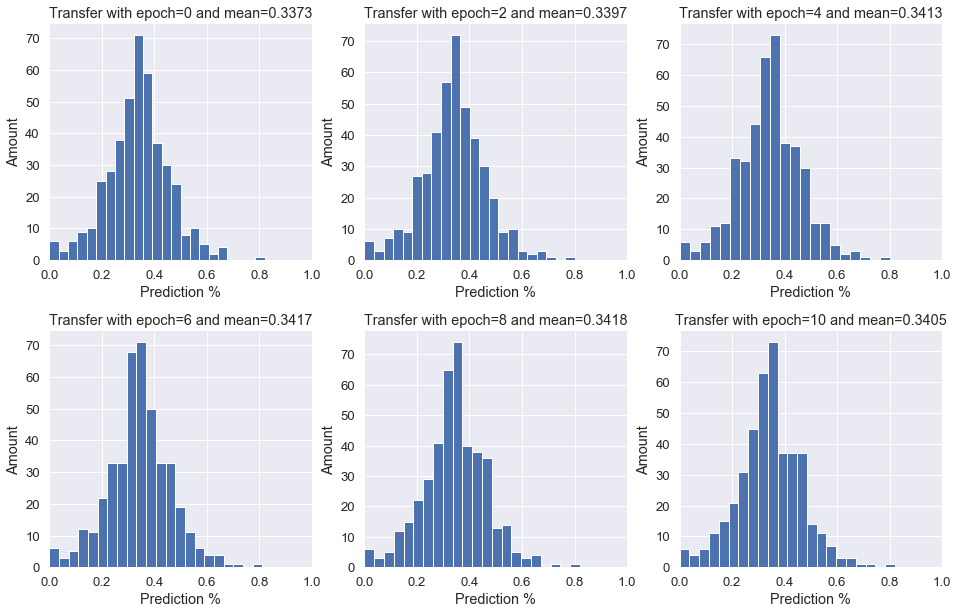

In [23]:
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(2,3,figsize=(16, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
labels = list(range(0,total_epoch+epochs_trans,epochs_trans))
epoch_means = np.mean(tmp,axis=1)
sns.despine(f, left=True, bottom=True)
for i in range(len(tmp)-1):
    sns.distplot(tmp[i],ax=ax[i//3,i%3],kde=False,hist_kws={"alpha": 1})
    ax[i//3,i%3].set_title(f'Transfer with epoch={labels[i]} and mean={epoch_means[i]:4.4f}')
    ax[i//3,i%3].set(xlim=(0,1.0))
    ax[i//3,i%3].set(xlabel="Prediction %", ylabel="Amount")
f.savefig(r'D:\Dropbox\Peter_Dropbox\Apps\ShareLaTeX\Master Thesis\graphics\transfer.eps', format='eps', dpi=300)
#f.tight_layout()
plt.show()


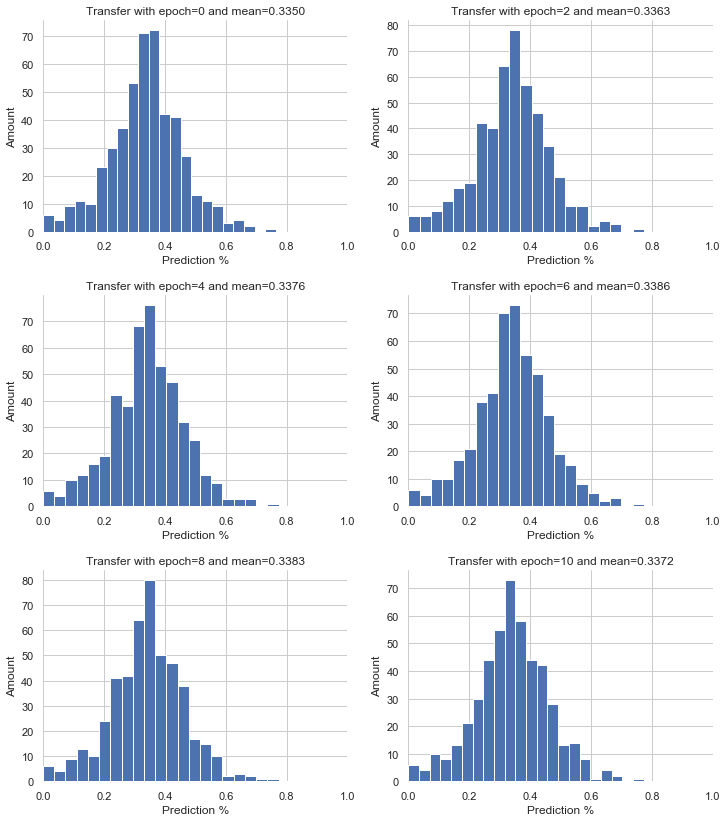

In [12]:
sns.set(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(3,2,figsize=(12, 14))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
labels = list(range(0,total_epoch+epochs_trans,epochs_trans))
epoch_means = np.mean(tmp,axis=1)
sns.despine(f, left=True, bottom=True)
for i in range(len(tmp)-1):
    sns.distplot(tmp_per[i],ax=ax[i//2,i%2],kde=False,hist_kws={"alpha": 1})
    ax[i//2,i%2].set_title(f'Transfer with epoch={labels[i]} and mean={epoch_means[i]:4.4f}')
    ax[i//2,i%2].set(xlim=(0,1.0))
    ax[i//2,i%2].set(xlabel="Prediction %", ylabel="Amount")
f.savefig(r'D:\Dropbox\Peter_Dropbox\Apps\ShareLaTeX\Master Thesis\graphics\transfer_transpose.eps', format='eps', dpi=300)
#f.tight_layout()
plt.show()

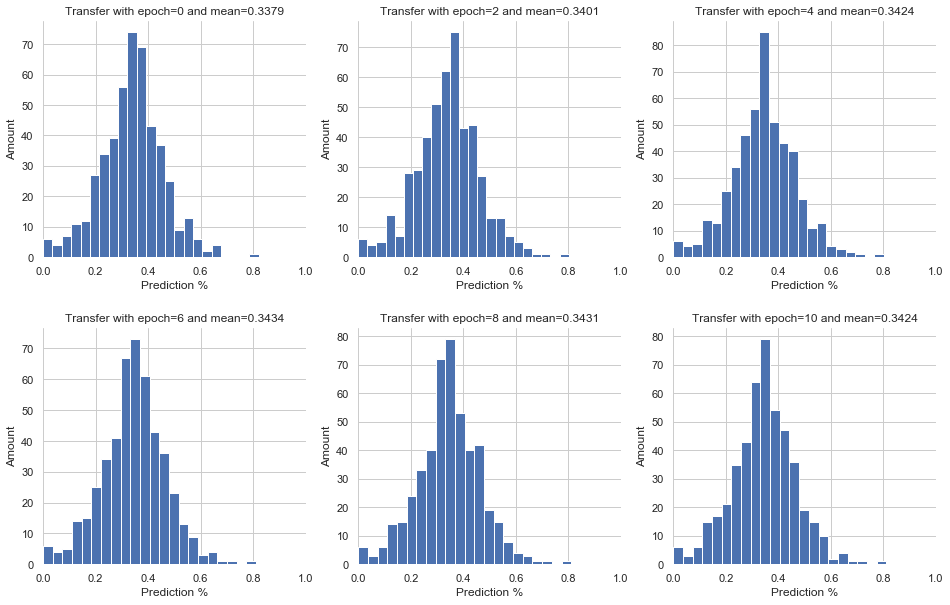

In [74]:
sns.set(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(2,3,figsize=(16, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
labels = list(range(0,total_epoch+epochs_trans,epochs_trans))
epoch_means = np.mean(tmp,axis=1)
sns.despine(f, left=True, bottom=True)
for i in range(len(tmp)-1):
    sns.distplot(tmp[i],ax=ax[i//3,i%3],kde=False,hist_kws={"alpha": 1})
    ax[i//3,i%3].set_title(f'Transfer with epoch={labels[i]} and mean={epoch_means[i]:4.4f}')
    ax[i//3,i%3].set(xlim=(0,1.0))
    ax[i//3,i%3].set(xlabel="Prediction %", ylabel="Amount")
f.savefig(r'D:\Dropbox\Peter_Dropbox\Apps\ShareLaTeX\Master Thesis\graphics\transfer.eps', format='eps', dpi=1200)
#f.tight_layout()
plt.show()


# Prediction vs entropy

In [25]:
path = "Network/network_epoch_0.338_Feb-23-2020"

In [26]:
reload(net_lstm_w2v)
net_pred_ent = net_lstm_w2v.Brain()
net_pred_ent.lr = 0.001
net_pred_ent.bs = 10
net_pred_ent.seq_len=100
net_pred_ent.epochs = 100
net_pred_ent.epoch_test = 10

net_pred_ent.create_model()
net_pred_ent

In [27]:
net_pred_ent.model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [28]:
ents = []
for pep in tqdm(train_peps):
    data = utils.load_data([pep],bs=1,dat_type="all")[0]
    data = data.t().reshape(-1).cpu().numpy()[1:]
    if len(data)>1:
        ents.append(utils.entropy(list(data),tqdm_boo=True))

100%|████████████████████████████████████████████████████████████████████████████████| 427/427 [01:42<00:00,  4.17it/s]


In [29]:
ent_dict = {}
for pep, inf in zip(train_peps,ents):
    ent_dict[pep] = inf[1]

In [30]:
prediction_pep = net_pred_ent.test(dat_test,True)

Test loss: 1.189 | Test accu: 0.337 | Test accu expl: 0.821 | Test expl AUC: 0.712 | 

In [31]:
pred_pep_dict = {}
for key, value in prediction_pep[0].items():
    if prediction_pep[0][key]['total']!=0:
        pred_pep_dict[key] = value['correct']/value['total']

In [32]:
ent_values = [value for key,value in ent_dict.items() if key in pred_pep_dict.keys()]

In [33]:
import seaborn as sns

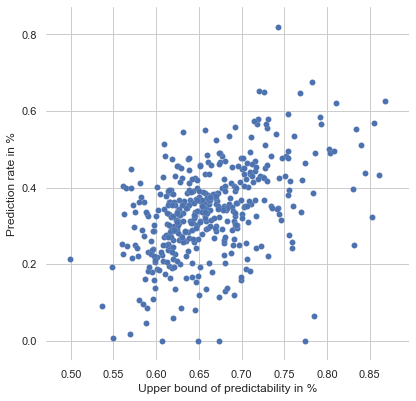

In [34]:
sns.set(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x=ent_values, y=list(pred_pep_dict.values()),
                sizes=(1, 8), linewidth=0.1,
                ax=ax)
ax.set(xlabel="Upper bound of predictability in %", ylabel="Prediction rate in %")
f.savefig(r'D:\Dropbox\Peter_Dropbox\Apps\ShareLaTeX\Master Thesis\graphics\entropy_vs_prediction.png', format='png', dpi=300)


In [41]:
np.corrcoef(ent_values,list(pred_pep_dict.values()))

array([[1.        , 0.46809068],
       [0.46809068, 1.        ]])

# Overfitting

In [14]:
reload(net_lstm)
train_rand = np.ones(10,dtype=int)
dat_train = utils.load_data(train_rand,bs = 10,dat_type="all_relabeled")
dat_test = {}
for pep in train_rand:
    dat_t = utils.load_data([pep],bs = 1, dat_type="test_relabeled")
    dat_w = utils.load_data([pep],bs = 1, dat_type="train_relabeled")
    dat_test[pep] = {"warm":dat_w,"test":dat_t}

In [15]:
net = net_lstm.Brain()
net.create_model()
net.epochs = 10000
net.train(dat_train,dat_test)

Epoch: 1/10000 | Avg epoch loss: 6.851 | Training accu: 0.000 | Test loss: 6.844 | Test accu: 0.000 | Test accu old: 0.000 | 
Epoch: 11/10000 | Avg epoch loss: 4.118 | Training accu: 0.279 | Test loss: 4.336 | Test accu: 0.276 | Test accu old: 0.207 | 
Epoch: 21/10000 | Avg epoch loss: 3.289 | Training accu: 0.276 | Test loss: 3.808 | Test accu: 0.276 | Test accu old: 0.207 | 
Epoch: 31/10000 | Avg epoch loss: 3.125 | Training accu: 0.286 | Test loss: 3.758 | Test accu: 0.276 | Test accu old: 0.207 | 
Epoch: 41/10000 | Avg epoch loss: 3.101 | Training accu: 0.292 | Test loss: 3.744 | Test accu: 0.276 | Test accu old: 0.207 | 
Epoch: 51/10000 | Avg epoch loss: 3.145 | Training accu: 0.281 | Test loss: 3.742 | Test accu: 0.276 | Test accu old: 0.207 | 
Epoch: 61/10000 | Avg epoch loss: 3.150 | Training accu: 0.273 | Test loss: 3.743 | Test accu: 0.276 | Test accu old: 0.207 | 
Epoch: 71/10000 | Avg epoch loss: 3.084 | Training accu: 0.284 | Test loss: 3.759 | Test accu: 0.276 | Test accu

Epoch: 1271/10000 | Avg epoch loss: 0.856 | Training accu: 0.793 | Test loss: 1.725 | Test accu: 0.655 | Test accu old: 0.655 | 
Epoch: 1281/10000 | Avg epoch loss: 0.953 | Training accu: 0.775 | Test loss: 1.707 | Test accu: 0.655 | Test accu old: 0.655 | 
Epoch: 1291/10000 | Avg epoch loss: 0.826 | Training accu: 0.784 | Test loss: 1.711 | Test accu: 0.655 | Test accu old: 0.655 | 
Epoch: 1301/10000 | Avg epoch loss: 0.922 | Training accu: 0.788 | Test loss: 1.717 | Test accu: 0.655 | Test accu old: 0.655 | 
Epoch: 1311/10000 | Avg epoch loss: 0.867 | Training accu: 0.793 | Test loss: 1.692 | Test accu: 0.655 | Test accu old: 0.655 | 
Epoch: 1321/10000 | Avg epoch loss: 0.818 | Training accu: 0.804 | Test loss: 1.699 | Test accu: 0.655 | Test accu old: 0.655 | 
Epoch: 1331/10000 | Avg epoch loss: 0.800 | Training accu: 0.801 | Test loss: 1.683 | Test accu: 0.655 | Test accu old: 0.655 | 
Epoch: 1341/10000 | Avg epoch loss: 0.818 | Training accu: 0.809 | Test loss: 1.695 | Test accu: 

Epoch: 2531/10000 | Avg epoch loss: 0.344 | Training accu: 0.928 | Test loss: 1.507 | Test accu: 0.759 | Test accu old: 0.759 | 
Epoch: 2541/10000 | Avg epoch loss: 0.310 | Training accu: 0.920 | Test loss: 1.566 | Test accu: 0.759 | Test accu old: 0.759 | 
Epoch: 2551/10000 | Avg epoch loss: 0.285 | Training accu: 0.939 | Test loss: 1.591 | Test accu: 0.759 | Test accu old: 0.759 | 
Epoch: 2561/10000 | Avg epoch loss: 0.264 | Training accu: 0.948 | Test loss: 1.557 | Test accu: 0.759 | Test accu old: 0.759 | 
Epoch: 2571/10000 | Avg epoch loss: 0.226 | Training accu: 0.947 | Test loss: 1.537 | Test accu: 0.759 | Test accu old: 0.759 | 
Epoch: 2581/10000 | Avg epoch loss: 0.329 | Training accu: 0.936 | Test loss: 1.527 | Test accu: 0.759 | Test accu old: 0.759 | 
Epoch: 2591/10000 | Avg epoch loss: 0.246 | Training accu: 0.944 | Test loss: 1.549 | Test accu: 0.759 | Test accu old: 0.759 | 
Epoch: 2601/10000 | Avg epoch loss: 0.176 | Training accu: 0.960 | Test loss: 1.484 | Test accu: 

KeyboardInterrupt: 

# Overfit W2V

In [4]:
reload(net_lstm_w2v)
#Draw random people
train_rand = np.arange(1,dtype=int)+1
train_rand = np.ones(10,dtype=int)
dat_train = utils.load_data(train_rand,1,dat_type="all_relabeled")
dat_train_w2v = utils.load_data_W2V(train_rand,1,dat_type="all_relabeled")
dat_train_both = torch.cat((dat_train,dat_train_w2v.reshape(1,-1,1)),0)

dat_test = {}
for pep in train_rand:
    dat_t = utils.load_data([pep],bs = 1, dat_type="test_relabeled")
    dat_w = utils.load_data([pep],bs = 1, dat_type="train_relabeled")
    dat_t_w2v = utils.load_data_W2V([pep],bs = 1, dat_type="test_relabeled")
    dat_w_w2v = utils.load_data_W2V([pep],bs = 1, dat_type="train_relabeled")
    dat_t_both = torch.cat((dat_t,dat_t_w2v.reshape(1,-1,1)),0)
    dat_w_both = torch.cat((dat_w,dat_w_w2v.reshape(1,-1,1)),0)
    dat_test[pep] = {"warm":dat_w_both,"test":dat_w_both}

In [5]:
for i in range(dat_test[1]['warm'][0].shape[0]):
    dat_test[1]['warm'][0,i,0] = i % 4+1
    dat_test[1]['warm'][5,i,0] = i % 4+1
    
for i in range(dat_test[1]['test'][0].shape[0]):
    dat_test[1]['test'][0,i,0] = i % 4+1
    dat_test[1]['test'][5,i,0] = i % 4+1

In [6]:
for i in range(dat_train_both.shape[1]):
    dat_train_both[0,i,0] = i % 4+1
    dat_train_both[5,i,0] = i % 4+1
    

In [7]:
reload(net_lstm_w2v)
net = net_lstm_w2v.Brain()
net.lr = 0.01
net.bs = 1
net.create_model()
net.epochs = 10000
net.train(dat_train_both,dat_test)

> d:\dropbox\peter_dropbox\uni\speciale\utils\net_lstm_w2v.py(94)train()
-> loss = F.cross_entropy(logits.reshape(-1,20), target[0].reshape(-1))
(Pdb) logits.shape
torch.Size([29, 1, 20])
(Pdb) target[0].shape
torch.Size([29, 1])
(Pdb) exit()


BdbQuit: 

In [45]:
dat_train_both.shape

torch.Size([6, 1124, 1])

In [46]:
dat_test[1]['warm'].shape

torch.Size([6, 394, 1])

Start ude og gå ind

1. lots of data in the world
2. people being are now being logged all the time
3. etc

Burde nok kigge på hans overordnet structur af location. (Hierakisk model)

confusion matrix
plot prediction vs actual location on map

# Validation set

In [271]:
path = "Network/network_epoch_0.372_Feb-07-2020"

In [73]:
reload(utils)
# Getting a list of valid candidates given properties
pep_info = pd.read_pickle("data_inf.pkl")

pep_600 = list(pep_info[(pep_info["length"]>1000)].index)
good_peps = np.loadtxt('good_peps.txt',dtype=int)

train_peps = good_peps[good_peps<=700]
train_peps = np.array(list(set(train_peps).intersection(pep_600)))

train_peps_all = good_peps
train_peps_all = np.array(list(set(train_peps_all).intersection(pep_600)))

train_peps_vali = good_peps[good_peps>700]
train_peps_vali = np.array(list(set(train_peps_vali).intersection(pep_600)))


_, dat_test = utils.load_train_test_set(train_peps,bs=10)
dat_train_both, _ = utils.load_train_test_set(train_peps_all,bs=10)
_, dat_test_vali = utils.load_train_test_set(train_peps_vali,bs=10)

In [366]:
reload(net_lstm_w2v)
net = net_lstm_w2v.Brain()
net.lr = 0.001
net.bs = 10
net.seq_len=100
net.epochs = 21
#net.epochs = 1

net.create_model()

In [4]:
accuracy_list = []
accu_best = 0
best_model = None

for _ in range(10):
    net = net_lstm_w2v.Brain()
    net.lr = 0.001
    net.bs = 10
    net.seq_len=100
    net.epochs = 100
    net.create_model()
    net.train(dat_train_both,dat_test,early_stop=True)
    
    accuracy_list.append(net.best_accu)
    if net.best_accu>accu_best:
        accu_best = net.best_accu
        best_model = net.best_model

Epoch: 1/100 | Avg epoch loss: 2.813 | Training accu: 0.190 | Training accu expl: 0.779 | Test loss: 1.799 | Test accu: 0.224 | Test accu expl: 0.837 | Test expl AUC: 0.553 | 
Epoch: 6/100 | Avg epoch loss: 2.052 | Training accu: 0.324 | Training accu expl: 0.800 | Test loss: 1.671 | Test accu: 0.323 | Test accu expl: 0.817 | Test expl AUC: 0.696 | 
Epoch: 11/100 | Avg epoch loss: 1.944 | Training accu: 0.343 | Training accu expl: 0.801 | Test loss: 1.681 | Test accu: 0.330 | Test accu expl: 0.801 | Test expl AUC: 0.700 | 
Epoch: 16/100 | Avg epoch loss: 1.853 | Training accu: 0.358 | Training accu expl: 0.801 | Test loss: 1.699 | Test accu: 0.335 | Test accu expl: 0.809 | Test expl AUC: 0.698 | 
Epoch: 21/100 | Avg epoch loss: 1.775 | Training accu: 0.370 | Training accu expl: 0.802 | Test loss: 1.719 | Test accu: 0.340 | Test accu expl: 0.808 | Test expl AUC: 0.696 | 
Epoch: 26/100 | Avg epoch loss: 1.727 | Training accu: 0.379 | Training accu expl: 0.803 | Test loss: 1.707 | Test ac

Epoch: 26/100 | Avg epoch loss: 1.729 | Training accu: 0.380 | Training accu expl: 0.802 | Test loss: 1.512 | Test accu: 0.346 | Test accu expl: 0.778 | Test expl AUC: 0.700 | 
Epoch: 31/100 | Avg epoch loss: 1.693 | Training accu: 0.385 | Training accu expl: 0.802 | Test loss: 1.551 | Test accu: 0.350 | Test accu expl: 0.781 | Test expl AUC: 0.699 | 
Epoch: 36/100 | Avg epoch loss: 1.662 | Training accu: 0.391 | Training accu expl: 0.803 | Test loss: 1.604 | Test accu: 0.352 | Test accu expl: 0.781 | Test expl AUC: 0.699 | 
Epoch: 41/100 | Avg epoch loss: 1.641 | Training accu: 0.394 | Training accu expl: 0.803 | Test loss: 1.664 | Test accu: 0.351 | Test accu expl: 0.780 | Test expl AUC: 0.699 | 
Epoch: 46/100 | Avg epoch loss: 1.620 | Training accu: 0.398 | Training accu expl: 0.804 | Test loss: 1.688 | Test accu: 0.349 | Test accu expl: 0.783 | Test expl AUC: 0.699 | 
Stopped early due to overfitting
Epoch: 1/100 | Avg epoch loss: 2.765 | Training accu: 0.214 | Training accu expl: 

In [10]:
net.model.load_state_dict(best_model)
result_vali = net.test(dat_test_vali,True)

Test loss: 1.695 | Test accu: 0.340 | Test accu expl: 0.765 | Test expl AUC: 0.723 | 

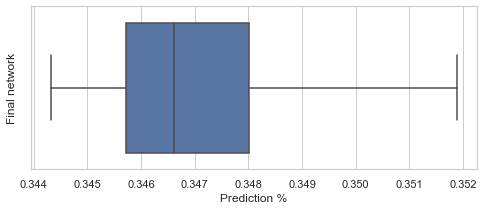

In [11]:
gridsize = (1,1)
fig, ax = plt.subplots(figsize=(8,3))
sns.boxplot(x=[accuracy_list], whis="range",ax=ax)
ax.set(xlabel="Prediction %", ylabel="Final network")
fig.savefig(r'D:\Dropbox\Peter_Dropbox\Apps\ShareLaTeX\Master Thesis\graphics\network_pred_vali_box.eps', format='eps', dpi=1200)
plt.show()

In [7]:
accu_best

0.3518835797533684

In [8]:
accuracy_list

[0.34432176322524694,
 0.3465215643970641,
 0.34790701609662206,
 0.3454851196141887,
 0.3509634706093872,
 0.34463904224041286,
 0.3480445036698606,
 0.3466907798718193,
 0.3518835797533684,
 0.34643695665968655]

In [14]:
utils.save_model(best_model,[accu_best])

In [12]:
reload(utils)

<module 'utils.utils' from 'D:\\Dropbox\\Peter_Dropbox\\Uni\\Speciale\\utils\\utils.py'>

In [310]:
result_vali = net.test(dat_test_vali,True)

Test loss: 0.949 | Test accu: 0.440 | Test accu expl: 0.758 | Test expl AUC: 0.714 | 